# SparseEdges tests

## A series of tests for the SparseEdges package


Table of content

* [What is the SparseEdges package?](#What-is-the-SparseEdges-package?) 
* [Installing](#Installing) 
* [testing one step](#testing-one-step)


In [10]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

In [11]:
from NeuroTools.parameters import ParameterSet
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges

In [12]:
#! defining framework
#!-------------------
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.pe.N = 4
mp.pe.MP_alpha=1.
mp.pe.do_whitening = False

## Defining units, axis and conventions

cardinal points in X, Y (clockwise):  E (=right=3 o'clock=horizontal), ESE, S, WSW, W, WNW, N, ENE :

In [13]:
X = np.array([0, 1./4, 1./2, 1./4, 0, -1./4, -1./2])#, -1./4])\n",
Y = np.array([1./2, np.sqrt(3)/4, 0, -np.sqrt(3)/4, -1./2, -np.sqrt(3)/4, 0.])#, np.sqrt(3)/
Theta = np.arctan2(-X, Y)  # perpendicular to circle
Theta = ((Theta + np.pi/2  - np.pi/mp.pe.N_phi/2 ) % (np.pi)) - np.pi/2  + np.pi/mp.pe.N_phi/2
print(['%0.1f' % (angle*180/np.pi) for angle in Theta])

['-0.0', '-30.0', '90.0', '30.0', '-0.0', '-30.0', '90.0']


We set the [0,0] index of the array in the upper left left corner of the axes.

The X, Y image axis are defined in the matrix style (origin on the upper left; X going vertically down, Y going right horizontally) - the angle is defined as the angle wrt to the horizontal axis :

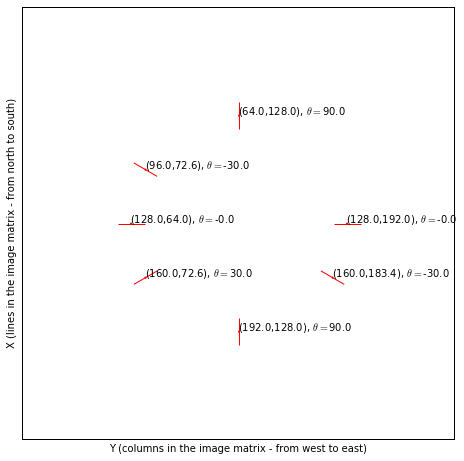

In [14]:
fig, a = mp.show_edges(np.vstack(((X/2. + .5)*mp.N_X, (Y/2. + .5)*mp.N_X, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) )))
t = [a.text(Y_, X_, r'(%0.1f,%0.1f), $\theta=$%0.1f' % (X_, Y_, angle*180/np.pi))  for (X_, Y_, angle)  in zip((X/2. + .5)*mp.N_X, (Y/2. + .5)*mp.N_X, Theta)]
a.set_xlabel('Y (columns in the image matrix - from west to east)')
_ = a.set_ylabel('X (lines in the image matrix - from north to south)')

Overlaying an image :

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


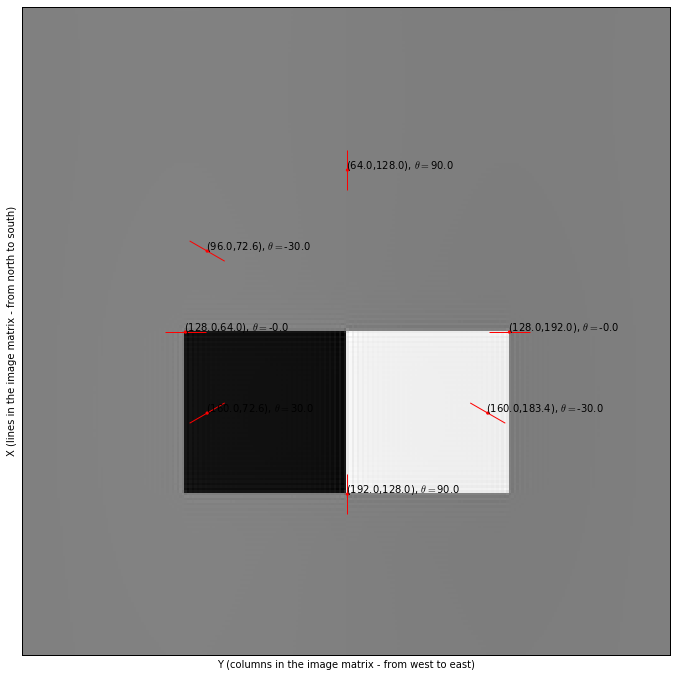

In [15]:
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.N = 128 # number of edges
mp.pe.figsize_edges = 9

#! defining a reference test image (see test_Image)
image = np.zeros((mp.N_X, mp.N_Y))
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/2:mp.N_X/2+mp.N_X/4] = 1
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/4:mp.N_X/2] = -1

edges = np.vstack(((X/2. + .5)*mp.N_X, (Y/2. + .5)*mp.N_X, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=image)
#fig, a = mp.show_edges(edges, image=im.whitening(image))
t = [a.text(Y_, X_, r'(%0.1f,%0.1f), $\theta=$%0.1f' % (X_, Y_, angle*180/np.pi))  for (X_, Y_, angle)  in zip((X/2. + .5)*mp.N_X, (Y/2. + .5)*mp.N_X, Theta)]
a.set_xlabel('Y (columns in the image matrix - from west to east)')
_ = a.set_ylabel('X (lines in the image matrix - from north to south)')

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


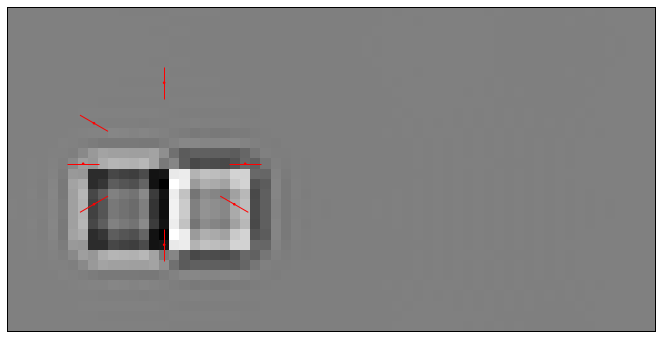

In [16]:
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.set_size((32, 64))
mp.N = 128 # number of edges
mp.pe.figsize_edges = 4.5

#! defining a reference test image (see test_Image)
image = np.zeros((mp.N_X, mp.N_Y))
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/2:mp.N_X/2+mp.N_X/4] = 1
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/4:mp.N_X/2] = -1

edges = np.vstack(((X/2. + .5)*mp.N_X-1, (Y/2. + .5)*mp.N_X-1, Theta, .5*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=mp.whitening(image))

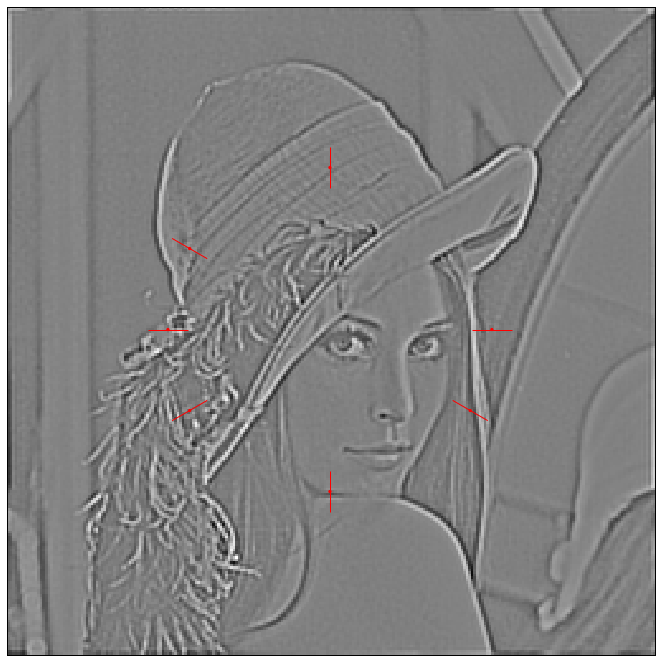

In [17]:
mp.set_size((256, 256))
image = mp.imread('../../SLIP/database/lena256.png')
mp.N = 128 # number of edges
mp.pe.figsize_edges = 9

edges = np.vstack(((X/2. + .5)*mp.N_X-1, (Y/2. + .5)*mp.N_X-1, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=mp.whitening(image))

## Matching Pursuit

### checking basic edge detection

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(<matplotlib.figure.Figure at 0x10b449b70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10b437160>)

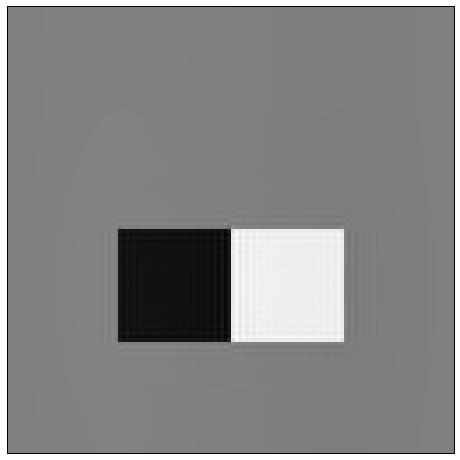

In [18]:
mp.set_size((128, 128))
#! defining a reference test image (see test_Image)
image = np.zeros((mp.N_X, mp.N_Y))
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/2:mp.N_X/2+mp.N_X/4] = 1
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/4:mp.N_X/2] = -1
mp.imshow(image)

In [20]:
%%writefile experiment_test_MP.py
import numpy as np
from SparseEdges import SparseEdges

mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.N = 128 # number of edges
mp.pe.figsize_edges = 9

#! defining a reference test image (see test_Image)
image = np.zeros((mp.N_X, mp.N_Y))
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/2:mp.N_X/2+mp.N_X/4] = 1
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/4:mp.N_X/2] = -1

matname = 'mat/experiment_test_MP.npy'
try:
    edges = np.load(matname)
except:
    edges, C_res = mp.run_mp(image, verbose=False)
    np.save(matname, edges)   
fig, a = mp.show_edges(edges, image=mp.whitening(image))

Writing experiment_test_MP.py


/Users/laurentperrinet/pool/science/BICV/SparseEdges/notebooks/experiment_test_MP.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/2:mp.N_X/2+mp.N_X/4] = 1
/Users/laurentperrinet/pool/science/BICV/SparseEdges/notebooks/experiment_test_MP.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/4:mp.N_X/2] = -1


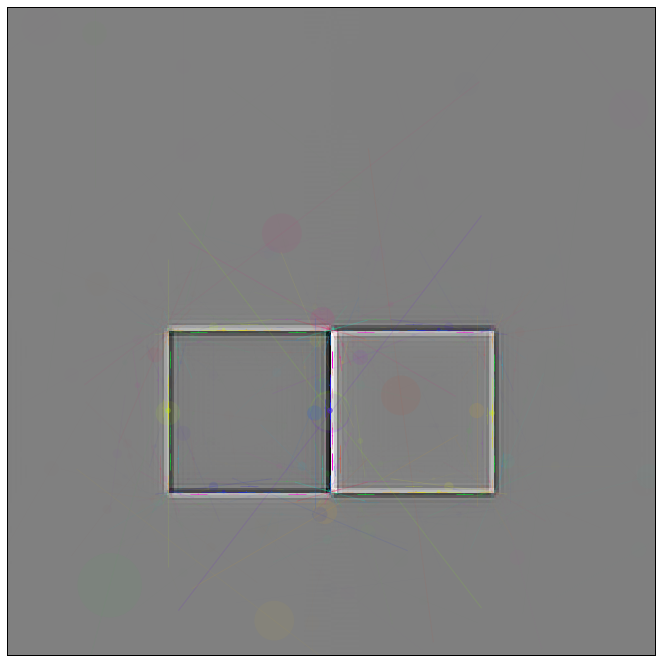

In [21]:
%run experiment_test_MP.py


In [22]:
%%writefile experiment_test_whitening.py
import numpy as np
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.N = 128

image = mp.imread('https://raw.githubusercontent.com/meduz/SLIP/master/database/serre07_targets/B_N107001.jpg')

#print image.mean(), image.std()
image = mp.normalize(image, center=True)
#print image.mean(), image.std()

matname = 'mat/experiment_test_whitening.npy'
try:
    edges = np.load(matname)
except:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    


matname_RMSE = 'mat/experiment_test_whitening_RMSE.npy'
try:
    RMSE = np.load(matname_RMSE)
except:
    RMSE = np.ones(mp.N)
    image_ = image.copy()
    image_rec = np.zeros_like(image_)
    if mp.pe.do_whitening: image_ = mp.whitening(image_)
    for i_N in range(mp.N):
        image_rec += mp.reconstruct(edges[:, i_N][:, np.newaxis])
        RMSE[i_N] =  ((image_*mp.mask-image_rec*mp.mask)**2).sum()

    np.save(matname_RMSE, RMSE)     


Writing experiment_test_whitening.py


In [23]:
%run experiment_test_whitening.py


[  0 %] Time elapsed: 00:00:00 | ETA: 00:15:49

Edge 0 / 2048  - Max activity  :  4.42179095111  phase=  -115.380914104  deg,  @  (176, 85, 2, 2)
Edge

[  0 %] Time elapsed: 00:00:11 | ETA: 03:07:58

 1 / 2048  - Max activity  :  3.78694520237  phase=  90.0873839606  deg,  @  (142, 137, 0, 2)
Edge

[  0 %] Time elapsed: 00:00:20 | ETA: 03:51:22

 2 / 2048  - Max activity  :  3.55700622732  phase=  -163.010373152  deg,  @  (177, 186, 7, 3)
Edge

[  0 %] Time elapsed: 00:00:30 | ETA: 04:16:28

 3 / 2048  - Max activity  :  3.45297043832  phase=  -100.221669546  deg,  @  (155, 141, 21, 3)
Edge

[  0 %] Time elapsed: 00:00:39 | ETA: 04:29:01

 4 / 2048  - Max activity  :  3.27933498832  phase=  -106.461784509  deg,  @  (178, 230, 8, 2)
Edge

[  0 %] Time elapsed: 00:00:49 | ETA: 04:39:37

 5 / 2048  - Max activity  :  3.21761662618  phase=  -179.822387146  deg,  @  (160, 188, 1, 2)
Edge

[  0 %] Time elapsed: 00:00:59 | ETA: 04:50:01

 6 / 2048  - Max activity  :  3.12934339287  phase=  -124.648608103  deg,  @  (162, 168, 4, 3)
Edge

[  0 %] Time elapsed: 00:01:09 | ETA: 04:56:00

 7 / 2048  - Max activity  :  2.95792595466  phase=  132.127584523  deg,  @  (208, 32, 23, 2)
Edge

[  0 %] Time elapsed: 00:01:18 | ETA: 04:57:15

 8 / 2048  - Max activity  :  2.9296819035  phase=  -68.4551363989  deg,  @  (187, 133, 21, 2)
Edge

[  0 %] Time elapsed: 00:01:27 | ETA: 04:58:34

 9 / 2048  - Max activity  :  2.9152298604  phase=  85.5035249059  deg,  @  (149, 118, 8, 3)
Edge

[  0 %] Time elapsed: 00:01:37 | ETA: 04:59:24

 10 / 2048  - Max activity  :  2.89731650546  phase=  -138.134363065  deg,  @  (31, 255, 23, 2)
Edge

[  0 %] Time elapsed: 00:01:46 | ETA: 05:00:10

 11 / 2048  - Max activity  :  2.89580000543  phase=  129.124033375  deg,  @  (196, 80, 22, 2)
Edge

[  0 %] Time elapsed: 00:01:55 | ETA: 05:00:47

 12 / 2048  - Max activity  :  2.86270042388  phase=  -118.133087251  deg,  @  (192, 200, 3, 3)
Edge

[  0 %] Time elapsed: 00:02:04 | ETA: 05:01:16

 13 / 2048  - Max activity  :  2.83866093362  phase=  -99.0950325624  deg,  @  (203, 91, 2, 2)
Edge

[  0 %] Time elapsed: 00:02:14 | ETA: 05:02:47

 14 / 2048  - Max activity  :  2.71763578209  phase=  51.498713549  deg,  @  (146, 255, 23, 2)
Edge

[  0 %] Time elapsed: 00:02:24 | ETA: 05:06:04

 15 / 2048  - Max activity  :  2.68043015287  phase=  -123.956610218  deg,  @  (188, 30, 0, 2)
Edge

[  0 %] Time elapsed: 00:02:34 | ETA: 05:08:20

 16 / 2048  - Max activity  :  2.67891921382  phase=  141.878006947  deg,  @  (103, 207, 22, 3)
Edge

[  0 %] Time elapsed: 00:02:44 | ETA: 05:08:40

 17 / 2048  - Max activity  :  2.61686694394  phase=  -22.5278602777  deg,  @  (184, 19, 21, 2)
Edge

[  0 %] Time elapsed: 00:02:53 | ETA: 05:09:15

 18 / 2048  - Max activity  :  2.5574919712  phase=  81.4762404926  deg,  @  (230, 155, 20, 2)
Edge

[  0 %] Time elapsed: 00:03:03 | ETA: 05:09:48

 19 / 2048  - Max activity  :  2.54320186799  phase=  23.6543756031  deg,  @  (170, 90, 3, 1)
Edge

[  1 %] Time elapsed: 00:03:13 | ETA: 05:11:15

 20 / 2048  - Max activity  :  2.52656848041  phase=  -161.979919752  deg,  @  (216, 211, 1, 2)
Edge

[  1 %] Time elapsed: 00:03:23 | ETA: 05:12:30

 21 / 2048  - Max activity  :  2.52241173669  phase=  102.329438496  deg,  @  (137, 97, 6, 3)
Edge

[  1 %] Time elapsed: 00:03:32 | ETA: 05:12:32

 22 / 2048  - Max activity  :  2.4835463982  phase=  55.9226120788  deg,  @  (184, 119, 23, 3)
Edge

[  1 %] Time elapsed: 00:03:42 | ETA: 05:12:10

 23 / 2048  - Max activity  :  2.47523795698  phase=  -121.644549916  deg,  @  (172, 177, 5, 2)
Edge

[  1 %] Time elapsed: 00:03:51 | ETA: 05:11:53

 24 / 2048  - Max activity  :  2.44366417217  phase=  -132.271753368  deg,  @  (191, 85, 3, 2)
Edge

[  1 %] Time elapsed: 00:04:00 | ETA: 05:11:32

 25 / 2048  - Max activity  :  2.4364429713  phase=  33.6858581943  deg,  @  (178, 198, 9, 3)
Edge

[  1 %] Time elapsed: 00:04:09 | ETA: 05:11:17

 26 / 2048  - Max activity  :  2.43338217991  phase=  -69.6327329709  deg,  @  (187, 73, 10, 3)
Edge

[  1 %] Time elapsed: 00:04:18 | ETA: 05:10:55

 27 / 2048  - Max activity  :  2.35131117671  phase=  -2.23051731383  deg,  @  (162, 122, 20, 2)
Edge

[  1 %] Time elapsed: 00:04:28 | ETA: 05:11:11

 28 / 2048  - Max activity  :  2.24615280805  phase=  -49.4086763753  deg,  @  (206, 37, 1, 2)
Edge

[  1 %] Time elapsed: 00:04:38 | ETA: 05:12:27

 29 / 2048  - Max activity  :  2.23357289509  phase=  -38.0535768982  deg,  @  (44, 0, 23, 2)
Edge

[  1 %] Time elapsed: 00:04:47 | ETA: 05:12:17

 30 / 2048  - Max activity  :  2.21768937289  phase=  -109.217372389  deg,  @  (174, 136, 21, 2)
Edge

[  1 %] Time elapsed: 00:04:57 | ETA: 05:12:18

 31 / 2048  - Max activity  :  2.21279573852  phase=  -40.1820826374  deg,  @  (119, 249, 13, 2)
Edge

[  1 %] Time elapsed: 00:05:06 | ETA: 05:12:20

 32 / 2048  - Max activity  :  2.1891136893  phase=  -120.130527375  deg,  @  (109, 128, 1, 5)
Edge

[  1 %] Time elapsed: 00:05:17 | ETA: 05:13:30

 33 / 2048  - Max activity  :  2.15971880859  phase=  -76.1840408568  deg,  @  (174, 80, 1, 2)
Edge

[  1 %] Time elapsed: 00:05:27 | ETA: 05:13:43

 34 / 2048  - Max activity  :  2.15127382847  phase=  -64.6648945946  deg,  @  (129, 208, 2, 2)
Edge

[  1 %] Time elapsed: 00:05:36 | ETA: 05:13:20

 35 / 2048  - Max activity  :  2.14102438442  phase=  87.1541697625  deg,  @  (218, 34, 22, 1)
Edge

[  1 %] Time elapsed: 00:05:45 | ETA: 05:12:56

 36 / 2048  - Max activity  :  2.12650612615  phase=  61.9799967231  deg,  @  (127, 84, 7, 2)
Edge

[  1 %] Time elapsed: 00:05:54 | ETA: 05:12:35

 37 / 2048  - Max activity  :  2.10856022781  phase=  -145.861969032  deg,  @  (199, 127, 19, 2)
Edge

[  1 %] Time elapsed: 00:06:03 | ETA: 05:12:15

 38 / 2048  - Max activity  :  2.10311636022  phase=  145.885576495  deg,  @  (169, 190, 1, 2)
Edge

[  1 %] Time elapsed: 00:06:12 | ETA: 05:11:56

 39 / 2048  - Max activity  :  2.09993616997  phase=  -71.3058423179  deg,  @  (209, 47, 22, 2)
Edge

[  2 %] Time elapsed: 00:06:21 | ETA: 05:11:38

 40 / 2048  - Max activity  :  2.07242052611  phase=  -36.4391541537  deg,  @  (145, 148, 6, 2)
Edge

[  2 %] Time elapsed: 00:06:32 | ETA: 05:12:29

 41 / 2048  - Max activity  :  2.05153934011  phase=  11.2510089362  deg,  @  (234, 91, 3, 2)
Edge

[  2 %] Time elapsed: 00:06:42 | ETA: 05:12:57

 42 / 2048  - Max activity  :  2.02840837351  phase=  -19.7275035244  deg,  @  (107, 240, 11, 2)
Edge

[  2 %] Time elapsed: 00:06:51 | ETA: 05:12:39

 43 / 2048  - Max activity  :  2.02685863579  phase=  -137.592286802  deg,  @  (188, 63, 18, 2)
Edge

[  2 %] Time elapsed: 00:07:01 | ETA: 05:12:48

 44 / 2048  - Max activity  :  2.02427322796  phase=  -66.6726637442  deg,  @  (207, 153, 6, 1)
Edge

[  2 %] Time elapsed: 00:07:10 | ETA: 05:12:32

 45 / 2048  - Max activity  :  2.01939507998  phase=  -128.237319012  deg,  @  (240, 159, 16, 1)
Edge

[  2 %] Time elapsed: 00:07:22 | ETA: 05:13:44

 46 / 2048  - Max activity  :  2.01450535906  phase=  84.4289343149  deg,  @  (226, 40, 23, 1)
Edge

[  2 %] Time elapsed: 00:07:31 | ETA: 05:13:25

 47 / 2048  - Max activity  :  2.00724513007  phase=  -69.2718603785  deg,  @  (184, 194, 5, 2)
Edge

[  2 %] Time elapsed: 00:07:40 | ETA: 05:13:03

 48 / 2048  - Max activity  :  1.99891221871  phase=  50.9961204232  deg,  @  (114, 66, 5, 2)
Edge

[  2 %] Time elapsed: 00:07:49 | ETA: 05:12:40

 49 / 2048  - Max activity  :  1.98531302439  phase=  -110.715054155  deg,  @  (104, 126, 1, 2)
Edge

[  2 %] Time elapsed: 00:07:58 | ETA: 05:12:18

 50 / 2048  - Max activity  :  1.97489306506  phase=  104.699456896  deg,  @  (201, 95, 1, 4)
Edge

[  2 %] Time elapsed: 00:08:07 | ETA: 05:12:01

 51 / 2048  - Max activity  :  1.97151848494  phase=  82.0484722121  deg,  @  (144, 108, 7, 2)
Edge

[  2 %] Time elapsed: 00:08:16 | ETA: 05:11:41

 52 / 2048  - Max activity  :  1.96143288396  phase=  83.0519019899  deg,  @  (219, 95, 6, 1)
Edge

[  2 %] Time elapsed: 00:08:26 | ETA: 05:11:42

 53 / 2048  - Max activity  :  1.93839330067  phase=  -31.6146126381  deg,  @  (172, 188, 7, 2)
Edge

[  2 %] Time elapsed: 00:08:37 | ETA: 05:12:14

 54 / 2048  - Max activity  :  1.93523118551  phase=  -42.381157043  deg,  @  (100, 254, 22, 2)
Edge

[  2 %] Time elapsed: 00:08:46 | ETA: 05:12:00

 55 / 2048  - Max activity  :  1.93028779548  phase=  -72.0209958171  deg,  @  (75, 193, 3, 2)
Edge

[  2 %] Time elapsed: 00:08:55 | ETA: 05:12:00

 56 / 2048  - Max activity  :  1.91548256806  phase=  -27.7626391812  deg,  @  (231, 190, 0, 2)
Edge

[  2 %] Time elapsed: 00:09:05 | ETA: 05:11:51

 57 / 2048  - Max activity  :  1.91272087118  phase=  -110.749612283  deg,  @  (127, 132, 1, 2)
Edge

[  2 %] Time elapsed: 00:09:16 | ETA: 05:12:28

 58 / 2048  - Max activity  :  1.87949725161  phase=  4.90514021486  deg,  @  (125, 143, 1, 1)
Edge

[  2 %] Time elapsed: 00:09:25 | ETA: 05:12:22

 59 / 2048  - Max activity  :  1.87884863717  phase=  -113.325824834  deg,  @  (202, 54, 20, 3)
Edge

[  2 %] Time elapsed: 00:09:34 | ETA: 05:12:01

 60 / 2048  - Max activity  :  1.86271930457  phase=  73.883632518  deg,  @  (190, 234, 14, 2)
Edge

[  3 %] Time elapsed: 00:09:43 | ETA: 05:11:41

 61 / 2048  - Max activity  :  1.84130598974  phase=  -120.076912744  deg,  @  (216, 121, 23, 2)
Edge

[  3 %] Time elapsed: 00:09:52 | ETA: 05:11:24

 62 / 2048  - Max activity  :  1.83969842801  phase=  0.663230965866  deg,  @  (236, 158, 22, 2)
Edge

[  3 %] Time elapsed: 00:10:02 | ETA: 05:11:06

 63 / 2048  - Max activity  :  1.81959515047  phase=  28.7855520342  deg,  @  (182, 90, 3, 2)
Edge

[  3 %] Time elapsed: 00:10:11 | ETA: 05:10:46

 64 / 2048  - Max activity  :  1.81552501913  phase=  -78.0742752088  deg,  @  (231, 176, 6, 2)
Edge

[  3 %] Time elapsed: 00:10:20 | ETA: 05:10:39

 65 / 2048  - Max activity  :  1.81335881523  phase=  54.9783779035  deg,  @  (197, 33, 0, 1)
Edge

[  3 %] Time elapsed: 00:10:31 | ETA: 05:11:06

 66 / 2048  - Max activity  :  1.80477200133  phase=  -68.2837661804  deg,  @  (84, 212, 6, 2)
Edge

[  3 %] Time elapsed: 00:10:40 | ETA: 05:10:51

 67 / 2048  - Max activity  :  1.79432069089  phase=  34.42158608  deg,  @  (220, 184, 3, 2)
Edge

[  3 %] Time elapsed: 00:10:49 | ETA: 05:10:40

 68 / 2048  - Max activity  :  1.79253592795  phase=  135.32594735  deg,  @  (214, 144, 3, 2)
Edge

[  3 %] Time elapsed: 00:10:59 | ETA: 05:10:31

 69 / 2048  - Max activity  :  1.79167960807  phase=  141.696380442  deg,  @  (223, 197, 22, 2)
Edge

[  3 %] Time elapsed: 00:11:09 | ETA: 05:10:55

 70 / 2048  - Max activity  :  1.7771062041  phase=  -36.283694845  deg,  @  (184, 24, 19, 2)
Edge

[  3 %] Time elapsed: 00:11:19 | ETA: 05:10:54

 71 / 2048  - Max activity  :  1.76520760007  phase=  75.7173341499  deg,  @  (108, 22, 18, 2)
Edge

[  3 %] Time elapsed: 00:11:28 | ETA: 05:10:35

 72 / 2048  - Max activity  :  1.75211505623  phase=  -161.829009876  deg,  @  (244, 87, 17, 1)
Edge

[  3 %] Time elapsed: 00:11:38 | ETA: 05:10:26

 73 / 2048  - Max activity  :  1.75126982577  phase=  111.387682745  deg,  @  (236, 28, 22, 2)
Edge

[  3 %] Time elapsed: 00:11:47 | ETA: 05:10:07

 74 / 2048  - Max activity  :  1.73932515392  phase=  -19.5715922867  deg,  @  (175, 236, 7, 3)
Edge

[  3 %] Time elapsed: 00:11:56 | ETA: 05:09:49

 75 / 2048  - Max activity  :  1.72261252972  phase=  61.076602312  deg,  @  (123, 189, 2, 1)
Edge

[  3 %] Time elapsed: 00:12:05 | ETA: 05:09:31

 76 / 2048  - Max activity  :  1.71678953958  phase=  153.537124202  deg,  @  (159, 0, 23, 2)
Edge

[  3 %] Time elapsed: 00:12:14 | ETA: 05:09:12

 77 / 2048  - Max activity  :  1.70912060154  phase=  -137.621798984  deg,  @  (216, 41, 0, 1)
Edge

[  3 %] Time elapsed: 00:12:23 | ETA: 05:08:55

 78 / 2048  - Max activity  :  1.70645608751  phase=  87.1346659323  deg,  @  (191, 238, 8, 2)
Edge

[  3 %] Time elapsed: 00:12:32 | ETA: 05:08:38

 79 / 2048  - Max activity  :  1.70083405942  phase=  151.179632417  deg,  @  (183, 193, 9, 2)
Edge

[  3 %] Time elapsed: 00:12:43 | ETA: 05:08:49

 80 / 2048  - Max activity  :  1.69297020632  phase=  -116.348098209  deg,  @  (227, 34, 0, 2)
Edge

[  4 %] Time elapsed: 00:12:53 | ETA: 05:08:56

 81 / 2048  - Max activity  :  1.68411739304  phase=  -69.60457382  deg,  @  (233, 156, 17, 2)
Edge

[  4 %] Time elapsed: 00:13:02 | ETA: 05:08:44

 82 / 2048  - Max activity  :  1.68303393457  phase=  113.725478637  deg,  @  (153, 129, 9, 2)
Edge

[  4 %] Time elapsed: 00:13:11 | ETA: 05:08:34

 83 / 2048  - Max activity  :  1.68435114979  phase=  -78.1693208423  deg,  @  (162, 111, 9, 2)
Edge

[  4 %] Time elapsed: 00:13:20 | ETA: 05:08:17

 84 / 2048  - Max activity  :  1.67969134493  phase=  123.980022615  deg,  @  (92, 235, 8, 2)
Edge

[  4 %] Time elapsed: 00:13:31 | ETA: 05:08:42

 85 / 2048  - Max activity  :  1.67456023598  phase=  -79.4768906547  deg,  @  (182, 134, 21, 5)
Edge

[  4 %] Time elapsed: 00:13:41 | ETA: 05:08:29

 86 / 2048  - Max activity  :  1.67415135431  phase=  -80.6217452531  deg,  @  (226, 183, 15, 1)
Edge

[  4 %] Time elapsed: 00:13:50 | ETA: 05:08:13

 87 / 2048  - Max activity  :  1.66789721864  phase=  -42.6335314919  deg,  @  (153, 216, 2, 2)
Edge

[  4 %] Time elapsed: 00:13:59 | ETA: 05:07:55

 88 / 2048  - Max activity  :  1.66647040367  phase=  60.8567630502  deg,  @  (235, 218, 1, 1)
Edge

[  4 %] Time elapsed: 00:14:08 | ETA: 05:07:38

 89 / 2048  - Max activity  :  1.64692941405  phase=  -69.7279142588  deg,  @  (155, 162, 4, 2)
Edge

[  4 %] Time elapsed: 00:14:17 | ETA: 05:07:22

 90 / 2048  - Max activity  :  1.63369226949  phase=  -160.569634774  deg,  @  (158, 171, 11, 2)
Edge

[  4 %] Time elapsed: 00:14:26 | ETA: 05:07:07

 91 / 2048  - Max activity  :  1.62433664138  phase=  -100.665793874  deg,  @  (81, 119, 3, 3)
Edge

[  4 %] Time elapsed: 00:14:36 | ETA: 05:07:00

 92 / 2048  - Max activity  :  1.62092692025  phase=  -71.2564221309  deg,  @  (114, 240, 13, 2)
Edge

[  4 %] Time elapsed: 00:14:46 | ETA: 05:07:14

 93 / 2048  - Max activity  :  1.62085055684  phase=  67.9655250423  deg,  @  (112, 255, 23, 4)
Edge

[  4 %] Time elapsed: 00:14:56 | ETA: 05:07:02

 94 / 2048  - Max activity  :  1.60432436921  phase=  79.3667016969  deg,  @  (132, 152, 21, 2)
Edge

[  4 %] Time elapsed: 00:15:05 | ETA: 05:06:53

 95 / 2048  - Max activity  :  1.60115451288  phase=  98.0213174091  deg,  @  (205, 238, 15, 2)
Edge

[  4 %] Time elapsed: 00:15:15 | ETA: 05:06:44

 96 / 2048  - Max activity  :  1.58865405818  phase=  -72.2764675622  deg,  @  (90, 202, 3, 2)
Edge

[  4 %] Time elapsed: 00:15:26 | ETA: 05:07:05

 97 / 2048  - Max activity  :  1.58428638001  phase=  44.3728564528  deg,  @  (179, 238, 9, 1)
Edge

[  4 %] Time elapsed: 00:15:35 | ETA: 05:06:58

 98 / 2048  - Max activity  :  1.58417773425  phase=  61.0129063658  deg,  @  (185, 196, 0, 2)
Edge

[  4 %] Time elapsed: 00:15:44 | ETA: 05:06:42

 99 / 2048  - Max activity  :  1.58116050952  phase=  -77.538140636  deg,  @  (89, 245, 14, 3)
Edge

[  4 %] Time elapsed: 00:15:53 | ETA: 05:06:26

 100 / 2048  - Max activity  :  1.58050789647  phase=  57.1379959916  deg,  @  (110, 249, 3, 2)
Edge

[  4 %] Time elapsed: 00:16:02 | ETA: 05:06:10

 101 / 2048  - Max activity  :  1.56737078559  phase=  -154.909308332  deg,  @  (129, 150, 2, 2)
Edge

[  5 %] Time elapsed: 00:16:11 | ETA: 05:05:54

 102 / 2048  - Max activity  :  1.55567849129  phase=  -105.60493173  deg,  @  (182, 28, 4, 2)
Edge

[  5 %] Time elapsed: 00:16:21 | ETA: 05:05:40

 103 / 2048  - Max activity  :  1.55350648529  phase=  -92.0117636853  deg,  @  (221, 35, 3, 1)
Edge

[  5 %] Time elapsed: 00:16:30 | ETA: 05:05:27

 104 / 2048  - Max activity  :  1.55318585406  phase=  -116.410484387  deg,  @  (148, 138, 23, 1)
Edge

[  5 %] Time elapsed: 00:16:41 | ETA: 05:05:39

 105 / 2048  - Max activity  :  1.55252565848  phase=  -0.855098728466  deg,  @  (203, 204, 22, 2)
Edge

[  5 %] Time elapsed: 00:16:50 | ETA: 05:05:31

 106 / 2048  - Max activity  :  1.55082720525  phase=  -113.728115375  deg,  @  (162, 179, 4, 2)
Edge

[  5 %] Time elapsed: 00:17:00 | ETA: 05:05:23

 107 / 2048  - Max activity  :  1.53889954176  phase=  163.086994277  deg,  @  (222, 49, 23, 2)
Edge

[  5 %] Time elapsed: 00:17:09 | ETA: 05:05:11

 108 / 2048  - Max activity  :  1.53060670592  phase=  14.5004675752  deg,  @  (214, 91, 4, 2)
Edge

[  5 %] Time elapsed: 00:17:20 | ETA: 05:05:29

 109 / 2048  - Max activity  :  1.52746858738  phase=  -71.5069845578  deg,  @  (163, 139, 21, 1)
Edge

[  5 %] Time elapsed: 00:17:29 | ETA: 05:05:18

 110 / 2048  - Max activity  :  1.52507255356  phase=  92.7827684673  deg,  @  (111, 213, 0, 2)
Edge

[  5 %] Time elapsed: 00:17:38 | ETA: 05:05:03

 111 / 2048  - Max activity  :  1.5200542023  phase=  -36.3465301565  deg,  @  (215, 187, 0, 2)
Edge

[  5 %] Time elapsed: 00:17:47 | ETA: 05:04:47

 112 / 2048  - Max activity  :  1.5191226704  phase=  -140.094049689  deg,  @  (233, 195, 23, 2)
Edge

[  5 %] Time elapsed: 00:17:57 | ETA: 05:04:32

 113 / 2048  - Max activity  :  1.51203709181  phase=  65.6612356782  deg,  @  (126, 241, 17, 1)
Edge

[  5 %] Time elapsed: 00:18:06 | ETA: 05:04:17

 114 / 2048  - Max activity  :  1.50970137617  phase=  79.0575759076  deg,  @  (90, 40, 15, 3)
Edge

[  5 %] Time elapsed: 00:18:15 | ETA: 05:04:01

 115 / 2048  - Max activity  :  1.50450089913  phase=  89.2048782887  deg,  @  (198, 80, 2, 2)
Edge

[  5 %] Time elapsed: 00:18:24 | ETA: 05:03:55

 116 / 2048  - Max activity  :  1.49716418347  phase=  106.004426229  deg,  @  (144, 107, 7, 6)
Edge

[  5 %] Time elapsed: 00:18:35 | ETA: 05:04:03

 117 / 2048  - Max activity  :  1.49693931831  phase=  -102.187749096  deg,  @  (244, 159, 13, 2)
Edge

[  5 %] Time elapsed: 00:18:44 | ETA: 05:03:48

 118 / 2048  - Max activity  :  1.49329188531  phase=  -105.695787197  deg,  @  (198, 203, 4, 1)
Edge

[  5 %] Time elapsed: 00:18:53 | ETA: 05:03:39

 119 / 2048  - Max activity  :  1.49219990881  phase=  -122.10698603  deg,  @  (49, 142, 7, 2)
Edge

[  5 %] Time elapsed: 00:19:03 | ETA: 05:03:29

 120 / 2048  - Max activity  :  1.48750643951  phase=  -40.5040216422  deg,  @  (240, 187, 0, 2)
Edge

[  5 %] Time elapsed: 00:19:13 | ETA: 05:03:27

 121 / 2048  - Max activity  :  1.4838794512  phase=  35.354037453  deg,  @  (83, 254, 6, 2)
Edge

[  6 %] Time elapsed: 00:19:23 | ETA: 05:03:36

 122 / 2048  - Max activity  :  1.47764628268  phase=  156.417782979  deg,  @  (200, 243, 11, 2)
Edge

[  6 %] Time elapsed: 00:19:33 | ETA: 05:03:25

 123 / 2048  - Max activity  :  1.47078306899  phase=  -47.5396869872  deg,  @  (229, 18, 16, 2)
Edge

[  6 %] Time elapsed: 00:19:42 | ETA: 05:03:14

 124 / 2048  - Max activity  :  1.46598466843  phase=  -20.1539962996  deg,  @  (143, 146, 2, 3)
Edge

[  6 %] Time elapsed: 00:19:52 | ETA: 05:03:02

 125 / 2048  - Max activity  :  1.46476572279  phase=  169.873131718  deg,  @  (30, 190, 12, 3)
Edge

[  6 %] Time elapsed: 00:20:01 | ETA: 05:02:50

 126 / 2048  - Max activity  :  1.46177891096  phase=  -43.534216076  deg,  @  (224, 0, 23, 2)
Edge

[  6 %] Time elapsed: 00:20:10 | ETA: 05:02:37

 127 / 2048  - Max activity  :  1.46007802046  phase=  -141.305508168  deg,  @  (208, 208, 2, 2)
Edge

[  6 %] Time elapsed: 00:20:19 | ETA: 05:02:25

 128 / 2048  - Max activity  :  1.45858889625  phase=  -74.4679528561  deg,  @  (207, 148, 9, 3)
Edge

[  6 %] Time elapsed: 00:20:30 | ETA: 05:02:28

 129 / 2048  - Max activity  :  1.4577787602  phase=  69.0052666033  deg,  @  (200, 50, 0, 2)
Edge

[  6 %] Time elapsed: 00:20:40 | ETA: 05:02:32

 130 / 2048  - Max activity  :  1.44595992614  phase=  -157.97307891  deg,  @  (58, 37, 13, 2)
Edge

[  6 %] Time elapsed: 00:20:49 | ETA: 05:02:20

 131 / 2048  - Max activity  :  1.43456029345  phase=  -106.567078958  deg,  @  (21, 248, 14, 2)
Edge

[  6 %] Time elapsed: 00:20:59 | ETA: 05:02:13

 132 / 2048  - Max activity  :  1.43306331959  phase=  40.9765855792  deg,  @  (151, 156, 7, 1)
Edge

[  6 %] Time elapsed: 00:21:09 | ETA: 05:02:08

 133 / 2048  - Max activity  :  1.4319623341  phase=  -129.529764904  deg,  @  (88, 214, 9, 2)
Edge

[  6 %] Time elapsed: 00:21:20 | ETA: 05:02:18

 134 / 2048  - Max activity  :  1.43162358441  phase=  -73.0571718452  deg,  @  (55, 160, 10, 2)
Edge

[  6 %] Time elapsed: 00:21:29 | ETA: 05:02:04

 135 / 2048  - Max activity  :  1.42768344552  phase=  -138.368369273  deg,  @  (205, 158, 7, 2)
Edge

[  6 %] Time elapsed: 00:21:38 | ETA: 05:01:50

 136 / 2048  - Max activity  :  1.42517681703  phase=  143.560572294  deg,  @  (235, 89, 21, 4)
Edge

[  6 %] Time elapsed: 00:21:47 | ETA: 05:01:36

 137 / 2048  - Max activity  :  1.42459972808  phase=  -59.8837774307  deg,  @  (80, 209, 23, 2)
Edge

[  6 %] Time elapsed: 00:21:56 | ETA: 05:01:22

 138 / 2048  - Max activity  :  1.41323819036  phase=  53.5758753618  deg,  @  (199, 120, 23, 2)
Edge

[  6 %] Time elapsed: 00:22:05 | ETA: 05:01:08

 139 / 2048  - Max activity  :  1.40819923682  phase=  96.521266009  deg,  @  (99, 212, 22, 2)
Edge

[  6 %] Time elapsed: 00:22:14 | ETA: 05:00:54

 140 / 2048  - Max activity  :  1.4059208682  phase=  -99.7516059286  deg,  @  (191, 55, 0, 2)
Edge

[  6 %] Time elapsed: 00:22:24 | ETA: 05:00:50

 141 / 2048  - Max activity  :  1.39947200148  phase=  -0.318056197491  deg,  @  (176, 21, 21, 2)
Edge

[  6 %] Time elapsed: 00:22:35 | ETA: 05:00:54

 142 / 2048  - Max activity  :  1.39868674943  phase=  79.7442063319  deg,  @  (214, 93, 23, 3)
Edge

[  7 %] Time elapsed: 00:22:44 | ETA: 05:00:41

 143 / 2048  - Max activity  :  1.3961385974  phase=  74.701038656  deg,  @  (190, 82, 0, 1)
Edge

[  7 %] Time elapsed: 00:22:54 | ETA: 05:00:34

 144 / 2048  - Max activity  :  1.38753980046  phase=  -10.7944375544  deg,  @  (234, 168, 0, 2)
Edge

[  7 %] Time elapsed: 00:23:03 | ETA: 05:00:23

 145 / 2048  - Max activity  :  1.38494090264  phase=  150.087935487  deg,  @  (178, 189, 9, 1)
Edge

[  7 %] Time elapsed: 00:23:14 | ETA: 05:00:37

 146 / 2048  - Max activity  :  1.38457513272  phase=  -14.9746091714  deg,  @  (38, 179, 6, 2)
Edge

[  7 %] Time elapsed: 00:23:24 | ETA: 05:00:28

 147 / 2048  - Max activity  :  1.38233916226  phase=  -114.400758576  deg,  @  (200, 163, 2, 1)
Edge

[  7 %] Time elapsed: 00:23:33 | ETA: 05:00:13

 148 / 2048  - Max activity  :  1.3810244099  phase=  128.691087841  deg,  @  (112, 142, 6, 4)
Edge

[  7 %] Time elapsed: 00:23:42 | ETA: 04:59:58

 149 / 2048  - Max activity  :  1.37987614179  phase=  108.836638512  deg,  @  (131, 154, 23, 5)
Edge

[  7 %] Time elapsed: 00:23:51 | ETA: 04:59:45

 150 / 2048  - Max activity  :  1.37969694537  phase=  15.0430346246  deg,  @  (96, 214, 14, 2)
Edge

[  7 %] Time elapsed: 00:24:00 | ETA: 04:59:31

 151 / 2048  - Max activity  :  1.37697039443  phase=  110.240315274  deg,  @  (121, 74, 6, 2)
Edge

[  7 %] Time elapsed: 00:24:09 | ETA: 04:59:17

 152 / 2048  - Max activity  :  1.37441661518  phase=  161.539510115  deg,  @  (158, 184, 1, 2)
Edge

[  7 %] Time elapsed: 00:24:19 | ETA: 04:59:07

 153 / 2048  - Max activity  :  1.37410848061  phase=  68.8877387529  deg,  @  (191, 254, 14, 2)
Edge

[  7 %] Time elapsed: 00:24:29 | ETA: 04:59:09

 154 / 2048  - Max activity  :  1.37328192503  phase=  -85.3084728432  deg,  @  (140, 212, 1, 3)
Edge

[  7 %] Time elapsed: 00:24:39 | ETA: 04:58:58

 155 / 2048  - Max activity  :  1.36959773915  phase=  -152.092467546  deg,  @  (197, 15, 20, 2)
Edge

[  7 %] Time elapsed: 00:24:48 | ETA: 04:58:49

 156 / 2048  - Max activity  :  1.36452824804  phase=  131.910136427  deg,  @  (195, 135, 10, 2)
Edge

[  7 %] Time elapsed: 00:24:57 | ETA: 04:58:37

 157 / 2048  - Max activity  :  1.36336131551  phase=  -64.1321002481  deg,  @  (206, 0, 22, 2)
Edge

[  7 %] Time elapsed: 00:25:08 | ETA: 04:58:45

 158 / 2048  - Max activity  :  1.35968980412  phase=  50.617444686  deg,  @  (113, 182, 2, 1)
Edge

[  7 %] Time elapsed: 00:25:18 | ETA: 04:58:35

 159 / 2048  - Max activity  :  1.35766766437  phase=  101.258367988  deg,  @  (113, 156, 5, 1)
Edge

[  7 %] Time elapsed: 00:25:27 | ETA: 04:58:21

 160 / 2048  - Max activity  :  1.35765518078  phase=  -45.649298719  deg,  @  (192, 6, 22, 1)
Edge

[  7 %] Time elapsed: 00:25:36 | ETA: 04:58:07

 161 / 2048  - Max activity  :  1.35590063973  phase=  170.330401386  deg,  @  (195, 89, 23, 1)
Edge

[  7 %] Time elapsed: 00:25:45 | ETA: 04:57:53

 162 / 2048  - Max activity  :  1.35589023361  phase=  -97.6269365273  deg,  @  (205, 43, 22, 2)
Edge

[  8 %] Time elapsed: 00:25:54 | ETA: 04:57:39

 163 / 2048  - Max activity  :  1.3544712473  phase=  114.722629966  deg,  @  (92, 3, 21, 2)
Edge

[  8 %] Time elapsed: 00:26:03 | ETA: 04:57:25

 164 / 2048  - Max activity  :  1.34958709767  phase=  -2.61728262853  deg,  @  (97, 249, 15, 1)
Edge

[  8 %] Time elapsed: 00:26:13 | ETA: 04:57:15

 165 / 2048  - Max activity  :  1.35718934378  phase=  65.6266689194  deg,  @  (95, 241, 16, 2)
Edge

[  8 %] Time elapsed: 00:26:23 | ETA: 04:57:18

 166 / 2048  - Max activity  :  1.34340375632  phase=  -149.397215504  deg,  @  (45, 254, 23, 4)
Edge

[  8 %] Time elapsed: 00:26:33 | ETA: 04:57:07

 167 / 2048  - Max activity  :  1.34185953307  phase=  -72.3313704446  deg,  @  (115, 128, 0, 2)
Edge

[  8 %] Time elapsed: 00:26:42 | ETA: 04:56:56

 168 / 2048  - Max activity  :  1.34101080436  phase=  -133.440320654  deg,  @  (255, 92, 11, 2)
Edge

[  8 %] Time elapsed: 00:26:52 | ETA: 04:56:49

 169 / 2048  - Max activity  :  1.3394240448  phase=  66.263495653  deg,  @  (138, 136, 1, 1)
Edge

[  8 %] Time elapsed: 00:27:01 | ETA: 04:56:36

 170 / 2048  - Max activity  :  1.3355353553  phase=  28.4115314969  deg,  @  (135, 250, 5, 1)
Edge

[  8 %] Time elapsed: 00:27:12 | ETA: 04:56:46

 171 / 2048  - Max activity  :  1.33389512752  phase=  -146.695644623  deg,  @  (29, 118, 11, 2)
Edge

[  8 %] Time elapsed: 00:27:21 | ETA: 04:56:34

 172 / 2048  - Max activity  :  1.33367447239  phase=  158.332771625  deg,  @  (228, 94, 12, 2)
Edge

[  8 %] Time elapsed: 00:27:30 | ETA: 04:56:20

 173 / 2048  - Max activity  :  1.33255844872  phase=  -170.101125869  deg,  @  (24, 255, 23, 1)
Edge

[  8 %] Time elapsed: 00:27:39 | ETA: 04:56:06

 174 / 2048  - Max activity  :  1.33081502725  phase=  -16.8380906007  deg,  @  (55, 184, 22, 2)
Edge

[  8 %] Time elapsed: 00:27:48 | ETA: 04:55:51

 175 / 2048  - Max activity  :  1.32773016676  phase=  -10.297157538  deg,  @  (37, 205, 14, 2)
Edge

[  8 %] Time elapsed: 00:27:58 | ETA: 04:55:38

 176 / 2048  - Max activity  :  1.32594033811  phase=  -51.1683079951  deg,  @  (187, 78, 12, 2)
Edge

[  8 %] Time elapsed: 00:28:07 | ETA: 04:55:25

 177 / 2048  - Max activity  :  1.32385172955  phase=  -130.108738758  deg,  @  (170, 83, 2, 2)
Edge

[  8 %] Time elapsed: 00:28:16 | ETA: 04:55:17

 178 / 2048  - Max activity  :  1.31869957482  phase=  52.7606746517  deg,  @  (76, 255, 12, 2)
Edge

[  8 %] Time elapsed: 00:28:27 | ETA: 04:55:19

 179 / 2048  - Max activity  :  1.31662512233  phase=  -112.284967628  deg,  @  (164, 117, 6, 2)
Edge

[  8 %] Time elapsed: 00:28:36 | ETA: 04:55:06

 180 / 2048  - Max activity  :  1.31253596773  phase=  -177.633987925  deg,  @  (136, 239, 8, 2)
Edge

[  8 %] Time elapsed: 00:28:46 | ETA: 04:54:59

 181 / 2048  - Max activity  :  1.30946368576  phase=  -6.21025006164  deg,  @  (228, 154, 16, 1)
Edge

[  8 %] Time elapsed: 00:28:55 | ETA: 04:54:48

 182 / 2048  - Max activity  :  1.30717448398  phase=  -174.404922171  deg,  @  (101, 60, 22, 2)
Edge

[  8 %] Time elapsed: 00:29:05 | ETA: 04:54:43

 183 / 2048  - Max activity  :  1.30127528122  phase=  26.3137671201  deg,  @  (186, 141, 13, 2)
Edge

[  9 %] Time elapsed: 00:29:15 | ETA: 04:54:42

 184 / 2048  - Max activity  :  1.30009985141  phase=  -96.2059480753  deg,  @  (199, 131, 22, 1)
Edge

[  9 %] Time elapsed: 00:29:25 | ETA: 04:54:29

 185 / 2048  - Max activity  :  1.2998731439  phase=  18.2991676745  deg,  @  (109, 252, 11, 2)
Edge

[  9 %] Time elapsed: 00:29:34 | ETA: 04:54:16

 186 / 2048  - Max activity  :  1.29009934142  phase=  144.603611103  deg,  @  (59, 196, 5, 2)
Edge

[  9 %] Time elapsed: 00:29:43 | ETA: 04:54:03

 187 / 2048  - Max activity  :  1.28843196897  phase=  -156.646588934  deg,  @  (26, 188, 18, 2)
Edge

[  9 %] Time elapsed: 00:29:52 | ETA: 04:53:50

 188 / 2048  - Max activity  :  1.28591127387  phase=  -1.86687424171  deg,  @  (124, 248, 6, 2)
Edge

[  9 %] Time elapsed: 00:30:02 | ETA: 04:53:43

 189 / 2048  - Max activity  :  1.28243572113  phase=  -179.420004359  deg,  @  (62, 242, 12, 2)
Edge

[  9 %] Time elapsed: 00:30:11 | ETA: 04:53:32

 190 / 2048  - Max activity  :  1.28157269159  phase=  -126.774180855  deg,  @  (160, 97, 11, 3)
Edge

[  9 %] Time elapsed: 00:30:21 | ETA: 04:53:32

 191 / 2048  - Max activity  :  1.2809327089  phase=  -76.7722752844  deg,  @  (178, 253, 10, 2)
Edge

[  9 %] Time elapsed: 00:30:31 | ETA: 04:53:26

 192 / 2048  - Max activity  :  1.27967110197  phase=  -108.880801534  deg,  @  (166, 171, 6, 1)
Edge

[  9 %] Time elapsed: 00:30:41 | ETA: 04:53:16

 193 / 2048  - Max activity  :  1.27334930913  phase=  0.999359279712  deg,  @  (249, 94, 2, 2)
Edge

[  9 %] Time elapsed: 00:30:50 | ETA: 04:53:06

 194 / 2048  - Max activity  :  1.27276943769  phase=  -81.6659516866  deg,  @  (91, 123, 0, 3)
Edge

[  9 %] Time elapsed: 00:31:00 | ETA: 04:52:59

 195 / 2048  - Max activity  :  1.27046932101  phase=  148.702543874  deg,  @  (216, 149, 18, 2)
Edge

[  9 %] Time elapsed: 00:31:11 | ETA: 04:53:00

 196 / 2048  - Max activity  :  1.27035536026  phase=  -160.711491869  deg,  @  (31, 199, 20, 2)
Edge

[  9 %] Time elapsed: 00:31:20 | ETA: 04:52:47

 197 / 2048  - Max activity  :  1.28543724559  phase=  -112.187089547  deg,  @  (33, 194, 17, 3)
Edge

[  9 %] Time elapsed: 00:31:29 | ETA: 04:52:34

 198 / 2048  - Max activity  :  1.26721399679  phase=  -67.5367355367  deg,  @  (0, 200, 11, 3)
Edge

[  9 %] Time elapsed: 00:31:38 | ETA: 04:52:21

 199 / 2048  - Max activity  :  1.26373830323  phase=  -63.2794607579  deg,  @  (134, 239, 4, 2)
Edge

[  9 %] Time elapsed: 00:31:47 | ETA: 04:52:08

 200 / 2048  - Max activity  :  1.2628464735  phase=  167.955271225  deg,  @  (67, 236, 4, 2)
Edge

[  9 %] Time elapsed: 00:31:56 | ETA: 04:51:55

 201 / 2048  - Max activity  :  1.26269065562  phase=  32.4621891008  deg,  @  (170, 255, 23, 3)
Edge

[  9 %] Time elapsed: 00:32:05 | ETA: 04:51:42

 202 / 2048  - Max activity  :  1.26246953043  phase=  128.456142847  deg,  @  (75, 119, 6, 4)
Edge

[  9 %] Time elapsed: 00:32:15 | ETA: 04:51:39

 203 / 2048  - Max activity  :  1.2623415613  phase=  -58.9704449527  deg,  @  (44, 249, 11, 2)
Edge

[ 10 %] Time elapsed: 00:32:26 | ETA: 04:51:35

 204 / 2048  - Max activity  :  1.26105972008  phase=  -144.822266712  deg,  @  (162, 141, 0, 2)
Edge

[ 10 %] Time elapsed: 00:32:35 | ETA: 04:51:23

 205 / 2048  - Max activity  :  1.2601153515  phase=  177.463831297  deg,  @  (34, 175, 1, 3)
Edge

[ 10 %] Time elapsed: 00:32:44 | ETA: 04:51:13

 206 / 2048  - Max activity  :  1.25633832099  phase=  -99.1367248566  deg,  @  (233, 208, 16, 2)
Edge

[ 10 %] Time elapsed: 00:32:54 | ETA: 04:51:10

 207 / 2048  - Max activity  :  1.25676769937  phase=  45.6987096771  deg,  @  (242, 212, 16, 2)
Edge

[ 10 %] Time elapsed: 00:33:05 | ETA: 04:51:07

 208 / 2048  - Max activity  :  1.25311305843  phase=  86.0872241189  deg,  @  (204, 131, 4, 2)
Edge

[ 10 %] Time elapsed: 00:33:14 | ETA: 04:50:54

 209 / 2048  - Max activity  :  1.25047757605  phase=  -51.7451480367  deg,  @  (0, 235, 11, 2)
Edge

[ 10 %] Time elapsed: 00:33:23 | ETA: 04:50:41

 210 / 2048  - Max activity  :  1.24792140434  phase=  142.168165515  deg,  @  (229, 253, 1, 1)
Edge

[ 10 %] Time elapsed: 00:33:32 | ETA: 04:50:28

 211 / 2048  - Max activity  :  1.24775088775  phase=  55.7319921011  deg,  @  (208, 177, 19, 2)
Edge

[ 10 %] Time elapsed: 00:33:41 | ETA: 04:50:17

 212 / 2048  - Max activity  :  1.247094188  phase=  43.4996471118  deg,  @  (203, 184, 1, 1)
Edge

[ 10 %] Time elapsed: 00:33:50 | ETA: 04:50:04

 213 / 2048  - Max activity  :  1.24610346853  phase=  -49.2229818216  deg,  @  (238, 162, 0, 2)
Edge

[ 10 %] Time elapsed: 00:33:59 | ETA: 04:49:51

 214 / 2048  - Max activity  :  1.24530179414  phase=  101.944835505  deg,  @  (79, 10, 19, 2)
Edge

[ 10 %] Time elapsed: 00:34:09 | ETA: 04:49:38

 215 / 2048  - Max activity  :  1.24488924599  phase=  107.589868496  deg,  @  (231, 44, 2, 3)
Edge

[ 10 %] Time elapsed: 00:34:18 | ETA: 04:49:26

 216 / 2048  - Max activity  :  1.24451696875  phase=  113.916611457  deg,  @  (19, 199, 16, 2)
Edge

[ 10 %] Time elapsed: 00:34:27 | ETA: 04:49:14

 217 / 2048  - Max activity  :  1.24113975817  phase=  145.511130231  deg,  @  (133, 0, 23, 2)
Edge

[ 10 %] Time elapsed: 00:34:36 | ETA: 04:49:03

 218 / 2048  - Max activity  :  1.24103563987  phase=  34.9518218116  deg,  @  (241, 24, 16, 1)
Edge

[ 10 %] Time elapsed: 00:34:47 | ETA: 04:49:02

 219 / 2048  - Max activity  :  1.23976207414  phase=  155.051234511  deg,  @  (31, 52, 15, 2)
Edge

[ 10 %] Time elapsed: 00:34:56 | ETA: 04:48:53

 220 / 2048  - Max activity  :  1.23801931566  phase=  -125.03644086  deg,  @  (37, 177, 16, 2)
Edge

[ 10 %] Time elapsed: 00:35:06 | ETA: 04:48:44

 221 / 2048  - Max activity  :  1.23742248176  phase=  4.95140171452  deg,  @  (218, 37, 1, 2)
Edge

[ 10 %] Time elapsed: 00:35:15 | ETA: 04:48:33

 222 / 2048  - Max activity  :  1.23551290187  phase=  -71.5830173312  deg,  @  (211, 155, 2, 2)
Edge

[ 10 %] Time elapsed: 00:35:26 | ETA: 04:48:34

 223 / 2048  - Max activity  :  1.23354221974  phase=  175.963147089  deg,  @  (159, 146, 14, 2)
Edge

[ 10 %] Time elapsed: 00:35:35 | ETA: 04:48:26

 224 / 2048  - Max activity  :  1.23309045178  phase=  -66.2704441892  deg,  @  (197, 236, 15, 2)
Edge

[ 11 %] Time elapsed: 00:35:45 | ETA: 04:48:13

 225 / 2048  - Max activity  :  1.23020498826  phase=  35.188118336  deg,  @  (85, 251, 16, 1)
Edge

[ 11 %] Time elapsed: 00:35:54 | ETA: 04:48:01

 226 / 2048  - Max activity  :  1.2278856313  phase=  172.737595632  deg,  @  (11, 142, 11, 2)
Edge

[ 11 %] Time elapsed: 00:36:03 | ETA: 04:47:49

 227 / 2048  - Max activity  :  1.22405015447  phase=  4.0399198767  deg,  @  (223, 119, 16, 2)
Edge

[ 11 %] Time elapsed: 00:36:12 | ETA: 04:47:36

 228 / 2048  - Max activity  :  1.2227783043  phase=  45.6322606539  deg,  @  (58, 217, 14, 2)
Edge

[ 11 %] Time elapsed: 00:36:21 | ETA: 04:47:24

 229 / 2048  - Max activity  :  1.22273039206  phase=  -23.010915632  deg,  @  (92, 249, 11, 2)
Edge

[ 11 %] Time elapsed: 00:36:30 | ETA: 04:47:11

 230 / 2048  - Max activity  :  1.2223670209  phase=  69.9087365964  deg,  @  (227, 95, 7, 2)
Edge

[ 11 %] Time elapsed: 00:36:41 | ETA: 04:47:11

 231 / 2048  - Max activity  :  1.22133643012  phase=  -110.864638102  deg,  @  (176, 182, 7, 1)
Edge

[ 11 %] Time elapsed: 00:36:51 | ETA: 04:47:05

 232 / 2048  - Max activity  :  1.22045357715  phase=  -30.954735386  deg,  @  (120, 205, 1, 2)
Edge

[ 11 %] Time elapsed: 00:37:00 | ETA: 04:46:55

 233 / 2048  - Max activity  :  1.21986374526  phase=  74.0165858693  deg,  @  (103, 128, 21, 2)
Edge

[ 11 %] Time elapsed: 00:37:10 | ETA: 04:46:45

 234 / 2048  - Max activity  :  1.21937731487  phase=  40.3324221811  deg,  @  (51, 21, 17, 2)
Edge

[ 11 %] Time elapsed: 00:37:19 | ETA: 04:46:34

 235 / 2048  - Max activity  :  1.21795267034  phase=  58.3611232755  deg,  @  (172, 120, 22, 2)
Edge

[ 11 %] Time elapsed: 00:37:30 | ETA: 04:46:36

 236 / 2048  - Max activity  :  1.21732073905  phase=  -95.6087386489  deg,  @  (137, 248, 20, 2)
Edge

[ 11 %] Time elapsed: 00:37:39 | ETA: 04:46:23

 237 / 2048  - Max activity  :  1.22542723269  phase=  -118.954269314  deg,  @  (132, 241, 23, 2)
Edge

[ 11 %] Time elapsed: 00:37:48 | ETA: 04:46:11

 238 / 2048  - Max activity  :  1.2162604554  phase=  -86.8006653013  deg,  @  (46, 22, 8, 2)
Edge

[ 11 %] Time elapsed: 00:37:57 | ETA: 04:45:59

 239 / 2048  - Max activity  :  1.2162373397  phase=  102.200940096  deg,  @  (85, 213, 12, 2)
Edge

[ 11 %] Time elapsed: 00:38:06 | ETA: 04:45:47

 240 / 2048  - Max activity  :  1.21591126828  phase=  -2.51620385928  deg,  @  (12, 182, 8, 2)
Edge

[ 11 %] Time elapsed: 00:38:16 | ETA: 04:45:36

 241 / 2048  - Max activity  :  1.21430650888  phase=  -155.504276618  deg,  @  (209, 234, 0, 3)
Edge

[ 11 %] Time elapsed: 00:38:25 | ETA: 04:45:25

 242 / 2048  - Max activity  :  1.21417630964  phase=  22.3657366963  deg,  @  (213, 162, 8, 2)
Edge

[ 11 %] Time elapsed: 00:38:35 | ETA: 04:45:17

 243 / 2048  - Max activity  :  1.21150198419  phase=  -20.6166210935  deg,  @  (129, 228, 17, 1)
Edge

[ 11 %] Time elapsed: 00:38:45 | ETA: 04:45:15

 244 / 2048  - Max activity  :  1.21136349623  phase=  -78.9496129016  deg,  @  (211, 52, 23, 2)
Edge

[ 12 %] Time elapsed: 00:38:55 | ETA: 04:45:07

 245 / 2048  - Max activity  :  1.20973922134  phase=  -127.97474318  deg,  @  (175, 225, 5, 2)
Edge

[ 12 %] Time elapsed: 00:39:05 | ETA: 04:44:58

 246 / 2048  - Max activity  :  1.20825125366  phase=  -174.571986464  deg,  @  (160, 163, 22, 2)
Edge

[ 12 %] Time elapsed: 00:39:14 | ETA: 04:44:50

 247 / 2048  - Max activity  :  1.20808286941  phase=  -10.3798924794  deg,  @  (39, 239, 12, 2)
Edge

[ 12 %] Time elapsed: 00:39:23 | ETA: 04:44:39

 248 / 2048  - Max activity  :  1.20769903907  phase=  -173.712920329  deg,  @  (83, 220, 7, 3)
Edge

[ 12 %] Time elapsed: 00:39:35 | ETA: 04:44:41

 249 / 2048  - Max activity  :  1.20747186912  phase=  -122.891991967  deg,  @  (175, 197, 8, 1)
Edge

[ 12 %] Time elapsed: 00:39:44 | ETA: 04:44:29

 250 / 2048  - Max activity  :  1.20685081485  phase=  -50.0850152934  deg,  @  (134, 233, 13, 2)
Edge

[ 12 %] Time elapsed: 00:39:53 | ETA: 04:44:17

 251 / 2048  - Max activity  :  1.20682706306  phase=  -178.665470999  deg,  @  (208, 86, 0, 2)
Edge

[ 12 %] Time elapsed: 00:40:02 | ETA: 04:44:05

 252 / 2048  - Max activity  :  1.20204371492  phase=  76.1766519029  deg,  @  (68, 221, 14, 2)
Edge

[ 12 %] Time elapsed: 00:40:11 | ETA: 04:43:52

 253 / 2048  - Max activity  :  1.20003956827  phase=  72.607235846  deg,  @  (132, 91, 6, 1)
Edge

[ 12 %] Time elapsed: 00:40:20 | ETA: 04:43:40

 254 / 2048  - Max activity  :  1.19783044408  phase=  79.1218343903  deg,  @  (179, 200, 11, 2)
Edge

[ 12 %] Time elapsed: 00:40:29 | ETA: 04:43:28

 255 / 2048  - Max activity  :  1.1965867525  phase=  -141.078076179  deg,  @  (255, 53, 11, 2)
Edge

[ 12 %] Time elapsed: 00:40:39 | ETA: 04:43:19

 256 / 2048  - Max activity  :  1.19629118576  phase=  179.808315954  deg,  @  (86, 250, 22, 3)
Edge

[ 12 %] Time elapsed: 00:40:49 | ETA: 04:43:17

 257 / 2048  - Max activity  :  1.19588163954  phase=  97.3149426932  deg,  @  (104, 250, 8, 3)
Edge

[ 12 %] Time elapsed: 00:40:59 | ETA: 04:43:06

 258 / 2048  - Max activity  :  1.19039365466  phase=  -23.5312609601  deg,  @  (204, 248, 14, 1)
Edge

[ 12 %] Time elapsed: 00:41:08 | ETA: 04:42:57

 259 / 2048  - Max activity  :  1.18705514063  phase=  31.4806488873  deg,  @  (49, 202, 12, 3)
Edge

[ 12 %] Time elapsed: 00:41:18 | ETA: 04:42:47

 260 / 2048  - Max activity  :  1.18683908859  phase=  51.0019447836  deg,  @  (164, 252, 9, 1)
Edge

[ 12 %] Time elapsed: 00:41:29 | ETA: 04:42:47

 261 / 2048  - Max activity  :  1.18436348024  phase=  149.56812351  deg,  @  (55, 234, 13, 2)
Edge

[ 12 %] Time elapsed: 00:41:38 | ETA: 04:42:36

 262 / 2048  - Max activity  :  1.18364297363  phase=  108.614866056  deg,  @  (188, 144, 20, 2)
Edge

[ 12 %] Time elapsed: 00:41:47 | ETA: 04:42:26

 263 / 2048  - Max activity  :  1.18296282657  phase=  -67.3002800143  deg,  @  (104, 222, 17, 2)
Edge

[ 12 %] Time elapsed: 00:41:56 | ETA: 04:42:14

 264 / 2048  - Max activity  :  1.21962332134  phase=  7.07317121053  deg,  @  (95, 232, 15, 2)
Edge

[ 12 %] Time elapsed: 00:42:06 | ETA: 04:42:02

 265 / 2048  - Max activity  :  1.1825990107  phase=  145.051105802  deg,  @  (211, 237, 17, 1)
Edge

[ 13 %] Time elapsed: 00:42:15 | ETA: 04:41:50

 266 / 2048  - Max activity  :  1.1825571055  phase=  173.929843374  deg,  @  (141, 193, 2, 2)
Edge

[ 13 %] Time elapsed: 00:42:24 | ETA: 04:41:39

 267 / 2048  - Max activity  :  1.18139850462  phase=  48.8735576152  deg,  @  (249, 228, 0, 2)
Edge

[ 13 %] Time elapsed: 00:42:33 | ETA: 04:41:27

 268 / 2048  - Max activity  :  1.18117678425  phase=  162.200730054  deg,  @  (19, 211, 0, 2)
Edge

[ 13 %] Time elapsed: 00:42:42 | ETA: 04:41:15

 269 / 2048  - Max activity  :  1.18116145647  phase=  117.976360647  deg,  @  (183, 142, 6, 1)
Edge

[ 13 %] Time elapsed: 00:42:53 | ETA: 04:41:13

 270 / 2048  - Max activity  :  1.18046312018  phase=  -160.66218783  deg,  @  (160, 249, 18, 2)
Edge

[ 13 %] Time elapsed: 00:43:03 | ETA: 04:41:06

 271 / 2048  - Max activity  :  1.17676903776  phase=  -108.034739761  deg,  @  (210, 249, 11, 2)
Edge

[ 13 %] Time elapsed: 00:43:12 | ETA: 04:40:56

 272 / 2048  - Max activity  :  1.17400317996  phase=  106.329540453  deg,  @  (34, 125, 4, 2)
Edge

[ 13 %] Time elapsed: 00:43:22 | ETA: 04:40:47

 273 / 2048  - Max activity  :  1.17369269905  phase=  -37.7052256487  deg,  @  (223, 116, 1, 2)
Edge

[ 13 %] Time elapsed: 00:43:31 | ETA: 04:40:39

 274 / 2048  - Max activity  :  1.17286901286  phase=  -96.5567096899  deg,  @  (107, 237, 19, 2)
Edge

[ 13 %] Time elapsed: 00:43:41 | ETA: 04:40:30

 275 / 2048  - Max activity  :  1.17151772232  phase=  166.137914517  deg,  @  (34, 157, 16, 2)
Edge

[ 13 %] Time elapsed: 00:43:52 | ETA: 04:40:31

 276 / 2048  - Max activity  :  1.17108639387  phase=  -70.4743427866  deg,  @  (75, 228, 19, 2)
Edge

[ 13 %] Time elapsed: 00:44:02 | ETA: 04:40:22

 277 / 2048  - Max activity  :  1.16585834722  phase=  115.86515612  deg,  @  (57, 15, 21, 2)
Edge

[ 13 %] Time elapsed: 00:44:11 | ETA: 04:40:10

 278 / 2048  - Max activity  :  1.16547094177  phase=  -7.68867185825  deg,  @  (71, 226, 6, 2)
Edge

[ 13 %] Time elapsed: 00:44:20 | ETA: 04:39:58

 279 / 2048  - Max activity  :  1.16334026237  phase=  -64.5885390144  deg,  @  (36, 192, 22, 2)
Edge

[ 13 %] Time elapsed: 00:44:29 | ETA: 04:39:46

 280 / 2048  - Max activity  :  1.1703286054  phase=  69.1391888384  deg,  @  (49, 193, 20, 2)
Edge

[ 13 %] Time elapsed: 00:44:38 | ETA: 04:39:35

 281 / 2048  - Max activity  :  1.16323586886  phase=  119.978605771  deg,  @  (68, 62, 19, 2)
Edge

[ 13 %] Time elapsed: 00:44:47 | ETA: 04:39:23

 282 / 2048  - Max activity  :  1.16304022293  phase=  116.452775221  deg,  @  (8, 188, 15, 2)
Edge

[ 13 %] Time elapsed: 00:44:57 | ETA: 04:39:13

 283 / 2048  - Max activity  :  1.16127798644  phase=  154.811380973  deg,  @  (211, 237, 9, 2)
Edge

[ 13 %] Time elapsed: 00:45:07 | ETA: 04:39:09

 284 / 2048  - Max activity  :  1.15874389628  phase=  111.287118848  deg,  @  (211, 126, 23, 1)
Edge

[ 13 %] Time elapsed: 00:45:17 | ETA: 04:39:02

 285 / 2048  - Max activity  :  1.15801605875  phase=  2.11350895975  deg,  @  (207, 195, 21, 2)
Edge

[ 14 %] Time elapsed: 00:45:26 | ETA: 04:38:52

 286 / 2048  - Max activity  :  1.15528896516  phase=  140.669499655  deg,  @  (190, 120, 23, 1)
Edge

[ 14 %] Time elapsed: 00:45:36 | ETA: 04:38:43

 287 / 2048  - Max activity  :  1.15485974274  phase=  -126.221290926  deg,  @  (82, 199, 3, 4)
Edge

[ 14 %] Time elapsed: 00:45:45 | ETA: 04:38:31

 288 / 2048  - Max activity  :  1.14834703589  phase=  -27.7532415763  deg,  @  (219, 151, 23, 2)
Edge

[ 14 %] Time elapsed: 00:45:56 | ETA: 04:38:30

 289 / 2048  - Max activity  :  1.14830459436  phase=  40.9259989562  deg,  @  (34, 137, 11, 2)
Edge

[ 14 %] Time elapsed: 00:46:06 | ETA: 04:38:23

 290 / 2048  - Max activity  :  1.14758417078  phase=  -167.814122642  deg,  @  (247, 198, 21, 2)
Edge

[ 14 %] Time elapsed: 00:46:15 | ETA: 04:38:12

 291 / 2048  - Max activity  :  1.14707299666  phase=  -99.6769092178  deg,  @  (38, 114, 8, 2)
Edge

[ 14 %] Time elapsed: 00:46:24 | ETA: 04:38:00

 292 / 2048  - Max activity  :  1.144234274  phase=  -136.9415134  deg,  @  (255, 34, 11, 2)
Edge

[ 14 %] Time elapsed: 00:46:33 | ETA: 04:37:48

 293 / 2048  - Max activity  :  1.14402411166  phase=  -91.5153352216  deg,  @  (186, 69, 8, 2)
Edge

[ 14 %] Time elapsed: 00:46:43 | ETA: 04:37:36

 294 / 2048  - Max activity  :  1.14378465249  phase=  -164.135261449  deg,  @  (79, 238, 11, 3)
Edge

[ 14 %] Time elapsed: 00:46:52 | ETA: 04:37:25

 295 / 2048  - Max activity  :  1.1407519961  phase=  -63.483377367  deg,  @  (58, 248, 20, 3)
Edge

[ 14 %] Time elapsed: 00:47:01 | ETA: 04:37:13

 296 / 2048  - Max activity  :  1.14021306837  phase=  -2.13321649926  deg,  @  (224, 180, 22, 2)
Edge

[ 14 %] Time elapsed: 00:47:11 | ETA: 04:37:07

 297 / 2048  - Max activity  :  1.13965522386  phase=  -122.382445813  deg,  @  (33, 165, 19, 2)
Edge

[ 14 %] Time elapsed: 00:47:21 | ETA: 04:37:03

 298 / 2048  - Max activity  :  1.13704423994  phase=  120.326330078  deg,  @  (225, 215, 0, 4)
Edge

[ 14 %] Time elapsed: 00:47:30 | ETA: 04:36:51

 299 / 2048  - Max activity  :  1.13612989323  phase=  -70.9767409685  deg,  @  (209, 184, 11, 2)
Edge

[ 14 %] Time elapsed: 00:47:40 | ETA: 04:36:43

 300 / 2048  - Max activity  :  1.13472263788  phase=  -10.6278910607  deg,  @  (180, 84, 2, 2)
Edge

[ 14 %] Time elapsed: 00:47:50 | ETA: 04:36:32

 301 / 2048  - Max activity  :  1.13419241195  phase=  -88.6947008426  deg,  @  (34, 167, 8, 3)
Edge

[ 14 %] Time elapsed: 00:48:01 | ETA: 04:36:33

 302 / 2048  - Max activity  :  1.13414516764  phase=  125.327482416  deg,  @  (106, 206, 21, 1)
Edge

[ 14 %] Time elapsed: 00:48:10 | ETA: 04:36:22

 303 / 2048  - Max activity  :  1.13380843162  phase=  148.910615476  deg,  @  (165, 189, 22, 1)
Edge

[ 14 %] Time elapsed: 00:48:19 | ETA: 04:36:11

 304 / 2048  - Max activity  :  1.13356660439  phase=  175.146389051  deg,  @  (220, 46, 3, 2)
Edge

[ 14 %] Time elapsed: 00:48:28 | ETA: 04:35:59

 305 / 2048  - Max activity  :  1.1319720388  phase=  -27.26161142  deg,  @  (119, 180, 3, 1)
Edge

[ 14 %] Time elapsed: 00:48:37 | ETA: 04:35:47

 306 / 2048  - Max activity  :  1.1319647165  phase=  158.603965997  deg,  @  (74, 209, 18, 2)
Edge

[ 15 %] Time elapsed: 00:48:46 | ETA: 04:35:35

 307 / 2048  - Max activity  :  1.15543471715  phase=  -63.4168812736  deg,  @  (87, 207, 19, 2)
Edge

[ 15 %] Time elapsed: 00:48:56 | ETA: 04:35:23

 308 / 2048  - Max activity  :  1.13028045057  phase=  -11.3486311223  deg,  @  (218, 96, 10, 2)
Edge

[ 15 %] Time elapsed: 00:49:05 | ETA: 04:35:13

 309 / 2048  - Max activity  :  1.1297037069  phase=  -43.9156765618  deg,  @  (198, 187, 2, 2)
Edge

[ 15 %] Time elapsed: 00:49:15 | ETA: 04:35:09

 310 / 2048  - Max activity  :  1.12933582129  phase=  116.776251173  deg,  @  (232, 186, 5, 2)
Edge

[ 15 %] Time elapsed: 00:49:26 | ETA: 04:35:04

 311 / 2048  - Max activity  :  1.12773338298  phase=  -146.823886537  deg,  @  (24, 249, 11, 2)
Edge

[ 15 %] Time elapsed: 00:49:35 | ETA: 04:34:53

 312 / 2048  - Max activity  :  1.12625604286  phase=  66.6416473385  deg,  @  (191, 134, 12, 1)
Edge

[ 15 %] Time elapsed: 00:49:45 | ETA: 04:34:45

 313 / 2048  - Max activity  :  1.12438677219  phase=  -125.603190404  deg,  @  (31, 178, 13, 2)
Edge

[ 15 %] Time elapsed: 00:49:54 | ETA: 04:34:36

 314 / 2048  - Max activity  :  1.12125343423  phase=  -159.447094397  deg,  @  (23, 154, 8, 2)
Edge

[ 15 %] Time elapsed: 00:50:04 | ETA: 04:34:27

 315 / 2048  - Max activity  :  1.12046661009  phase=  -34.4227042773  deg,  @  (228, 174, 3, 2)
Edge

[ 15 %] Time elapsed: 00:50:15 | ETA: 04:34:24

 316 / 2048  - Max activity  :  1.1201230905  phase=  -145.100031135  deg,  @  (161, 245, 4, 2)
Edge

[ 15 %] Time elapsed: 00:50:24 | ETA: 04:34:13

 317 / 2048  - Max activity  :  1.1199516994  phase=  -76.1215368105  deg,  @  (188, 119, 0, 6)
Edge

[ 15 %] Time elapsed: 00:50:33 | ETA: 04:34:01

 318 / 2048  - Max activity  :  1.11986965299  phase=  -80.1015797987  deg,  @  (160, 222, 2, 1)
Edge

[ 15 %] Time elapsed: 00:50:42 | ETA: 04:33:49

 319 / 2048  - Max activity  :  1.11888137223  phase=  73.2448629962  deg,  @  (97, 57, 2, 2)
Edge

[ 15 %] Time elapsed: 00:50:51 | ETA: 04:33:38

 320 / 2048  - Max activity  :  1.11744918929  phase=  24.0160529823  deg,  @  (225, 111, 8, 1)
Edge

[ 15 %] Time elapsed: 00:51:00 | ETA: 04:33:26

 321 / 2048  - Max activity  :  1.11668824196  phase=  -155.719389157  deg,  @  (252, 88, 3, 2)
Edge

[ 15 %] Time elapsed: 00:51:09 | ETA: 04:33:15

 322 / 2048  - Max activity  :  1.11617964003  phase=  -152.09489189  deg,  @  (64, 23, 16, 2)
Edge

[ 15 %] Time elapsed: 00:51:20 | ETA: 04:33:09

 323 / 2048  - Max activity  :  1.11473610841  phase=  -13.3714280623  deg,  @  (79, 125, 4, 1)
Edge

[ 15 %] Time elapsed: 00:51:31 | ETA: 04:33:07

 324 / 2048  - Max activity  :  1.11425729551  phase=  -143.581745758  deg,  @  (152, 153, 14, 2)
Edge

[ 15 %] Time elapsed: 00:51:40 | ETA: 04:32:58

 325 / 2048  - Max activity  :  1.11413901851  phase=  -117.80509318  deg,  @  (209, 123, 19, 1)
Edge

[ 15 %] Time elapsed: 00:51:50 | ETA: 04:32:50

 326 / 2048  - Max activity  :  1.11225806628  phase=  -78.3369809283  deg,  @  (87, 215, 21, 2)
Edge

[ 16 %] Time elapsed: 00:52:00 | ETA: 04:32:41

 327 / 2048  - Max activity  :  1.11101001645  phase=  -128.030283095  deg,  @  (129, 193, 1, 1)
Edge

[ 16 %] Time elapsed: 00:52:10 | ETA: 04:32:35

 328 / 2048  - Max activity  :  1.11003535231  phase=  -149.004251503  deg,  @  (144, 246, 7, 2)
Edge

[ 16 %] Time elapsed: 00:52:20 | ETA: 04:32:29

 329 / 2048  - Max activity  :  1.10923379849  phase=  103.645044966  deg,  @  (200, 170, 5, 2)
Edge

[ 16 %] Time elapsed: 00:52:29 | ETA: 04:32:18

 330 / 2048  - Max activity  :  1.10915265889  phase=  -176.855087584  deg,  @  (105, 183, 15, 2)
Edge

[ 16 %] Time elapsed: 00:52:38 | ETA: 04:32:06

 331 / 2048  - Max activity  :  1.10855245471  phase=  -76.3250740109  deg,  @  (62, 255, 11, 2)
Edge

[ 16 %] Time elapsed: 00:52:47 | ETA: 04:31:54

 332 / 2048  - Max activity  :  1.10314799039  phase=  -50.5064087943  deg,  @  (41, 166, 10, 1)
Edge

[ 16 %] Time elapsed: 00:52:56 | ETA: 04:31:43

 333 / 2048  - Max activity  :  1.09765127724  phase=  131.253388914  deg,  @  (192, 191, 3, 1)
Edge

[ 16 %] Time elapsed: 00:53:06 | ETA: 04:31:31

 334 / 2048  - Max activity  :  1.09677350847  phase=  -145.899406072  deg,  @  (172, 195, 23, 2)
Edge

[ 16 %] Time elapsed: 00:53:15 | ETA: 04:31:20

 335 / 2048  - Max activity  :  1.09646985205  phase=  8.38939045796  deg,  @  (111, 255, 22, 1)
Edge

[ 16 %] Time elapsed: 00:53:25 | ETA: 04:31:14

 336 / 2048  - Max activity  :  1.09581865886  phase=  98.6140898152  deg,  @  (155, 191, 0, 1)
Edge

[ 16 %] Time elapsed: 00:53:35 | ETA: 04:31:08

 337 / 2048  - Max activity  :  1.0956176379  phase=  -100.910347738  deg,  @  (44, 161, 16, 2)
Edge

[ 16 %] Time elapsed: 00:53:44 | ETA: 04:30:57

 338 / 2048  - Max activity  :  1.09298908535  phase=  97.1243750406  deg,  @  (20, 166, 4, 3)
Edge

[ 16 %] Time elapsed: 00:53:54 | ETA: 04:30:49

 339 / 2048  - Max activity  :  1.09238346762  phase=  154.032875861  deg,  @  (115, 250, 8, 2)
Edge

[ 16 %] Time elapsed: 00:54:04 | ETA: 04:30:40

 340 / 2048  - Max activity  :  1.09170068183  phase=  -172.729951057  deg,  @  (146, 143, 21, 2)
Edge

[ 16 %] Time elapsed: 00:54:14 | ETA: 04:30:34

 341 / 2048  - Max activity  :  1.09107952718  phase=  -16.8409839901  deg,  @  (181, 25, 0, 5)
Edge

[ 16 %] Time elapsed: 00:54:24 | ETA: 04:30:27

 342 / 2048  - Max activity  :  1.08880714245  phase=  0.33881298144  deg,  @  (134, 235, 23, 2)
Edge

[ 16 %] Time elapsed: 00:54:33 | ETA: 04:30:16

 343 / 2048  - Max activity  :  1.12875185729  phase=  59.1976624101  deg,  @  (137, 233, 19, 2)
Edge

[ 16 %] Time elapsed: 00:54:42 | ETA: 04:30:04

 344 / 2048  - Max activity  :  1.0858959819  phase=  -87.1332525626  deg,  @  (59, 202, 14, 2)
Edge

[ 16 %] Time elapsed: 00:54:52 | ETA: 04:29:53

 345 / 2048  - Max activity  :  1.08550321654  phase=  74.057901585  deg,  @  (134, 225, 20, 2)
Edge

[ 16 %] Time elapsed: 00:55:01 | ETA: 04:29:42

 346 / 2048  - Max activity  :  1.08496763096  phase=  170.366984998  deg,  @  (232, 28, 16, 2)
Edge

[ 16 %] Time elapsed: 00:55:10 | ETA: 04:29:31

 347 / 2048  - Max activity  :  1.08481988783  phase=  -78.659957254  deg,  @  (33, 191, 2, 2)
Edge

[ 17 %] Time elapsed: 00:55:19 | ETA: 04:29:19

 348 / 2048  - Max activity  :  1.08467667643  phase=  98.3607897201  deg,  @  (234, 177, 21, 2)
Edge

[ 17 %] Time elapsed: 00:55:29 | ETA: 04:29:15

 349 / 2048  - Max activity  :  1.08444105992  phase=  -176.284454828  deg,  @  (169, 142, 14, 2)
Edge

[ 17 %] Time elapsed: 00:55:40 | ETA: 04:29:10

 350 / 2048  - Max activity  :  1.08426564346  phase=  88.3227495675  deg,  @  (192, 136, 0, 2)
Edge

[ 17 %] Time elapsed: 00:55:49 | ETA: 04:29:00

 351 / 2048  - Max activity  :  1.08411828597  phase=  117.194958716  deg,  @  (120, 13, 17, 2)
Edge

[ 17 %] Time elapsed: 00:55:59 | ETA: 04:28:51

 352 / 2048  - Max activity  :  1.08395016244  phase=  46.6116955733  deg,  @  (207, 36, 17, 1)
Edge

[ 17 %] Time elapsed: 00:56:09 | ETA: 04:28:43

 353 / 2048  - Max activity  :  1.08261365048  phase=  135.681041268  deg,  @  (200, 9, 20, 4)
Edge

[ 17 %] Time elapsed: 00:56:18 | ETA: 04:28:33

 354 / 2048  - Max activity  :  1.08144916885  phase=  90.2268977962  deg,  @  (192, 198, 3, 1)
Edge

[ 17 %] Time elapsed: 00:56:29 | ETA: 04:28:31

 355 / 2048  - Max activity  :  1.07764539316  phase=  -18.103852276  deg,  @  (136, 252, 13, 1)
Edge

[ 17 %] Time elapsed: 00:56:39 | ETA: 04:28:20

 356 / 2048  - Max activity  :  1.07268269473  phase=  -97.2627068026  deg,  @  (245, 36, 0, 2)
Edge

[ 17 %] Time elapsed: 00:56:48 | ETA: 04:28:09

 357 / 2048  - Max activity  :  1.07045643636  phase=  156.964910261  deg,  @  (204, 49, 5, 2)
Edge

[ 17 %] Time elapsed: 00:56:57 | ETA: 04:27:58

 358 / 2048  - Max activity  :  1.07039120699  phase=  48.8420572299  deg,  @  (204, 190, 18, 1)
Edge

[ 17 %] Time elapsed: 00:57:06 | ETA: 04:27:46

 359 / 2048  - Max activity  :  1.06877576532  phase=  154.011619775  deg,  @  (218, 100, 22, 2)
Edge

[ 17 %] Time elapsed: 00:57:15 | ETA: 04:27:35

 360 / 2048  - Max activity  :  1.06590561601  phase=  75.8024677593  deg,  @  (53, 1, 23, 2)
Edge

[ 17 %] Time elapsed: 00:57:24 | ETA: 04:27:23

 361 / 2048  - Max activity  :  1.06371297958  phase=  -159.937669376  deg,  @  (211, 139, 14, 2)
Edge

[ 17 %] Time elapsed: 00:57:33 | ETA: 04:27:12

 362 / 2048  - Max activity  :  1.06328052537  phase=  130.221971776  deg,  @  (229, 218, 3, 0)
Edge

[ 17 %] Time elapsed: 00:57:44 | ETA: 04:27:07

 363 / 2048  - Max activity  :  1.06286242121  phase=  -74.5851410883  deg,  @  (167, 252, 15, 1)
Edge

[ 17 %] Time elapsed: 00:57:54 | ETA: 04:27:00

 364 / 2048  - Max activity  :  1.06092180367  phase=  -133.992855098  deg,  @  (212, 245, 2, 2)
Edge

[ 17 %] Time elapsed: 00:58:03 | ETA: 04:26:49

 365 / 2048  - Max activity  :  1.05930670898  phase=  69.7267963453  deg,  @  (68, 199, 8, 1)
Edge

[ 17 %] Time elapsed: 00:58:13 | ETA: 04:26:40

 366 / 2048  - Max activity  :  1.05893397333  phase=  158.764423487  deg,  @  (98, 152, 1, 3)
Edge

[ 17 %] Time elapsed: 00:58:22 | ETA: 04:26:31

 367 / 2048  - Max activity  :  1.05677055041  phase=  40.6666211853  deg,  @  (151, 151, 19, 2)
Edge

[ 18 %] Time elapsed: 00:58:33 | ETA: 04:26:27

 368 / 2048  - Max activity  :  1.05340985421  phase=  -95.3472630437  deg,  @  (137, 216, 12, 2)
Edge

[ 18 %] Time elapsed: 00:58:42 | ETA: 04:26:16

 369 / 2048  - Max activity  :  1.05289964693  phase=  49.6166341004  deg,  @  (23, 169, 17, 2)
Edge

[ 18 %] Time elapsed: 00:58:51 | ETA: 04:26:04

 370 / 2048  - Max activity  :  1.05239827113  phase=  95.3426824326  deg,  @  (228, 160, 23, 2)
Edge

[ 18 %] Time elapsed: 00:59:00 | ETA: 04:25:53

 371 / 2048  - Max activity  :  1.04786108307  phase=  26.6997982259  deg,  @  (249, 160, 12, 2)
Edge

[ 18 %] Time elapsed: 00:59:10 | ETA: 04:25:42

 372 / 2048  - Max activity  :  1.0478341723  phase=  -39.0869018792  deg,  @  (248, 129, 23, 2)
Edge

[ 18 %] Time elapsed: 00:59:19 | ETA: 04:25:31

 373 / 2048  - Max activity  :  1.04666763576  phase=  7.40847533222  deg,  @  (77, 255, 22, 1)
Edge

[ 18 %] Time elapsed: 00:59:28 | ETA: 04:25:19

 374 / 2048  - Max activity  :  1.04564006821  phase=  -11.9948325165  deg,  @  (29, 127, 7, 2)
Edge

[ 18 %] Time elapsed: 00:59:38 | ETA: 04:25:11

 375 / 2048  - Max activity  :  1.08008214544  phase=  143.342152578  deg,  @  (19, 122, 7, 2)
Edge

[ 18 %] Time elapsed: 00:59:48 | ETA: 04:25:07

 376 / 2048  - Max activity  :  1.04524023432  phase=  84.7984968521  deg,  @  (28, 140, 6, 2)
Edge

[ 18 %] Time elapsed: 00:59:58 | ETA: 04:24:56

 377 / 2048  - Max activity  :  1.04523116069  phase=  57.6787989794  deg,  @  (230, 108, 23, 2)
Edge

[ 18 %] Time elapsed: 01:00:08 | ETA: 04:24:48

 378 / 2048  - Max activity  :  1.04499065253  phase=  131.338525292  deg,  @  (96, 253, 18, 1)
Edge

[ 18 %] Time elapsed: 01:00:17 | ETA: 04:24:39

 379 / 2048  - Max activity  :  1.04467210256  phase=  5.03448461769  deg,  @  (117, 224, 11, 2)
Edge

[ 18 %] Time elapsed: 01:00:26 | ETA: 04:24:28

 380 / 2048  - Max activity  :  1.0444270286  phase=  54.2211566293  deg,  @  (212, 134, 0, 2)
Edge

[ 18 %] Time elapsed: 01:00:37 | ETA: 04:24:26

 381 / 2048  - Max activity  :  1.04381427951  phase=  57.3305669564  deg,  @  (177, 248, 15, 2)
Edge

[ 18 %] Time elapsed: 01:00:47 | ETA: 04:24:15

 382 / 2048  - Max activity  :  1.04352095784  phase=  54.18786998  deg,  @  (194, 195, 15, 1)
Edge

[ 18 %] Time elapsed: 01:00:56 | ETA: 04:24:04

 383 / 2048  - Max activity  :  1.04074995702  phase=  140.229571403  deg,  @  (216, 7, 2, 1)
Edge

[ 18 %] Time elapsed: 01:01:05 | ETA: 04:23:53

 384 / 2048  - Max activity  :  1.03917662519  phase=  -23.6006996733  deg,  @  (65, 229, 20, 2)
Edge

[ 18 %] Time elapsed: 01:01:14 | ETA: 04:23:42

 385 / 2048  - Max activity  :  1.05353716321  phase=  -90.4972479647  deg,  @  (65, 237, 20, 2)
Edge

[ 18 %] Time elapsed: 01:01:23 | ETA: 04:23:30

 386 / 2048  - Max activity  :  1.03741002519  phase=  -62.9320572189  deg,  @  (57, 6, 17, 2)
Edge

[ 18 %] Time elapsed: 01:01:32 | ETA: 04:23:19

 387 / 2048  - Max activity  :  1.03707553155  phase=  -80.983993633  deg,  @  (98, 231, 10, 2)
Edge

[ 18 %] Time elapsed: 01:01:42 | ETA: 04:23:10

 388 / 2048  - Max activity  :  1.03600204782  phase=  -151.70445693  deg,  @  (179, 244, 3, 2)
Edge

[ 19 %] Time elapsed: 01:01:53 | ETA: 04:23:05

 389 / 2048  - Max activity  :  1.03512441622  phase=  -169.522348293  deg,  @  (242, 192, 0, 1)
Edge

[ 19 %] Time elapsed: 01:02:02 | ETA: 04:22:54

 390 / 2048  - Max activity  :  1.03477016612  phase=  128.434814904  deg,  @  (207, 198, 17, 1)
Edge

[ 19 %] Time elapsed: 01:02:11 | ETA: 04:22:45

 391 / 2048  - Max activity  :  1.03459722815  phase=  -0.183927365824  deg,  @  (65, 209, 6, 2)
Edge

[ 19 %] Time elapsed: 01:02:21 | ETA: 04:22:34

 392 / 2048  - Max activity  :  1.03300399531  phase=  -91.4237532893  deg,  @  (193, 83, 23, 4)
Edge

[ 19 %] Time elapsed: 01:02:31 | ETA: 04:22:30

 393 / 2048  - Max activity  :  1.03280440426  phase=  112.069927542  deg,  @  (17, 180, 4, 2)
Edge

[ 19 %] Time elapsed: 01:02:41 | ETA: 04:22:20

 394 / 2048  - Max activity  :  1.03254112279  phase=  84.6833745382  deg,  @  (47, 229, 17, 2)
Edge

[ 19 %] Time elapsed: 01:02:50 | ETA: 04:22:09

 395 / 2048  - Max activity  :  1.03203911595  phase=  73.6313166639  deg,  @  (200, 159, 18, 2)
Edge

[ 19 %] Time elapsed: 01:02:59 | ETA: 04:21:58

 396 / 2048  - Max activity  :  1.0315122579  phase=  -168.762807204  deg,  @  (65, 238, 7, 3)
Edge

[ 19 %] Time elapsed: 01:03:08 | ETA: 04:21:47

 397 / 2048  - Max activity  :  1.03099619461  phase=  116.038582163  deg,  @  (148, 177, 2, 1)
Edge

[ 19 %] Time elapsed: 01:03:17 | ETA: 04:21:36

 398 / 2048  - Max activity  :  1.03068527639  phase=  4.92251140754  deg,  @  (226, 153, 3, 2)
Edge

[ 19 %] Time elapsed: 01:03:27 | ETA: 04:21:25

 399 / 2048  - Max activity  :  1.0288009463  phase=  -26.7082040195  deg,  @  (188, 45, 0, 2)
Edge

[ 19 %] Time elapsed: 01:03:36 | ETA: 04:21:14

 400 / 2048  - Max activity  :  1.02725233041  phase=  -17.09771428  deg,  @  (229, 199, 23, 1)
Edge

[ 19 %] Time elapsed: 01:03:46 | ETA: 04:21:08

 401 / 2048  - Max activity  :  1.02422976238  phase=  -36.5655386404  deg,  @  (36, 148, 14, 2)
Edge

[ 19 %] Time elapsed: 01:03:56 | ETA: 04:20:59

 402 / 2048  - Max activity  :  1.02485900446  phase=  140.011920049  deg,  @  (21, 158, 17, 2)
Edge

[ 19 %] Time elapsed: 01:04:05 | ETA: 04:20:49

 403 / 2048  - Max activity  :  1.02064783264  phase=  -0.938627538307  deg,  @  (156, 221, 19, 2)
Edge

[ 19 %] Time elapsed: 01:04:15 | ETA: 04:20:39

 404 / 2048  - Max activity  :  1.020379136  phase=  125.304492928  deg,  @  (36, 236, 17, 2)
Edge

[ 19 %] Time elapsed: 01:04:24 | ETA: 04:20:29

 405 / 2048  - Max activity  :  1.02037063795  phase=  95.1458482527  deg,  @  (241, 22, 20, 2)
Edge

[ 19 %] Time elapsed: 01:04:35 | ETA: 04:20:25

 406 / 2048  - Max activity  :  1.02023021938  phase=  82.6456024709  deg,  @  (223, 120, 6, 1)
Edge

[ 19 %] Time elapsed: 01:04:44 | ETA: 04:20:14

 407 / 2048  - Max activity  :  1.02007292833  phase=  172.268578775  deg,  @  (65, 7, 16, 2)
Edge

[ 19 %] Time elapsed: 01:04:53 | ETA: 04:20:03

 408 / 2048  - Max activity  :  1.0189928726  phase=  -159.611000736  deg,  @  (152, 145, 22, 2)
Edge

[ 20 %] Time elapsed: 01:05:02 | ETA: 04:19:52

 409 / 2048  - Max activity  :  1.01871460846  phase=  177.099689419  deg,  @  (12, 142, 1, 3)
Edge

[ 20 %] Time elapsed: 01:05:11 | ETA: 04:19:41

 410 / 2048  - Max activity  :  1.01826185894  phase=  44.1840494572  deg,  @  (53, 248, 12, 2)
Edge

[ 20 %] Time elapsed: 01:05:21 | ETA: 04:19:30

 411 / 2048  - Max activity  :  1.01775078954  phase=  103.651822977  deg,  @  (86, 48, 15, 2)
Edge

[ 20 %] Time elapsed: 01:05:30 | ETA: 04:19:19

 412 / 2048  - Max activity  :  1.01720510385  phase=  168.902461233  deg,  @  (42, 44, 18, 2)
Edge

[ 20 %] Time elapsed: 01:05:40 | ETA: 04:19:11

 413 / 2048  - Max activity  :  1.01713738467  phase=  37.0837822333  deg,  @  (206, 139, 7, 1)
Edge

[ 20 %] Time elapsed: 01:05:50 | ETA: 04:19:04

 414 / 2048  - Max activity  :  1.0164121131  phase=  53.7200418156  deg,  @  (96, 242, 5, 2)
Edge

[ 20 %] Time elapsed: 01:05:59 | ETA: 04:18:53

 415 / 2048  - Max activity  :  1.01619366881  phase=  -125.29424848  deg,  @  (44, 127, 9, 3)
Edge

[ 20 %] Time elapsed: 01:06:09 | ETA: 04:18:44

 416 / 2048  - Max activity  :  1.01562585324  phase=  -133.626642547  deg,  @  (26, 209, 15, 2)
Edge

[ 20 %] Time elapsed: 01:06:18 | ETA: 04:18:34

 417 / 2048  - Max activity  :  1.01530798717  phase=  139.72898676  deg,  @  (232, 94, 7, 2)
Edge

[ 20 %] Time elapsed: 01:06:29 | ETA: 04:18:31

 418 / 2048  - Max activity  :  1.01404005091  phase=  1.90184834507  deg,  @  (238, 172, 1, 1)
Edge

[ 20 %] Time elapsed: 01:06:38 | ETA: 04:18:20

 419 / 2048  - Max activity  :  1.0139461947  phase=  150.00371156  deg,  @  (111, 10, 3, 2)
Edge

[ 20 %] Time elapsed: 01:06:48 | ETA: 04:18:09

 420 / 2048  - Max activity  :  1.01379069966  phase=  -149.94519444  deg,  @  (253, 141, 19, 2)
Edge

[ 20 %] Time elapsed: 01:06:57 | ETA: 04:17:58

 421 / 2048  - Max activity  :  1.01363041969  phase=  -112.649809947  deg,  @  (57, 178, 11, 2)
Edge

[ 20 %] Time elapsed: 01:07:06 | ETA: 04:17:47

 422 / 2048  - Max activity  :  1.01359904299  phase=  155.692020038  deg,  @  (167, 242, 21, 2)
Edge

[ 20 %] Time elapsed: 01:07:15 | ETA: 04:17:35

 423 / 2048  - Max activity  :  1.01920481032  phase=  -97.7307073001  deg,  @  (154, 248, 17, 2)
Edge

[ 20 %] Time elapsed: 01:07:24 | ETA: 04:17:24

 424 / 2048  - Max activity  :  1.01338590043  phase=  5.88145159068  deg,  @  (238, 154, 1, 2)
Edge

[ 20 %] Time elapsed: 01:07:34 | ETA: 04:17:16

 425 / 2048  - Max activity  :  1.01316819317  phase=  13.1314568996  deg,  @  (158, 124, 23, 2)
Edge

[ 20 %] Time elapsed: 01:07:44 | ETA: 04:17:10

 426 / 2048  - Max activity  :  1.01190951076  phase=  25.3139366463  deg,  @  (228, 44, 6, 2)
Edge

[ 20 %] Time elapsed: 01:07:53 | ETA: 04:17:00

 427 / 2048  - Max activity  :  1.01183286525  phase=  144.437779772  deg,  @  (39, 31, 10, 2)
Edge

[ 20 %] Time elapsed: 01:08:03 | ETA: 04:16:50

 428 / 2048  - Max activity  :  1.00889881116  phase=  -94.5810935166  deg,  @  (29, 143, 1, 2)
Edge

[ 21 %] Time elapsed: 01:08:12 | ETA: 04:16:39

 429 / 2048  - Max activity  :  1.00844639982  phase=  -69.3267452427  deg,  @  (50, 52, 12, 2)
Edge

[ 21 %] Time elapsed: 01:08:23 | ETA: 04:16:33

 430 / 2048  - Max activity  :  1.00795336557  phase=  -147.61309415  deg,  @  (78, 6, 22, 2)
Edge

[ 21 %] Time elapsed: 01:08:33 | ETA: 04:16:25

 431 / 2048  - Max activity  :  1.00794441811  phase=  -146.248292979  deg,  @  (255, 121, 11, 2)
Edge

[ 21 %] Time elapsed: 01:08:42 | ETA: 04:16:14

 432 / 2048  - Max activity  :  1.00733631439  phase=  134.392282782  deg,  @  (118, 156, 11, 2)
Edge

[ 21 %] Time elapsed: 01:08:51 | ETA: 04:16:03

 433 / 2048  - Max activity  :  1.00684422814  phase=  99.437588878  deg,  @  (67, 201, 23, 3)
Edge

[ 21 %] Time elapsed: 01:09:00 | ETA: 04:15:53

 434 / 2048  - Max activity  :  1.00573306392  phase=  -5.83024421016  deg,  @  (236, 102, 15, 2)
Edge

[ 21 %] Time elapsed: 01:09:09 | ETA: 04:15:42

 435 / 2048  - Max activity  :  1.0053573279  phase=  138.913710064  deg,  @  (240, 104, 3, 1)
Edge

[ 21 %] Time elapsed: 01:09:18 | ETA: 04:15:30

 436 / 2048  - Max activity  :  1.00431815035  phase=  86.9966127406  deg,  @  (135, 249, 1, 1)
Edge

[ 21 %] Time elapsed: 01:09:27 | ETA: 04:15:19

 437 / 2048  - Max activity  :  1.00419887007  phase=  22.9267063008  deg,  @  (104, 210, 8, 2)
Edge

[ 21 %] Time elapsed: 01:09:38 | ETA: 04:15:14

 438 / 2048  - Max activity  :  1.00354303734  phase=  29.9471813981  deg,  @  (230, 213, 2, 2)
Edge

[ 21 %] Time elapsed: 01:09:47 | ETA: 04:15:05

 439 / 2048  - Max activity  :  1.00301836345  phase=  -137.786483351  deg,  @  (172, 140, 8, 2)
Edge

[ 21 %] Time elapsed: 01:09:57 | ETA: 04:14:54

 440 / 2048  - Max activity  :  1.00297545533  phase=  158.60662682  deg,  @  (196, 136, 6, 2)
Edge

[ 21 %] Time elapsed: 01:10:06 | ETA: 04:14:45

 441 / 2048  - Max activity  :  1.00282069603  phase=  -27.2428449376  deg,  @  (137, 245, 17, 2)
Edge

[ 21 %] Time elapsed: 01:10:16 | ETA: 04:14:35

 442 / 2048  - Max activity  :  1.00087880631  phase=  -91.1248096495  deg,  @  (197, 57, 18, 1)
Edge

[ 21 %] Time elapsed: 01:10:27 | ETA: 04:14:31

 443 / 2048  - Max activity  :  1.00060008455  phase=  -75.2394005084  deg,  @  (63, 255, 20, 2)
Edge

[ 21 %] Time elapsed: 01:10:36 | ETA: 04:14:21

 444 / 2048  - Max activity  :  1.00049237018  phase=  -38.6380506514  deg,  @  (188, 47, 20, 2)
Edge

[ 21 %] Time elapsed: 01:10:45 | ETA: 04:14:10

 445 / 2048  - Max activity  :  1.00032172882  phase=  -135.839728245  deg,  @  (192, 50, 17, 2)
Edge

[ 21 %] Time elapsed: 01:10:54 | ETA: 04:13:59

 446 / 2048  - Max activity  :  0.997145194044  phase=  -50.1794532757  deg,  @  (19, 194, 13, 3)
Edge

[ 21 %] Time elapsed: 01:11:03 | ETA: 04:13:48

 447 / 2048  - Max activity  :  0.99665352468  phase=  -64.2852410887  deg,  @  (73, 230, 1, 2)
Edge

[ 21 %] Time elapsed: 01:11:13 | ETA: 04:13:37

 448 / 2048  - Max activity  :  0.996499642001  phase=  110.015736626  deg,  @  (233, 175, 18, 3)
Edge

[ 21 %] Time elapsed: 01:11:22 | ETA: 04:13:26

 449 / 2048  - Max activity  :  0.995896028841  phase=  173.653483812  deg,  @  (191, 188, 16, 2)
Edge

[ 22 %] Time elapsed: 01:11:31 | ETA: 04:13:17

 450 / 2048  - Max activity  :  0.995428558624  phase=  20.7743097528  deg,  @  (190, 239, 18, 2)
Edge

[ 22 %] Time elapsed: 01:11:42 | ETA: 04:13:11

 451 / 2048  - Max activity  :  0.994705822082  phase=  78.3681409756  deg,  @  (204, 237, 7, 2)
Edge

[ 22 %] Time elapsed: 01:11:51 | ETA: 04:13:01

 452 / 2048  - Max activity  :  0.993862371439  phase=  -79.6308286086  deg,  @  (47, 41, 23, 2)
Edge

[ 22 %] Time elapsed: 01:12:01 | ETA: 04:12:52

 453 / 2048  - Max activity  :  0.992603432248  phase=  76.4174880666  deg,  @  (223, 112, 4, 1)
Edge

[ 22 %] Time elapsed: 01:12:10 | ETA: 04:12:41

 454 / 2048  - Max activity  :  0.991348563432  phase=  110.435800732  deg,  @  (212, 147, 17, 2)
Edge

[ 22 %] Time elapsed: 01:12:21 | ETA: 04:12:36

 455 / 2048  - Max activity  :  0.990073053932  phase=  -75.8850837775  deg,  @  (97, 127, 1, 1)
Edge

[ 22 %] Time elapsed: 01:12:30 | ETA: 04:12:27

 456 / 2048  - Max activity  :  0.98993799816  phase=  -144.444870349  deg,  @  (241, 239, 2, 2)
Edge

[ 22 %] Time elapsed: 01:12:40 | ETA: 04:12:18

 457 / 2048  - Max activity  :  0.989861987709  phase=  -102.317298455  deg,  @  (100, 221, 1, 2)
Edge

[ 22 %] Time elapsed: 01:12:49 | ETA: 04:12:08

 458 / 2048  - Max activity  :  0.98966761869  phase=  2.08610566807  deg,  @  (213, 151, 7, 0)
Edge

[ 22 %] Time elapsed: 01:12:59 | ETA: 04:11:57

 459 / 2048  - Max activity  :  0.989173079536  phase=  -5.27051696991  deg,  @  (210, 81, 1, 1)
Edge

[ 22 %] Time elapsed: 01:13:08 | ETA: 04:11:46

 460 / 2048  - Max activity  :  0.987756121164  phase=  -173.377107841  deg,  @  (114, 217, 16, 2)
Edge

[ 22 %] Time elapsed: 01:13:17 | ETA: 04:11:35

 461 / 2048  - Max activity  :  0.98757505915  phase=  -5.70163162619  deg,  @  (232, 23, 10, 2)
Edge

[ 22 %] Time elapsed: 01:13:26 | ETA: 04:11:26

 462 / 2048  - Max activity  :  0.98749383722  phase=  -149.173746163  deg,  @  (220, 236, 2, 1)
Edge

[ 22 %] Time elapsed: 01:13:37 | ETA: 04:11:19

 463 / 2048  - Max activity  :  0.986495838754  phase=  -135.369191138  deg,  @  (13, 137, 4, 2)
Edge

[ 22 %] Time elapsed: 01:13:46 | ETA: 04:11:09

 464 / 2048  - Max activity  :  0.984095417055  phase=  83.5741051701  deg,  @  (236, 181, 15, 1)
Edge

[ 22 %] Time elapsed: 01:13:56 | ETA: 04:10:59

 465 / 2048  - Max activity  :  0.983951116327  phase=  116.098753355  deg,  @  (67, 234, 16, 2)
Edge

[ 22 %] Time elapsed: 01:14:05 | ETA: 04:10:50

 466 / 2048  - Max activity  :  0.983239803067  phase=  89.6022645646  deg,  @  (67, 229, 12, 1)
Edge

[ 22 %] Time elapsed: 01:14:15 | ETA: 04:10:42

 467 / 2048  - Max activity  :  1.01496551413  phase=  171.69091984  deg,  @  (70, 220, 10, 2)
Edge

[ 22 %] Time elapsed: 01:14:25 | ETA: 04:10:35

 468 / 2048  - Max activity  :  0.980511546195  phase=  -124.138354761  deg,  @  (24, 205, 1, 2)
Edge

[ 22 %] Time elapsed: 01:14:34 | ETA: 04:10:24

 469 / 2048  - Max activity  :  0.980439848552  phase=  -43.8034203387  deg,  @  (142, 215, 22, 2)
Edge

[ 23 %] Time elapsed: 01:14:44 | ETA: 04:10:13

 470 / 2048  - Max activity  :  0.979314481287  phase=  -7.05270376111  deg,  @  (225, 45, 23, 0)
Edge

[ 23 %] Time elapsed: 01:14:53 | ETA: 04:10:02

 471 / 2048  - Max activity  :  0.978388641513  phase=  -70.7937136412  deg,  @  (77, 250, 19, 2)
Edge

[ 23 %] Time elapsed: 01:15:02 | ETA: 04:09:52

 472 / 2048  - Max activity  :  0.97701520102  phase=  52.0282730231  deg,  @  (229, 151, 19, 2)
Edge

[ 23 %] Time elapsed: 01:15:11 | ETA: 04:09:41

 473 / 2048  - Max activity  :  0.973398724848  phase=  173.711991023  deg,  @  (32, 244, 21, 2)
Edge

[ 23 %] Time elapsed: 01:15:20 | ETA: 04:09:30

 474 / 2048  - Max activity  :  0.972466281899  phase=  -20.9599157753  deg,  @  (199, 203, 9, 2)
Edge

[ 23 %] Time elapsed: 01:15:30 | ETA: 04:09:23

 475 / 2048  - Max activity  :  0.971991341699  phase=  -118.131391422  deg,  @  (53, 107, 11, 2)
Edge

[ 23 %] Time elapsed: 01:15:40 | ETA: 04:09:15

 476 / 2048  - Max activity  :  0.971313967295  phase=  141.819556218  deg,  @  (247, 24, 22, 2)
Edge

[ 23 %] Time elapsed: 01:15:50 | ETA: 04:09:05

 477 / 2048  - Max activity  :  0.971284441243  phase=  101.906656959  deg,  @  (207, 94, 1, 1)
Edge

[ 23 %] Time elapsed: 01:15:59 | ETA: 04:08:56

 478 / 2048  - Max activity  :  0.970373505706  phase=  5.96362695762  deg,  @  (43, 18, 15, 2)
Edge

[ 23 %] Time elapsed: 01:16:09 | ETA: 04:08:46

 479 / 2048  - Max activity  :  0.970285042638  phase=  116.264399009  deg,  @  (84, 244, 8, 3)
Edge

[ 23 %] Time elapsed: 01:16:20 | ETA: 04:08:41

 480 / 2048  - Max activity  :  0.968923986667  phase=  -150.118432821  deg,  @  (85, 214, 2, 2)
Edge

[ 23 %] Time elapsed: 01:16:29 | ETA: 04:08:30

 481 / 2048  - Max activity  :  0.968598314999  phase=  60.4026625392  deg,  @  (160, 144, 6, 2)
Edge

[ 23 %] Time elapsed: 01:16:38 | ETA: 04:08:19

 482 / 2048  - Max activity  :  0.966718118181  phase=  -157.396373099  deg,  @  (204, 250, 7, 2)
Edge

[ 23 %] Time elapsed: 01:16:47 | ETA: 04:08:08

 483 / 2048  - Max activity  :  0.965896920633  phase=  -143.706471681  deg,  @  (219, 77, 18, 2)
Edge

[ 23 %] Time elapsed: 01:16:56 | ETA: 04:07:58

 484 / 2048  - Max activity  :  0.963832595271  phase=  -147.887064504  deg,  @  (125, 138, 0, 1)
Edge

[ 23 %] Time elapsed: 01:17:05 | ETA: 04:07:47

 485 / 2048  - Max activity  :  0.969752825084  phase=  42.0820790651  deg,  @  (130, 144, 3, 2)
Edge

[ 23 %] Time elapsed: 01:17:14 | ETA: 04:07:36

 486 / 2048  - Max activity  :  0.962091097195  phase=  -2.78438797567  deg,  @  (55, 217, 5, 2)
Edge

[ 23 %] Time elapsed: 01:17:25 | ETA: 04:07:28

 487 / 2048  - Max activity  :  0.961955129802  phase=  -85.2115359547  deg,  @  (52, 174, 17, 2)
Edge

[ 23 %] Time elapsed: 01:17:35 | ETA: 04:07:21

 488 / 2048  - Max activity  :  0.961278103978  phase=  32.9987400739  deg,  @  (130, 237, 9, 2)
Edge

[ 23 %] Time elapsed: 01:17:44 | ETA: 04:07:11

 489 / 2048  - Max activity  :  0.961122049322  phase=  35.972674696  deg,  @  (31, 130, 17, 2)
Edge

[ 23 %] Time elapsed: 01:17:54 | ETA: 04:07:02

 490 / 2048  - Max activity  :  0.960954763399  phase=  121.878205503  deg,  @  (236, 40, 5, 1)
Edge

[ 24 %] Time elapsed: 01:18:03 | ETA: 04:06:51

 491 / 2048  - Max activity  :  0.960387979356  phase=  82.7096357023  deg,  @  (210, 143, 0, 1)
Edge

[ 24 %] Time elapsed: 01:18:14 | ETA: 04:06:47

 492 / 2048  - Max activity  :  0.958918768766  phase=  -140.537470626  deg,  @  (107, 190, 12, 2)
Edge

[ 24 %] Time elapsed: 01:18:23 | ETA: 04:06:36

 493 / 2048  - Max activity  :  0.958376633856  phase=  175.608119626  deg,  @  (195, 251, 18, 2)
Edge

[ 24 %] Time elapsed: 01:18:32 | ETA: 04:06:25

 494 / 2048  - Max activity  :  0.95637378579  phase=  -67.848144526  deg,  @  (182, 192, 1, 2)
Edge

[ 24 %] Time elapsed: 01:18:41 | ETA: 04:06:14

 495 / 2048  - Max activity  :  0.955572341466  phase=  -54.1250659762  deg,  @  (67, 246, 9, 2)
Edge

[ 24 %] Time elapsed: 01:18:50 | ETA: 04:06:04

 496 / 2048  - Max activity  :  0.953776737819  phase=  76.6298912319  deg,  @  (37, 218, 2, 2)
Edge

[ 24 %] Time elapsed: 01:19:00 | ETA: 04:05:53

 497 / 2048  - Max activity  :  0.952863070214  phase=  -56.4436812804  deg,  @  (228, 169, 9, 2)
Edge

[ 24 %] Time elapsed: 01:19:09 | ETA: 04:05:43

 498 / 2048  - Max activity  :  0.950209874038  phase=  7.90981675923  deg,  @  (143, 179, 1, 1)
Edge

[ 24 %] Time elapsed: 01:19:19 | ETA: 04:05:34

 499 / 2048  - Max activity  :  0.950055866168  phase=  173.804432431  deg,  @  (245, 210, 7, 2)
Edge

[ 24 %] Time elapsed: 01:19:29 | ETA: 04:05:28

 500 / 2048  - Max activity  :  0.948998299018  phase=  65.5689422348  deg,  @  (46, 157, 0, 2)
Edge

[ 24 %] Time elapsed: 01:19:39 | ETA: 04:05:17

 501 / 2048  - Max activity  :  0.948256891082  phase=  -113.509468485  deg,  @  (114, 240, 17, 2)
Edge

[ 24 %] Time elapsed: 01:19:48 | ETA: 04:05:09

 502 / 2048  - Max activity  :  0.945001059046  phase=  -97.5794481202  deg,  @  (114, 175, 3, 0)
Edge

[ 24 %] Time elapsed: 01:19:58 | ETA: 04:04:59

 503 / 2048  - Max activity  :  0.943957828472  phase=  -129.65240332  deg,  @  (255, 186, 11, 2)
Edge

[ 24 %] Time elapsed: 01:20:09 | ETA: 04:04:54

 504 / 2048  - Max activity  :  0.943954258356  phase=  -5.18058525403  deg,  @  (185, 27, 18, 4)
Edge

[ 24 %] Time elapsed: 01:20:18 | ETA: 04:04:44

 505 / 2048  - Max activity  :  0.9471812774  phase=  178.937989473  deg,  @  (174, 16, 21, 4)
Edge

[ 24 %] Time elapsed: 01:20:27 | ETA: 04:04:34

 506 / 2048  - Max activity  :  0.943426705582  phase=  54.2984619796  deg,  @  (35, 79, 7, 2)
Edge

[ 24 %] Time elapsed: 01:20:37 | ETA: 04:04:23

 507 / 2048  - Max activity  :  0.943046945182  phase=  28.8373480341  deg,  @  (52, 234, 1, 2)
Edge

[ 24 %] Time elapsed: 01:20:46 | ETA: 04:04:13

 508 / 2048  - Max activity  :  0.942267302884  phase=  96.1621418218  deg,  @  (237, 168, 9, 2)
Edge

[ 24 %] Time elapsed: 01:20:55 | ETA: 04:04:03

 509 / 2048  - Max activity  :  0.940415408424  phase=  46.2944406811  deg,  @  (19, 197, 6, 1)
Edge

[ 24 %] Time elapsed: 01:21:05 | ETA: 04:03:53

 510 / 2048  - Max activity  :  0.939219329013  phase=  -119.537091237  deg,  @  (124, 213, 4, 2)
Edge

[ 25 %] Time elapsed: 01:21:14 | ETA: 04:03:44

 511 / 2048  - Max activity  :  0.939171059844  phase=  24.2297886326  deg,  @  (165, 91, 2, 1)
Edge

[ 25 %] Time elapsed: 01:21:25 | ETA: 04:03:38

 512 / 2048  - Max activity  :  0.938646058873  phase=  95.6176192856  deg,  @  (160, 231, 1, 1)
Edge

[ 25 %] Time elapsed: 01:21:34 | ETA: 04:03:28

 513 / 2048  - Max activity  :  0.938473916922  phase=  -178.476665676  deg,  @  (198, 185, 7, 1)
Edge

[ 25 %] Time elapsed: 01:21:44 | ETA: 04:03:18

 514 / 2048  - Max activity  :  0.937915210409  phase=  -147.004245648  deg,  @  (155, 196, 0, 2)
Edge

[ 25 %] Time elapsed: 01:21:53 | ETA: 04:03:08

 515 / 2048  - Max activity  :  0.936438618804  phase=  -35.9742962083  deg,  @  (173, 249, 21, 2)
Edge

[ 25 %] Time elapsed: 01:22:04 | ETA: 04:03:03

 516 / 2048  - Max activity  :  0.936247768504  phase=  71.1915206695  deg,  @  (231, 225, 0, 2)
Edge

[ 25 %] Time elapsed: 01:22:13 | ETA: 04:02:53

 517 / 2048  - Max activity  :  0.935947980995  phase=  117.136225817  deg,  @  (200, 96, 1, 1)
Edge

[ 25 %] Time elapsed: 01:22:23 | ETA: 04:02:43

 518 / 2048  - Max activity  :  0.934617578305  phase=  -81.3691332413  deg,  @  (60, 252, 2, 2)
Edge

[ 25 %] Time elapsed: 01:22:32 | ETA: 04:02:32

 519 / 2048  - Max activity  :  0.933909202075  phase=  -62.7678531785  deg,  @  (242, 87, 1, 1)
Edge

[ 25 %] Time elapsed: 01:22:41 | ETA: 04:02:22

 520 / 2048  - Max activity  :  0.93358466023  phase=  -6.24603481318  deg,  @  (58, 16, 5, 3)
Edge

[ 25 %] Time elapsed: 01:22:50 | ETA: 04:02:11

 521 / 2048  - Max activity  :  0.93289317433  phase=  142.511115562  deg,  @  (158, 176, 8, 2)
Edge

[ 25 %] Time elapsed: 01:22:59 | ETA: 04:02:01

 522 / 2048  - Max activity  :  0.931435181652  phase=  -17.1529552552  deg,  @  (97, 212, 3, 1)
Edge

[ 25 %] Time elapsed: 01:23:09 | ETA: 04:01:50

 523 / 2048  - Max activity  :  0.931196899691  phase=  -132.468219406  deg,  @  (86, 239, 4, 2)
Edge

[ 25 %] Time elapsed: 01:23:18 | ETA: 04:01:40

 524 / 2048  - Max activity  :  0.930896532504  phase=  -74.5906249509  deg,  @  (9, 181, 22, 2)
Edge

[ 25 %] Time elapsed: 01:23:29 | ETA: 04:01:34

 525 / 2048  - Max activity  :  0.930090615234  phase=  39.1091231422  deg,  @  (226, 162, 18, 2)
Edge

[ 25 %] Time elapsed: 01:23:38 | ETA: 04:01:24

 526 / 2048  - Max activity  :  0.929981253537  phase=  146.925395926  deg,  @  (95, 244, 23, 2)
Edge

[ 25 %] Time elapsed: 01:23:47 | ETA: 04:01:14

 527 / 2048  - Max activity  :  0.92935558035  phase=  -123.583225819  deg,  @  (63, 226, 16, 2)
Edge

[ 25 %] Time elapsed: 01:23:57 | ETA: 04:01:04

 528 / 2048  - Max activity  :  0.929158271398  phase=  -4.52748879313  deg,  @  (70, 198, 3, 2)
Edge

[ 25 %] Time elapsed: 01:24:06 | ETA: 04:00:55

 529 / 2048  - Max activity  :  0.929031038431  phase=  -131.554397439  deg,  @  (181, 230, 12, 2)
Edge

[ 25 %] Time elapsed: 01:24:17 | ETA: 04:00:47

 530 / 2048  - Max activity  :  0.928927153635  phase=  -48.8355391808  deg,  @  (39, 241, 4, 2)
Edge

[ 25 %] Time elapsed: 01:24:27 | ETA: 04:00:40

 531 / 2048  - Max activity  :  0.928900951184  phase=  178.202712097  deg,  @  (231, 249, 23, 2)
Edge

[ 26 %] Time elapsed: 01:24:36 | ETA: 04:00:29

 532 / 2048  - Max activity  :  0.928008482658  phase=  6.2863601229  deg,  @  (246, 206, 18, 1)
Edge

[ 26 %] Time elapsed: 01:24:45 | ETA: 04:00:18

 533 / 2048  - Max activity  :  0.926732263624  phase=  -92.2385931765  deg,  @  (198, 3, 3, 2)
Edge

[ 26 %] Time elapsed: 01:24:54 | ETA: 04:00:08

 534 / 2048  - Max activity  :  0.92637952834  phase=  -169.977754808  deg,  @  (150, 242, 20, 2)
Edge

[ 26 %] Time elapsed: 01:25:03 | ETA: 03:59:57

 535 / 2048  - Max activity  :  0.926109205988  phase=  27.8806940148  deg,  @  (155, 225, 15, 2)
Edge

[ 26 %] Time elapsed: 01:25:12 | ETA: 03:59:46

 536 / 2048  - Max activity  :  0.925561496991  phase=  -104.530939288  deg,  @  (196, 180, 2, 1)
Edge

[ 26 %] Time elapsed: 01:25:22 | ETA: 03:59:36

 537 / 2048  - Max activity  :  0.924382171726  phase=  150.286363415  deg,  @  (99, 246, 12, 2)
Edge

[ 26 %] Time elapsed: 01:25:32 | ETA: 03:59:28

 538 / 2048  - Max activity  :  0.924088050376  phase=  -135.714280246  deg,  @  (60, 239, 5, 1)
Edge

[ 26 %] Time elapsed: 01:25:42 | ETA: 03:59:20

 539 / 2048  - Max activity  :  0.923912495505  phase=  177.243308246  deg,  @  (29, 213, 17, 2)
Edge

[ 26 %] Time elapsed: 01:25:51 | ETA: 03:59:09

 540 / 2048  - Max activity  :  0.922588250585  phase=  3.9329551071  deg,  @  (92, 239, 0, 2)
Edge

[ 26 %] Time elapsed: 01:26:01 | ETA: 03:59:00

 541 / 2048  - Max activity  :  0.922375449023  phase=  102.973500741  deg,  @  (202, 40, 2, 3)
Edge

[ 26 %] Time elapsed: 01:26:10 | ETA: 03:58:50

 542 / 2048  - Max activity  :  0.921201672821  phase=  113.588219783  deg,  @  (45, 18, 0, 2)
Edge

[ 26 %] Time elapsed: 01:26:21 | ETA: 03:58:45

 543 / 2048  - Max activity  :  0.920899859589  phase=  60.110788575  deg,  @  (95, 32, 16, 2)
Edge

[ 26 %] Time elapsed: 01:26:30 | ETA: 03:58:34

 544 / 2048  - Max activity  :  0.91862196121  phase=  159.536999515  deg,  @  (118, 149, 5, 2)
Edge

[ 26 %] Time elapsed: 01:26:39 | ETA: 03:58:23

 545 / 2048  - Max activity  :  0.918279536474  phase=  -38.9372012379  deg,  @  (132, 253, 4, 1)
Edge

[ 26 %] Time elapsed: 01:26:48 | ETA: 03:58:13

 546 / 2048  - Max activity  :  0.91732753273  phase=  64.6580370613  deg,  @  (7, 199, 7, 1)
Edge

[ 26 %] Time elapsed: 01:26:57 | ETA: 03:58:02

 547 / 2048  - Max activity  :  0.916982321725  phase=  107.830446443  deg,  @  (213, 139, 19, 1)
Edge

[ 26 %] Time elapsed: 01:27:07 | ETA: 03:57:52

 548 / 2048  - Max activity  :  0.916702100483  phase=  -78.5813958682  deg,  @  (217, 150, 15, 2)
Edge

[ 26 %] Time elapsed: 01:27:16 | ETA: 03:57:41

 549 / 2048  - Max activity  :  0.924608191098  phase=  164.166702261  deg,  @  (216, 153, 19, 2)
Edge

[ 26 %] Time elapsed: 01:27:26 | ETA: 03:57:32

 550 / 2048  - Max activity  :  0.916541877772  phase=  171.348026226  deg,  @  (172, 250, 10, 2)
Edge

[ 26 %] Time elapsed: 01:27:36 | ETA: 03:57:25

 551 / 2048  - Max activity  :  0.916202146243  phase=  170.930922579  deg,  @  (146, 232, 14, 2)
Edge

[ 27 %] Time elapsed: 01:27:45 | ETA: 03:57:15

 552 / 2048  - Max activity  :  0.915920205244  phase=  -0.873282229791  deg,  @  (204, 208, 20, 2)
Edge

[ 27 %] Time elapsed: 01:27:55 | ETA: 03:57:06

 553 / 2048  - Max activity  :  0.915906267253  phase=  -160.935626852  deg,  @  (210, 180, 3, 1)
Edge

[ 27 %] Time elapsed: 01:28:04 | ETA: 03:56:56

 554 / 2048  - Max activity  :  0.915782682067  phase=  147.067123926  deg,  @  (36, 200, 1, 3)
Edge

[ 27 %] Time elapsed: 01:28:15 | ETA: 03:56:50

 555 / 2048  - Max activity  :  0.915447607162  phase=  148.174536191  deg,  @  (141, 102, 6, 1)
Edge

[ 27 %] Time elapsed: 01:28:24 | ETA: 03:56:40

 556 / 2048  - Max activity  :  0.915323122043  phase=  -27.3995262226  deg,  @  (216, 1, 2, 2)
Edge

[ 27 %] Time elapsed: 01:28:33 | ETA: 03:56:29

 557 / 2048  - Max activity  :  0.914223338517  phase=  -170.32916905  deg,  @  (32, 139, 20, 2)
Edge

[ 27 %] Time elapsed: 01:28:43 | ETA: 03:56:18

 558 / 2048  - Max activity  :  0.914141186145  phase=  -18.7027894174  deg,  @  (158, 188, 22, 1)
Edge

[ 27 %] Time elapsed: 01:28:52 | ETA: 03:56:08

 559 / 2048  - Max activity  :  0.91248622526  phase=  -70.2556648101  deg,  @  (144, 143, 4, 7)
Edge

[ 27 %] Time elapsed: 01:29:01 | ETA: 03:55:57

 560 / 2048  - Max activity  :  0.91212562778  phase=  166.165990868  deg,  @  (210, 39, 1, 0)
Edge

[ 27 %] Time elapsed: 01:29:10 | ETA: 03:55:47

 561 / 2048  - Max activity  :  0.91141920419  phase=  -78.7715338546  deg,  @  (45, 64, 11, 2)
Edge

[ 27 %] Time elapsed: 01:29:20 | ETA: 03:55:38

 562 / 2048  - Max activity  :  0.911136839665  phase=  -130.639376816  deg,  @  (15, 189, 4, 2)
Edge

[ 27 %] Time elapsed: 01:29:30 | ETA: 03:55:31

 563 / 2048  - Max activity  :  0.911119644448  phase=  -162.668809285  deg,  @  (177, 87, 1, 1)
Edge

[ 27 %] Time elapsed: 01:29:39 | ETA: 03:55:20

 564 / 2048  - Max activity  :  0.911048805208  phase=  -11.325594858  deg,  @  (117, 239, 5, 1)
Edge

[ 27 %] Time elapsed: 01:29:49 | ETA: 03:55:11

 565 / 2048  - Max activity  :  0.910508886969  phase=  145.637206264  deg,  @  (84, 247, 3, 2)
Edge

[ 27 %] Time elapsed: 01:29:58 | ETA: 03:55:01

 566 / 2048  - Max activity  :  0.910223675512  phase=  55.218267734  deg,  @  (75, 68, 11, 3)
Edge

[ 27 %] Time elapsed: 01:30:09 | ETA: 03:54:54

 567 / 2048  - Max activity  :  0.910198442823  phase=  112.857681903  deg,  @  (108, 159, 9, 3)
Edge

[ 27 %] Time elapsed: 01:30:18 | ETA: 03:54:45

 568 / 2048  - Max activity  :  0.909457443168  phase=  -108.18389241  deg,  @  (85, 236, 17, 2)
Edge

[ 27 %] Time elapsed: 01:30:28 | ETA: 03:54:34

 569 / 2048  - Max activity  :  0.909242261978  phase=  12.1306693565  deg,  @  (133, 252, 10, 1)
Edge

[ 27 %] Time elapsed: 01:30:37 | ETA: 03:54:24

 570 / 2048  - Max activity  :  0.910701115762  phase=  86.8061487497  deg,  @  (139, 245, 11, 2)
Edge

[ 27 %] Time elapsed: 01:30:46 | ETA: 03:54:13

 571 / 2048  - Max activity  :  0.908672943482  phase=  -77.6206863567  deg,  @  (189, 241, 12, 1)
Edge

[ 27 %] Time elapsed: 01:30:55 | ETA: 03:54:03

 572 / 2048  - Max activity  :  0.908277772413  phase=  81.6509451999  deg,  @  (146, 147, 10, 3)
Edge

[ 28 %] Time elapsed: 01:31:04 | ETA: 03:53:52

 573 / 2048  - Max activity  :  0.908233486777  phase=  147.127556595  deg,  @  (16, 131, 18, 2)
Edge

[ 28 %] Time elapsed: 01:31:13 | ETA: 03:53:42

 574 / 2048  - Max activity  :  0.907046319218  phase=  64.4520162957  deg,  @  (119, 255, 22, 2)
Edge

[ 28 %] Time elapsed: 01:31:24 | ETA: 03:53:36

 575 / 2048  - Max activity  :  0.906644194968  phase=  119.088903057  deg,  @  (22, 153, 21, 2)
Edge

[ 28 %] Time elapsed: 01:31:34 | ETA: 03:53:26

 576 / 2048  - Max activity  :  0.905103863467  phase=  24.7292432541  deg,  @  (97, 220, 16, 2)
Edge

[ 28 %] Time elapsed: 01:31:43 | ETA: 03:53:17

 577 / 2048  - Max activity  :  0.904010015259  phase=  84.0549321604  deg,  @  (245, 249, 4, 1)
Edge

[ 28 %] Time elapsed: 01:31:53 | ETA: 03:53:07

 578 / 2048  - Max activity  :  0.903970741945  phase=  -112.573776678  deg,  @  (59, 237, 11, 3)
Edge

[ 28 %] Time elapsed: 01:32:04 | ETA: 03:53:01

 579 / 2048  - Max activity  :  0.903460181919  phase=  13.8126411516  deg,  @  (49, 191, 6, 2)
Edge

[ 28 %] Time elapsed: 01:32:13 | ETA: 03:52:52

 580 / 2048  - Max activity  :  0.902527650359  phase=  71.1303521559  deg,  @  (113, 190, 14, 2)
Edge

[ 28 %] Time elapsed: 01:32:22 | ETA: 03:52:41

 581 / 2048  - Max activity  :  0.902325003607  phase=  59.9153864722  deg,  @  (184, 237, 20, 1)
Edge

[ 28 %] Time elapsed: 01:32:31 | ETA: 03:52:31

 582 / 2048  - Max activity  :  0.902237294591  phase=  153.566868023  deg,  @  (152, 151, 5, 1)
Edge

[ 28 %] Time elapsed: 01:32:40 | ETA: 03:52:20

 583 / 2048  - Max activity  :  0.902050158424  phase=  103.129819354  deg,  @  (185, 63, 21, 2)
Edge

[ 28 %] Time elapsed: 01:32:50 | ETA: 03:52:10

 584 / 2048  - Max activity  :  0.900583995061  phase=  -71.8052169384  deg,  @  (163, 194, 0, 1)
Edge

[ 28 %] Time elapsed: 01:32:59 | ETA: 03:51:59

 585 / 2048  - Max activity  :  0.900281179738  phase=  -93.4835755804  deg,  @  (202, 144, 17, 2)
Edge

[ 28 %] Time elapsed: 01:33:08 | ETA: 03:51:49

 586 / 2048  - Max activity  :  0.900248992698  phase=  -114.036204412  deg,  @  (186, 14, 4, 3)
Edge

[ 28 %] Time elapsed: 01:33:18 | ETA: 03:51:42

 587 / 2048  - Max activity  :  0.899969362698  phase=  -151.979431558  deg,  @  (23, 125, 3, 3)
Edge

[ 28 %] Time elapsed: 01:33:28 | ETA: 03:51:32

 588 / 2048  - Max activity  :  0.899279865796  phase=  111.343848366  deg,  @  (49, 52, 16, 2)
Edge

[ 28 %] Time elapsed: 01:33:38 | ETA: 03:51:23

 589 / 2048  - Max activity  :  0.898678899091  phase=  11.292607149  deg,  @  (79, 0, 10, 2)
Edge

[ 28 %] Time elapsed: 01:33:47 | ETA: 03:51:13

 590 / 2048  - Max activity  :  0.924590244896  phase=  99.3170642814  deg,  @  (83, 0, 13, 2)
Edge

[ 28 %] Time elapsed: 01:33:58 | ETA: 03:51:06

 591 / 2048  - Max activity  :  0.898426660146  phase=  31.2435230514  deg,  @  (244, 99, 3, 2)
Edge

[ 28 %] Time elapsed: 01:34:07 | ETA: 03:50:57

 592 / 2048  - Max activity  :  0.897481427555  phase=  157.575601493  deg,  @  (147, 232, 3, 2)
Edge

[ 29 %] Time elapsed: 01:34:16 | ETA: 03:50:47

 593 / 2048  - Max activity  :  0.896932281949  phase=  -20.5651662457  deg,  @  (201, 128, 11, 2)
Edge

[ 29 %] Time elapsed: 01:34:26 | ETA: 03:50:36

 594 / 2048  - Max activity  :  0.896090502338  phase=  -111.720084354  deg,  @  (193, 190, 8, 2)
Edge

[ 29 %] Time elapsed: 01:34:35 | ETA: 03:50:26

 595 / 2048  - Max activity  :  0.89526476118  phase=  128.97598064  deg,  @  (194, 243, 17, 1)
Edge

[ 29 %] Time elapsed: 01:34:44 | ETA: 03:50:15

 596 / 2048  - Max activity  :  0.89521090659  phase=  -74.8982101318  deg,  @  (184, 35, 14, 1)
Edge

[ 29 %] Time elapsed: 01:34:53 | ETA: 03:50:05

 597 / 2048  - Max activity  :  0.894912271586  phase=  167.69124205  deg,  @  (225, 80, 18, 2)
Edge

[ 29 %] Time elapsed: 01:35:02 | ETA: 03:49:54

 598 / 2048  - Max activity  :  0.894583514625  phase=  115.381333206  deg,  @  (40, 30, 18, 2)
Edge

[ 29 %] Time elapsed: 01:35:13 | ETA: 03:49:47

 599 / 2048  - Max activity  :  0.894562847655  phase=  -167.70368016  deg,  @  (45, 206, 7, 2)
Edge

[ 29 %] Time elapsed: 01:35:22 | ETA: 03:49:38

 600 / 2048  - Max activity  :  0.894396170152  phase=  -69.4047777644  deg,  @  (43, 185, 9, 2)
Edge

[ 29 %] Time elapsed: 01:35:32 | ETA: 03:49:28

 601 / 2048  - Max activity  :  0.89760756096  phase=  17.2508328541  deg,  @  (46, 194, 13, 2)
Edge

[ 29 %] Time elapsed: 01:35:41 | ETA: 03:49:19

 602 / 2048  - Max activity  :  0.892190192015  phase=  31.639904288  deg,  @  (78, 232, 15, 1)
Edge

[ 29 %] Time elapsed: 01:35:51 | ETA: 03:49:09

 603 / 2048  - Max activity  :  0.89206738865  phase=  -118.995787039  deg,  @  (25, 252, 18, 2)
Edge

[ 29 %] Time elapsed: 01:36:01 | ETA: 03:49:02

 604 / 2048  - Max activity  :  0.891491205127  phase=  104.94563865  deg,  @  (148, 0, 23, 5)
Edge

[ 29 %] Time elapsed: 01:36:11 | ETA: 03:48:52

 605 / 2048  - Max activity  :  0.89378863222  phase=  -44.373704989  deg,  @  (126, 206, 1, 6)
Edge

[ 29 %] Time elapsed: 01:36:20 | ETA: 03:48:42

 606 / 2048  - Max activity  :  0.890032326317  phase=  41.1998269287  deg,  @  (237, 22, 1, 1)
Edge

[ 29 %] Time elapsed: 01:36:29 | ETA: 03:48:31

 607 / 2048  - Max activity  :  0.887231596803  phase=  -56.9727075005  deg,  @  (214, 137, 5, 2)
Edge

[ 29 %] Time elapsed: 01:36:38 | ETA: 03:48:21

 608 / 2048  - Max activity  :  0.888300580826  phase=  102.258638734  deg,  @  (229, 144, 4, 1)
Edge

[ 29 %] Time elapsed: 01:36:47 | ETA: 03:48:10

 609 / 2048  - Max activity  :  0.886269823031  phase=  120.347814295  deg,  @  (84, 62, 12, 2)
Edge

[ 29 %] Time elapsed: 01:36:56 | ETA: 03:48:00

 610 / 2048  - Max activity  :  0.88385870173  phase=  -53.4349509406  deg,  @  (210, 106, 3, 2)
Edge

[ 29 %] Time elapsed: 01:37:06 | ETA: 03:47:51

 611 / 2048  - Max activity  :  0.883835787445  phase=  69.6111814997  deg,  @  (249, 184, 19, 2)
Edge

[ 29 %] Time elapsed: 01:37:16 | ETA: 03:47:43

 612 / 2048  - Max activity  :  0.883694843173  phase=  99.7044521692  deg,  @  (224, 91, 20, 2)
Edge

[ 29 %] Time elapsed: 01:37:26 | ETA: 03:47:33

 613 / 2048  - Max activity  :  0.883471472794  phase=  135.712526043  deg,  @  (187, 41, 20, 3)
Edge

[ 30 %] Time elapsed: 01:37:35 | ETA: 03:47:24

 614 / 2048  - Max activity  :  0.883437690521  phase=  -175.877350273  deg,  @  (33, 245, 5, 1)
Edge

[ 30 %] Time elapsed: 01:37:44 | ETA: 03:47:13

 615 / 2048  - Max activity  :  0.882966265709  phase=  32.5778829169  deg,  @  (88, 55, 0, 2)
Edge

[ 30 %] Time elapsed: 01:37:55 | ETA: 03:47:05

 616 / 2048  - Max activity  :  0.882636609414  phase=  -79.4404379109  deg,  @  (69, 198, 17, 2)
Edge

[ 30 %] Time elapsed: 01:38:05 | ETA: 03:46:57

 617 / 2048  - Max activity  :  0.882503057199  phase=  54.6134524514  deg,  @  (68, 17, 17, 1)
Edge

[ 30 %] Time elapsed: 01:38:14 | ETA: 03:46:46

 618 / 2048  - Max activity  :  0.881915400098  phase=  -113.364424466  deg,  @  (218, 193, 2, 2)
Edge

[ 30 %] Time elapsed: 01:38:23 | ETA: 03:46:36

 619 / 2048  - Max activity  :  0.881418815881  phase=  54.7649509184  deg,  @  (136, 228, 23, 2)
Edge

[ 30 %] Time elapsed: 01:38:32 | ETA: 03:46:26

 620 / 2048  - Max activity  :  0.88141464352  phase=  128.968351166  deg,  @  (121, 72, 6, 4)
Edge

[ 30 %] Time elapsed: 01:38:41 | ETA: 03:46:15

 621 / 2048  - Max activity  :  0.880582524072  phase=  122.101920691  deg,  @  (239, 32, 5, 2)
Edge

[ 30 %] Time elapsed: 01:38:50 | ETA: 03:46:05

 622 / 2048  - Max activity  :  0.879737944206  phase=  -163.97938483  deg,  @  (188, 195, 18, 2)
Edge

[ 30 %] Time elapsed: 01:38:59 | ETA: 03:45:54

 623 / 2048  - Max activity  :  0.879586459138  phase=  70.1297249189  deg,  @  (83, 222, 11, 2)
Edge

[ 30 %] Time elapsed: 01:39:10 | ETA: 03:45:47

 624 / 2048  - Max activity  :  0.879502795962  phase=  -138.763222172  deg,  @  (115, 71, 20, 2)
Edge

[ 30 %] Time elapsed: 01:39:19 | ETA: 03:45:38

 625 / 2048  - Max activity  :  0.879092254935  phase=  -16.6754024633  deg,  @  (40, 195, 19, 1)
Edge

[ 30 %] Time elapsed: 01:39:28 | ETA: 03:45:27

 626 / 2048  - Max activity  :  0.878874663261  phase=  151.673920935  deg,  @  (29, 114, 6, 2)
Edge

[ 30 %] Time elapsed: 01:39:38 | ETA: 03:45:18

 627 / 2048  - Max activity  :  0.878439419139  phase=  -104.55531633  deg,  @  (216, 237, 22, 2)
Edge

[ 30 %] Time elapsed: 01:39:47 | ETA: 03:45:08

 628 / 2048  - Max activity  :  0.878216498976  phase=  140.022728516  deg,  @  (242, 211, 12, 2)
Edge

[ 30 %] Time elapsed: 01:39:58 | ETA: 03:45:01

 629 / 2048  - Max activity  :  0.877988556953  phase=  131.464806335  deg,  @  (154, 137, 13, 2)
Edge

[ 30 %] Time elapsed: 01:40:08 | ETA: 03:44:52

 630 / 2048  - Max activity  :  0.877082912003  phase=  -136.007762545  deg,  @  (207, 11, 20, 1)
Edge

[ 30 %] Time elapsed: 01:40:17 | ETA: 03:44:41

 631 / 2048  - Max activity  :  0.876899461909  phase=  -157.131516243  deg,  @  (128, 225, 13, 2)
Edge

[ 30 %] Time elapsed: 01:40:26 | ETA: 03:44:31

 632 / 2048  - Max activity  :  0.876397276235  phase=  15.6489856322  deg,  @  (204, 143, 5, 2)
Edge

[ 30 %] Time elapsed: 01:40:35 | ETA: 03:44:20

 633 / 2048  - Max activity  :  0.875563192437  phase=  26.514751052  deg,  @  (20, 208, 9, 2)
Edge

[ 31 %] Time elapsed: 01:40:44 | ETA: 03:44:10

 634 / 2048  - Max activity  :  0.875506690667  phase=  165.425628122  deg,  @  (45, 63, 19, 2)
Edge

[ 31 %] Time elapsed: 01:40:53 | ETA: 03:44:00

 635 / 2048  - Max activity  :  0.874959962794  phase=  -15.6687312159  deg,  @  (192, 43, 6, 2)
Edge

[ 31 %] Time elapsed: 01:41:03 | ETA: 03:43:50

 636 / 2048  - Max activity  :  0.874940197658  phase=  91.4545542253  deg,  @  (254, 128, 5, 2)
Edge

[ 31 %] Time elapsed: 01:41:13 | ETA: 03:43:43

 637 / 2048  - Max activity  :  0.873925789618  phase=  -86.6640205671  deg,  @  (128, 12, 4, 1)
Edge

[ 31 %] Time elapsed: 01:41:23 | ETA: 03:43:33

 638 / 2048  - Max activity  :  0.873921634671  phase=  -156.883133471  deg,  @  (154, 153, 23, 1)
Edge

[ 31 %] Time elapsed: 01:41:32 | ETA: 03:43:23

 639 / 2048  - Max activity  :  0.87354642523  phase=  -166.298516793  deg,  @  (196, 136, 15, 2)
Edge

[ 31 %] Time elapsed: 01:41:42 | ETA: 03:43:13

 640 / 2048  - Max activity  :  0.873513678117  phase=  -12.0940384821  deg,  @  (216, 255, 16, 1)
Edge

[ 31 %] Time elapsed: 01:41:51 | ETA: 03:43:03

 641 / 2048  - Max activity  :  0.873217000075  phase=  58.975164564  deg,  @  (43, 234, 6, 2)
Edge

[ 31 %] Time elapsed: 01:42:02 | ETA: 03:42:57

 642 / 2048  - Max activity  :  0.872626480789  phase=  -175.670114087  deg,  @  (119, 9, 4, 1)
Edge

[ 31 %] Time elapsed: 01:42:11 | ETA: 03:42:47

 643 / 2048  - Max activity  :  0.872374127652  phase=  -177.340045974  deg,  @  (21, 205, 17, 2)
Edge

[ 31 %] Time elapsed: 01:42:20 | ETA: 03:42:37

 644 / 2048  - Max activity  :  0.871673988073  phase=  120.992435608  deg,  @  (32, 172, 17, 2)
Edge

[ 31 %] Time elapsed: 01:42:29 | ETA: 03:42:26

 645 / 2048  - Max activity  :  0.875992061951  phase=  119.027137697  deg,  @  (36, 161, 13, 2)
Edge

[ 31 %] Time elapsed: 01:42:38 | ETA: 03:42:16

 646 / 2048  - Max activity  :  0.870865108326  phase=  9.859254203  deg,  @  (224, 190, 22, 2)
Edge

[ 31 %] Time elapsed: 01:42:48 | ETA: 03:42:06

 647 / 2048  - Max activity  :  0.870490147362  phase=  -128.066779719  deg,  @  (145, 151, 6, 4)
Edge

[ 31 %] Time elapsed: 01:42:57 | ETA: 03:41:55

 648 / 2048  - Max activity  :  0.869966406946  phase=  124.459674129  deg,  @  (224, 205, 22, 1)
Edge

[ 31 %] Time elapsed: 01:43:06 | ETA: 03:41:46

 649 / 2048  - Max activity  :  0.86975206666  phase=  -35.7976120916  deg,  @  (121, 195, 2, 1)
Edge

[ 31 %] Time elapsed: 01:43:18 | ETA: 03:41:40

 650 / 2048  - Max activity  :  0.869708539319  phase=  -141.23980332  deg,  @  (29, 195, 22, 2)
Edge

[ 31 %] Time elapsed: 01:43:27 | ETA: 03:41:31

 651 / 2048  - Max activity  :  0.869478305475  phase=  120.077619475  deg,  @  (17, 191, 16, 2)
Edge

[ 31 %] Time elapsed: 01:43:37 | ETA: 03:41:21

 652 / 2048  - Max activity  :  0.868898699857  phase=  -126.233585856  deg,  @  (10, 195, 4, 1)
Edge

[ 31 %] Time elapsed: 01:43:46 | ETA: 03:41:12

 653 / 2048  - Max activity  :  0.868661534041  phase=  -27.9031719824  deg,  @  (227, 97, 23, 5)
Edge

[ 31 %] Time elapsed: 01:43:57 | ETA: 03:41:04

 654 / 2048  - Max activity  :  0.868050847703  phase=  -30.8503193008  deg,  @  (25, 137, 3, 1)
Edge

[ 32 %] Time elapsed: 01:44:07 | ETA: 03:40:56

 655 / 2048  - Max activity  :  0.867353492677  phase=  139.684542305  deg,  @  (173, 96, 1, 2)
Edge

[ 32 %] Time elapsed: 01:44:16 | ETA: 03:40:45

 656 / 2048  - Max activity  :  0.866981883369  phase=  15.6194916881  deg,  @  (210, 150, 14, 1)
Edge

[ 32 %] Time elapsed: 01:44:25 | ETA: 03:40:35

 657 / 2048  - Max activity  :  0.86514612317  phase=  -18.3448469462  deg,  @  (191, 71, 11, 3)
Edge

[ 32 %] Time elapsed: 01:44:34 | ETA: 03:40:25

 658 / 2048  - Max activity  :  0.864622936433  phase=  15.1649453811  deg,  @  (223, 190, 7, 1)
Edge

[ 32 %] Time elapsed: 01:44:43 | ETA: 03:40:14

 659 / 2048  - Max activity  :  0.864223984301  phase=  -170.827401559  deg,  @  (136, 239, 19, 1)
Edge

[ 32 %] Time elapsed: 01:44:52 | ETA: 03:40:04

 660 / 2048  - Max activity  :  0.864208648648  phase=  -127.131872362  deg,  @  (203, 178, 4, 2)
Edge

[ 32 %] Time elapsed: 01:45:02 | ETA: 03:39:54

 661 / 2048  - Max activity  :  0.862954313478  phase=  140.361073552  deg,  @  (138, 203, 3, 1)
Edge

[ 32 %] Time elapsed: 01:45:12 | ETA: 03:39:46

 662 / 2048  - Max activity  :  0.86282521678  phase=  -134.497827669  deg,  @  (180, 148, 13, 2)
Edge

[ 32 %] Time elapsed: 01:45:22 | ETA: 03:39:38

 663 / 2048  - Max activity  :  0.86278330028  phase=  -45.2941652508  deg,  @  (60, 247, 4, 1)
Edge

[ 32 %] Time elapsed: 01:45:31 | ETA: 03:39:28

 664 / 2048  - Max activity  :  0.861632719243  phase=  159.037978658  deg,  @  (55, 187, 16, 2)
Edge

[ 32 %] Time elapsed: 01:45:41 | ETA: 03:39:19

 665 / 2048  - Max activity  :  0.860774510279  phase=  5.08162041034  deg,  @  (47, 48, 20, 2)
Edge

[ 32 %] Time elapsed: 01:45:50 | ETA: 03:39:09

 666 / 2048  - Max activity  :  0.859982178118  phase=  118.108717148  deg,  @  (238, 218, 5, 2)
Edge

[ 32 %] Time elapsed: 01:46:02 | ETA: 03:39:03

 667 / 2048  - Max activity  :  0.85991711657  phase=  158.956635535  deg,  @  (184, 236, 0, 2)
Edge

[ 32 %] Time elapsed: 01:46:11 | ETA: 03:38:53

 668 / 2048  - Max activity  :  0.859691875104  phase=  -129.849694605  deg,  @  (78, 222, 19, 2)
Edge

[ 32 %] Time elapsed: 01:46:20 | ETA: 03:38:42

 669 / 2048  - Max activity  :  0.859326076448  phase=  -159.959966898  deg,  @  (189, 83, 5, 5)
Edge

[ 32 %] Time elapsed: 01:46:29 | ETA: 03:38:32

 670 / 2048  - Max activity  :  0.857343134315  phase=  38.0138021303  deg,  @  (167, 143, 7, 2)
Edge

[ 32 %] Time elapsed: 01:46:38 | ETA: 03:38:21

 671 / 2048  - Max activity  :  0.857251546728  phase=  81.0588914606  deg,  @  (158, 204, 2, 1)
Edge

[ 32 %] Time elapsed: 01:46:47 | ETA: 03:38:11

 672 / 2048  - Max activity  :  0.857130571895  phase=  -70.3588018827  deg,  @  (39, 73, 19, 2)
Edge

[ 32 %] Time elapsed: 01:46:56 | ETA: 03:38:01

 673 / 2048  - Max activity  :  0.856862230077  phase=  -125.059427742  deg,  @  (255, 164, 10, 2)
Edge

[ 32 %] Time elapsed: 01:47:06 | ETA: 03:37:51

 674 / 2048  - Max activity  :  0.855397679646  phase=  76.5425375991  deg,  @  (107, 246, 21, 1)
Edge

[ 33 %] Time elapsed: 01:47:16 | ETA: 03:37:44

 675 / 2048  - Max activity  :  0.855157007433  phase=  46.4435092903  deg,  @  (237, 212, 20, 2)
Edge

[ 33 %] Time elapsed: 01:47:26 | ETA: 03:37:34

 676 / 2048  - Max activity  :  0.854841852096  phase=  111.445976571  deg,  @  (33, 253, 7, 2)
Edge

[ 33 %] Time elapsed: 01:47:35 | ETA: 03:37:24

 677 / 2048  - Max activity  :  0.853829614131  phase=  65.0251552058  deg,  @  (122, 237, 17, 1)
Edge

[ 33 %] Time elapsed: 01:47:45 | ETA: 03:37:14

 678 / 2048  - Max activity  :  0.852941327784  phase=  117.06846707  deg,  @  (91, 3, 20, 4)
Edge

[ 33 %] Time elapsed: 01:47:55 | ETA: 03:37:07

 679 / 2048  - Max activity  :  0.852734970818  phase=  -151.143922901  deg,  @  (227, 186, 0, 1)
Edge

[ 33 %] Time elapsed: 01:48:05 | ETA: 03:36:58

 680 / 2048  - Max activity  :  0.852246256035  phase=  -69.1372754795  deg,  @  (52, 16, 8, 2)
Edge

[ 33 %] Time elapsed: 01:48:14 | ETA: 03:36:48

 681 / 2048  - Max activity  :  0.851926961704  phase=  15.061222578  deg,  @  (181, 254, 18, 1)
Edge

[ 33 %] Time elapsed: 01:48:23 | ETA: 03:36:37

 682 / 2048  - Max activity  :  0.851909752666  phase=  -40.2728503827  deg,  @  (230, 244, 2, 3)
Edge

[ 33 %] Time elapsed: 01:48:32 | ETA: 03:36:27

 683 / 2048  - Max activity  :  0.853704148267  phase=  152.504557121  deg,  @  (249, 250, 0, 2)
Edge

[ 33 %] Time elapsed: 01:48:42 | ETA: 03:36:17

 684 / 2048  - Max activity  :  0.851515408952  phase=  -108.594312298  deg,  @  (245, 32, 19, 1)
Edge

[ 33 %] Time elapsed: 01:48:51 | ETA: 03:36:07

 685 / 2048  - Max activity  :  0.849845035753  phase=  43.0940964314  deg,  @  (245, 89, 13, 2)
Edge

[ 33 %] Time elapsed: 01:49:00 | ETA: 03:35:56

 686 / 2048  - Max activity  :  0.848741454295  phase=  -86.5085269094  deg,  @  (197, 249, 22, 1)
Edge

[ 33 %] Time elapsed: 01:49:10 | ETA: 03:35:49

 687 / 2048  - Max activity  :  0.848402695281  phase=  8.96955394261  deg,  @  (223, 42, 19, 1)
Edge

[ 33 %] Time elapsed: 01:49:20 | ETA: 03:35:40

 688 / 2048  - Max activity  :  0.849525418777  phase=  169.040557788  deg,  @  (233, 43, 22, 1)
Edge

[ 33 %] Time elapsed: 01:49:30 | ETA: 03:35:30

 689 / 2048  - Max activity  :  0.846913269509  phase=  -94.188895271  deg,  @  (154, 159, 11, 2)
Edge

[ 33 %] Time elapsed: 01:49:39 | ETA: 03:35:21

 690 / 2048  - Max activity  :  0.846182553696  phase=  -117.02882413  deg,  @  (81, 197, 3, 1)
Edge

[ 33 %] Time elapsed: 01:49:49 | ETA: 03:35:12

 691 / 2048  - Max activity  :  0.846049663197  phase=  37.7129724436  deg,  @  (210, 249, 1, 1)
Edge

[ 33 %] Time elapsed: 01:49:58 | ETA: 03:35:02

 692 / 2048  - Max activity  :  0.845606217078  phase=  120.346963164  deg,  @  (154, 132, 10, 5)
Edge

[ 33 %] Time elapsed: 01:50:09 | ETA: 03:34:55

 693 / 2048  - Max activity  :  0.844867852589  phase=  -109.142387535  deg,  @  (153, 254, 23, 1)
Edge

[ 33 %] Time elapsed: 01:50:19 | ETA: 03:34:45

 694 / 2048  - Max activity  :  0.844843064851  phase=  -110.487311136  deg,  @  (98, 209, 6, 1)
Edge

[ 33 %] Time elapsed: 01:50:28 | ETA: 03:34:35

 695 / 2048  - Max activity  :  0.844836888344  phase=  -32.4539713211  deg,  @  (183, 231, 7, 2)
Edge

[ 34 %] Time elapsed: 01:50:37 | ETA: 03:34:25

 696 / 2048  - Max activity  :  0.844000945829  phase=  -73.5288121621  deg,  @  (152, 252, 10, 2)
Edge

[ 34 %] Time elapsed: 01:50:46 | ETA: 03:34:14

 697 / 2048  - Max activity  :  0.843647130861  phase=  -95.1026563733  deg,  @  (164, 23, 18, 2)
Edge

[ 34 %] Time elapsed: 01:50:55 | ETA: 03:34:04

 698 / 2048  - Max activity  :  0.843302231214  phase=  7.64512968821  deg,  @  (119, 245, 23, 1)
Edge

[ 34 %] Time elapsed: 01:51:04 | ETA: 03:33:54

 699 / 2048  - Max activity  :  0.842523898849  phase=  17.3782373652  deg,  @  (178, 141, 8, 2)
Edge

[ 34 %] Time elapsed: 01:51:14 | ETA: 03:33:44

 700 / 2048  - Max activity  :  0.842348366455  phase=  99.202223034  deg,  @  (242, 134, 17, 2)
Edge

[ 34 %] Time elapsed: 01:51:24 | ETA: 03:33:37

 701 / 2048  - Max activity  :  0.840771789877  phase=  -153.179318918  deg,  @  (37, 141, 5, 1)
Edge

[ 34 %] Time elapsed: 01:51:34 | ETA: 03:33:27

 702 / 2048  - Max activity  :  0.840021737265  phase=  -176.989069762  deg,  @  (217, 201, 23, 2)
Edge

[ 34 %] Time elapsed: 01:51:43 | ETA: 03:33:18

 703 / 2048  - Max activity  :  0.83854332381  phase=  -141.217567199  deg,  @  (223, 184, 19, 1)
Edge

[ 34 %] Time elapsed: 01:51:53 | ETA: 03:33:08

 704 / 2048  - Max activity  :  0.838101230946  phase=  -134.428193715  deg,  @  (194, 248, 11, 2)
Edge

[ 34 %] Time elapsed: 01:52:04 | ETA: 03:33:01

 705 / 2048  - Max activity  :  0.837720687631  phase=  -126.247595775  deg,  @  (105, 226, 21, 3)
Edge

[ 34 %] Time elapsed: 01:52:13 | ETA: 03:32:51

 706 / 2048  - Max activity  :  0.837319814935  phase=  -173.356365954  deg,  @  (82, 224, 0, 2)
Edge

[ 34 %] Time elapsed: 01:52:22 | ETA: 03:32:41

 707 / 2048  - Max activity  :  0.837227433115  phase=  148.240725244  deg,  @  (247, 41, 20, 2)
Edge

[ 34 %] Time elapsed: 01:52:31 | ETA: 03:32:31

 708 / 2048  - Max activity  :  0.837080012979  phase=  -36.6114778228  deg,  @  (247, 183, 3, 1)
Edge

[ 34 %] Time elapsed: 01:52:40 | ETA: 03:32:21

 709 / 2048  - Max activity  :  0.836600034812  phase=  -87.5219556352  deg,  @  (174, 244, 17, 2)
Edge

[ 34 %] Time elapsed: 01:52:50 | ETA: 03:32:10

 710 / 2048  - Max activity  :  0.836594904912  phase=  -40.7395903275  deg,  @  (220, 153, 7, 2)
Edge

[ 34 %] Time elapsed: 01:52:59 | ETA: 03:32:00

 711 / 2048  - Max activity  :  0.83606318989  phase=  176.691242762  deg,  @  (206, 126, 5, 2)
Edge

[ 34 %] Time elapsed: 01:53:08 | ETA: 03:31:50

 712 / 2048  - Max activity  :  0.834411772902  phase=  -51.4391772013  deg,  @  (75, 118, 4, 1)
Edge

[ 34 %] Time elapsed: 01:53:19 | ETA: 03:31:43

 713 / 2048  - Max activity  :  0.834147777017  phase=  -152.11516658  deg,  @  (180, 26, 8, 2)
Edge

[ 34 %] Time elapsed: 01:53:28 | ETA: 03:31:33

 714 / 2048  - Max activity  :  0.833354645495  phase=  -55.9434161237  deg,  @  (147, 227, 18, 2)
Edge

[ 34 %] Time elapsed: 01:53:38 | ETA: 03:31:23

 715 / 2048  - Max activity  :  0.830375973249  phase=  -5.80368878348  deg,  @  (39, 212, 16, 2)
Edge

[ 35 %] Time elapsed: 01:53:47 | ETA: 03:31:14

 716 / 2048  - Max activity  :  0.830316999783  phase=  -41.8293753798  deg,  @  (38, 193, 6, 2)
Edge

[ 35 %] Time elapsed: 01:53:58 | ETA: 03:31:07

 717 / 2048  - Max activity  :  0.829565576108  phase=  -103.669880953  deg,  @  (53, 24, 3, 2)
Edge

[ 35 %] Time elapsed: 01:54:08 | ETA: 03:30:57

 718 / 2048  - Max activity  :  0.829478950429  phase=  -166.075981142  deg,  @  (37, 255, 23, 0)
Edge

[ 35 %] Time elapsed: 01:54:17 | ETA: 03:30:47

 719 / 2048  - Max activity  :  0.82920542137  phase=  -68.0029225785  deg,  @  (54, 80, 11, 2)
Edge

[ 35 %] Time elapsed: 01:54:26 | ETA: 03:30:37

 720 / 2048  - Max activity  :  0.829119237906  phase=  75.4805472725  deg,  @  (144, 117, 8, 3)
Edge

[ 35 %] Time elapsed: 01:54:35 | ETA: 03:30:27

 721 / 2048  - Max activity  :  0.829034993846  phase=  87.4498880311  deg,  @  (252, 209, 0, 2)
Edge

[ 35 %] Time elapsed: 01:54:44 | ETA: 03:30:16

 722 / 2048  - Max activity  :  0.828403655237  phase=  -27.9145371013  deg,  @  (83, 233, 23, 2)
Edge

[ 35 %] Time elapsed: 01:54:53 | ETA: 03:30:06

 723 / 2048  - Max activity  :  0.827974841615  phase=  27.9587951345  deg,  @  (193, 85, 7, 3)
Edge

[ 35 %] Time elapsed: 01:55:03 | ETA: 03:29:57

 724 / 2048  - Max activity  :  0.826301398339  phase=  -176.798775988  deg,  @  (58, 2, 8, 2)
Edge

[ 35 %] Time elapsed: 01:55:13 | ETA: 03:29:49

 725 / 2048  - Max activity  :  0.833402301301  phase=  -25.5416873598  deg,  @  (57, 249, 7, 1)
Edge

[ 35 %] Time elapsed: 01:55:23 | ETA: 03:29:39

 726 / 2048  - Max activity  :  0.825271700195  phase=  -113.007542731  deg,  @  (15, 149, 6, 2)
Edge

[ 35 %] Time elapsed: 01:55:32 | ETA: 03:29:30

 727 / 2048  - Max activity  :  0.825167161107  phase=  -58.4816662264  deg,  @  (101, 221, 9, 2)
Edge

[ 35 %] Time elapsed: 01:55:42 | ETA: 03:29:20

 728 / 2048  - Max activity  :  0.82382827283  phase=  141.795899141  deg,  @  (153, 159, 23, 3)
Edge

[ 35 %] Time elapsed: 01:55:52 | ETA: 03:29:12

 729 / 2048  - Max activity  :  0.823224456171  phase=  78.8300893388  deg,  @  (17, 208, 5, 2)
Edge

[ 35 %] Time elapsed: 01:56:02 | ETA: 03:29:03

 730 / 2048  - Max activity  :  0.821621296926  phase=  161.532114509  deg,  @  (53, 216, 11, 2)
Edge

[ 35 %] Time elapsed: 01:56:11 | ETA: 03:28:53

 731 / 2048  - Max activity  :  0.821438644856  phase=  159.618241549  deg,  @  (253, 197, 6, 2)
Edge

[ 35 %] Time elapsed: 01:56:20 | ETA: 03:28:43

 732 / 2048  - Max activity  :  0.820876270005  phase=  121.779633328  deg,  @  (147, 243, 1, 2)
Edge

[ 35 %] Time elapsed: 01:56:29 | ETA: 03:28:33

 733 / 2048  - Max activity  :  0.820111167946  phase=  137.940456697  deg,  @  (209, 99, 3, 2)
Edge

[ 35 %] Time elapsed: 01:56:38 | ETA: 03:28:22

 734 / 2048  - Max activity  :  0.819948230699  phase=  171.809666699  deg,  @  (38, 54, 15, 2)
Edge

[ 35 %] Time elapsed: 01:56:48 | ETA: 03:28:12

 735 / 2048  - Max activity  :  0.819869981874  phase=  147.192026896  deg,  @  (246, 86, 21, 2)
Edge

[ 35 %] Time elapsed: 01:56:57 | ETA: 03:28:02

 736 / 2048  - Max activity  :  0.819675129542  phase=  -116.290736067  deg,  @  (37, 234, 8, 2)
Edge

[ 36 %] Time elapsed: 01:57:07 | ETA: 03:27:54

 737 / 2048  - Max activity  :  0.818709137069  phase=  66.6013599862  deg,  @  (45, 79, 7, 3)
Edge

[ 36 %] Time elapsed: 01:57:17 | ETA: 03:27:45

 738 / 2048  - Max activity  :  0.818530933183  phase=  63.3637306078  deg,  @  (108, 239, 13, 2)
Edge

[ 36 %] Time elapsed: 01:57:26 | ETA: 03:27:35

 739 / 2048  - Max activity  :  0.816994955203  phase=  -54.4875668247  deg,  @  (179, 34, 4, 2)
Edge

[ 36 %] Time elapsed: 01:57:36 | ETA: 03:27:25

 740 / 2048  - Max activity  :  0.816817813385  phase=  21.8394455645  deg,  @  (11, 142, 19, 2)
Edge

[ 36 %] Time elapsed: 01:57:45 | ETA: 03:27:16

 741 / 2048  - Max activity  :  0.813915979655  phase=  99.9419614586  deg,  @  (134, 242, 14, 2)
Edge

[ 36 %] Time elapsed: 01:57:56 | ETA: 03:27:08

 742 / 2048  - Max activity  :  0.813335172349  phase=  97.6756409165  deg,  @  (21, 249, 20, 2)
Edge

[ 36 %] Time elapsed: 01:58:06 | ETA: 03:27:00

 743 / 2048  - Max activity  :  0.812983094186  phase=  -135.651013889  deg,  @  (121, 209, 15, 1)
Edge

[ 36 %] Time elapsed: 01:58:15 | ETA: 03:26:49

 744 / 2048  - Max activity  :  0.812810485803  phase=  -9.64591167406  deg,  @  (140, 137, 5, 2)
Edge

[ 36 %] Time elapsed: 01:58:24 | ETA: 03:26:39

 745 / 2048  - Max activity  :  0.812249458066  phase=  -27.931747959  deg,  @  (231, 84, 16, 2)
Edge

[ 36 %] Time elapsed: 01:58:33 | ETA: 03:26:29

 746 / 2048  - Max activity  :  0.81197104483  phase=  158.936727865  deg,  @  (138, 244, 4, 0)
Edge

[ 36 %] Time elapsed: 01:58:42 | ETA: 03:26:19

 747 / 2048  - Max activity  :  0.811549988396  phase=  -166.31885538  deg,  @  (84, 132, 9, 3)
Edge

[ 36 %] Time elapsed: 01:58:51 | ETA: 03:26:08

 748 / 2048  - Max activity  :  0.810940686827  phase=  165.234087479  deg,  @  (244, 164, 3, 1)
Edge

[ 36 %] Time elapsed: 01:59:01 | ETA: 03:25:58

 749 / 2048  - Max activity  :  0.815819729807  phase=  146.670386362  deg,  @  (235, 155, 5, 2)
Edge

[ 36 %] Time elapsed: 01:59:11 | ETA: 03:25:50

 750 / 2048  - Max activity  :  0.809521294122  phase=  138.479187364  deg,  @  (24, 161, 6, 2)
Edge

[ 36 %] Time elapsed: 01:59:21 | ETA: 03:25:41

 751 / 2048  - Max activity  :  0.809083877893  phase=  -140.406552957  deg,  @  (193, 198, 22, 2)
Edge

[ 36 %] Time elapsed: 01:59:30 | ETA: 03:25:32

 752 / 2048  - Max activity  :  0.808730848223  phase=  11.2528314767  deg,  @  (91, 208, 14, 3)
Edge

[ 36 %] Time elapsed: 01:59:40 | ETA: 03:25:22

 753 / 2048  - Max activity  :  0.807770716808  phase=  -29.7434938069  deg,  @  (35, 184, 16, 1)
Edge

[ 36 %] Time elapsed: 01:59:49 | ETA: 03:25:12

 754 / 2048  - Max activity  :  0.807662614278  phase=  175.112242005  deg,  @  (236, 180, 8, 2)
Edge

[ 36 %] Time elapsed: 02:00:00 | ETA: 03:25:06

 755 / 2048  - Max activity  :  0.807549804975  phase=  80.2624165707  deg,  @  (166, 77, 1, 4)
Edge

[ 36 %] Time elapsed: 02:00:09 | ETA: 03:24:55

 756 / 2048  - Max activity  :  0.806820485322  phase=  69.9770245009  deg,  @  (230, 62, 20, 2)
Edge

[ 37 %] Time elapsed: 02:00:19 | ETA: 03:24:45

 757 / 2048  - Max activity  :  0.806211182861  phase=  95.6666213306  deg,  @  (226, 129, 2, 2)
Edge

[ 37 %] Time elapsed: 02:00:28 | ETA: 03:24:35

 758 / 2048  - Max activity  :  0.82486711426  phase=  -78.4421089982  deg,  @  (216, 123, 5, 2)
Edge

[ 37 %] Time elapsed: 02:00:37 | ETA: 03:24:25

 759 / 2048  - Max activity  :  0.806020915183  phase=  44.3918441817  deg,  @  (44, 171, 5, 1)
Edge

[ 37 %] Time elapsed: 02:00:46 | ETA: 03:24:15

 760 / 2048  - Max activity  :  0.805932611248  phase=  -170.621126295  deg,  @  (111, 243, 2, 3)
Edge

[ 37 %] Time elapsed: 02:00:55 | ETA: 03:24:05

 761 / 2048  - Max activity  :  0.805167208677  phase=  76.3944128989  deg,  @  (208, 241, 14, 1)
Edge

[ 37 %] Time elapsed: 02:01:05 | ETA: 03:23:55

 762 / 2048  - Max activity  :  0.804867353441  phase=  -173.898473766  deg,  @  (202, 80, 23, 1)
Edge

[ 37 %] Time elapsed: 02:01:15 | ETA: 03:23:47

 763 / 2048  - Max activity  :  0.804839461432  phase=  142.884587084  deg,  @  (78, 226, 5, 1)
Edge

[ 37 %] Time elapsed: 02:01:24 | ETA: 03:23:37

 764 / 2048  - Max activity  :  0.804725472981  phase=  -111.147363017  deg,  @  (231, 95, 0, 2)
Edge

[ 37 %] Time elapsed: 02:01:34 | ETA: 03:23:28

 765 / 2048  - Max activity  :  0.804539853546  phase=  -92.6290156893  deg,  @  (161, 86, 12, 2)
Edge

[ 37 %] Time elapsed: 02:01:43 | ETA: 03:23:18

 766 / 2048  - Max activity  :  0.804112746071  phase=  -74.4298492022  deg,  @  (26, 123, 19, 2)
Edge

[ 37 %] Time elapsed: 02:01:54 | ETA: 03:23:10

 767 / 2048  - Max activity  :  0.820069870568  phase=  -127.040539212  deg,  @  (20, 122, 22, 2)
Edge

[ 37 %] Time elapsed: 02:02:04 | ETA: 03:23:01

 768 / 2048  - Max activity  :  0.802668106141  phase=  149.012083706  deg,  @  (219, 242, 18, 1)
Edge

[ 37 %] Time elapsed: 02:02:13 | ETA: 03:22:51

 769 / 2048  - Max activity  :  0.802045353426  phase=  178.286804453  deg,  @  (197, 183, 21, 2)
Edge

[ 37 %] Time elapsed: 02:02:22 | ETA: 03:22:41

 770 / 2048  - Max activity  :  0.801218061242  phase=  -0.18044859982  deg,  @  (116, 233, 8, 2)
Edge

[ 37 %] Time elapsed: 02:02:31 | ETA: 03:22:31

 771 / 2048  - Max activity  :  0.800889461567  phase=  -52.8044130836  deg,  @  (190, 82, 19, 1)
Edge

[ 37 %] Time elapsed: 02:02:40 | ETA: 03:22:20

 772 / 2048  - Max activity  :  0.800387550295  phase=  143.749588643  deg,  @  (184, 20, 3, 2)
Edge

[ 37 %] Time elapsed: 02:02:49 | ETA: 03:22:10

 773 / 2048  - Max activity  :  0.800351154108  phase=  -60.5706212111  deg,  @  (116, 203, 21, 2)
Edge

[ 37 %] Time elapsed: 02:02:59 | ETA: 03:22:00

 774 / 2048  - Max activity  :  0.799922254611  phase=  179.573091742  deg,  @  (163, 167, 8, 3)
Edge

[ 37 %] Time elapsed: 02:03:09 | ETA: 03:21:52

 775 / 2048  - Max activity  :  0.798903986725  phase=  110.577401987  deg,  @  (159, 214, 11, 2)
Edge

[ 37 %] Time elapsed: 02:03:19 | ETA: 03:21:43

 776 / 2048  - Max activity  :  0.798683798305  phase=  74.1465384148  deg,  @  (235, 137, 2, 1)
Edge

[ 37 %] Time elapsed: 02:03:28 | ETA: 03:21:34

 777 / 2048  - Max activity  :  0.798503088261  phase=  -53.1132698662  deg,  @  (190, 33, 22, 2)
Edge

[ 38 %] Time elapsed: 02:03:38 | ETA: 03:21:24

 778 / 2048  - Max activity  :  0.798321226763  phase=  -143.186378266  deg,  @  (123, 222, 12, 2)
Edge

[ 38 %] Time elapsed: 02:03:47 | ETA: 03:21:14

 779 / 2048  - Max activity  :  0.798069587818  phase=  -175.626148772  deg,  @  (191, 72, 0, 2)
Edge

[ 38 %] Time elapsed: 02:03:58 | ETA: 03:21:07

 780 / 2048  - Max activity  :  0.79736928003  phase=  -149.984255208  deg,  @  (227, 169, 14, 2)
Edge

[ 38 %] Time elapsed: 02:04:07 | ETA: 03:20:57

 781 / 2048  - Max activity  :  0.797204528391  phase=  176.717845494  deg,  @  (237, 106, 19, 2)
Edge

[ 38 %] Time elapsed: 02:04:16 | ETA: 03:20:47

 782 / 2048  - Max activity  :  0.796867784058  phase=  -153.416919669  deg,  @  (43, 144, 11, 2)
Edge

[ 38 %] Time elapsed: 02:04:26 | ETA: 03:20:37

 783 / 2048  - Max activity  :  0.796737930606  phase=  106.85111201  deg,  @  (141, 228, 9, 1)
Edge

[ 38 %] Time elapsed: 02:04:35 | ETA: 03:20:27

 784 / 2048  - Max activity  :  0.803880862841  phase=  -40.2440951726  deg,  @  (142, 224, 12, 3)
Edge

[ 38 %] Time elapsed: 02:04:44 | ETA: 03:20:17

 785 / 2048  - Max activity  :  0.796469797873  phase=  -53.9426356648  deg,  @  (53, 167, 23, 1)
Edge

[ 38 %] Time elapsed: 02:04:54 | ETA: 03:20:08

 786 / 2048  - Max activity  :  0.795699461848  phase=  -13.4493168627  deg,  @  (201, 122, 18, 1)
Edge

[ 38 %] Time elapsed: 02:05:03 | ETA: 03:19:58

 787 / 2048  - Max activity  :  0.795627829809  phase=  -7.74271217712  deg,  @  (114, 252, 17, 3)
Edge

[ 38 %] Time elapsed: 02:05:14 | ETA: 03:19:50

 788 / 2048  - Max activity  :  0.795138851462  phase=  173.702774256  deg,  @  (67, 244, 0, 2)
Edge

[ 38 %] Time elapsed: 02:05:24 | ETA: 03:19:42

 789 / 2048  - Max activity  :  0.82150032025  phase=  -39.8134364265  deg,  @  (58, 244, 21, 2)
Edge

[ 38 %] Time elapsed: 02:05:33 | ETA: 03:19:31

 790 / 2048  - Max activity  :  0.792587847723  phase=  18.0324431055  deg,  @  (185, 246, 14, 2)
Edge

[ 38 %] Time elapsed: 02:05:43 | ETA: 03:19:22

 791 / 2048  - Max activity  :  0.792268067805  phase=  -177.858060045  deg,  @  (142, 251, 17, 2)
Edge

[ 38 %] Time elapsed: 02:05:53 | ETA: 03:19:13

 792 / 2048  - Max activity  :  0.792258398558  phase=  -39.3222996217  deg,  @  (229, 194, 8, 2)
Edge

[ 38 %] Time elapsed: 02:06:02 | ETA: 03:19:03

 793 / 2048  - Max activity  :  0.792052618567  phase=  179.846335422  deg,  @  (178, 249, 1, 2)
Edge

[ 38 %] Time elapsed: 02:06:13 | ETA: 03:18:57

 794 / 2048  - Max activity  :  0.791708558448  phase=  -96.6501065615  deg,  @  (242, 133, 5, 2)
Edge

[ 38 %] Time elapsed: 02:06:23 | ETA: 03:18:47

 795 / 2048  - Max activity  :  0.791702969887  phase=  -172.99067732  deg,  @  (215, 235, 6, 1)
Edge

[ 38 %] Time elapsed: 02:06:32 | ETA: 03:18:37

 796 / 2048  - Max activity  :  0.790685141591  phase=  69.5066523332  deg,  @  (89, 0, 2, 2)
Edge

[ 38 %] Time elapsed: 02:06:41 | ETA: 03:18:27

 797 / 2048  - Max activity  :  0.788889479461  phase=  95.7023914109  deg,  @  (187, 196, 11, 1)
Edge

[ 39 %] Time elapsed: 02:06:50 | ETA: 03:18:17

 798 / 2048  - Max activity  :  0.787987267279  phase=  -92.190587259  deg,  @  (54, 196, 0, 2)
Edge

[ 39 %] Time elapsed: 02:07:00 | ETA: 03:18:07

 799 / 2048  - Max activity  :  0.787923102546  phase=  -18.0996351286  deg,  @  (245, 233, 7, 3)
Edge

[ 39 %] Time elapsed: 02:07:09 | ETA: 03:17:57

 800 / 2048  - Max activity  :  0.787349327765  phase=  -123.771746014  deg,  @  (213, 32, 1, 2)
Edge

[ 39 %] Time elapsed: 02:07:18 | ETA: 03:17:47

 801 / 2048  - Max activity  :  0.786279126761  phase=  -133.624975933  deg,  @  (122, 254, 5, 3)
Edge

[ 39 %] Time elapsed: 02:07:29 | ETA: 03:17:40

 802 / 2048  - Max activity  :  0.785276558174  phase=  -32.5853711696  deg,  @  (246, 190, 22, 2)
Edge

[ 39 %] Time elapsed: 02:07:39 | ETA: 03:17:31

 803 / 2048  - Max activity  :  0.784898127252  phase=  54.4204031088  deg,  @  (199, 3, 22, 2)
Edge

[ 39 %] Time elapsed: 02:07:48 | ETA: 03:17:20

 804 / 2048  - Max activity  :  0.822523211613  phase=  13.2860240768  deg,  @  (212, 4, 23, 2)
Edge

[ 39 %] Time elapsed: 02:07:58 | ETA: 03:17:12

 805 / 2048  - Max activity  :  0.785142358964  phase=  102.212817986  deg,  @  (210, 250, 17, 2)
Edge

[ 39 %] Time elapsed: 02:08:07 | ETA: 03:17:02

 806 / 2048  - Max activity  :  0.784784239971  phase=  -33.1768027335  deg,  @  (225, 120, 2, 1)
Edge

[ 39 %] Time elapsed: 02:08:18 | ETA: 03:16:54

 807 / 2048  - Max activity  :  0.784045126986  phase=  -62.1066395299  deg,  @  (217, 142, 22, 2)
Edge

[ 39 %] Time elapsed: 02:08:27 | ETA: 03:16:44

 808 / 2048  - Max activity  :  0.783935849816  phase=  40.3093465586  deg,  @  (47, 45, 1, 2)
Edge

[ 39 %] Time elapsed: 02:08:37 | ETA: 03:16:34

 809 / 2048  - Max activity  :  0.803250386509  phase=  -23.7109629687  deg,  @  (50, 39, 3, 2)
Edge

[ 39 %] Time elapsed: 02:08:46 | ETA: 03:16:24

 810 / 2048  - Max activity  :  0.783850824572  phase=  -80.9908851456  deg,  @  (60, 183, 4, 2)
Edge

[ 39 %] Time elapsed: 02:08:55 | ETA: 03:16:14

 811 / 2048  - Max activity  :  0.783688598013  phase=  -96.6801755715  deg,  @  (224, 26, 23, 2)
Edge

[ 39 %] Time elapsed: 02:09:04 | ETA: 03:16:05

 812 / 2048  - Max activity  :  0.783223416059  phase=  -81.5593785567  deg,  @  (208, 206, 15, 1)
Edge

[ 39 %] Time elapsed: 02:09:14 | ETA: 03:15:55

 813 / 2048  - Max activity  :  0.782978467614  phase=  90.8781219109  deg,  @  (217, 31, 21, 1)
Edge

[ 39 %] Time elapsed: 02:09:24 | ETA: 03:15:46

 814 / 2048  - Max activity  :  0.781939512965  phase=  87.9358037088  deg,  @  (213, 243, 6, 1)
Edge

[ 39 %] Time elapsed: 02:09:34 | ETA: 03:15:38

 815 / 2048  - Max activity  :  0.781794930155  phase=  76.5382960337  deg,  @  (73, 4, 5, 2)
Edge

[ 39 %] Time elapsed: 02:09:44 | ETA: 03:15:28

 816 / 2048  - Max activity  :  0.781562834128  phase=  -17.47498883  deg,  @  (189, 91, 0, 1)
Edge

[ 39 %] Time elapsed: 02:09:53 | ETA: 03:15:19

 817 / 2048  - Max activity  :  0.781283191851  phase=  -109.214516811  deg,  @  (228, 192, 14, 2)
Edge

[ 39 %] Time elapsed: 02:10:03 | ETA: 03:15:10

 818 / 2048  - Max activity  :  0.781044418963  phase=  141.127554547  deg,  @  (48, 252, 23, 1)
Edge

[ 40 %] Time elapsed: 02:10:14 | ETA: 03:15:02

 819 / 2048  - Max activity  :  0.780842108879  phase=  42.8598626331  deg,  @  (106, 245, 6, 2)
Edge

[ 40 %] Time elapsed: 02:10:23 | ETA: 03:14:52

 820 / 2048  - Max activity  :  0.778812814939  phase=  83.2776647531  deg,  @  (38, 184, 22, 1)
Edge

[ 40 %] Time elapsed: 02:10:32 | ETA: 03:14:42

 821 / 2048  - Max activity  :  0.778465105193  phase=  -145.634761828  deg,  @  (57, 14, 9, 2)
Edge

[ 40 %] Time elapsed: 02:10:41 | ETA: 03:14:32

 822 / 2048  - Max activity  :  0.778227732757  phase=  131.492631186  deg,  @  (112, 216, 6, 1)
Edge

[ 40 %] Time elapsed: 02:10:51 | ETA: 03:14:22

 823 / 2048  - Max activity  :  0.778103691325  phase=  6.76531902316  deg,  @  (201, 252, 17, 2)
Edge

[ 40 %] Time elapsed: 02:11:00 | ETA: 03:14:12

 824 / 2048  - Max activity  :  0.777308349724  phase=  58.7031350276  deg,  @  (91, 231, 4, 2)
Edge

[ 40 %] Time elapsed: 02:11:09 | ETA: 03:14:02

 825 / 2048  - Max activity  :  0.777282184011  phase=  70.5147477774  deg,  @  (87, 243, 14, 2)
Edge

[ 40 %] Time elapsed: 02:11:20 | ETA: 03:13:54

 826 / 2048  - Max activity  :  0.777230863569  phase=  7.61042359043  deg,  @  (17, 145, 17, 1)
Edge

[ 40 %] Time elapsed: 02:11:30 | ETA: 03:13:45

 827 / 2048  - Max activity  :  0.777182548189  phase=  -118.555621948  deg,  @  (196, 85, 1, 1)
Edge

[ 40 %] Time elapsed: 02:11:39 | ETA: 03:13:35

 828 / 2048  - Max activity  :  0.777178175788  phase=  -77.7656388107  deg,  @  (135, 134, 1, 4)
Edge

[ 40 %] Time elapsed: 02:11:49 | ETA: 03:13:26

 829 / 2048  - Max activity  :  0.777195501066  phase=  152.887724255  deg,  @  (137, 121, 8, 3)
Edge

[ 40 %] Time elapsed: 02:11:58 | ETA: 03:13:16

 830 / 2048  - Max activity  :  0.777045492446  phase=  -69.9531850055  deg,  @  (235, 182, 20, 2)
Edge

[ 40 %] Time elapsed: 02:12:09 | ETA: 03:13:09

 831 / 2048  - Max activity  :  0.775909936704  phase=  177.379374884  deg,  @  (248, 125, 18, 2)
Edge

[ 40 %] Time elapsed: 02:12:19 | ETA: 03:12:59

 832 / 2048  - Max activity  :  0.775491256407  phase=  -133.125605427  deg,  @  (224, 201, 7, 2)
Edge

[ 40 %] Time elapsed: 02:12:28 | ETA: 03:12:50

 833 / 2048  - Max activity  :  0.774560695254  phase=  -90.8567036609  deg,  @  (253, 175, 17, 1)
Edge

[ 40 %] Time elapsed: 02:12:37 | ETA: 03:12:40

 834 / 2048  - Max activity  :  0.774264972498  phase=  -101.956569156  deg,  @  (248, 0, 0, 2)
Edge

[ 40 %] Time elapsed: 02:12:46 | ETA: 03:12:30

 835 / 2048  - Max activity  :  0.773440822097  phase=  -147.806732586  deg,  @  (98, 218, 18, 4)
Edge

[ 40 %] Time elapsed: 02:12:56 | ETA: 03:12:20

 836 / 2048  - Max activity  :  0.773434624916  phase=  2.30737649541  deg,  @  (23, 188, 0, 2)
Edge

[ 40 %] Time elapsed: 02:13:05 | ETA: 03:12:09

 837 / 2048  - Max activity  :  0.773393660954  phase=  139.639238144  deg,  @  (226, 129, 18, 2)
Edge

[ 40 %] Time elapsed: 02:13:14 | ETA: 03:11:59

 838 / 2048  - Max activity  :  0.77313975251  phase=  142.960296629  deg,  @  (185, 9, 21, 1)
Edge

[ 41 %] Time elapsed: 02:13:23 | ETA: 03:11:49

 839 / 2048  - Max activity  :  0.772921787521  phase=  -67.7808329725  deg,  @  (216, 200, 12, 2)
Edge

[ 41 %] Time elapsed: 02:13:33 | ETA: 03:11:41

 840 / 2048  - Max activity  :  0.773291350362  phase=  77.9542807374  deg,  @  (201, 187, 11, 3)
Edge

[ 41 %] Time elapsed: 02:13:43 | ETA: 03:11:32

 841 / 2048  - Max activity  :  0.774301162326  phase=  132.948542274  deg,  @  (214, 190, 15, 3)
Edge

[ 41 %] Time elapsed: 02:13:53 | ETA: 03:11:22

 842 / 2048  - Max activity  :  0.771660944707  phase=  -39.0613167728  deg,  @  (28, 163, 12, 2)
Edge

[ 41 %] Time elapsed: 02:14:02 | ETA: 03:11:13

 843 / 2048  - Max activity  :  0.771570182496  phase=  40.0257215749  deg,  @  (160, 252, 8, 2)
Edge

[ 41 %] Time elapsed: 02:14:13 | ETA: 03:11:05

 844 / 2048  - Max activity  :  0.77131192824  phase=  154.529959175  deg,  @  (118, 232, 22, 2)
Edge

[ 41 %] Time elapsed: 02:14:22 | ETA: 03:10:55

 845 / 2048  - Max activity  :  0.77058641189  phase=  115.434788102  deg,  @  (204, 159, 4, 2)
Edge

[ 41 %] Time elapsed: 02:14:32 | ETA: 03:10:45

 846 / 2048  - Max activity  :  0.775836209548  phase=  -109.212944669  deg,  @  (213, 160, 3, 1)
Edge

[ 41 %] Time elapsed: 02:14:41 | ETA: 03:10:35

 847 / 2048  - Max activity  :  0.770088136765  phase=  -27.3366908774  deg,  @  (218, 132, 2, 1)
Edge

[ 41 %] Time elapsed: 02:14:50 | ETA: 03:10:25

 848 / 2048  - Max activity  :  0.770049691112  phase=  -157.972492549  deg,  @  (214, 169, 5, 1)
Edge

[ 41 %] Time elapsed: 02:14:59 | ETA: 03:10:15

 849 / 2048  - Max activity  :  0.769801951139  phase=  -71.2317662636  deg,  @  (34, 176, 20, 2)
Edge

[ 41 %] Time elapsed: 02:15:08 | ETA: 03:10:05

 850 / 2048  - Max activity  :  0.768796647985  phase=  -6.78481477309  deg,  @  (239, 205, 5, 1)
Edge

[ 41 %] Time elapsed: 02:15:17 | ETA: 03:09:55

 851 / 2048  - Max activity  :  0.768562339713  phase=  -147.559184285  deg,  @  (165, 138, 20, 7)
Edge

[ 41 %] Time elapsed: 02:15:28 | ETA: 03:09:47

 852 / 2048  - Max activity  :  0.76835116847  phase=  0.489222171953  deg,  @  (224, 30, 3, 0)
Edge

[ 41 %] Time elapsed: 02:15:38 | ETA: 03:09:37

 853 / 2048  - Max activity  :  0.767894163709  phase=  81.7354697902  deg,  @  (35, 195, 15, 1)
Edge

[ 41 %] Time elapsed: 02:15:47 | ETA: 03:09:28

 854 / 2048  - Max activity  :  0.767484506949  phase=  162.327376265  deg,  @  (45, 142, 3, 2)
Edge

[ 41 %] Time elapsed: 02:15:57 | ETA: 03:09:18

 855 / 2048  - Max activity  :  0.766452923059  phase=  12.5456679441  deg,  @  (160, 246, 0, 2)
Edge

[ 41 %] Time elapsed: 02:16:07 | ETA: 03:09:10

 856 / 2048  - Max activity  :  0.766332584553  phase=  81.7976287396  deg,  @  (35, 182, 9, 3)
Edge

[ 41 %] Time elapsed: 02:16:17 | ETA: 03:09:01

 857 / 2048  - Max activity  :  0.765390878194  phase=  36.815557626  deg,  @  (73, 196, 9, 2)
Edge

[ 41 %] Time elapsed: 02:16:26 | ETA: 03:08:51

 858 / 2048  - Max activity  :  0.76504315463  phase=  51.8809422638  deg,  @  (205, 150, 9, 1)
Edge

[ 41 %] Time elapsed: 02:16:35 | ETA: 03:08:41

 859 / 2048  - Max activity  :  0.764453869464  phase=  94.4258408741  deg,  @  (253, 32, 0, 2)
Edge

[ 42 %] Time elapsed: 02:16:44 | ETA: 03:08:31

 860 / 2048  - Max activity  :  0.764271138152  phase=  -29.8653004661  deg,  @  (66, 9, 21, 2)
Edge

[ 42 %] Time elapsed: 02:16:53 | ETA: 03:08:21

 861 / 2048  - Max activity  :  0.763880477215  phase=  144.659610975  deg,  @  (211, 177, 19, 5)
Edge

[ 42 %] Time elapsed: 02:17:03 | ETA: 03:08:11

 862 / 2048  - Max activity  :  0.763728850778  phase=  12.3585357849  deg,  @  (242, 216, 0, 2)
Edge

[ 42 %] Time elapsed: 02:17:12 | ETA: 03:08:01

 863 / 2048  - Max activity  :  0.763627761642  phase=  103.582569993  deg,  @  (200, 132, 2, 2)
Edge

[ 42 %] Time elapsed: 02:17:23 | ETA: 03:07:53

 864 / 2048  - Max activity  :  0.763609494071  phase=  94.8082414638  deg,  @  (51, 173, 7, 2)
Edge

[ 42 %] Time elapsed: 02:17:32 | ETA: 03:07:44

 865 / 2048  - Max activity  :  0.763537769177  phase=  -137.225928206  deg,  @  (146, 215, 3, 1)
Edge

[ 42 %] Time elapsed: 02:17:42 | ETA: 03:07:34

 866 / 2048  - Max activity  :  0.763188177779  phase=  -114.329959425  deg,  @  (255, 224, 11, 3)
Edge

[ 42 %] Time elapsed: 02:17:51 | ETA: 03:07:24

 867 / 2048  - Max activity  :  0.762819798845  phase=  131.869305462  deg,  @  (72, 242, 9, 2)
Edge

[ 42 %] Time elapsed: 02:18:01 | ETA: 03:07:16

 868 / 2048  - Max activity  :  0.76269642931  phase=  136.510311563  deg,  @  (32, 144, 9, 3)
Edge

[ 42 %] Time elapsed: 02:18:12 | ETA: 03:07:07

 869 / 2048  - Max activity  :  0.762067302537  phase=  57.1428230693  deg,  @  (93, 59, 20, 2)
Edge

[ 42 %] Time elapsed: 02:18:21 | ETA: 03:06:57

 870 / 2048  - Max activity  :  0.76153359903  phase=  34.71046654  deg,  @  (216, 46, 0, 2)
Edge

[ 42 %] Time elapsed: 02:18:30 | ETA: 03:06:47

 871 / 2048  - Max activity  :  0.760620547616  phase=  119.736172376  deg,  @  (101, 237, 2, 1)
Edge

[ 42 %] Time elapsed: 02:18:39 | ETA: 03:06:37

 872 / 2048  - Max activity  :  0.760346252161  phase=  -67.0360631176  deg,  @  (73, 216, 4, 2)
Edge

[ 42 %] Time elapsed: 02:18:48 | ETA: 03:06:27

 873 / 2048  - Max activity  :  0.76023606991  phase=  43.9715924887  deg,  @  (245, 23, 13, 1)
Edge

[ 42 %] Time elapsed: 02:18:57 | ETA: 03:06:17

 874 / 2048  - Max activity  :  0.760148843807  phase=  35.6751545343  deg,  @  (174, 255, 3, 3)
Edge

[ 42 %] Time elapsed: 02:19:06 | ETA: 03:06:07

 875 / 2048  - Max activity  :  0.759468441199  phase=  170.276723783  deg,  @  (52, 177, 1, 2)
Edge

[ 42 %] Time elapsed: 02:19:17 | ETA: 03:05:58

 876 / 2048  - Max activity  :  0.759429407796  phase=  -105.854650297  deg,  @  (119, 79, 19, 2)
Edge

[ 42 %] Time elapsed: 02:19:27 | ETA: 03:05:49

 877 / 2048  - Max activity  :  0.759310129461  phase=  127.439771853  deg,  @  (166, 150, 6, 1)
Edge

[ 42 %] Time elapsed: 02:19:36 | ETA: 03:05:40

 878 / 2048  - Max activity  :  0.759097363929  phase=  -95.5923513198  deg,  @  (37, 166, 9, 1)
Edge

[ 42 %] Time elapsed: 02:19:46 | ETA: 03:05:30

 879 / 2048  - Max activity  :  0.758672556132  phase=  118.458546937  deg,  @  (130, 203, 2, 2)
Edge

[ 43 %] Time elapsed: 02:19:56 | ETA: 03:05:22

 880 / 2048  - Max activity  :  0.765321108184  phase=  8.18827241094  deg,  @  (140, 199, 0, 2)
Edge

[ 43 %] Time elapsed: 02:20:06 | ETA: 03:05:13

 881 / 2048  - Max activity  :  0.758069503452  phase=  117.255992239  deg,  @  (154, 169, 2, 5)
Edge

[ 43 %] Time elapsed: 02:20:16 | ETA: 03:05:04

 882 / 2048  - Max activity  :  0.757892919891  phase=  58.1695543724  deg,  @  (200, 255, 5, 1)
Edge

[ 43 %] Time elapsed: 02:20:25 | ETA: 03:04:54

 883 / 2048  - Max activity  :  0.757840706049  phase=  76.372402027  deg,  @  (247, 224, 3, 2)
Edge

[ 43 %] Time elapsed: 02:20:34 | ETA: 03:04:44

 884 / 2048  - Max activity  :  0.757787535363  phase=  -149.062218919  deg,  @  (203, 125, 22, 4)
Edge

[ 43 %] Time elapsed: 02:20:44 | ETA: 03:04:34

 885 / 2048  - Max activity  :  0.757195644969  phase=  10.4110220594  deg,  @  (235, 17, 9, 1)
Edge

[ 43 %] Time elapsed: 02:20:53 | ETA: 03:04:24

 886 / 2048  - Max activity  :  0.756548340054  phase=  57.316841675  deg,  @  (127, 240, 18, 3)
Edge

[ 43 %] Time elapsed: 02:21:02 | ETA: 03:04:14

 887 / 2048  - Max activity  :  0.756370498021  phase=  156.356665864  deg,  @  (192, 255, 21, 1)
Edge

[ 43 %] Time elapsed: 02:21:12 | ETA: 03:04:05

 888 / 2048  - Max activity  :  0.756269701515  phase=  165.772443321  deg,  @  (237, 35, 19, 2)
Edge

[ 43 %] Time elapsed: 02:21:22 | ETA: 03:03:56

 889 / 2048  - Max activity  :  0.756136410579  phase=  47.1726396394  deg,  @  (52, 237, 16, 1)
Edge

[ 43 %] Time elapsed: 02:21:32 | ETA: 03:03:47

 890 / 2048  - Max activity  :  0.755760254728  phase=  -108.862628351  deg,  @  (242, 199, 6, 2)
Edge

[ 43 %] Time elapsed: 02:21:41 | ETA: 03:03:37

 891 / 2048  - Max activity  :  0.755504308876  phase=  167.915493195  deg,  @  (63, 222, 8, 2)
Edge

[ 43 %] Time elapsed: 02:21:51 | ETA: 03:03:28

 892 / 2048  - Max activity  :  0.756089236814  phase=  -78.0411847411  deg,  @  (67, 217, 8, 4)
Edge

[ 43 %] Time elapsed: 02:22:00 | ETA: 03:03:18

 893 / 2048  - Max activity  :  0.754520184904  phase=  136.476002754  deg,  @  (16, 127, 11, 2)
Edge

[ 43 %] Time elapsed: 02:22:11 | ETA: 03:03:11

 894 / 2048  - Max activity  :  0.754343536681  phase=  80.6294224128  deg,  @  (197, 100, 20, 2)
Edge

[ 43 %] Time elapsed: 02:22:20 | ETA: 03:03:01

 895 / 2048  - Max activity  :  0.754142107843  phase=  -156.579833042  deg,  @  (183, 71, 12, 5)
Edge

[ 43 %] Time elapsed: 02:22:30 | ETA: 03:02:51

 896 / 2048  - Max activity  :  0.753755774553  phase=  109.673261447  deg,  @  (192, 59, 16, 2)
Edge

[ 43 %] Time elapsed: 02:22:39 | ETA: 03:02:41

 897 / 2048  - Max activity  :  0.753336628522  phase=  -39.1603048268  deg,  @  (216, 169, 22, 2)
Edge

[ 43 %] Time elapsed: 02:22:48 | ETA: 03:02:31

 898 / 2048  - Max activity  :  0.752878833017  phase=  -143.407064637  deg,  @  (185, 245, 3, 1)
Edge

[ 43 %] Time elapsed: 02:22:57 | ETA: 03:02:21

 899 / 2048  - Max activity  :  0.751941842546  phase=  75.8529737193  deg,  @  (103, 26, 17, 5)
Edge

[ 43 %] Time elapsed: 02:23:06 | ETA: 03:02:11

 900 / 2048  - Max activity  :  0.751914874755  phase=  136.882359129  deg,  @  (136, 184, 23, 1)
Edge

[ 44 %] Time elapsed: 02:23:16 | ETA: 03:02:02

 901 / 2048  - Max activity  :  0.7516299894  phase=  -141.111946088  deg,  @  (177, 5, 0, 2)
Edge

[ 44 %] Time elapsed: 02:23:27 | ETA: 03:01:53

 902 / 2048  - Max activity  :  0.75095379859  phase=  -146.222113823  deg,  @  (72, 227, 12, 2)
Edge

[ 44 %] Time elapsed: 02:23:36 | ETA: 03:01:43

 903 / 2048  - Max activity  :  0.750899416863  phase=  62.2101173822  deg,  @  (218, 1, 20, 2)
Edge

[ 44 %] Time elapsed: 02:23:46 | ETA: 03:01:34

 904 / 2048  - Max activity  :  0.750029841981  phase=  -100.60302492  deg,  @  (30, 49, 11, 2)
Edge

[ 44 %] Time elapsed: 02:23:55 | ETA: 03:01:24

 905 / 2048  - Max activity  :  0.749896504091  phase=  -130.382992941  deg,  @  (88, 241, 18, 1)
Edge

[ 44 %] Time elapsed: 02:24:06 | ETA: 03:01:17

 906 / 2048  - Max activity  :  0.749809678926  phase=  -33.393903111  deg,  @  (246, 23, 3, 2)
Edge

[ 44 %] Time elapsed: 02:24:15 | ETA: 03:01:07

 907 / 2048  - Max activity  :  0.749747526722  phase=  179.205286694  deg,  @  (39, 40, 16, 2)
Edge

[ 44 %] Time elapsed: 02:24:24 | ETA: 03:00:57

 908 / 2048  - Max activity  :  0.749636407029  phase=  -49.996935542  deg,  @  (246, 10, 19, 2)
Edge

[ 44 %] Time elapsed: 02:24:34 | ETA: 03:00:47

 909 / 2048  - Max activity  :  0.749630292857  phase=  67.9189197075  deg,  @  (167, 206, 0, 1)
Edge

[ 44 %] Time elapsed: 02:24:43 | ETA: 03:00:37

 910 / 2048  - Max activity  :  0.749503861849  phase=  50.6851783848  deg,  @  (241, 234, 3, 2)
Edge

[ 44 %] Time elapsed: 02:24:52 | ETA: 03:00:27

 911 / 2048  - Max activity  :  0.748873831812  phase=  -104.878215993  deg,  @  (216, 164, 11, 4)
Edge

[ 44 %] Time elapsed: 02:25:01 | ETA: 03:00:17

 912 / 2048  - Max activity  :  0.747611580519  phase=  116.6341924  deg,  @  (249, 212, 20, 1)
Edge

[ 44 %] Time elapsed: 02:25:11 | ETA: 03:00:08

 913 / 2048  - Max activity  :  0.74684753362  phase=  -127.920391122  deg,  @  (9, 202, 14, 2)
Edge

[ 44 %] Time elapsed: 02:25:21 | ETA: 02:59:59

 914 / 2048  - Max activity  :  0.756949289785  phase=  61.288532377  deg,  @  (5, 203, 10, 2)
Edge

[ 44 %] Time elapsed: 02:25:31 | ETA: 02:59:49

 915 / 2048  - Max activity  :  0.745786840121  phase=  22.7845272677  deg,  @  (188, 139, 19, 2)
Edge

[ 44 %] Time elapsed: 02:25:40 | ETA: 02:59:40

 916 / 2048  - Max activity  :  0.745527423301  phase=  87.1011608811  deg,  @  (71, 211, 23, 1)
Edge

[ 44 %] Time elapsed: 02:25:50 | ETA: 02:59:30

 917 / 2048  - Max activity  :  0.745364678911  phase=  -44.3560538847  deg,  @  (107, 162, 3, 2)
Edge

[ 44 %] Time elapsed: 02:26:01 | ETA: 02:59:23

 918 / 2048  - Max activity  :  0.744610000756  phase=  125.473981591  deg,  @  (26, 180, 15, 1)
Edge

[ 44 %] Time elapsed: 02:26:10 | ETA: 02:59:13

 919 / 2048  - Max activity  :  0.744605317623  phase=  -19.6072220852  deg,  @  (160, 160, 17, 1)
Edge

[ 44 %] Time elapsed: 02:26:20 | ETA: 02:59:04

 920 / 2048  - Max activity  :  0.744294178624  phase=  -110.285939829  deg,  @  (176, 81, 0, 1)
Edge

[ 45 %] Time elapsed: 02:26:29 | ETA: 02:58:54

 921 / 2048  - Max activity  :  0.743812995239  phase=  61.521836078  deg,  @  (234, 141, 5, 1)
Edge

[ 45 %] Time elapsed: 02:26:38 | ETA: 02:58:44

 922 / 2048  - Max activity  :  0.743270357366  phase=  53.4493019786  deg,  @  (234, 139, 10, 2)
Edge

[ 45 %] Time elapsed: 02:26:47 | ETA: 02:58:34

 923 / 2048  - Max activity  :  0.742991994688  phase=  -166.126332528  deg,  @  (108, 220, 6, 1)
Edge

[ 45 %] Time elapsed: 02:26:57 | ETA: 02:58:24

 924 / 2048  - Max activity  :  0.742937835431  phase=  -53.9999689505  deg,  @  (0, 68, 11, 2)
Edge

[ 45 %] Time elapsed: 02:27:06 | ETA: 02:58:14

 925 / 2048  - Max activity  :  0.742694144611  phase=  147.385580863  deg,  @  (253, 93, 5, 1)
Edge

[ 45 %] Time elapsed: 02:27:17 | ETA: 02:58:06

 926 / 2048  - Max activity  :  0.742562596009  phase=  -46.430855103  deg,  @  (213, 86, 21, 2)
Edge

[ 45 %] Time elapsed: 02:27:26 | ETA: 02:57:56

 927 / 2048  - Max activity  :  0.74247668428  phase=  25.3819948436  deg,  @  (71, 221, 17, 1)
Edge

[ 45 %] Time elapsed: 02:27:36 | ETA: 02:57:47

 928 / 2048  - Max activity  :  0.742086685307  phase=  -126.825708215  deg,  @  (207, 254, 23, 4)
Edge

[ 45 %] Time elapsed: 02:27:45 | ETA: 02:57:37

 929 / 2048  - Max activity  :  0.74158844273  phase=  150.935360189  deg,  @  (196, 235, 12, 3)
Edge

[ 45 %] Time elapsed: 02:27:55 | ETA: 02:57:29

 930 / 2048  - Max activity  :  0.741574155644  phase=  -123.245140728  deg,  @  (11, 171, 23, 3)
Edge

[ 45 %] Time elapsed: 02:28:06 | ETA: 02:57:20

 931 / 2048  - Max activity  :  0.741415408383  phase=  -60.057292053  deg,  @  (12, 173, 6, 3)
Edge

[ 45 %] Time elapsed: 02:28:15 | ETA: 02:57:10

 932 / 2048  - Max activity  :  0.740999126326  phase=  -8.69250512872  deg,  @  (163, 240, 8, 1)
Edge

[ 45 %] Time elapsed: 02:28:24 | ETA: 02:57:00

 933 / 2048  - Max activity  :  0.740733289842  phase=  -27.2492318917  deg,  @  (182, 200, 21, 1)
Edge

[ 45 %] Time elapsed: 02:28:33 | ETA: 02:56:50

 934 / 2048  - Max activity  :  0.740104212578  phase=  12.2690589246  deg,  @  (63, 196, 9, 1)
Edge

[ 45 %] Time elapsed: 02:28:42 | ETA: 02:56:40

 935 / 2048  - Max activity  :  0.739541702814  phase=  60.2383578449  deg,  @  (25, 198, 4, 2)
Edge

[ 45 %] Time elapsed: 02:28:51 | ETA: 02:56:30

 936 / 2048  - Max activity  :  0.739176343648  phase=  97.3103040856  deg,  @  (90, 240, 8, 2)
Edge

[ 45 %] Time elapsed: 02:29:00 | ETA: 02:56:20

 937 / 2048  - Max activity  :  0.738967302369  phase=  99.8132190123  deg,  @  (212, 77, 0, 2)
Edge

[ 45 %] Time elapsed: 02:29:11 | ETA: 02:56:11

 938 / 2048  - Max activity  :  0.738538724419  phase=  -94.4907836457  deg,  @  (232, 240, 7, 2)
Edge

[ 45 %] Time elapsed: 02:29:21 | ETA: 02:56:03

 939 / 2048  - Max activity  :  0.738067328526  phase=  -2.52399911855  deg,  @  (47, 21, 13, 2)
Edge

[ 45 %] Time elapsed: 02:29:30 | ETA: 02:55:53

 940 / 2048  - Max activity  :  0.737822274729  phase=  -14.0101935113  deg,  @  (73, 251, 4, 2)
Edge

[ 46 %] Time elapsed: 02:29:40 | ETA: 02:55:43

 941 / 2048  - Max activity  :  0.737191778734  phase=  130.713687468  deg,  @  (169, 175, 3, 1)
Edge

[ 46 %] Time elapsed: 02:29:49 | ETA: 02:55:33

 942 / 2048  - Max activity  :  0.737124763775  phase=  -173.346117536  deg,  @  (23, 153, 1, 2)
Edge

[ 46 %] Time elapsed: 02:30:00 | ETA: 02:55:26

 943 / 2048  - Max activity  :  0.736299088815  phase=  81.8529315589  deg,  @  (43, 128, 0, 2)
Edge

[ 46 %] Time elapsed: 02:30:09 | ETA: 02:55:16

 944 / 2048  - Max activity  :  0.735339663374  phase=  -132.203971337  deg,  @  (18, 165, 15, 2)
Edge

[ 46 %] Time elapsed: 02:30:18 | ETA: 02:55:06

 945 / 2048  - Max activity  :  0.73488881351  phase=  100.542018423  deg,  @  (240, 23, 6, 1)
Edge

[ 46 %] Time elapsed: 02:30:28 | ETA: 02:54:56

 946 / 2048  - Max activity  :  0.734750471687  phase=  -36.5102574815  deg,  @  (47, 53, 8, 2)
Edge

[ 46 %] Time elapsed: 02:30:37 | ETA: 02:54:46

 947 / 2048  - Max activity  :  0.734599219342  phase=  50.8486951075  deg,  @  (223, 95, 8, 2)
Edge

[ 46 %] Time elapsed: 02:30:46 | ETA: 02:54:36

 948 / 2048  - Max activity  :  0.734225091127  phase=  -131.518505953  deg,  @  (159, 226, 0, 2)
Edge

[ 46 %] Time elapsed: 02:30:55 | ETA: 02:54:26

 949 / 2048  - Max activity  :  0.733951101803  phase=  124.344683491  deg,  @  (51, 226, 10, 2)
Edge

[ 46 %] Time elapsed: 02:31:05 | ETA: 02:54:17

 950 / 2048  - Max activity  :  0.733576168676  phase=  -111.015933413  deg,  @  (66, 11, 6, 3)
Edge

[ 46 %] Time elapsed: 02:31:15 | ETA: 02:54:08

 951 / 2048  - Max activity  :  0.732565087656  phase=  -144.473754151  deg,  @  (186, 228, 1, 2)
Edge

[ 46 %] Time elapsed: 02:31:25 | ETA: 02:53:58

 952 / 2048  - Max activity  :  0.732521783689  phase=  -45.3943777606  deg,  @  (181, 22, 19, 1)
Edge

[ 46 %] Time elapsed: 02:31:34 | ETA: 02:53:49

 953 / 2048  - Max activity  :  0.732215321663  phase=  158.49108972  deg,  @  (84, 118, 3, 1)
Edge

[ 46 %] Time elapsed: 02:31:43 | ETA: 02:53:39

 954 / 2048  - Max activity  :  0.732115170578  phase=  -131.426908955  deg,  @  (34, 253, 23, 6)
Edge

[ 46 %] Time elapsed: 02:31:54 | ETA: 02:53:31

 955 / 2048  - Max activity  :  0.7320992737  phase=  -70.2614652777  deg,  @  (54, 198, 12, 2)
Edge

[ 46 %] Time elapsed: 02:32:04 | ETA: 02:53:21

 956 / 2048  - Max activity  :  0.731955613023  phase=  115.033490471  deg,  @  (205, 35, 19, 7)
Edge

[ 46 %] Time elapsed: 02:32:13 | ETA: 02:53:11

 957 / 2048  - Max activity  :  0.731480919188  phase=  -1.11280404485  deg,  @  (104, 247, 1, 1)
Edge

[ 46 %] Time elapsed: 02:32:22 | ETA: 02:53:01

 958 / 2048  - Max activity  :  0.730055794461  phase=  161.927573077  deg,  @  (247, 129, 7, 2)
Edge

[ 46 %] Time elapsed: 02:32:31 | ETA: 02:52:51

 959 / 2048  - Max activity  :  0.729354425558  phase=  105.563259638  deg,  @  (183, 233, 15, 2)
Edge

[ 46 %] Time elapsed: 02:32:40 | ETA: 02:52:41

 960 / 2048  - Max activity  :  0.729057782419  phase=  -65.9197242872  deg,  @  (144, 145, 14, 3)
Edge

[ 46 %] Time elapsed: 02:32:49 | ETA: 02:52:31

 961 / 2048  - Max activity  :  0.729141747157  phase=  -20.3624401536  deg,  @  (164, 141, 18, 2)
Edge

[ 47 %] Time elapsed: 02:32:59 | ETA: 02:52:22

 962 / 2048  - Max activity  :  0.729028954257  phase=  -5.54146023706  deg,  @  (243, 93, 21, 2)
Edge

[ 47 %] Time elapsed: 02:33:09 | ETA: 02:52:13

 963 / 2048  - Max activity  :  0.728860592436  phase=  58.7651987928  deg,  @  (215, 250, 10, 1)
Edge

[ 47 %] Time elapsed: 02:33:19 | ETA: 02:52:04

 964 / 2048  - Max activity  :  0.756749927803  phase=  151.06954813  deg,  @  (219, 0, 8, 1)
Edge

[ 47 %] Time elapsed: 02:33:28 | ETA: 02:51:54

 965 / 2048  - Max activity  :  0.728846890482  phase=  -39.7329179301  deg,  @  (129, 221, 8, 3)
Edge

[ 47 %] Time elapsed: 02:33:38 | ETA: 02:51:45

 966 / 2048  - Max activity  :  0.728771470626  phase=  -170.886953757  deg,  @  (120, 219, 22, 2)
Edge

[ 47 %] Time elapsed: 02:33:47 | ETA: 02:51:35

 967 / 2048  - Max activity  :  0.726939624519  phase=  -74.8143320502  deg,  @  (224, 155, 22, 1)
Edge

[ 47 %] Time elapsed: 02:33:58 | ETA: 02:51:27

 968 / 2048  - Max activity  :  0.726919793597  phase=  164.663127097  deg,  @  (201, 52, 5, 1)
Edge

[ 47 %] Time elapsed: 02:34:07 | ETA: 02:51:17

 969 / 2048  - Max activity  :  0.725703672136  phase=  127.813998303  deg,  @  (158, 152, 4, 1)
Edge

[ 47 %] Time elapsed: 02:34:17 | ETA: 02:51:07

 970 / 2048  - Max activity  :  0.725408167534  phase=  8.93948495611  deg,  @  (243, 203, 15, 3)
Edge

[ 47 %] Time elapsed: 02:34:26 | ETA: 02:50:57

 971 / 2048  - Max activity  :  0.725079274938  phase=  155.123262125  deg,  @  (235, 251, 18, 1)
Edge

[ 47 %] Time elapsed: 02:34:35 | ETA: 02:50:47

 972 / 2048  - Max activity  :  0.725055990058  phase=  -117.163198848  deg,  @  (175, 82, 5, 2)
Edge

[ 47 %] Time elapsed: 02:34:44 | ETA: 02:50:37

 973 / 2048  - Max activity  :  0.724991060573  phase=  25.841134002  deg,  @  (199, 163, 22, 2)
Edge

[ 47 %] Time elapsed: 02:34:53 | ETA: 02:50:27

 974 / 2048  - Max activity  :  0.723467066509  phase=  -46.490611315  deg,  @  (199, 243, 4, 1)
Edge

[ 47 %] Time elapsed: 02:35:02 | ETA: 02:50:17

 975 / 2048  - Max activity  :  0.722836641714  phase=  -16.2500640379  deg,  @  (191, 90, 19, 2)
Edge

[ 47 %] Time elapsed: 02:35:12 | ETA: 02:50:08

 976 / 2048  - Max activity  :  0.722639546162  phase=  1.73066376203  deg,  @  (185, 149, 16, 2)
Edge

[ 47 %] Time elapsed: 02:35:22 | ETA: 02:49:59

 977 / 2048  - Max activity  :  0.72219817751  phase=  -101.875753228  deg,  @  (230, 36, 7, 2)
Edge

[ 47 %] Time elapsed: 02:35:32 | ETA: 02:49:50

 978 / 2048  - Max activity  :  0.721993876247  phase=  144.763997782  deg,  @  (175, 141, 21, 2)
Edge

[ 47 %] Time elapsed: 02:35:41 | ETA: 02:49:40

 979 / 2048  - Max activity  :  0.720909543134  phase=  57.1134966959  deg,  @  (37, 138, 8, 2)
Edge

[ 47 %] Time elapsed: 02:35:51 | ETA: 02:49:31

 980 / 2048  - Max activity  :  0.720606455492  phase=  9.91210879429  deg,  @  (173, 232, 7, 1)
Edge

[ 47 %] Time elapsed: 02:36:00 | ETA: 02:49:21

 981 / 2048  - Max activity  :  0.72050395816  phase=  -89.2308598644  deg,  @  (45, 19, 19, 2)
Edge

[ 48 %] Time elapsed: 02:36:11 | ETA: 02:49:13

 982 / 2048  - Max activity  :  0.720446143497  phase=  37.3716735626  deg,  @  (55, 227, 0, 2)
Edge

[ 48 %] Time elapsed: 02:36:20 | ETA: 02:49:03

 983 / 2048  - Max activity  :  0.720434891656  phase=  71.902213394  deg,  @  (123, 153, 1, 2)
Edge

[ 48 %] Time elapsed: 02:36:29 | ETA: 02:48:53

 984 / 2048  - Max activity  :  0.719817281687  phase=  114.455848856  deg,  @  (125, 179, 2, 0)
Edge

[ 48 %] Time elapsed: 02:36:39 | ETA: 02:48:43

 985 / 2048  - Max activity  :  0.719109574349  phase=  -19.1161616173  deg,  @  (14, 187, 19, 2)
Edge

[ 48 %] Time elapsed: 02:36:48 | ETA: 02:48:33

 986 / 2048  - Max activity  :  0.719106518817  phase=  140.403946839  deg,  @  (69, 195, 12, 1)
Edge

[ 48 %] Time elapsed: 02:36:57 | ETA: 02:48:23

 987 / 2048  - Max activity  :  0.718717823272  phase=  139.32815227  deg,  @  (231, 207, 20, 2)
Edge

[ 48 %] Time elapsed: 02:37:06 | ETA: 02:48:13

 988 / 2048  - Max activity  :  0.717855453922  phase=  45.2270812199  deg,  @  (194, 13, 1, 2)
Edge

[ 48 %] Time elapsed: 02:37:16 | ETA: 02:48:04

 989 / 2048  - Max activity  :  0.717515502087  phase=  -50.2472676438  deg,  @  (208, 214, 1, 1)
Edge

[ 48 %] Time elapsed: 02:37:26 | ETA: 02:47:55

 990 / 2048  - Max activity  :  0.717004990929  phase=  -132.219558094  deg,  @  (44, 57, 20, 2)
Edge

[ 48 %] Time elapsed: 02:37:35 | ETA: 02:47:45

 991 / 2048  - Max activity  :  0.716493040018  phase=  171.549825342  deg,  @  (10, 209, 20, 2)
Edge

[ 48 %] Time elapsed: 02:37:45 | ETA: 02:47:36

 992 / 2048  - Max activity  :  0.715923928018  phase=  -139.909264275  deg,  @  (235, 87, 5, 2)
Edge

[ 48 %] Time elapsed: 02:37:54 | ETA: 02:47:26

 993 / 2048  - Max activity  :  0.714420804496  phase=  26.9939589404  deg,  @  (49, 79, 3, 2)
Edge

[ 48 %] Time elapsed: 02:38:05 | ETA: 02:47:18

 994 / 2048  - Max activity  :  0.714257773344  phase=  50.1334020764  deg,  @  (199, 194, 16, 2)
Edge

[ 48 %] Time elapsed: 02:38:14 | ETA: 02:47:08

 995 / 2048  - Max activity  :  0.713449560367  phase=  -12.8254915002  deg,  @  (78, 204, 14, 3)
Edge

[ 48 %] Time elapsed: 02:38:24 | ETA: 02:46:59

 996 / 2048  - Max activity  :  0.713265156157  phase=  -135.53038378  deg,  @  (44, 180, 19, 2)
Edge

[ 48 %] Time elapsed: 02:38:33 | ETA: 02:46:49

 997 / 2048  - Max activity  :  0.713163734598  phase=  -156.114965367  deg,  @  (34, 180, 2, 4)
Edge

[ 48 %] Time elapsed: 02:38:42 | ETA: 02:46:39

 998 / 2048  - Max activity  :  0.712827709969  phase=  69.5329929008  deg,  @  (79, 223, 13, 2)
Edge

[ 48 %] Time elapsed: 02:38:51 | ETA: 02:46:29

 999 / 2048  - Max activity  :  0.711645460839  phase=  -84.8930884674  deg,  @  (22, 161, 21, 2)
Edge

[ 48 %] Time elapsed: 02:39:00 | ETA: 02:46:19

 1000 / 2048  - Max activity  :  0.711386024991  phase=  24.4410288843  deg,  @  (43, 240, 14, 1)
Edge

[ 48 %] Time elapsed: 02:39:10 | ETA: 02:46:09

 1001 / 2048  - Max activity  :  0.72351635135  phase=  -65.9386165774  deg,  @  (38, 252, 15, 2)
Edge

[ 48 %] Time elapsed: 02:39:21 | ETA: 02:46:01

 1002 / 2048  - Max activity  :  0.711352999135  phase=  162.885216398  deg,  @  (101, 28, 20, 2)
Edge

[ 49 %] Time elapsed: 02:39:30 | ETA: 02:45:51

 1003 / 2048  - Max activity  :  0.711289359889  phase=  48.3287334892  deg,  @  (211, 104, 22, 1)
Edge

[ 49 %] Time elapsed: 02:39:40 | ETA: 02:45:42

 1004 / 2048  - Max activity  :  0.711201457784  phase=  16.7538736611  deg,  @  (53, 3, 12, 1)
Edge

[ 49 %] Time elapsed: 02:39:49 | ETA: 02:45:32

 1005 / 2048  - Max activity  :  0.709770440926  phase=  -126.068941267  deg,  @  (211, 209, 1, 6)
Edge

[ 49 %] Time elapsed: 02:40:00 | ETA: 02:45:24

 1006 / 2048  - Max activity  :  0.70933730527  phase=  -175.55479352  deg,  @  (199, 135, 10, 1)
Edge

[ 49 %] Time elapsed: 02:40:09 | ETA: 02:45:15

 1007 / 2048  - Max activity  :  0.709025966542  phase=  -97.6141572865  deg,  @  (226, 49, 3, 1)
Edge

[ 49 %] Time elapsed: 02:40:19 | ETA: 02:45:05

 1008 / 2048  - Max activity  :  0.70900501379  phase=  24.3751288741  deg,  @  (124, 245, 12, 2)
Edge

[ 49 %] Time elapsed: 02:40:28 | ETA: 02:44:55

 1009 / 2048  - Max activity  :  0.708693350174  phase=  -164.454586641  deg,  @  (19, 253, 6, 2)
Edge

[ 49 %] Time elapsed: 02:40:37 | ETA: 02:44:45

 1010 / 2048  - Max activity  :  0.708513135389  phase=  -179.524171954  deg,  @  (181, 187, 7, 4)
Edge

[ 49 %] Time elapsed: 02:40:46 | ETA: 02:44:35

 1011 / 2048  - Max activity  :  0.708315890663  phase=  -168.602551722  deg,  @  (104, 219, 15, 2)
Edge

[ 49 %] Time elapsed: 02:40:56 | ETA: 02:44:25

 1012 / 2048  - Max activity  :  0.708122929002  phase=  -179.696249284  deg,  @  (100, 151, 22, 2)
Edge

[ 49 %] Time elapsed: 02:41:05 | ETA: 02:44:16

 1013 / 2048  - Max activity  :  0.707800836477  phase=  9.77967353373  deg,  @  (210, 50, 15, 2)
Edge

[ 49 %] Time elapsed: 02:41:15 | ETA: 02:44:07

 1014 / 2048  - Max activity  :  0.707205196336  phase=  24.5099995786  deg,  @  (91, 227, 7, 1)
Edge

[ 49 %] Time elapsed: 02:41:25 | ETA: 02:43:58

 1015 / 2048  - Max activity  :  0.707073286132  phase=  124.497780791  deg,  @  (194, 191, 20, 1)
Edge

[ 49 %] Time elapsed: 02:41:35 | ETA: 02:43:48

 1016 / 2048  - Max activity  :  0.706680606477  phase=  -109.50594048  deg,  @  (210, 151, 4, 2)
Edge

[ 49 %] Time elapsed: 02:41:44 | ETA: 02:43:38

 1017 / 2048  - Max activity  :  0.706421276168  phase=  -17.3727053478  deg,  @  (225, 36, 22, 1)
Edge

[ 49 %] Time elapsed: 02:41:54 | ETA: 02:43:30

 1018 / 2048  - Max activity  :  0.706343857148  phase=  -44.9382324674  deg,  @  (162, 182, 22, 1)
Edge

[ 49 %] Time elapsed: 02:42:04 | ETA: 02:43:21

 1019 / 2048  - Max activity  :  0.705928831293  phase=  147.473260784  deg,  @  (194, 169, 13, 3)
Edge

[ 49 %] Time elapsed: 02:42:14 | ETA: 02:43:11

 1020 / 2048  - Max activity  :  0.705088383787  phase=  -120.759481738  deg,  @  (245, 133, 13, 1)
Edge

[ 49 %] Time elapsed: 02:42:23 | ETA: 02:43:01

 1021 / 2048  - Max activity  :  0.705040999332  phase=  84.4082279226  deg,  @  (79, 228, 21, 3)
Edge

[ 49 %] Time elapsed: 02:42:32 | ETA: 02:42:51

 1022 / 2048  - Max activity  :  0.704504898618  phase=  -6.97870115126  deg,  @  (226, 250, 10, 2)
Edge

[ 50 %] Time elapsed: 02:42:41 | ETA: 02:42:41

 1023 / 2048  - Max activity  :  0.704293291266  phase=  159.898229225  deg,  @  (158, 237, 19, 1)
Edge

[ 50 %] Time elapsed: 02:42:50 | ETA: 02:42:31

 1024 / 2048  - Max activity  :  0.704143548852  phase=  -169.111973901  deg,  @  (158, 153, 13, 1)
Edge

[ 50 %] Time elapsed: 02:42:59 | ETA: 02:42:21

 1025 / 2048  - Max activity  :  0.703506012417  phase=  -16.7922636152  deg,  @  (40, 226, 11, 3)
Edge

[ 50 %] Time elapsed: 02:43:10 | ETA: 02:42:13

 1026 / 2048  - Max activity  :  0.70339092829  phase=  114.861246357  deg,  @  (120, 73, 11, 2)
Edge

[ 50 %] Time elapsed: 02:43:20 | ETA: 02:42:03

 1027 / 2048  - Max activity  :  0.702908034069  phase=  90.5402459887  deg,  @  (218, 248, 1, 1)
Edge

[ 50 %] Time elapsed: 02:43:29 | ETA: 02:41:54

 1028 / 2048  - Max activity  :  0.702496468752  phase=  37.9376639569  deg,  @  (72, 210, 9, 2)
Edge

[ 50 %] Time elapsed: 02:43:38 | ETA: 02:41:44

 1029 / 2048  - Max activity  :  0.711517842092  phase=  0.131084307611  deg,  @  (80, 211, 9, 2)
Edge

[ 50 %] Time elapsed: 02:43:48 | ETA: 02:41:35

 1030 / 2048  - Max activity  :  0.702293650514  phase=  -95.002718828  deg,  @  (200, 200, 4, 1)
Edge

[ 50 %] Time elapsed: 02:43:59 | ETA: 02:41:26

 1031 / 2048  - Max activity  :  0.701964893692  phase=  124.460374598  deg,  @  (94, 232, 18, 1)
Edge

[ 50 %] Time elapsed: 02:44:08 | ETA: 02:41:16

 1032 / 2048  - Max activity  :  0.701861403177  phase=  15.2981522166  deg,  @  (29, 193, 9, 1)
Edge

[ 50 %] Time elapsed: 02:44:17 | ETA: 02:41:07

 1033 / 2048  - Max activity  :  0.701310098453  phase=  -31.8862077004  deg,  @  (229, 169, 19, 1)
Edge

[ 50 %] Time elapsed: 02:44:26 | ETA: 02:40:57

 1034 / 2048  - Max activity  :  0.700462878467  phase=  -23.27714788  deg,  @  (128, 210, 22, 2)
Edge

[ 50 %] Time elapsed: 02:44:35 | ETA: 02:40:47

 1035 / 2048  - Max activity  :  0.700368423094  phase=  61.2672888807  deg,  @  (177, 10, 1, 2)
Edge

[ 50 %] Time elapsed: 02:44:45 | ETA: 02:40:37

 1036 / 2048  - Max activity  :  0.700343304733  phase=  -9.61221468792  deg,  @  (162, 200, 2, 1)
Edge

[ 50 %] Time elapsed: 02:44:54 | ETA: 02:40:27

 1037 / 2048  - Max activity  :  0.699852755396  phase=  -48.406618736  deg,  @  (244, 188, 12, 2)
Edge

[ 50 %] Time elapsed: 02:45:03 | ETA: 02:40:17

 1038 / 2048  - Max activity  :  0.700121394992  phase=  -68.4626653392  deg,  @  (250, 195, 17, 2)
Edge

[ 50 %] Time elapsed: 02:45:13 | ETA: 02:40:08

 1039 / 2048  - Max activity  :  0.699792953548  phase=  177.873506524  deg,  @  (228, 141, 10, 2)
Edge

[ 50 %] Time elapsed: 02:45:23 | ETA: 02:39:59

 1040 / 2048  - Max activity  :  0.699753374762  phase=  100.932483158  deg,  @  (192, 68, 4, 2)
Edge

[ 50 %] Time elapsed: 02:45:33 | ETA: 02:39:49

 1041 / 2048  - Max activity  :  0.699126525642  phase=  -97.0367344105  deg,  @  (156, 141, 21, 1)
Edge

[ 50 %] Time elapsed: 02:45:42 | ETA: 02:39:40

 1042 / 2048  - Max activity  :  0.69903445023  phase=  -30.1280934696  deg,  @  (144, 221, 7, 1)
Edge

[ 50 %] Time elapsed: 02:45:52 | ETA: 02:39:31

 1043 / 2048  - Max activity  :  0.698624109683  phase=  -140.393148641  deg,  @  (255, 244, 11, 2)
Edge

[ 51 %] Time elapsed: 02:46:03 | ETA: 02:39:22

 1044 / 2048  - Max activity  :  0.698491645462  phase=  98.6545119057  deg,  @  (140, 213, 8, 2)
Edge

[ 51 %] Time elapsed: 02:46:12 | ETA: 02:39:12

 1045 / 2048  - Max activity  :  0.698273476026  phase=  130.883862788  deg,  @  (151, 235, 14, 2)
Edge

[ 51 %] Time elapsed: 02:46:21 | ETA: 02:39:03

 1046 / 2048  - Max activity  :  0.697463723772  phase=  0.134531833901  deg,  @  (230, 133, 5, 1)
Edge

[ 51 %] Time elapsed: 02:46:30 | ETA: 02:38:53

 1047 / 2048  - Max activity  :  0.696450415697  phase=  172.172813605  deg,  @  (144, 144, 0, 2)
Edge

[ 51 %] Time elapsed: 02:46:39 | ETA: 02:38:43

 1048 / 2048  - Max activity  :  0.696200342843  phase=  48.4641229288  deg,  @  (252, 54, 17, 2)
Edge

[ 51 %] Time elapsed: 02:46:48 | ETA: 02:38:33

 1049 / 2048  - Max activity  :  0.695996253517  phase=  107.191938823  deg,  @  (188, 139, 5, 1)
Edge

[ 51 %] Time elapsed: 02:46:58 | ETA: 02:38:23

 1050 / 2048  - Max activity  :  0.697712626479  phase=  -74.5774699379  deg,  @  (196, 145, 2, 2)
Edge

[ 51 %] Time elapsed: 02:47:08 | ETA: 02:38:14

 1051 / 2048  - Max activity  :  0.695705223152  phase=  28.2856478069  deg,  @  (154, 221, 5, 2)
Edge

[ 51 %] Time elapsed: 02:47:18 | ETA: 02:38:05

 1052 / 2048  - Max activity  :  0.695603649676  phase=  -169.572178621  deg,  @  (27, 234, 3, 2)
Edge

[ 51 %] Time elapsed: 02:47:27 | ETA: 02:37:55

 1053 / 2048  - Max activity  :  0.695450439008  phase=  74.5562227403  deg,  @  (31, 116, 2, 2)
Edge

[ 51 %] Time elapsed: 02:47:37 | ETA: 02:37:46

 1054 / 2048  - Max activity  :  0.695319314944  phase=  128.62764432  deg,  @  (133, 227, 15, 2)
Edge

[ 51 %] Time elapsed: 02:47:46 | ETA: 02:37:36

 1055 / 2048  - Max activity  :  0.695303361394  phase=  -133.137838296  deg,  @  (111, 158, 13, 3)
Edge

[ 51 %] Time elapsed: 02:47:57 | ETA: 02:37:28

 1056 / 2048  - Max activity  :  0.694513629236  phase=  138.079498335  deg,  @  (207, 180, 0, 2)
Edge

[ 51 %] Time elapsed: 02:48:06 | ETA: 02:37:18

 1057 / 2048  - Max activity  :  0.694134013822  phase=  -106.820960123  deg,  @  (194, 43, 22, 1)
Edge

[ 51 %] Time elapsed: 02:48:16 | ETA: 02:37:08

 1058 / 2048  - Max activity  :  0.694104810794  phase=  130.811971034  deg,  @  (151, 244, 5, 1)
Edge

[ 51 %] Time elapsed: 02:48:25 | ETA: 02:36:58

 1059 / 2048  - Max activity  :  0.693807478539  phase=  53.0188458364  deg,  @  (52, 37, 10, 2)
Edge

[ 51 %] Time elapsed: 02:48:34 | ETA: 02:36:48

 1060 / 2048  - Max activity  :  0.69282432043  phase=  144.835847086  deg,  @  (199, 195, 1, 2)
Edge

[ 51 %] Time elapsed: 02:48:43 | ETA: 02:36:39

 1061 / 2048  - Max activity  :  0.692528769056  phase=  -99.3353120518  deg,  @  (234, 19, 18, 3)
Edge

[ 51 %] Time elapsed: 02:48:52 | ETA: 02:36:29

 1062 / 2048  - Max activity  :  0.692023864726  phase=  -87.5540714084  deg,  @  (102, 219, 20, 2)
Edge

[ 51 %] Time elapsed: 02:49:02 | ETA: 02:36:19

 1063 / 2048  - Max activity  :  0.692007794814  phase=  -91.6787060228  deg,  @  (64, 189, 7, 4)
Edge

[ 52 %] Time elapsed: 02:49:13 | ETA: 02:36:11

 1064 / 2048  - Max activity  :  0.694787712566  phase=  -81.7194705089  deg,  @  (48, 140, 8, 5)
Edge

[ 52 %] Time elapsed: 02:49:22 | ETA: 02:36:01

 1065 / 2048  - Max activity  :  0.691908605762  phase=  89.1938700899  deg,  @  (225, 215, 0, 2)
Edge

[ 52 %] Time elapsed: 02:49:31 | ETA: 02:35:52

 1066 / 2048  - Max activity  :  0.691583683994  phase=  9.48168172042  deg,  @  (70, 203, 18, 2)
Edge

[ 52 %] Time elapsed: 02:49:41 | ETA: 02:35:42

 1067 / 2048  - Max activity  :  0.691374714461  phase=  -17.4355546231  deg,  @  (136, 97, 6, 1)
Edge

[ 52 %] Time elapsed: 02:49:51 | ETA: 02:35:33

 1068 / 2048  - Max activity  :  0.691354191141  phase=  109.75246819  deg,  @  (182, 244, 8, 3)
Edge

[ 52 %] Time elapsed: 02:50:01 | ETA: 02:35:24

 1069 / 2048  - Max activity  :  0.690505563592  phase=  -27.821602288  deg,  @  (234, 87, 20, 1)
Edge

[ 52 %] Time elapsed: 02:50:10 | ETA: 02:35:14

 1070 / 2048  - Max activity  :  0.690469912469  phase=  148.257017182  deg,  @  (248, 1, 15, 1)
Edge

[ 52 %] Time elapsed: 02:50:19 | ETA: 02:35:04

 1071 / 2048  - Max activity  :  0.690116783038  phase=  25.1995758169  deg,  @  (23, 148, 13, 2)
Edge

[ 52 %] Time elapsed: 02:50:29 | ETA: 02:34:54

 1072 / 2048  - Max activity  :  0.68977837309  phase=  -15.9880087546  deg,  @  (24, 177, 8, 2)
Edge

[ 52 %] Time elapsed: 02:50:38 | ETA: 02:34:44

 1073 / 2048  - Max activity  :  0.689958711125  phase=  136.925845684  deg,  @  (21, 174, 3, 2)
Edge

[ 52 %] Time elapsed: 02:50:47 | ETA: 02:34:35

 1074 / 2048  - Max activity  :  0.689149399458  phase=  -17.9658467784  deg,  @  (58, 33, 8, 2)
Edge

[ 52 %] Time elapsed: 02:50:56 | ETA: 02:34:25

 1075 / 2048  - Max activity  :  0.689052560112  phase=  162.026215876  deg,  @  (224, 152, 15, 1)
Edge

[ 52 %] Time elapsed: 02:51:07 | ETA: 02:34:16

 1076 / 2048  - Max activity  :  0.688723169854  phase=  -43.3966806085  deg,  @  (231, 140, 22, 2)
Edge

[ 52 %] Time elapsed: 02:51:16 | ETA: 02:34:07

 1077 / 2048  - Max activity  :  0.690173273237  phase=  -27.6607016964  deg,  @  (227, 134, 1, 2)
Edge

[ 52 %] Time elapsed: 02:51:26 | ETA: 02:33:57

 1078 / 2048  - Max activity  :  0.688639687774  phase=  61.1977922796  deg,  @  (126, 238, 8, 1)
Edge

[ 52 %] Time elapsed: 02:51:36 | ETA: 02:33:48

 1079 / 2048  - Max activity  :  0.68859621324  phase=  98.4859199196  deg,  @  (118, 178, 18, 1)
Edge

[ 52 %] Time elapsed: 02:51:45 | ETA: 02:33:38

 1080 / 2048  - Max activity  :  0.68856639645  phase=  61.5753689758  deg,  @  (67, 221, 3, 2)
Edge

[ 52 %] Time elapsed: 02:51:56 | ETA: 02:33:30

 1081 / 2048  - Max activity  :  0.687931212091  phase=  -114.5508856  deg,  @  (239, 210, 4, 2)
Edge

[ 52 %] Time elapsed: 02:52:05 | ETA: 02:33:20

 1082 / 2048  - Max activity  :  0.687927199018  phase=  177.277314881  deg,  @  (220, 79, 5, 2)
Edge

[ 52 %] Time elapsed: 02:52:14 | ETA: 02:33:10

 1083 / 2048  - Max activity  :  0.687601915185  phase=  -163.485449163  deg,  @  (42, 209, 23, 2)
Edge

[ 52 %] Time elapsed: 02:52:23 | ETA: 02:33:00

 1084 / 2048  - Max activity  :  0.687585693979  phase=  91.7264607662  deg,  @  (64, 243, 14, 3)
Edge

[ 53 %] Time elapsed: 02:52:32 | ETA: 02:32:50

 1085 / 2048  - Max activity  :  0.687580844104  phase=  13.5992347202  deg,  @  (124, 130, 4, 2)
Edge

[ 53 %] Time elapsed: 02:52:42 | ETA: 02:32:40

 1086 / 2048  - Max activity  :  0.687396561825  phase=  51.2474466047  deg,  @  (230, 118, 7, 2)
Edge

[ 53 %] Time elapsed: 02:52:51 | ETA: 02:32:31

 1087 / 2048  - Max activity  :  0.687386026863  phase=  -148.768583432  deg,  @  (192, 18, 17, 2)
Edge

[ 53 %] Time elapsed: 02:53:01 | ETA: 02:32:22

 1088 / 2048  - Max activity  :  0.687148497081  phase=  118.464839948  deg,  @  (59, 191, 11, 1)
Edge

[ 53 %] Time elapsed: 02:53:11 | ETA: 02:32:13

 1089 / 2048  - Max activity  :  0.686700013747  phase=  -108.039688897  deg,  @  (239, 162, 12, 2)
Edge

[ 53 %] Time elapsed: 02:53:20 | ETA: 02:32:03

 1090 / 2048  - Max activity  :  0.686587837144  phase=  -174.106649014  deg,  @  (89, 222, 14, 2)
Edge

[ 53 %] Time elapsed: 02:53:30 | ETA: 02:31:53

 1091 / 2048  - Max activity  :  0.686485305594  phase=  84.208805783  deg,  @  (221, 94, 1, 1)
Edge

[ 53 %] Time elapsed: 02:53:39 | ETA: 02:31:44

 1092 / 2048  - Max activity  :  0.686232751778  phase=  -117.099590859  deg,  @  (81, 249, 16, 0)
Edge

[ 53 %] Time elapsed: 02:53:50 | ETA: 02:31:35

 1093 / 2048  - Max activity  :  0.686129455315  phase=  -171.541133552  deg,  @  (254, 90, 19, 1)
Edge

[ 53 %] Time elapsed: 02:53:59 | ETA: 02:31:25

 1094 / 2048  - Max activity  :  0.686091435423  phase=  -72.8935234627  deg,  @  (41, 168, 4, 3)
Edge

[ 53 %] Time elapsed: 02:54:09 | ETA: 02:31:16

 1095 / 2048  - Max activity  :  0.685794442787  phase=  20.1756571979  deg,  @  (41, 64, 15, 2)
Edge

[ 53 %] Time elapsed: 02:54:18 | ETA: 02:31:06

 1096 / 2048  - Max activity  :  0.685152880604  phase=  47.6342237988  deg,  @  (193, 186, 2, 0)
Edge

[ 53 %] Time elapsed: 02:54:27 | ETA: 02:30:56

 1097 / 2048  - Max activity  :  0.685075579821  phase=  -10.5718952869  deg,  @  (163, 83, 3, 1)
Edge

[ 53 %] Time elapsed: 02:54:36 | ETA: 02:30:46

 1098 / 2048  - Max activity  :  0.684930473121  phase=  59.4530577037  deg,  @  (143, 216, 18, 2)
Edge

[ 53 %] Time elapsed: 02:54:45 | ETA: 02:30:36

 1099 / 2048  - Max activity  :  0.684536983494  phase=  -148.26052777  deg,  @  (131, 230, 2, 2)
Edge

[ 53 %] Time elapsed: 02:54:54 | ETA: 02:30:26

 1100 / 2048  - Max activity  :  0.684531225777  phase=  -107.302492558  deg,  @  (193, 233, 22, 1)
Edge

[ 53 %] Time elapsed: 02:55:05 | ETA: 02:30:18

 1101 / 2048  - Max activity  :  0.684295595915  phase=  37.7524022349  deg,  @  (225, 110, 12, 2)
Edge

[ 53 %] Time elapsed: 02:55:14 | ETA: 02:30:08

 1102 / 2048  - Max activity  :  0.684082245958  phase=  -26.2596283256  deg,  @  (161, 1, 23, 1)
Edge

[ 53 %] Time elapsed: 02:55:24 | ETA: 02:29:59

 1103 / 2048  - Max activity  :  0.683987901609  phase=  -134.035224933  deg,  @  (201, 240, 14, 0)
Edge

[ 53 %] Time elapsed: 02:55:33 | ETA: 02:29:49

 1104 / 2048  - Max activity  :  0.683388198078  phase=  -15.1550240641  deg,  @  (189, 18, 22, 1)
Edge

[ 54 %] Time elapsed: 02:55:44 | ETA: 02:29:41

 1105 / 2048  - Max activity  :  0.68267826455  phase=  28.7600515422  deg,  @  (32, 124, 8, 2)
Edge

[ 54 %] Time elapsed: 02:55:54 | ETA: 02:29:31

 1106 / 2048  - Max activity  :  0.682446173657  phase=  25.2804458623  deg,  @  (121, 145, 2, 1)
Edge

[ 54 %] Time elapsed: 02:56:03 | ETA: 02:29:21

 1107 / 2048  - Max activity  :  0.682313736145  phase=  165.49610874  deg,  @  (91, 155, 18, 3)
Edge

[ 54 %] Time elapsed: 02:56:12 | ETA: 02:29:11

 1108 / 2048  - Max activity  :  0.682192126623  phase=  -114.179931996  deg,  @  (3, 147, 0, 2)
Edge

[ 54 %] Time elapsed: 02:56:21 | ETA: 02:29:01

 1109 / 2048  - Max activity  :  0.681780294649  phase=  134.772074242  deg,  @  (41, 173, 12, 2)
Edge

[ 54 %] Time elapsed: 02:56:30 | ETA: 02:28:52

 1110 / 2048  - Max activity  :  0.681559603417  phase=  89.4442631114  deg,  @  (180, 118, 21, 4)
Edge

[ 54 %] Time elapsed: 02:56:40 | ETA: 02:28:42

 1111 / 2048  - Max activity  :  0.681414107493  phase=  7.84711691486  deg,  @  (99, 229, 0, 2)
Edge

[ 54 %] Time elapsed: 02:56:50 | ETA: 02:28:33

 1112 / 2048  - Max activity  :  0.680244797117  phase=  -177.695709306  deg,  @  (211, 209, 23, 2)
Edge

[ 54 %] Time elapsed: 02:57:00 | ETA: 02:28:24

 1113 / 2048  - Max activity  :  0.679780534289  phase=  86.1315289642  deg,  @  (251, 0, 9, 1)
Edge

[ 54 %] Time elapsed: 02:57:10 | ETA: 02:28:15

 1114 / 2048  - Max activity  :  0.678872066362  phase=  170.793141692  deg,  @  (87, 1, 8, 2)
Edge

[ 54 %] Time elapsed: 02:57:19 | ETA: 02:28:05

 1115 / 2048  - Max activity  :  0.678538594031  phase=  -15.6510021262  deg,  @  (167, 252, 10, 1)
Edge

[ 54 %] Time elapsed: 02:57:29 | ETA: 02:27:55

 1116 / 2048  - Max activity  :  0.678507820913  phase=  -59.153647907  deg,  @  (239, 50, 4, 1)
Edge

[ 54 %] Time elapsed: 02:57:39 | ETA: 02:27:47

 1117 / 2048  - Max activity  :  0.678506968927  phase=  -45.4381961941  deg,  @  (12, 200, 18, 2)
Edge

[ 54 %] Time elapsed: 02:57:49 | ETA: 02:27:37

 1118 / 2048  - Max activity  :  0.678236077383  phase=  162.606972249  deg,  @  (45, 86, 22, 2)
Edge

[ 54 %] Time elapsed: 02:57:58 | ETA: 02:27:27

 1119 / 2048  - Max activity  :  0.677620445259  phase=  -68.8904210395  deg,  @  (163, 242, 2, 1)
Edge

[ 54 %] Time elapsed: 02:58:07 | ETA: 02:27:17

 1120 / 2048  - Max activity  :  0.677225523373  phase=  103.653539339  deg,  @  (232, 145, 19, 1)
Edge

[ 54 %] Time elapsed: 02:58:16 | ETA: 02:27:08

 1121 / 2048  - Max activity  :  0.677323602897  phase=  2.02721041775  deg,  @  (208, 150, 21, 2)
Edge

[ 54 %] Time elapsed: 02:58:25 | ETA: 02:26:58

 1122 / 2048  - Max activity  :  0.681617558577  phase=  -179.078096889  deg,  @  (218, 141, 0, 4)
Edge

[ 54 %] Time elapsed: 02:58:34 | ETA: 02:26:48

 1123 / 2048  - Max activity  :  0.677015155599  phase=  -143.282230776  deg,  @  (227, 194, 0, 1)
Edge

[ 54 %] Time elapsed: 02:58:44 | ETA: 02:26:38

 1124 / 2048  - Max activity  :  0.67671333195  phase=  97.8505663823  deg,  @  (237, 106, 5, 2)
Edge

[ 54 %] Time elapsed: 02:58:55 | ETA: 02:26:30

 1125 / 2048  - Max activity  :  0.676679915518  phase=  -41.7277822752  deg,  @  (206, 255, 13, 1)
Edge

[ 55 %] Time elapsed: 02:59:04 | ETA: 02:26:20

 1126 / 2048  - Max activity  :  0.676581998302  phase=  163.539102214  deg,  @  (230, 23, 1, 2)
Edge

[ 55 %] Time elapsed: 02:59:14 | ETA: 02:26:11

 1127 / 2048  - Max activity  :  0.676081783517  phase=  -93.2470945482  deg,  @  (49, 200, 6, 3)
Edge

[ 55 %] Time elapsed: 02:59:23 | ETA: 02:26:01

 1128 / 2048  - Max activity  :  0.691054674395  phase=  97.4724295514  deg,  @  (56, 201, 7, 2)
Edge

[ 55 %] Time elapsed: 02:59:34 | ETA: 02:25:53

 1129 / 2048  - Max activity  :  0.675811296207  phase=  38.6395462847  deg,  @  (28, 251, 9, 2)
Edge

[ 55 %] Time elapsed: 02:59:43 | ETA: 02:25:43

 1130 / 2048  - Max activity  :  0.675521866862  phase=  91.9998411198  deg,  @  (197, 47, 9, 1)
Edge

[ 55 %] Time elapsed: 02:59:53 | ETA: 02:25:33

 1131 / 2048  - Max activity  :  0.675200697155  phase=  -80.5246964001  deg,  @  (28, 187, 14, 1)
Edge

[ 55 %] Time elapsed: 03:00:02 | ETA: 02:25:23

 1132 / 2048  - Max activity  :  0.67500497328  phase=  157.417911464  deg,  @  (178, 196, 18, 2)
Edge

[ 55 %] Time elapsed: 03:00:11 | ETA: 02:25:13

 1133 / 2048  - Max activity  :  0.674713547501  phase=  -67.5561857912  deg,  @  (64, 4, 7, 1)
Edge

[ 55 %] Time elapsed: 03:00:20 | ETA: 02:25:04

 1134 / 2048  - Max activity  :  0.674193908397  phase=  -154.295402786  deg,  @  (237, 113, 5, 1)
Edge

[ 55 %] Time elapsed: 03:00:29 | ETA: 02:24:54

 1135 / 2048  - Max activity  :  0.673808505661  phase=  148.44968637  deg,  @  (16, 213, 16, 1)
Edge

[ 55 %] Time elapsed: 03:00:39 | ETA: 02:24:44

 1136 / 2048  - Max activity  :  0.673613578333  phase=  -35.3036998379  deg,  @  (204, 234, 18, 1)
Edge

[ 55 %] Time elapsed: 03:00:49 | ETA: 02:24:36

 1137 / 2048  - Max activity  :  0.672978483194  phase=  -97.5033351566  deg,  @  (196, 192, 12, 2)
Edge

[ 55 %] Time elapsed: 03:00:59 | ETA: 02:24:26

 1138 / 2048  - Max activity  :  0.672454221284  phase=  163.983278866  deg,  @  (122, 142, 5, 2)
Edge

[ 55 %] Time elapsed: 03:01:09 | ETA: 02:24:17

 1139 / 2048  - Max activity  :  0.672175041374  phase=  38.4964707176  deg,  @  (26, 218, 6, 2)
Edge

[ 55 %] Time elapsed: 03:01:18 | ETA: 02:24:07

 1140 / 2048  - Max activity  :  0.671919279435  phase=  -128.449107135  deg,  @  (25, 137, 18, 2)
Edge

[ 55 %] Time elapsed: 03:01:30 | ETA: 02:23:59

 1141 / 2048  - Max activity  :  0.671879408978  phase=  114.702539792  deg,  @  (84, 76, 10, 3)
Edge

[ 55 %] Time elapsed: 03:01:39 | ETA: 02:23:49

 1142 / 2048  - Max activity  :  0.671585095828  phase=  -3.38118025574  deg,  @  (220, 175, 9, 2)
Edge

[ 55 %] Time elapsed: 03:01:48 | ETA: 02:23:39

 1143 / 2048  - Max activity  :  0.671197318054  phase=  27.9975094795  deg,  @  (146, 135, 2, 2)
Edge

[ 55 %] Time elapsed: 03:01:57 | ETA: 02:23:30

 1144 / 2048  - Max activity  :  0.674814569494  phase=  -179.178849361  deg,  @  (135, 131, 1, 1)
Edge

[ 55 %] Time elapsed: 03:02:06 | ETA: 02:23:20

 1145 / 2048  - Max activity  :  0.671095735222  phase=  -164.959193907  deg,  @  (151, 219, 14, 2)
Edge

[ 56 %] Time elapsed: 03:02:15 | ETA: 02:23:10

 1146 / 2048  - Max activity  :  0.670711911374  phase=  -166.381726761  deg,  @  (111, 240, 13, 4)
Edge

[ 56 %] Time elapsed: 03:02:24 | ETA: 02:23:00

 1147 / 2048  - Max activity  :  0.670570295621  phase=  79.9352486216  deg,  @  (239, 182, 22, 4)
Edge

[ 56 %] Time elapsed: 03:02:34 | ETA: 02:22:51

 1148 / 2048  - Max activity  :  0.670195817858  phase=  147.287733742  deg,  @  (153, 139, 17, 2)
Edge

[ 56 %] Time elapsed: 03:02:45 | ETA: 02:22:42

 1149 / 2048  - Max activity  :  0.670160043512  phase=  -59.3891994086  deg,  @  (137, 150, 0, 2)
Edge

[ 56 %] Time elapsed: 03:02:54 | ETA: 02:22:32

 1150 / 2048  - Max activity  :  0.669221824234  phase=  177.929972214  deg,  @  (240, 38, 4, 1)
Edge

[ 56 %] Time elapsed: 03:03:03 | ETA: 02:22:22

 1151 / 2048  - Max activity  :  0.674936246  phase=  -50.5416213427  deg,  @  (233, 30, 2, 2)
Edge

[ 56 %] Time elapsed: 03:03:13 | ETA: 02:22:13

 1152 / 2048  - Max activity  :  0.669199496796  phase=  80.5040574284  deg,  @  (197, 253, 13, 1)
Edge

[ 56 %] Time elapsed: 03:03:23 | ETA: 02:22:04

 1153 / 2048  - Max activity  :  0.669111628246  phase=  -103.500278237  deg,  @  (179, 135, 21, 1)
Edge

[ 56 %] Time elapsed: 03:03:33 | ETA: 02:21:55

 1154 / 2048  - Max activity  :  0.668983528949  phase=  -93.1316269869  deg,  @  (215, 210, 6, 2)
Edge

[ 56 %] Time elapsed: 03:03:42 | ETA: 02:21:45

 1155 / 2048  - Max activity  :  0.668945272479  phase=  -110.714887194  deg,  @  (246, 114, 2, 1)
Edge

[ 56 %] Time elapsed: 03:03:51 | ETA: 02:21:35

 1156 / 2048  - Max activity  :  0.66830395363  phase=  -141.067213425  deg,  @  (61, 29, 14, 1)
Edge

[ 56 %] Time elapsed: 03:04:00 | ETA: 02:21:25

 1157 / 2048  - Max activity  :  0.668043827412  phase=  -106.826471098  deg,  @  (168, 120, 2, 2)
Edge

[ 56 %] Time elapsed: 03:04:09 | ETA: 02:21:15

 1158 / 2048  - Max activity  :  0.667769475926  phase=  11.5442922911  deg,  @  (206, 244, 6, 0)
Edge

[ 56 %] Time elapsed: 03:04:19 | ETA: 02:21:05

 1159 / 2048  - Max activity  :  0.673728882567  phase=  153.176835643  deg,  @  (211, 239, 3, 1)
Edge

[ 56 %] Time elapsed: 03:04:28 | ETA: 02:20:56

 1160 / 2048  - Max activity  :  0.67730865578  phase=  -79.7466842773  deg,  @  (206, 232, 2, 2)
Edge

[ 56 %] Time elapsed: 03:04:38 | ETA: 02:20:47

 1161 / 2048  - Max activity  :  0.667427669677  phase=  -177.143745196  deg,  @  (178, 204, 6, 2)
Edge

[ 56 %] Time elapsed: 03:04:48 | ETA: 02:20:37

 1162 / 2048  - Max activity  :  0.66730666131  phase=  -106.587429822  deg,  @  (222, 68, 1, 2)
Edge

[ 56 %] Time elapsed: 03:04:57 | ETA: 02:20:28

 1163 / 2048  - Max activity  :  0.667211661474  phase=  157.933070251  deg,  @  (40, 152, 15, 2)
Edge

[ 56 %] Time elapsed: 03:05:07 | ETA: 02:20:18

 1164 / 2048  - Max activity  :  0.666844338393  phase=  -98.8511420846  deg,  @  (185, 136, 16, 2)
Edge

[ 56 %] Time elapsed: 03:05:16 | ETA: 02:20:08

 1165 / 2048  - Max activity  :  0.666824792433  phase=  145.784945528  deg,  @  (171, 240, 16, 2)
Edge

[ 56 %] Time elapsed: 03:05:27 | ETA: 02:20:00

 1166 / 2048  - Max activity  :  0.666483923475  phase=  105.777698984  deg,  @  (17, 138, 14, 2)
Edge

[ 57 %] Time elapsed: 03:05:36 | ETA: 02:19:50

 1167 / 2048  - Max activity  :  0.668680234626  phase=  7.46121280829  deg,  @  (26, 128, 18, 3)
Edge

[ 57 %] Time elapsed: 03:05:45 | ETA: 02:19:40

 1168 / 2048  - Max activity  :  0.674382933742  phase=  54.3257390229  deg,  @  (32, 136, 17, 2)
Edge

[ 57 %] Time elapsed: 03:05:55 | ETA: 02:19:31

 1169 / 2048  - Max activity  :  0.666340940841  phase=  61.315521601  deg,  @  (30, 202, 12, 2)
Edge

[ 57 %] Time elapsed: 03:06:04 | ETA: 02:19:21

 1170 / 2048  - Max activity  :  0.665927484225  phase=  -101.683833906  deg,  @  (199, 38, 0, 1)
Edge

[ 57 %] Time elapsed: 03:06:13 | ETA: 02:19:11

 1171 / 2048  - Max activity  :  0.665699866663  phase=  111.754261196  deg,  @  (27, 216, 12, 2)
Edge

[ 57 %] Time elapsed: 03:06:22 | ETA: 02:19:01

 1172 / 2048  - Max activity  :  0.665574273048  phase=  87.3187703861  deg,  @  (233, 221, 3, 1)
Edge

[ 57 %] Time elapsed: 03:06:32 | ETA: 02:18:52

 1173 / 2048  - Max activity  :  0.665521921672  phase=  2.48359635476  deg,  @  (110, 207, 18, 1)
Edge

[ 57 %] Time elapsed: 03:06:42 | ETA: 02:18:43

 1174 / 2048  - Max activity  :  0.665286843914  phase=  -113.109329285  deg,  @  (249, 149, 9, 2)
Edge

[ 57 %] Time elapsed: 03:06:51 | ETA: 02:18:33

 1175 / 2048  - Max activity  :  0.665262903538  phase=  146.104578743  deg,  @  (250, 133, 2, 2)
Edge

[ 57 %] Time elapsed: 03:07:01 | ETA: 02:18:24

 1176 / 2048  - Max activity  :  0.664980740104  phase=  31.1005398412  deg,  @  (37, 217, 7, 1)
Edge

[ 57 %] Time elapsed: 03:07:10 | ETA: 02:18:14

 1177 / 2048  - Max activity  :  0.664821762731  phase=  156.663027079  deg,  @  (103, 248, 15, 1)
Edge

[ 57 %] Time elapsed: 03:07:21 | ETA: 02:18:05

 1178 / 2048  - Max activity  :  0.664622162993  phase=  -166.374430657  deg,  @  (165, 146, 2, 1)
Edge

[ 57 %] Time elapsed: 03:07:31 | ETA: 02:17:56

 1179 / 2048  - Max activity  :  0.664547440324  phase=  -127.954354622  deg,  @  (232, 157, 13, 2)
Edge

[ 57 %] Time elapsed: 03:07:40 | ETA: 02:17:46

 1180 / 2048  - Max activity  :  0.664361878678  phase=  165.195906235  deg,  @  (236, 173, 21, 2)
Edge

[ 57 %] Time elapsed: 03:07:49 | ETA: 02:17:36

 1181 / 2048  - Max activity  :  0.664352112304  phase=  -55.2885853554  deg,  @  (202, 198, 11, 1)
Edge

[ 57 %] Time elapsed: 03:07:58 | ETA: 02:17:26

 1182 / 2048  - Max activity  :  0.664110683723  phase=  2.3281422034  deg,  @  (221, 202, 20, 1)
Edge

[ 57 %] Time elapsed: 03:08:07 | ETA: 02:17:16

 1183 / 2048  - Max activity  :  0.663728644272  phase=  -175.502803408  deg,  @  (111, 155, 1, 3)
Edge

[ 57 %] Time elapsed: 03:08:16 | ETA: 02:17:06

 1184 / 2048  - Max activity  :  0.663612499346  phase=  -9.2430953677  deg,  @  (245, 104, 14, 2)
Edge

[ 57 %] Time elapsed: 03:08:25 | ETA: 02:16:57

 1185 / 2048  - Max activity  :  0.663145979707  phase=  -114.166827452  deg,  @  (154, 228, 20, 2)
Edge

[ 57 %] Time elapsed: 03:08:36 | ETA: 02:16:48

 1186 / 2048  - Max activity  :  0.662791805876  phase=  178.900194417  deg,  @  (204, 206, 4, 1)
Edge

[ 58 %] Time elapsed: 03:08:46 | ETA: 02:16:39

 1187 / 2048  - Max activity  :  0.662574739151  phase=  171.50350559  deg,  @  (168, 194, 20, 1)
Edge

[ 58 %] Time elapsed: 03:08:55 | ETA: 02:16:29

 1188 / 2048  - Max activity  :  0.661924833907  phase=  -157.212242903  deg,  @  (27, 152, 4, 1)
Edge

[ 58 %] Time elapsed: 03:09:05 | ETA: 02:16:19

 1189 / 2048  - Max activity  :  0.661596435208  phase=  -4.70893446734  deg,  @  (217, 240, 11, 2)
Edge

[ 58 %] Time elapsed: 03:09:14 | ETA: 02:16:10

 1190 / 2048  - Max activity  :  0.661094959401  phase=  -23.3659593789  deg,  @  (167, 230, 7, 5)
Edge

[ 58 %] Time elapsed: 03:09:25 | ETA: 02:16:01

 1191 / 2048  - Max activity  :  0.660832904043  phase=  156.193825662  deg,  @  (184, 102, 2, 1)
Edge

[ 58 %] Time elapsed: 03:09:34 | ETA: 02:15:52

 1192 / 2048  - Max activity  :  0.66033127642  phase=  112.273245536  deg,  @  (133, 220, 22, 2)
Edge

[ 58 %] Time elapsed: 03:09:43 | ETA: 02:15:42

 1193 / 2048  - Max activity  :  0.659566036078  phase=  -129.375060549  deg,  @  (49, 172, 19, 1)
Edge

[ 58 %] Time elapsed: 03:09:53 | ETA: 02:15:32

 1194 / 2048  - Max activity  :  0.659335911031  phase=  -18.2454004107  deg,  @  (242, 242, 22, 2)
Edge

[ 58 %] Time elapsed: 03:10:02 | ETA: 02:15:22

 1195 / 2048  - Max activity  :  0.659199954669  phase=  140.039015454  deg,  @  (208, 127, 1, 1)
Edge

[ 58 %] Time elapsed: 03:10:11 | ETA: 02:15:12

 1196 / 2048  - Max activity  :  0.659134265884  phase=  -162.008399968  deg,  @  (247, 204, 2, 1)
Edge

[ 58 %] Time elapsed: 03:10:20 | ETA: 02:15:03

 1197 / 2048  - Max activity  :  0.659020918823  phase=  107.52532373  deg,  @  (124, 196, 13, 2)
Edge

[ 58 %] Time elapsed: 03:10:30 | ETA: 02:14:53

 1198 / 2048  - Max activity  :  0.658578635178  phase=  3.90363143036  deg,  @  (37, 52, 9, 2)
Edge

[ 58 %] Time elapsed: 03:10:40 | ETA: 02:14:44

 1199 / 2048  - Max activity  :  0.658507024733  phase=  87.2129001045  deg,  @  (58, 31, 3, 2)
Edge

[ 58 %] Time elapsed: 03:10:50 | ETA: 02:14:35

 1200 / 2048  - Max activity  :  0.658137006977  phase=  84.7162210513  deg,  @  (114, 18, 19, 1)
Edge

[ 58 %] Time elapsed: 03:11:00 | ETA: 02:14:25

 1201 / 2048  - Max activity  :  0.657909053443  phase=  -24.7245868461  deg,  @  (94, 247, 15, 1)
Edge

[ 58 %] Time elapsed: 03:11:09 | ETA: 02:14:16

 1202 / 2048  - Max activity  :  0.657453056969  phase=  104.667131332  deg,  @  (155, 233, 3, 2)
Edge

[ 58 %] Time elapsed: 03:11:20 | ETA: 02:14:07

 1203 / 2048  - Max activity  :  0.656009347871  phase=  122.969984082  deg,  @  (178, 211, 17, 2)
Edge

[ 58 %] Time elapsed: 03:11:29 | ETA: 02:13:58

 1204 / 2048  - Max activity  :  0.655467400561  phase=  -18.7618003925  deg,  @  (223, 9, 4, 1)
Edge

[ 58 %] Time elapsed: 03:11:39 | ETA: 02:13:48

 1205 / 2048  - Max activity  :  0.655296972803  phase=  59.395543741  deg,  @  (119, 220, 7, 1)
Edge

[ 58 %] Time elapsed: 03:11:48 | ETA: 02:13:38

 1206 / 2048  - Max activity  :  0.655243571038  phase=  -144.273698001  deg,  @  (32, 234, 15, 2)
Edge

[ 58 %] Time elapsed: 03:11:57 | ETA: 02:13:28

 1207 / 2048  - Max activity  :  0.671975356436  phase=  12.4870059721  deg,  @  (39, 223, 17, 2)
Edge

[ 59 %] Time elapsed: 03:12:06 | ETA: 02:13:18

 1208 / 2048  - Max activity  :  0.65448863462  phase=  -59.9949626314  deg,  @  (103, 9, 5, 1)
Edge

[ 59 %] Time elapsed: 03:12:15 | ETA: 02:13:09

 1209 / 2048  - Max activity  :  0.654432966722  phase=  170.413242369  deg,  @  (81, 218, 23, 4)
Edge

[ 59 %] Time elapsed: 03:12:24 | ETA: 02:12:59

 1210 / 2048  - Max activity  :  0.654155511401  phase=  -82.9808519812  deg,  @  (66, 254, 15, 2)
Edge

[ 59 %] Time elapsed: 03:12:34 | ETA: 02:12:49

 1211 / 2048  - Max activity  :  0.657742839343  phase=  108.487670808  deg,  @  (71, 0, 17, 2)
Edge

[ 59 %] Time elapsed: 03:12:44 | ETA: 02:12:40

 1212 / 2048  - Max activity  :  0.654053949125  phase=  118.363985857  deg,  @  (191, 141, 17, 1)
Edge

[ 59 %] Time elapsed: 03:12:54 | ETA: 02:12:31

 1213 / 2048  - Max activity  :  0.653588695546  phase=  95.14563389  deg,  @  (135, 181, 2, 2)
Edge

[ 59 %] Time elapsed: 03:13:03 | ETA: 02:12:21

 1214 / 2048  - Max activity  :  0.653056587197  phase=  -177.149806539  deg,  @  (242, 84, 17, 1)
Edge

[ 59 %] Time elapsed: 03:13:12 | ETA: 02:12:11

 1215 / 2048  - Max activity  :  0.652968956456  phase=  -90.5878787015  deg,  @  (52, 166, 13, 2)
Edge

[ 59 %] Time elapsed: 03:13:23 | ETA: 02:12:03

 1216 / 2048  - Max activity  :  0.652779404499  phase=  -50.6685890264  deg,  @  (40, 138, 20, 2)
Edge

[ 59 %] Time elapsed: 03:13:33 | ETA: 02:11:53

 1217 / 2048  - Max activity  :  0.652462211692  phase=  122.158518729  deg,  @  (125, 154, 21, 2)
Edge

[ 59 %] Time elapsed: 03:13:42 | ETA: 02:11:43

 1218 / 2048  - Max activity  :  0.652397622048  phase=  -113.294271122  deg,  @  (118, 185, 3, 2)
Edge

[ 59 %] Time elapsed: 03:13:51 | ETA: 02:11:34

 1219 / 2048  - Max activity  :  0.65219467433  phase=  -46.3740968408  deg,  @  (68, 67, 11, 3)
Edge

[ 59 %] Time elapsed: 03:14:00 | ETA: 02:11:24

 1220 / 2048  - Max activity  :  0.65215175716  phase=  28.0287841292  deg,  @  (59, 22, 14, 2)
Edge

[ 59 %] Time elapsed: 03:14:09 | ETA: 02:11:14

 1221 / 2048  - Max activity  :  0.652100124361  phase=  -37.4897828175  deg,  @  (187, 253, 18, 1)
Edge

[ 59 %] Time elapsed: 03:14:18 | ETA: 02:11:04

 1222 / 2048  - Max activity  :  0.651534929138  phase=  34.1282066079  deg,  @  (51, 243, 18, 1)
Edge

[ 59 %] Time elapsed: 03:14:28 | ETA: 02:10:55

 1223 / 2048  - Max activity  :  0.651336878721  phase=  -108.173455355  deg,  @  (82, 128, 0, 3)
Edge

[ 59 %] Time elapsed: 03:14:38 | ETA: 02:10:46

 1224 / 2048  - Max activity  :  0.650948471674  phase=  112.436830622  deg,  @  (115, 199, 11, 1)
Edge

[ 59 %] Time elapsed: 03:14:48 | ETA: 02:10:36

 1225 / 2048  - Max activity  :  0.650678413089  phase=  48.7305846802  deg,  @  (225, 61, 18, 1)
Edge

[ 59 %] Time elapsed: 03:14:57 | ETA: 02:10:27

 1226 / 2048  - Max activity  :  0.65047932821  phase=  -84.6381914541  deg,  @  (154, 145, 6, 2)
Edge

[ 59 %] Time elapsed: 03:15:07 | ETA: 02:10:17

 1227 / 2048  - Max activity  :  0.650460912599  phase=  -148.760477579  deg,  @  (241, 129, 23, 1)
Edge

[ 60 %] Time elapsed: 03:15:17 | ETA: 02:10:08

 1228 / 2048  - Max activity  :  0.650089322545  phase=  47.5006495801  deg,  @  (169, 183, 5, 2)
Edge

[ 60 %] Time elapsed: 03:15:27 | ETA: 02:09:59

 1229 / 2048  - Max activity  :  0.652824010454  phase=  -142.693054555  deg,  @  (161, 182, 3, 1)
Edge

[ 60 %] Time elapsed: 03:15:36 | ETA: 02:09:49

 1230 / 2048  - Max activity  :  0.650792923144  phase=  -149.604450046  deg,  @  (163, 190, 3, 1)
Edge

[ 60 %] Time elapsed: 03:15:45 | ETA: 02:09:39

 1231 / 2048  - Max activity  :  0.649608733679  phase=  76.7824909236  deg,  @  (160, 240, 14, 2)
Edge

[ 60 %] Time elapsed: 03:15:55 | ETA: 02:09:29

 1232 / 2048  - Max activity  :  0.649398015371  phase=  36.6476934847  deg,  @  (176, 14, 15, 5)
Edge

[ 60 %] Time elapsed: 03:16:04 | ETA: 02:09:20

 1233 / 2048  - Max activity  :  0.651102437228  phase=  -108.000997794  deg,  @  (170, 12, 15, 2)
Edge

[ 60 %] Time elapsed: 03:16:13 | ETA: 02:09:10

 1234 / 2048  - Max activity  :  0.651550959251  phase=  143.002739045  deg,  @  (174, 10, 21, 2)
Edge

[ 60 %] Time elapsed: 03:16:22 | ETA: 02:09:00

 1235 / 2048  - Max activity  :  0.648999327912  phase=  -122.354908544  deg,  @  (34, 205, 16, 1)
Edge

[ 60 %] Time elapsed: 03:16:33 | ETA: 02:08:51

 1236 / 2048  - Max activity  :  0.649687867679  phase=  -169.7594062  deg,  @  (30, 205, 22, 2)
Edge

[ 60 %] Time elapsed: 03:16:42 | ETA: 02:08:42

 1237 / 2048  - Max activity  :  0.652366720843  phase=  139.890213779  deg,  @  (11, 202, 23, 2)
Edge

[ 60 %] Time elapsed: 03:16:52 | ETA: 02:08:32

 1238 / 2048  - Max activity  :  0.648989626371  phase=  -72.6564274264  deg,  @  (199, 166, 2, 1)
Edge

[ 60 %] Time elapsed: 03:17:01 | ETA: 02:08:22

 1239 / 2048  - Max activity  :  0.64852971393  phase=  16.9914772052  deg,  @  (142, 231, 0, 1)
Edge

[ 60 %] Time elapsed: 03:17:12 | ETA: 02:08:14

 1240 / 2048  - Max activity  :  0.648413666687  phase=  87.2036919212  deg,  @  (237, 234, 9, 2)
Edge

[ 60 %] Time elapsed: 03:17:21 | ETA: 02:08:04

 1241 / 2048  - Max activity  :  0.647638662394  phase=  136.603871686  deg,  @  (90, 246, 11, 1)
Edge

[ 60 %] Time elapsed: 03:17:30 | ETA: 02:07:54

 1242 / 2048  - Max activity  :  0.647630775856  phase=  166.895895148  deg,  @  (191, 34, 6, 2)
Edge

[ 60 %] Time elapsed: 03:17:39 | ETA: 02:07:45

 1243 / 2048  - Max activity  :  0.647532437197  phase=  -13.5214917055  deg,  @  (56, 186, 8, 1)
Edge

[ 60 %] Time elapsed: 03:17:49 | ETA: 02:07:35

 1244 / 2048  - Max activity  :  0.647013040415  phase=  167.924589289  deg,  @  (16, 123, 5, 2)
Edge

[ 60 %] Time elapsed: 03:17:58 | ETA: 02:07:25

 1245 / 2048  - Max activity  :  0.646875490727  phase=  -76.8490390504  deg,  @  (179, 219, 10, 2)
Edge

[ 60 %] Time elapsed: 03:18:08 | ETA: 02:07:16

 1246 / 2048  - Max activity  :  0.646864056584  phase=  -94.3550405723  deg,  @  (236, 93, 2, 1)
Edge

[ 60 %] Time elapsed: 03:18:18 | ETA: 02:07:07

 1247 / 2048  - Max activity  :  0.646438701387  phase=  52.5554176878  deg,  @  (130, 211, 17, 2)
Edge

[ 60 %] Time elapsed: 03:18:28 | ETA: 02:06:58

 1248 / 2048  - Max activity  :  0.646174881838  phase=  -70.2332770862  deg,  @  (219, 195, 17, 1)
Edge

[ 61 %] Time elapsed: 03:18:38 | ETA: 02:06:48

 1249 / 2048  - Max activity  :  0.645649915593  phase=  139.16820311  deg,  @  (51, 38, 16, 2)
Edge

[ 61 %] Time elapsed: 03:18:47 | ETA: 02:06:39

 1250 / 2048  - Max activity  :  0.645623837116  phase=  -177.312698207  deg,  @  (242, 50, 15, 2)
Edge

[ 61 %] Time elapsed: 03:18:57 | ETA: 02:06:29

 1251 / 2048  - Max activity  :  0.645338751496  phase=  -27.0002749684  deg,  @  (40, 176, 8, 1)
Edge

[ 61 %] Time elapsed: 03:19:08 | ETA: 02:06:20

 1252 / 2048  - Max activity  :  0.644083827877  phase=  57.1794353059  deg,  @  (35, 198, 6, 1)
Edge

[ 61 %] Time elapsed: 03:19:17 | ETA: 02:06:11

 1253 / 2048  - Max activity  :  0.643526254128  phase=  83.9912114624  deg,  @  (223, 77, 20, 1)
Edge

[ 61 %] Time elapsed: 03:19:26 | ETA: 02:06:01

 1254 / 2048  - Max activity  :  0.643091933709  phase=  -169.579977783  deg,  @  (244, 161, 8, 1)
Edge

[ 61 %] Time elapsed: 03:19:35 | ETA: 02:05:51

 1255 / 2048  - Max activity  :  0.64279643006  phase=  -125.801153933  deg,  @  (116, 208, 0, 4)
Edge

[ 61 %] Time elapsed: 03:19:45 | ETA: 02:05:42

 1256 / 2048  - Max activity  :  0.642746053053  phase=  56.1802197843  deg,  @  (13, 205, 10, 2)
Edge

[ 61 %] Time elapsed: 03:19:54 | ETA: 02:05:32

 1257 / 2048  - Max activity  :  0.648800191538  phase=  38.8355010351  deg,  @  (13, 193, 9, 1)
Edge

[ 61 %] Time elapsed: 03:20:03 | ETA: 02:05:22

 1258 / 2048  - Max activity  :  0.642548688907  phase=  -76.289159058  deg,  @  (52, 69, 9, 1)
Edge

[ 61 %] Time elapsed: 03:20:14 | ETA: 02:05:13

 1259 / 2048  - Max activity  :  0.64210900235  phase=  -98.5050701225  deg,  @  (216, 91, 15, 2)
Edge

[ 61 %] Time elapsed: 03:20:24 | ETA: 02:05:04

 1260 / 2048  - Max activity  :  0.642025495336  phase=  82.3477206947  deg,  @  (200, 3, 17, 1)
Edge

[ 61 %] Time elapsed: 03:20:33 | ETA: 02:04:54

 1261 / 2048  - Max activity  :  0.641512815163  phase=  -88.7598342983  deg,  @  (163, 112, 8, 4)
Edge

[ 61 %] Time elapsed: 03:20:43 | ETA: 02:04:45

 1262 / 2048  - Max activity  :  0.641502096388  phase=  -166.901606478  deg,  @  (67, 236, 6, 1)
Edge

[ 61 %] Time elapsed: 03:20:52 | ETA: 02:04:35

 1263 / 2048  - Max activity  :  0.641385379888  phase=  -91.2612170293  deg,  @  (165, 165, 4, 3)
Edge

[ 61 %] Time elapsed: 03:21:03 | ETA: 02:04:27

 1264 / 2048  - Max activity  :  0.641075323957  phase=  99.7817334041  deg,  @  (0, 138, 7, 2)
Edge

[ 61 %] Time elapsed: 03:21:12 | ETA: 02:04:17

 1265 / 2048  - Max activity  :  0.640958342515  phase=  39.6059574908  deg,  @  (138, 216, 16, 3)
Edge

[ 61 %] Time elapsed: 03:21:22 | ETA: 02:04:07

 1266 / 2048  - Max activity  :  0.640295043304  phase=  0.507393414174  deg,  @  (247, 181, 14, 1)
Edge

[ 61 %] Time elapsed: 03:21:31 | ETA: 02:03:57

 1267 / 2048  - Max activity  :  0.639921849342  phase=  95.5618995985  deg,  @  (52, 34, 22, 2)
Edge

[ 61 %] Time elapsed: 03:21:40 | ETA: 02:03:48

 1268 / 2048  - Max activity  :  0.639419897929  phase=  -102.942568224  deg,  @  (20, 174, 12, 2)
Edge

[ 62 %] Time elapsed: 03:21:49 | ETA: 02:03:38

 1269 / 2048  - Max activity  :  0.639022772431  phase=  -149.681353776  deg,  @  (120, 239, 12, 2)
Edge

[ 62 %] Time elapsed: 03:21:58 | ETA: 02:03:28

 1270 / 2048  - Max activity  :  0.637512150145  phase=  -126.086489805  deg,  @  (251, 81, 19, 1)
Edge

[ 62 %] Time elapsed: 03:22:08 | ETA: 02:03:19

 1271 / 2048  - Max activity  :  0.637353914244  phase=  -56.2183371705  deg,  @  (50, 1, 16, 1)
Edge

[ 62 %] Time elapsed: 03:22:19 | ETA: 02:03:10

 1272 / 2048  - Max activity  :  0.63734681831  phase=  92.1642092932  deg,  @  (94, 206, 3, 1)
Edge

[ 62 %] Time elapsed: 03:22:28 | ETA: 02:03:00

 1273 / 2048  - Max activity  :  0.637269339418  phase=  -33.0844116457  deg,  @  (45, 102, 10, 3)
Edge

[ 62 %] Time elapsed: 03:22:38 | ETA: 02:02:51

 1274 / 2048  - Max activity  :  0.636629068282  phase=  63.9047552608  deg,  @  (215, 254, 22, 2)
Edge

[ 62 %] Time elapsed: 03:22:47 | ETA: 02:02:41

 1275 / 2048  - Max activity  :  0.636323556556  phase=  15.2079867174  deg,  @  (43, 24, 3, 2)
Edge

[ 62 %] Time elapsed: 03:22:58 | ETA: 02:02:32

 1276 / 2048  - Max activity  :  0.635848348038  phase=  -30.3871170188  deg,  @  (128, 161, 1, 2)
Edge

[ 62 %] Time elapsed: 03:23:08 | ETA: 02:02:23

 1277 / 2048  - Max activity  :  0.635305599163  phase=  32.6587006313  deg,  @  (25, 245, 5, 2)
Edge

[ 62 %] Time elapsed: 03:23:18 | ETA: 02:02:14

 1278 / 2048  - Max activity  :  0.635229969827  phase=  -156.684825965  deg,  @  (109, 188, 2, 2)
Edge

[ 62 %] Time elapsed: 03:23:27 | ETA: 02:02:04

 1279 / 2048  - Max activity  :  0.635146875964  phase=  52.8119245544  deg,  @  (112, 63, 3, 2)
Edge

[ 62 %] Time elapsed: 03:23:36 | ETA: 02:01:54

 1280 / 2048  - Max activity  :  0.63504957437  phase=  148.805575461  deg,  @  (51, 241, 5, 1)
Edge

[ 62 %] Time elapsed: 03:23:45 | ETA: 02:01:44

 1281 / 2048  - Max activity  :  0.634960161544  phase=  -140.32632806  deg,  @  (34, 223, 9, 2)
Edge

[ 62 %] Time elapsed: 03:23:54 | ETA: 02:01:35

 1282 / 2048  - Max activity  :  0.634864784022  phase=  -119.449192989  deg,  @  (24, 160, 13, 2)
Edge

[ 62 %] Time elapsed: 03:24:04 | ETA: 02:01:25

 1283 / 2048  - Max activity  :  0.634129321846  phase=  -147.339657828  deg,  @  (214, 179, 20, 1)
Edge

[ 62 %] Time elapsed: 03:24:14 | ETA: 02:01:16

 1284 / 2048  - Max activity  :  0.63387053313  phase=  81.391857704  deg,  @  (64, 23, 10, 2)
Edge

[ 62 %] Time elapsed: 03:24:24 | ETA: 02:01:07

 1285 / 2048  - Max activity  :  0.633863446882  phase=  -148.808904316  deg,  @  (128, 148, 22, 1)
Edge

[ 62 %] Time elapsed: 03:24:33 | ETA: 02:00:57

 1286 / 2048  - Max activity  :  0.633690911197  phase=  93.805498421  deg,  @  (247, 219, 17, 2)
Edge

[ 62 %] Time elapsed: 03:24:43 | ETA: 02:00:48

 1287 / 2048  - Max activity  :  0.633438270349  phase=  23.1780431844  deg,  @  (247, 14, 16, 2)
Edge

[ 62 %] Time elapsed: 03:24:53 | ETA: 02:00:38

 1288 / 2048  - Max activity  :  0.633236879065  phase=  -77.9428340343  deg,  @  (203, 192, 1, 1)
Edge

[ 62 %] Time elapsed: 03:25:03 | ETA: 02:00:29

 1289 / 2048  - Max activity  :  0.649891532858  phase=  -178.1133341  deg,  @  (201, 191, 21, 1)
Edge

[ 63 %] Time elapsed: 03:25:13 | ETA: 02:00:20

 1290 / 2048  - Max activity  :  0.632782898723  phase=  51.0459071689  deg,  @  (220, 42, 8, 2)
Edge

[ 63 %] Time elapsed: 03:25:22 | ETA: 02:00:10

 1291 / 2048  - Max activity  :  0.632232217412  phase=  -179.383826704  deg,  @  (118, 149, 9, 5)
Edge

[ 63 %] Time elapsed: 03:25:32 | ETA: 02:00:00

 1292 / 2048  - Max activity  :  0.631733967824  phase=  167.580174995  deg,  @  (247, 181, 7, 2)
Edge

[ 63 %] Time elapsed: 03:25:41 | ETA: 01:59:51

 1293 / 2048  - Max activity  :  0.631574711901  phase=  155.484186652  deg,  @  (224, 202, 13, 1)
Edge

[ 63 %] Time elapsed: 03:25:50 | ETA: 01:59:41

 1294 / 2048  - Max activity  :  0.631476543215  phase=  105.973996684  deg,  @  (44, 242, 0, 2)
Edge

[ 63 %] Time elapsed: 03:25:59 | ETA: 01:59:31

 1295 / 2048  - Max activity  :  0.631363749513  phase=  -151.907577515  deg,  @  (98, 0, 0, 1)
Edge

[ 63 %] Time elapsed: 03:26:08 | ETA: 01:59:21

 1296 / 2048  - Max activity  :  0.631184703678  phase=  150.861027754  deg,  @  (242, 54, 10, 2)
Edge

[ 63 %] Time elapsed: 03:26:19 | ETA: 01:59:12

 1297 / 2048  - Max activity  :  0.634080216587  phase=  178.132736398  deg,  @  (250, 52, 7, 2)
Edge

[ 63 %] Time elapsed: 03:26:29 | ETA: 01:59:03

 1298 / 2048  - Max activity  :  0.63089976511  phase=  -102.455342188  deg,  @  (218, 108, 16, 1)
Edge

[ 63 %] Time elapsed: 03:26:38 | ETA: 01:58:54

 1299 / 2048  - Max activity  :  0.63086226423  phase=  148.294430553  deg,  @  (198, 145, 21, 2)
Edge

[ 63 %] Time elapsed: 03:26:48 | ETA: 01:58:44

 1300 / 2048  - Max activity  :  0.630508166607  phase=  158.014437387  deg,  @  (109, 177, 17, 1)
Edge

[ 63 %] Time elapsed: 03:26:57 | ETA: 01:58:34

 1301 / 2048  - Max activity  :  0.628874673057  phase=  -139.429316457  deg,  @  (80, 238, 5, 1)
Edge

[ 63 %] Time elapsed: 03:27:08 | ETA: 01:58:26

 1302 / 2048  - Max activity  :  0.628186250821  phase=  129.512594287  deg,  @  (36, 147, 20, 2)
Edge

[ 63 %] Time elapsed: 03:27:18 | ETA: 01:58:16

 1303 / 2048  - Max activity  :  0.628078131583  phase=  -155.912398318  deg,  @  (151, 120, 8, 1)
Edge

[ 63 %] Time elapsed: 03:27:27 | ETA: 01:58:06

 1304 / 2048  - Max activity  :  0.628066634015  phase=  68.3989632641  deg,  @  (39, 226, 6, 1)
Edge

[ 63 %] Time elapsed: 03:27:36 | ETA: 01:57:57

 1305 / 2048  - Max activity  :  0.627718150456  phase=  60.070416793  deg,  @  (191, 244, 22, 2)
Edge

[ 63 %] Time elapsed: 03:27:45 | ETA: 01:57:47

 1306 / 2048  - Max activity  :  0.627508989539  phase=  86.5507651819  deg,  @  (230, 241, 20, 1)
Edge

[ 63 %] Time elapsed: 03:27:55 | ETA: 01:57:37

 1307 / 2048  - Max activity  :  0.627469647235  phase=  -150.935559911  deg,  @  (255, 213, 11, 1)
Edge

[ 63 %] Time elapsed: 03:28:04 | ETA: 01:57:28

 1308 / 2048  - Max activity  :  0.627291024011  phase=  145.671666351  deg,  @  (20, 188, 9, 2)
Edge

[ 63 %] Time elapsed: 03:28:13 | ETA: 01:57:18

 1309 / 2048  - Max activity  :  0.626711365793  phase=  120.577793678  deg,  @  (24, 122, 6, 2)
Edge

[ 64 %] Time elapsed: 03:28:24 | ETA: 01:57:09

 1310 / 2048  - Max activity  :  0.625818705614  phase=  29.8171807399  deg,  @  (23, 139, 8, 2)
Edge

[ 64 %] Time elapsed: 03:28:33 | ETA: 01:56:59

 1311 / 2048  - Max activity  :  0.625799412448  phase=  40.5899107428  deg,  @  (235, 44, 18, 2)
Edge

[ 64 %] Time elapsed: 03:28:43 | ETA: 01:56:50

 1312 / 2048  - Max activity  :  0.625760779728  phase=  -133.746262085  deg,  @  (255, 44, 10, 2)
Edge

[ 64 %] Time elapsed: 03:28:52 | ETA: 01:56:40

 1313 / 2048  - Max activity  :  0.625666387194  phase=  71.5273742543  deg,  @  (250, 216, 4, 1)
Edge

[ 64 %] Time elapsed: 03:29:02 | ETA: 01:56:31

 1314 / 2048  - Max activity  :  0.625227675807  phase=  149.989228999  deg,  @  (236, 49, 0, 1)
Edge

[ 64 %] Time elapsed: 03:29:13 | ETA: 01:56:22

 1315 / 2048  - Max activity  :  0.624733217597  phase=  3.08109400242  deg,  @  (190, 195, 14, 1)
Edge

[ 64 %] Time elapsed: 03:29:22 | ETA: 01:56:12

 1316 / 2048  - Max activity  :  0.624600433692  phase=  124.500632207  deg,  @  (181, 11, 15, 2)
Edge

[ 64 %] Time elapsed: 03:29:31 | ETA: 01:56:02

 1317 / 2048  - Max activity  :  0.624168607598  phase=  -73.8633565061  deg,  @  (116, 233, 14, 2)
Edge

[ 64 %] Time elapsed: 03:29:40 | ETA: 01:55:53

 1318 / 2048  - Max activity  :  0.62401471458  phase=  -87.7831079136  deg,  @  (212, 244, 14, 1)
Edge

[ 64 %] Time elapsed: 03:29:50 | ETA: 01:55:43

 1319 / 2048  - Max activity  :  0.623939750122  phase=  81.9452445564  deg,  @  (141, 97, 5, 3)
Edge

[ 64 %] Time elapsed: 03:29:59 | ETA: 01:55:33

 1320 / 2048  - Max activity  :  0.623738127503  phase=  -146.52325803  deg,  @  (115, 214, 9, 2)
Edge

[ 64 %] Time elapsed: 03:30:08 | ETA: 01:55:24

 1321 / 2048  - Max activity  :  0.623118813881  phase=  114.875781972  deg,  @  (252, 68, 2, 2)
Edge

[ 64 %] Time elapsed: 03:30:18 | ETA: 01:55:15

 1322 / 2048  - Max activity  :  0.62311192774  phase=  -154.253757489  deg,  @  (246, 58, 21, 2)
Edge

[ 64 %] Time elapsed: 03:30:28 | ETA: 01:55:05

 1323 / 2048  - Max activity  :  0.622929821308  phase=  179.205041481  deg,  @  (215, 146, 9, 2)
Edge

[ 64 %] Time elapsed: 03:30:38 | ETA: 01:54:56

 1324 / 2048  - Max activity  :  0.622718146448  phase=  -152.347306154  deg,  @  (228, 185, 14, 1)
Edge

[ 64 %] Time elapsed: 03:30:47 | ETA: 01:54:46

 1325 / 2048  - Max activity  :  0.62220339109  phase=  -45.9344872682  deg,  @  (56, 233, 5, 1)
Edge

[ 64 %] Time elapsed: 03:30:57 | ETA: 01:54:36

 1326 / 2048  - Max activity  :  0.62201923852  phase=  -138.810257429  deg,  @  (172, 245, 7, 1)
Edge

[ 64 %] Time elapsed: 03:31:08 | ETA: 01:54:28

 1327 / 2048  - Max activity  :  0.622017836563  phase=  66.5050395636  deg,  @  (107, 5, 2, 2)
Edge

[ 64 %] Time elapsed: 03:31:17 | ETA: 01:54:18

 1328 / 2048  - Max activity  :  0.621770602179  phase=  123.804721709  deg,  @  (232, 163, 22, 1)
Edge

[ 64 %] Time elapsed: 03:31:26 | ETA: 01:54:08

 1329 / 2048  - Max activity  :  0.62159836476  phase=  22.6118329864  deg,  @  (188, 80, 19, 3)
Edge

[ 64 %] Time elapsed: 03:31:35 | ETA: 01:53:59

 1330 / 2048  - Max activity  :  0.621059346789  phase=  81.375771452  deg,  @  (181, 18, 23, 2)
Edge

[ 65 %] Time elapsed: 03:31:44 | ETA: 01:53:49

 1331 / 2048  - Max activity  :  0.620975535137  phase=  -132.670672247  deg,  @  (47, 6, 10, 3)
Edge

[ 65 %] Time elapsed: 03:31:54 | ETA: 01:53:39

 1332 / 2048  - Max activity  :  0.620897832391  phase=  -76.4393921277  deg,  @  (111, 235, 2, 2)
Edge

[ 65 %] Time elapsed: 03:32:03 | ETA: 01:53:29

 1333 / 2048  - Max activity  :  0.620743054666  phase=  82.4854497236  deg,  @  (238, 161, 4, 1)
Edge

[ 65 %] Time elapsed: 03:32:13 | ETA: 01:53:20

 1334 / 2048  - Max activity  :  0.620659023233  phase=  -115.908397856  deg,  @  (99, 240, 18, 1)
Edge

[ 65 %] Time elapsed: 03:32:23 | ETA: 01:53:11

 1335 / 2048  - Max activity  :  0.620655375014  phase=  67.1671993114  deg,  @  (194, 203, 2, 2)
Edge

[ 65 %] Time elapsed: 03:32:33 | ETA: 01:53:01

 1336 / 2048  - Max activity  :  0.620001594865  phase=  -117.437861125  deg,  @  (245, 156, 19, 1)
Edge

[ 65 %] Time elapsed: 03:32:42 | ETA: 01:52:52

 1337 / 2048  - Max activity  :  0.619975737024  phase=  -106.007945964  deg,  @  (41, 115, 22, 2)
Edge

[ 65 %] Time elapsed: 03:32:52 | ETA: 01:52:42

 1338 / 2048  - Max activity  :  0.619516205857  phase=  -44.2294967294  deg,  @  (182, 119, 0, 1)
Edge

[ 65 %] Time elapsed: 03:33:03 | ETA: 01:52:34

 1339 / 2048  - Max activity  :  0.619368760078  phase=  -116.103249372  deg,  @  (212, 8, 3, 2)
Edge

[ 65 %] Time elapsed: 03:33:12 | ETA: 01:52:24

 1340 / 2048  - Max activity  :  0.619324585916  phase=  46.9493390169  deg,  @  (95, 209, 17, 1)
Edge

[ 65 %] Time elapsed: 03:33:21 | ETA: 01:52:14

 1341 / 2048  - Max activity  :  0.619277351521  phase=  -161.548764723  deg,  @  (147, 189, 1, 1)
Edge

[ 65 %] Time elapsed: 03:33:30 | ETA: 01:52:04

 1342 / 2048  - Max activity  :  0.618950638917  phase=  87.5974200916  deg,  @  (188, 62, 1, 2)
Edge

[ 65 %] Time elapsed: 03:33:39 | ETA: 01:51:55

 1343 / 2048  - Max activity  :  0.618488895646  phase=  75.2083551913  deg,  @  (222, 146, 4, 1)
Edge

[ 65 %] Time elapsed: 03:33:49 | ETA: 01:51:45

 1344 / 2048  - Max activity  :  0.618106638418  phase=  -77.3275871002  deg,  @  (172, 88, 4, 1)
Edge

[ 65 %] Time elapsed: 03:33:58 | ETA: 01:51:35

 1345 / 2048  - Max activity  :  0.618091634097  phase=  -174.789721134  deg,  @  (44, 109, 11, 6)
Edge

[ 65 %] Time elapsed: 03:34:08 | ETA: 01:51:26

 1346 / 2048  - Max activity  :  0.617931245791  phase=  -101.406151945  deg,  @  (237, 171, 5, 2)
Edge

[ 65 %] Time elapsed: 03:34:18 | ETA: 01:51:17

 1347 / 2048  - Max activity  :  0.617762869199  phase=  -67.1432436454  deg,  @  (52, 224, 19, 1)
Edge

[ 65 %] Time elapsed: 03:34:27 | ETA: 01:51:07

 1348 / 2048  - Max activity  :  0.618505878264  phase=  38.8485957386  deg,  @  (54, 227, 20, 3)
Edge

[ 65 %] Time elapsed: 03:34:37 | ETA: 01:50:58

 1349 / 2048  - Max activity  :  0.617744537777  phase=  -124.182662265  deg,  @  (68, 190, 2, 2)
Edge

[ 65 %] Time elapsed: 03:34:46 | ETA: 01:50:48

 1350 / 2048  - Max activity  :  0.616971723365  phase=  -82.4492708233  deg,  @  (3, 186, 4, 2)
Edge

[ 66 %] Time elapsed: 03:34:57 | ETA: 01:50:39

 1351 / 2048  - Max activity  :  0.616841022175  phase=  61.1490578289  deg,  @  (221, 87, 20, 1)
Edge

[ 66 %] Time elapsed: 03:35:07 | ETA: 01:50:30

 1352 / 2048  - Max activity  :  0.616831808185  phase=  -167.698164076  deg,  @  (106, 225, 13, 2)
Edge

[ 66 %] Time elapsed: 03:35:16 | ETA: 01:50:20

 1353 / 2048  - Max activity  :  0.61672830323  phase=  2.23287530139  deg,  @  (136, 219, 3, 3)
Edge

[ 66 %] Time elapsed: 03:35:25 | ETA: 01:50:10

 1354 / 2048  - Max activity  :  0.616567763427  phase=  122.487783544  deg,  @  (182, 34, 23, 1)
Edge

[ 66 %] Time elapsed: 03:35:35 | ETA: 01:50:01

 1355 / 2048  - Max activity  :  0.61655999309  phase=  -23.7815025816  deg,  @  (38, 208, 5, 1)
Edge

[ 66 %] Time elapsed: 03:35:44 | ETA: 01:49:51

 1356 / 2048  - Max activity  :  0.616549441239  phase=  -74.553953101  deg,  @  (222, 171, 2, 1)
Edge

[ 66 %] Time elapsed: 03:35:53 | ETA: 01:49:41

 1357 / 2048  - Max activity  :  0.616301058853  phase=  -81.9083819342  deg,  @  (238, 202, 19, 2)
Edge

[ 66 %] Time elapsed: 03:36:02 | ETA: 01:49:32

 1358 / 2048  - Max activity  :  0.616278249508  phase=  -2.40385520298  deg,  @  (251, 193, 2, 1)
Edge

[ 66 %] Time elapsed: 03:36:13 | ETA: 01:49:22

 1359 / 2048  - Max activity  :  0.616138175167  phase=  62.3911247594  deg,  @  (237, 111, 22, 2)
Edge

[ 66 %] Time elapsed: 03:36:22 | ETA: 01:49:13

 1360 / 2048  - Max activity  :  0.615992296991  phase=  0.686543885289  deg,  @  (28, 213, 4, 2)
Edge

[ 66 %] Time elapsed: 03:36:32 | ETA: 01:49:03

 1361 / 2048  - Max activity  :  0.615910036099  phase=  -168.233864211  deg,  @  (45, 186, 15, 2)
Edge

[ 66 %] Time elapsed: 03:36:41 | ETA: 01:48:54

 1362 / 2048  - Max activity  :  0.615895202771  phase=  -24.5368108926  deg,  @  (210, 184, 6, 1)
Edge

[ 66 %] Time elapsed: 03:36:51 | ETA: 01:48:44

 1363 / 2048  - Max activity  :  0.615846608613  phase=  -38.3037582185  deg,  @  (88, 252, 16, 1)
Edge

[ 66 %] Time elapsed: 03:37:02 | ETA: 01:48:35

 1364 / 2048  - Max activity  :  0.61560625065  phase=  69.8861431461  deg,  @  (136, 139, 1, 1)
Edge

[ 66 %] Time elapsed: 03:37:11 | ETA: 01:48:26

 1365 / 2048  - Max activity  :  0.61541510086  phase=  -174.347387364  deg,  @  (201, 160, 1, 1)
Edge

[ 66 %] Time elapsed: 03:37:20 | ETA: 01:48:16

 1366 / 2048  - Max activity  :  0.616644076532  phase=  141.394447914  deg,  @  (215, 158, 23, 2)
Edge

[ 66 %] Time elapsed: 03:37:29 | ETA: 01:48:06

 1367 / 2048  - Max activity  :  0.614821142973  phase=  -23.7286501074  deg,  @  (219, 87, 3, 1)
Edge

[ 66 %] Time elapsed: 03:37:38 | ETA: 01:47:56

 1368 / 2048  - Max activity  :  0.613497221898  phase=  72.8476933155  deg,  @  (235, 153, 8, 2)
Edge

[ 66 %] Time elapsed: 03:37:48 | ETA: 01:47:47

 1369 / 2048  - Max activity  :  0.613372929755  phase=  105.689348856  deg,  @  (43, 90, 15, 2)
Edge

[ 66 %] Time elapsed: 03:37:57 | ETA: 01:47:37

 1370 / 2048  - Max activity  :  0.613330641686  phase=  136.489583989  deg,  @  (192, 30, 19, 2)
Edge

[ 66 %] Time elapsed: 03:38:07 | ETA: 01:47:28

 1371 / 2048  - Max activity  :  0.613256261225  phase=  46.3843004598  deg,  @  (137, 228, 4, 1)
Edge

[ 67 %] Time elapsed: 03:38:17 | ETA: 01:47:19

 1372 / 2048  - Max activity  :  0.613071717375  phase=  -87.5922645426  deg,  @  (106, 234, 20, 1)
Edge

[ 67 %] Time elapsed: 03:38:26 | ETA: 01:47:09

 1373 / 2048  - Max activity  :  0.612830538631  phase=  -3.6837418834  deg,  @  (239, 44, 2, 2)
Edge

[ 67 %] Time elapsed: 03:38:36 | ETA: 01:46:59

 1374 / 2048  - Max activity  :  0.612804017565  phase=  -61.0015256748  deg,  @  (251, 132, 11, 2)
Edge

[ 67 %] Time elapsed: 03:38:45 | ETA: 01:46:50

 1375 / 2048  - Max activity  :  0.611962896414  phase=  -167.644213332  deg,  @  (237, 142, 14, 2)
Edge

[ 67 %] Time elapsed: 03:38:55 | ETA: 01:46:41

 1376 / 2048  - Max activity  :  0.611791215782  phase=  53.9073419792  deg,  @  (218, 185, 12, 2)
Edge

[ 67 %] Time elapsed: 03:39:06 | ETA: 01:46:31

 1377 / 2048  - Max activity  :  0.611707526586  phase=  9.98281407054  deg,  @  (59, 255, 17, 2)
Edge

[ 67 %] Time elapsed: 03:39:15 | ETA: 01:46:22

 1378 / 2048  - Max activity  :  0.611389844789  phase=  -147.562516945  deg,  @  (250, 58, 12, 1)
Edge

[ 67 %] Time elapsed: 03:39:25 | ETA: 01:46:12

 1379 / 2048  - Max activity  :  0.611246887601  phase=  13.9595164609  deg,  @  (92, 248, 6, 3)
Edge

[ 67 %] Time elapsed: 03:39:34 | ETA: 01:46:03

 1380 / 2048  - Max activity  :  0.611167922511  phase=  -80.7828665517  deg,  @  (28, 115, 16, 1)
Edge

[ 67 %] Time elapsed: 03:39:43 | ETA: 01:45:53

 1381 / 2048  - Max activity  :  0.611121317891  phase=  38.4074671748  deg,  @  (58, 243, 14, 1)
Edge

[ 67 %] Time elapsed: 03:39:52 | ETA: 01:45:43

 1382 / 2048  - Max activity  :  0.61107165094  phase=  117.080385831  deg,  @  (223, 179, 15, 1)
Edge

[ 67 %] Time elapsed: 03:40:02 | ETA: 01:45:33

 1383 / 2048  - Max activity  :  0.610798171524  phase=  125.992967254  deg,  @  (225, 80, 14, 2)
Edge

[ 67 %] Time elapsed: 03:40:12 | ETA: 01:45:24

 1384 / 2048  - Max activity  :  0.610748237457  phase=  -56.7157017908  deg,  @  (251, 23, 12, 1)
Edge

[ 67 %] Time elapsed: 03:40:22 | ETA: 01:45:15

 1385 / 2048  - Max activity  :  0.610441073174  phase=  28.265248668  deg,  @  (217, 58, 22, 2)
Edge

[ 67 %] Time elapsed: 03:40:32 | ETA: 01:45:05

 1386 / 2048  - Max activity  :  0.61055144805  phase=  39.9975807003  deg,  @  (223, 61, 3, 1)
Edge

[ 67 %] Time elapsed: 03:40:41 | ETA: 01:44:56

 1387 / 2048  - Max activity  :  0.610361136199  phase=  -57.803660802  deg,  @  (140, 253, 22, 3)
Edge

[ 67 %] Time elapsed: 03:40:50 | ETA: 01:44:46

 1388 / 2048  - Max activity  :  0.610361103341  phase=  -114.948309093  deg,  @  (229, 214, 15, 1)
Edge

[ 67 %] Time elapsed: 03:41:01 | ETA: 01:44:37

 1389 / 2048  - Max activity  :  0.610357562277  phase=  -131.362990739  deg,  @  (233, 154, 21, 1)
Edge

[ 67 %] Time elapsed: 03:41:11 | ETA: 01:44:28

 1390 / 2048  - Max activity  :  0.625845388331  phase=  148.626209743  deg,  @  (242, 149, 21, 2)
Edge

[ 67 %] Time elapsed: 03:41:20 | ETA: 01:44:18

 1391 / 2048  - Max activity  :  0.610315136494  phase=  -104.768141906  deg,  @  (100, 222, 4, 2)
Edge

[ 68 %] Time elapsed: 03:41:29 | ETA: 01:44:08

 1392 / 2048  - Max activity  :  0.610302104511  phase=  -39.4731565401  deg,  @  (57, 211, 4, 1)
Edge

[ 68 %] Time elapsed: 03:41:38 | ETA: 01:43:59

 1393 / 2048  - Max activity  :  0.609991652425  phase=  57.0831791061  deg,  @  (244, 34, 8, 2)
Edge

[ 68 %] Time elapsed: 03:41:47 | ETA: 01:43:49

 1394 / 2048  - Max activity  :  0.609938205555  phase=  104.608863161  deg,  @  (232, 206, 11, 2)
Edge

[ 68 %] Time elapsed: 03:41:57 | ETA: 01:43:39

 1395 / 2048  - Max activity  :  0.60969501681  phase=  -96.233078717  deg,  @  (53, 202, 20, 3)
Edge

[ 68 %] Time elapsed: 03:42:06 | ETA: 01:43:30

 1396 / 2048  - Max activity  :  0.609500856377  phase=  176.05133372  deg,  @  (39, 29, 5, 1)
Edge

[ 68 %] Time elapsed: 03:42:16 | ETA: 01:43:20

 1397 / 2048  - Max activity  :  0.609279214295  phase=  64.1937830081  deg,  @  (58, 172, 8, 2)
Edge

[ 68 %] Time elapsed: 03:42:26 | ETA: 01:43:11

 1398 / 2048  - Max activity  :  0.609098655443  phase=  -15.7817256281  deg,  @  (72, 14, 22, 1)
Edge

[ 68 %] Time elapsed: 03:42:36 | ETA: 01:43:02

 1399 / 2048  - Max activity  :  0.60880151705  phase=  -82.158514889  deg,  @  (100, 250, 21, 1)
Edge

[ 68 %] Time elapsed: 03:42:45 | ETA: 01:42:52

 1400 / 2048  - Max activity  :  0.60867919095  phase=  22.3543550946  deg,  @  (229, 86, 10, 2)
Edge

[ 68 %] Time elapsed: 03:42:55 | ETA: 01:42:42

 1401 / 2048  - Max activity  :  0.608599745918  phase=  -76.0036501475  deg,  @  (196, 93, 23, 0)
Edge

[ 68 %] Time elapsed: 03:43:06 | ETA: 01:42:34

 1402 / 2048  - Max activity  :  0.608533231375  phase=  -104.9824284  deg,  @  (238, 103, 10, 2)
Edge

[ 68 %] Time elapsed: 03:43:15 | ETA: 01:42:24

 1403 / 2048  - Max activity  :  0.623134329873  phase=  52.9529155775  deg,  @  (241, 96, 9, 1)
Edge

[ 68 %] Time elapsed: 03:43:24 | ETA: 01:42:14

 1404 / 2048  - Max activity  :  0.608415680794  phase=  -137.387982902  deg,  @  (174, 242, 23, 1)
Edge

[ 68 %] Time elapsed: 03:43:33 | ETA: 01:42:05

 1405 / 2048  - Max activity  :  0.607570907505  phase=  -132.826636798  deg,  @  (30, 130, 22, 2)
Edge

[ 68 %] Time elapsed: 03:43:43 | ETA: 01:41:55

 1406 / 2048  - Max activity  :  0.607362223653  phase=  169.29960466  deg,  @  (21, 254, 2, 2)
Edge

[ 68 %] Time elapsed: 03:43:52 | ETA: 01:41:45

 1407 / 2048  - Max activity  :  0.607180179038  phase=  -76.352696381  deg,  @  (152, 156, 19, 2)
Edge

[ 68 %] Time elapsed: 03:44:01 | ETA: 01:41:35

 1408 / 2048  - Max activity  :  0.606130841936  phase=  -111.267775203  deg,  @  (158, 190, 6, 2)
Edge

[ 68 %] Time elapsed: 03:44:11 | ETA: 01:41:26

 1409 / 2048  - Max activity  :  0.605327483969  phase=  172.201609939  deg,  @  (168, 140, 10, 1)
Edge

[ 68 %] Time elapsed: 03:44:21 | ETA: 01:41:17

 1410 / 2048  - Max activity  :  0.605151411196  phase=  -174.560088932  deg,  @  (208, 168, 8, 1)
Edge

[ 68 %] Time elapsed: 03:44:30 | ETA: 01:41:07

 1411 / 2048  - Max activity  :  0.604858340068  phase=  -173.591305767  deg,  @  (185, 65, 14, 2)
Edge

[ 68 %] Time elapsed: 03:44:40 | ETA: 01:40:58

 1412 / 2048  - Max activity  :  0.604478936985  phase=  -10.078446912  deg,  @  (29, 177, 1, 2)
Edge

[ 69 %] Time elapsed: 03:44:50 | ETA: 01:40:48

 1413 / 2048  - Max activity  :  0.604425869814  phase=  -26.9594211391  deg,  @  (196, 42, 2, 2)
Edge

[ 69 %] Time elapsed: 03:45:00 | ETA: 01:40:39

 1414 / 2048  - Max activity  :  0.604079171066  phase=  143.877470418  deg,  @  (219, 133, 20, 1)
Edge

[ 69 %] Time elapsed: 03:45:10 | ETA: 01:40:30

 1415 / 2048  - Max activity  :  0.603623577518  phase=  -124.252614082  deg,  @  (179, 0, 7, 2)
Edge

[ 69 %] Time elapsed: 03:45:19 | ETA: 01:40:20

 1416 / 2048  - Max activity  :  0.604627025829  phase=  22.6566626519  deg,  @  (190, 253, 8, 2)
Edge

[ 69 %] Time elapsed: 03:45:29 | ETA: 01:40:10

 1417 / 2048  - Max activity  :  0.603492917996  phase=  122.879274831  deg,  @  (202, 154, 13, 5)
Edge

[ 69 %] Time elapsed: 03:45:38 | ETA: 01:40:01

 1418 / 2048  - Max activity  :  0.603378700639  phase=  -51.8178334632  deg,  @  (189, 234, 11, 3)
Edge

[ 69 %] Time elapsed: 03:45:47 | ETA: 01:39:51

 1419 / 2048  - Max activity  :  0.602838489504  phase=  -89.9446765367  deg,  @  (192, 121, 19, 2)
Edge

[ 69 %] Time elapsed: 03:45:56 | ETA: 01:39:41

 1420 / 2048  - Max activity  :  0.602817690383  phase=  5.75701940312  deg,  @  (68, 72, 4, 3)
Edge

[ 69 %] Time elapsed: 03:46:05 | ETA: 01:39:31

 1421 / 2048  - Max activity  :  0.601535291282  phase=  -166.248909045  deg,  @  (230, 188, 17, 3)
Edge

[ 69 %] Time elapsed: 03:46:15 | ETA: 01:39:22

 1422 / 2048  - Max activity  :  0.601503181199  phase=  -74.3933341812  deg,  @  (120, 148, 10, 2)
Edge

[ 69 %] Time elapsed: 03:46:25 | ETA: 01:39:13

 1423 / 2048  - Max activity  :  0.601453724883  phase=  -70.8223511368  deg,  @  (206, 144, 10, 1)
Edge

[ 69 %] Time elapsed: 03:46:35 | ETA: 01:39:03

 1424 / 2048  - Max activity  :  0.601442652909  phase=  -46.8516805896  deg,  @  (161, 99, 11, 1)
Edge

[ 69 %] Time elapsed: 03:46:44 | ETA: 01:38:54

 1425 / 2048  - Max activity  :  0.601040289903  phase=  -158.137813661  deg,  @  (6, 148, 19, 2)
Edge

[ 69 %] Time elapsed: 03:46:54 | ETA: 01:38:44

 1426 / 2048  - Max activity  :  0.600829898803  phase=  -57.9490068105  deg,  @  (211, 170, 17, 3)
Edge

[ 69 %] Time elapsed: 03:47:05 | ETA: 01:38:35

 1427 / 2048  - Max activity  :  0.610491522666  phase=  23.0161202402  deg,  @  (216, 170, 14, 2)
Edge

[ 69 %] Time elapsed: 03:47:14 | ETA: 01:38:25

 1428 / 2048  - Max activity  :  0.600695878967  phase=  -95.295767226  deg,  @  (87, 215, 19, 1)
Edge

[ 69 %] Time elapsed: 03:47:23 | ETA: 01:38:16

 1429 / 2048  - Max activity  :  0.60050654788  phase=  175.562674331  deg,  @  (80, 254, 3, 1)
Edge

[ 69 %] Time elapsed: 03:47:32 | ETA: 01:38:06

 1430 / 2048  - Max activity  :  0.60042989854  phase=  166.086253565  deg,  @  (35, 124, 20, 2)
Edge

[ 69 %] Time elapsed: 03:47:41 | ETA: 01:37:56

 1431 / 2048  - Max activity  :  0.599986890674  phase=  -83.5723531066  deg,  @  (107, 219, 2, 1)
Edge

[ 69 %] Time elapsed: 03:47:50 | ETA: 01:37:47

 1432 / 2048  - Max activity  :  0.599510327063  phase=  -144.758550592  deg,  @  (51, 74, 4, 2)
Edge

[ 70 %] Time elapsed: 03:48:00 | ETA: 01:37:37

 1433 / 2048  - Max activity  :  0.599396248793  phase=  -112.667255262  deg,  @  (126, 194, 6, 1)
Edge

[ 70 %] Time elapsed: 03:48:09 | ETA: 01:37:28

 1434 / 2048  - Max activity  :  0.599322282633  phase=  10.4935992064  deg,  @  (230, 180, 8, 4)
Edge

[ 70 %] Time elapsed: 03:48:20 | ETA: 01:37:18

 1435 / 2048  - Max activity  :  0.598893891178  phase=  163.70781553  deg,  @  (179, 27, 15, 2)
Edge

[ 70 %] Time elapsed: 03:48:29 | ETA: 01:37:09

 1436 / 2048  - Max activity  :  0.598863786668  phase=  -120.749994975  deg,  @  (96, 244, 9, 1)
Edge

[ 70 %] Time elapsed: 03:48:39 | ETA: 01:36:59

 1437 / 2048  - Max activity  :  0.598447856123  phase=  106.156451225  deg,  @  (35, 35, 13, 2)
Edge

[ 70 %] Time elapsed: 03:48:48 | ETA: 01:36:50

 1438 / 2048  - Max activity  :  0.598101257016  phase=  44.1628938777  deg,  @  (193, 179, 6, 2)
Edge

[ 70 %] Time elapsed: 03:48:59 | ETA: 01:36:41

 1439 / 2048  - Max activity  :  0.598035643444  phase=  111.858334512  deg,  @  (112, 160, 5, 1)
Edge

[ 70 %] Time elapsed: 03:49:08 | ETA: 01:36:31

 1440 / 2048  - Max activity  :  0.59782061042  phase=  -152.507603586  deg,  @  (244, 138, 9, 1)
Edge

[ 70 %] Time elapsed: 03:49:18 | ETA: 01:36:21

 1441 / 2048  - Max activity  :  0.597186288745  phase=  133.687298641  deg,  @  (42, 218, 0, 2)
Edge

[ 70 %] Time elapsed: 03:49:27 | ETA: 01:36:12

 1442 / 2048  - Max activity  :  0.596710639093  phase=  80.0297321998  deg,  @  (74, 240, 17, 2)
Edge

[ 70 %] Time elapsed: 03:49:36 | ETA: 01:36:02

 1443 / 2048  - Max activity  :  0.596428456923  phase=  73.7029043504  deg,  @  (34, 190, 20, 3)
Edge

[ 70 %] Time elapsed: 03:49:45 | ETA: 01:35:52

 1444 / 2048  - Max activity  :  0.596247156108  phase=  -44.9850147962  deg,  @  (243, 172, 9, 1)
Edge

[ 70 %] Time elapsed: 03:49:54 | ETA: 01:35:42

 1445 / 2048  - Max activity  :  0.596224260811  phase=  -94.6701208568  deg,  @  (65, 14, 16, 2)
Edge

[ 70 %] Time elapsed: 03:50:03 | ETA: 01:35:33

 1446 / 2048  - Max activity  :  0.595923439666  phase=  -41.8617146025  deg,  @  (217, 208, 14, 2)
Edge

[ 70 %] Time elapsed: 03:50:14 | ETA: 01:35:24

 1447 / 2048  - Max activity  :  0.59586652072  phase=  35.0424712834  deg,  @  (77, 236, 10, 1)
Edge

[ 70 %] Time elapsed: 03:50:24 | ETA: 01:35:14

 1448 / 2048  - Max activity  :  0.595608578247  phase=  177.781769462  deg,  @  (172, 198, 0, 1)
Edge

[ 70 %] Time elapsed: 03:50:33 | ETA: 01:35:05

 1449 / 2048  - Max activity  :  0.595422300046  phase=  35.1333010577  deg,  @  (188, 76, 11, 1)
Edge

[ 70 %] Time elapsed: 03:50:42 | ETA: 01:34:55

 1450 / 2048  - Max activity  :  0.595344524517  phase=  -51.2365603853  deg,  @  (145, 223, 21, 1)
Edge

[ 70 %] Time elapsed: 03:50:52 | ETA: 01:34:46

 1451 / 2048  - Max activity  :  0.594729627652  phase=  -9.11723682818  deg,  @  (252, 229, 3, 1)
Edge

[ 70 %] Time elapsed: 03:51:03 | ETA: 01:34:37

 1452 / 2048  - Max activity  :  0.600138311972  phase=  107.723634301  deg,  @  (243, 228, 3, 1)
Edge

[ 71 %] Time elapsed: 03:51:12 | ETA: 01:34:27

 1453 / 2048  - Max activity  :  0.59457041214  phase=  71.5668109566  deg,  @  (200, 51, 21, 1)
Edge

[ 71 %] Time elapsed: 03:51:21 | ETA: 01:34:17

 1454 / 2048  - Max activity  :  0.594449417711  phase=  -22.0815583211  deg,  @  (90, 229, 23, 1)
Edge

[ 71 %] Time elapsed: 03:51:31 | ETA: 01:34:08

 1455 / 2048  - Max activity  :  0.593969458709  phase=  13.9533739642  deg,  @  (61, 192, 17, 2)
Edge

[ 71 %] Time elapsed: 03:51:40 | ETA: 01:33:58

 1456 / 2048  - Max activity  :  0.59388185983  phase=  -102.403744277  deg,  @  (239, 9, 18, 1)
Edge

[ 71 %] Time elapsed: 03:51:49 | ETA: 01:33:48

 1457 / 2048  - Max activity  :  0.593823480123  phase=  58.5053310871  deg,  @  (244, 224, 13, 2)
Edge

[ 71 %] Time elapsed: 03:51:58 | ETA: 01:33:38

 1458 / 2048  - Max activity  :  0.593566126038  phase=  149.202624179  deg,  @  (255, 198, 17, 2)
Edge

[ 71 %] Time elapsed: 03:52:08 | ETA: 01:33:29

 1459 / 2048  - Max activity  :  0.593256147927  phase=  111.907945633  deg,  @  (198, 29, 1, 2)
Edge

[ 71 %] Time elapsed: 03:52:18 | ETA: 01:33:20

 1460 / 2048  - Max activity  :  0.592969663009  phase=  -103.008899212  deg,  @  (245, 101, 18, 2)
Edge

[ 71 %] Time elapsed: 03:52:28 | ETA: 01:33:10

 1461 / 2048  - Max activity  :  0.592896273421  phase=  92.6783557245  deg,  @  (201, 234, 11, 1)
Edge

[ 71 %] Time elapsed: 03:52:37 | ETA: 01:33:01

 1462 / 2048  - Max activity  :  0.592554184905  phase=  -14.463136058  deg,  @  (77, 212, 1, 1)
Edge

[ 71 %] Time elapsed: 03:52:47 | ETA: 01:32:51

 1463 / 2048  - Max activity  :  0.592358311748  phase=  -59.8302717992  deg,  @  (97, 124, 4, 4)
Edge

[ 71 %] Time elapsed: 03:52:58 | ETA: 01:32:42

 1464 / 2048  - Max activity  :  0.591681186153  phase=  -33.5574428268  deg,  @  (127, 14, 0, 3)
Edge

[ 71 %] Time elapsed: 03:53:07 | ETA: 01:32:32

 1465 / 2048  - Max activity  :  0.591224842315  phase=  -45.7801876198  deg,  @  (50, 180, 11, 2)
Edge

[ 71 %] Time elapsed: 03:53:16 | ETA: 01:32:23

 1466 / 2048  - Max activity  :  0.591106901572  phase=  33.4500797691  deg,  @  (51, 248, 3, 1)
Edge

[ 71 %] Time elapsed: 03:53:25 | ETA: 01:32:13

 1467 / 2048  - Max activity  :  0.591054558686  phase=  129.315088667  deg,  @  (77, 203, 20, 2)
Edge

[ 71 %] Time elapsed: 03:53:34 | ETA: 01:32:03

 1468 / 2048  - Max activity  :  0.591000780831  phase=  -116.30868878  deg,  @  (37, 145, 3, 2)
Edge

[ 71 %] Time elapsed: 03:53:43 | ETA: 01:31:54

 1469 / 2048  - Max activity  :  0.590929594632  phase=  5.84994126636  deg,  @  (26, 196, 15, 1)
Edge

[ 71 %] Time elapsed: 03:53:53 | ETA: 01:31:44

 1470 / 2048  - Max activity  :  0.590899530855  phase=  -22.3109797714  deg,  @  (140, 237, 7, 1)
Edge

[ 71 %] Time elapsed: 03:54:03 | ETA: 01:31:35

 1471 / 2048  - Max activity  :  0.590855632808  phase=  87.338565193  deg,  @  (166, 148, 17, 1)
Edge

[ 71 %] Time elapsed: 03:54:13 | ETA: 01:31:25

 1472 / 2048  - Max activity  :  0.590682366806  phase=  -117.661195244  deg,  @  (219, 175, 15, 2)
Edge

[ 71 %] Time elapsed: 03:54:22 | ETA: 01:31:16

 1473 / 2048  - Max activity  :  0.588825991864  phase=  78.0538844882  deg,  @  (160, 230, 11, 2)
Edge

[ 72 %] Time elapsed: 03:54:32 | ETA: 01:31:06

 1474 / 2048  - Max activity  :  0.588463356499  phase=  132.575082888  deg,  @  (252, 172, 0, 2)
Edge

[ 72 %] Time elapsed: 03:54:41 | ETA: 01:30:57

 1475 / 2048  - Max activity  :  0.588454601471  phase=  -134.818067355  deg,  @  (239, 209, 16, 0)
Edge

[ 72 %] Time elapsed: 03:54:52 | ETA: 01:30:48

 1476 / 2048  - Max activity  :  0.587917456316  phase=  93.9021010925  deg,  @  (80, 253, 11, 4)
Edge

[ 72 %] Time elapsed: 03:55:01 | ETA: 01:30:38

 1477 / 2048  - Max activity  :  0.587604174319  phase=  -174.788226174  deg,  @  (46, 14, 7, 2)
Edge

[ 72 %] Time elapsed: 03:55:10 | ETA: 01:30:28

 1478 / 2048  - Max activity  :  0.587422967483  phase=  -50.2984408319  deg,  @  (236, 32, 14, 2)
Edge

[ 72 %] Time elapsed: 03:55:20 | ETA: 01:30:19

 1479 / 2048  - Max activity  :  0.587011218951  phase=  9.39224145413  deg,  @  (205, 150, 1, 1)
Edge

[ 72 %] Time elapsed: 03:55:29 | ETA: 01:30:09

 1480 / 2048  - Max activity  :  0.586951517717  phase=  124.333667823  deg,  @  (217, 107, 3, 2)
Edge

[ 72 %] Time elapsed: 03:55:38 | ETA: 01:29:59

 1481 / 2048  - Max activity  :  0.586560555581  phase=  152.54168418  deg,  @  (198, 185, 15, 0)
Edge

[ 72 %] Time elapsed: 03:55:47 | ETA: 01:29:50

 1482 / 2048  - Max activity  :  0.586517483922  phase=  -138.709961115  deg,  @  (227, 178, 0, 1)
Edge

[ 72 %] Time elapsed: 03:55:57 | ETA: 01:29:40

 1483 / 2048  - Max activity  :  0.585236797126  phase=  86.9866136171  deg,  @  (208, 89, 5, 2)
Edge

[ 72 %] Time elapsed: 03:56:07 | ETA: 01:29:31

 1484 / 2048  - Max activity  :  0.585167153523  phase=  -73.6218901506  deg,  @  (182, 138, 1, 3)
Edge

[ 72 %] Time elapsed: 03:56:17 | ETA: 01:29:21

 1485 / 2048  - Max activity  :  0.599945048858  phase=  -110.886486189  deg,  @  (183, 143, 23, 1)
Edge

[ 72 %] Time elapsed: 03:56:26 | ETA: 01:29:12

 1486 / 2048  - Max activity  :  0.59147324695  phase=  -87.8442280638  deg,  @  (188, 149, 1, 2)
Edge

[ 72 %] Time elapsed: 03:56:36 | ETA: 01:29:02

 1487 / 2048  - Max activity  :  0.585096319113  phase=  58.1011693394  deg,  @  (43, 197, 11, 1)
Edge

[ 72 %] Time elapsed: 03:56:47 | ETA: 01:28:53

 1488 / 2048  - Max activity  :  0.585029079182  phase=  86.1407585442  deg,  @  (42, 247, 8, 1)
Edge

[ 72 %] Time elapsed: 03:56:56 | ETA: 01:28:44

 1489 / 2048  - Max activity  :  0.584882341336  phase=  84.3539861589  deg,  @  (145, 163, 23, 2)
Edge

[ 72 %] Time elapsed: 03:57:05 | ETA: 01:28:34

 1490 / 2048  - Max activity  :  0.584773241582  phase=  128.413447301  deg,  @  (41, 183, 2, 2)
Edge

[ 72 %] Time elapsed: 03:57:14 | ETA: 01:28:24

 1491 / 2048  - Max activity  :  0.583916599825  phase=  54.4438624109  deg,  @  (79, 244, 21, 1)
Edge

[ 72 %] Time elapsed: 03:57:24 | ETA: 01:28:14

 1492 / 2048  - Max activity  :  0.583789067644  phase=  61.5637127022  deg,  @  (230, 198, 18, 3)
Edge

[ 72 %] Time elapsed: 03:57:33 | ETA: 01:28:05

 1493 / 2048  - Max activity  :  0.599274610444  phase=  139.881621632  deg,  @  (227, 205, 17, 1)
Edge

[ 73 %] Time elapsed: 03:57:42 | ETA: 01:27:55

 1494 / 2048  - Max activity  :  0.583764338887  phase=  -81.73048766  deg,  @  (6, 196, 2, 1)
Edge

[ 73 %] Time elapsed: 03:57:52 | ETA: 01:27:46

 1495 / 2048  - Max activity  :  0.583754305  phase=  -134.677068796  deg,  @  (103, 204, 21, 2)
Edge

[ 73 %] Time elapsed: 03:58:02 | ETA: 01:27:36

 1496 / 2048  - Max activity  :  0.58366419356  phase=  -65.9512780292  deg,  @  (45, 221, 13, 1)
Edge

[ 73 %] Time elapsed: 03:58:11 | ETA: 01:27:27

 1497 / 2048  - Max activity  :  0.58349679572  phase=  8.44054310068  deg,  @  (191, 46, 22, 4)
Edge

[ 73 %] Time elapsed: 03:58:21 | ETA: 01:27:17

 1498 / 2048  - Max activity  :  0.583367750416  phase=  87.352743228  deg,  @  (227, 121, 15, 1)
Edge

[ 73 %] Time elapsed: 03:58:30 | ETA: 01:27:08

 1499 / 2048  - Max activity  :  0.583322457291  phase=  -45.331845314  deg,  @  (248, 220, 23, 1)
Edge

[ 73 %] Time elapsed: 03:58:41 | ETA: 01:26:59

 1500 / 2048  - Max activity  :  0.582836740282  phase=  175.453276624  deg,  @  (208, 191, 5, 2)
Edge

[ 73 %] Time elapsed: 03:58:50 | ETA: 01:26:49

 1501 / 2048  - Max activity  :  0.582471527467  phase=  107.201722158  deg,  @  (91, 123, 20, 3)
Edge

[ 73 %] Time elapsed: 03:59:00 | ETA: 01:26:39

 1502 / 2048  - Max activity  :  0.58212525935  phase=  178.578268004  deg,  @  (176, 245, 0, 4)
Edge

[ 73 %] Time elapsed: 03:59:09 | ETA: 01:26:30

 1503 / 2048  - Max activity  :  0.582003759927  phase=  -94.7384184138  deg,  @  (91, 89, 10, 2)
Edge

[ 73 %] Time elapsed: 03:59:18 | ETA: 01:26:20

 1504 / 2048  - Max activity  :  0.581823473577  phase=  -149.716139583  deg,  @  (209, 133, 21, 1)
Edge

[ 73 %] Time elapsed: 03:59:27 | ETA: 01:26:10

 1505 / 2048  - Max activity  :  0.581237421217  phase=  -129.881925171  deg,  @  (214, 123, 0, 1)
Edge

[ 73 %] Time elapsed: 03:59:36 | ETA: 01:26:01

 1506 / 2048  - Max activity  :  0.580880124529  phase=  37.3594575666  deg,  @  (225, 245, 4, 2)
Edge

[ 73 %] Time elapsed: 03:59:46 | ETA: 01:25:51

 1507 / 2048  - Max activity  :  0.580808650998  phase=  -4.39749712033  deg,  @  (26, 248, 14, 3)
Edge

[ 73 %] Time elapsed: 03:59:57 | ETA: 01:25:42

 1508 / 2048  - Max activity  :  0.580722194022  phase=  73.2153718165  deg,  @  (122, 124, 10, 1)
Edge

[ 73 %] Time elapsed: 04:00:06 | ETA: 01:25:33

 1509 / 2048  - Max activity  :  0.580533578345  phase=  -3.84943332771  deg,  @  (129, 198, 1, 0)
Edge

[ 73 %] Time elapsed: 04:00:16 | ETA: 01:25:23

 1510 / 2048  - Max activity  :  0.580451535628  phase=  -137.168706874  deg,  @  (55, 215, 22, 2)
Edge

[ 73 %] Time elapsed: 04:00:25 | ETA: 01:25:13

 1511 / 2048  - Max activity  :  0.608288027406  phase=  -176.587897568  deg,  @  (65, 215, 21, 2)
Edge

[ 73 %] Time elapsed: 04:00:37 | ETA: 01:25:05

 1512 / 2048  - Max activity  :  0.580209811757  phase=  -128.883797558  deg,  @  (213, 97, 23, 1)
Edge

[ 73 %] Time elapsed: 04:00:46 | ETA: 01:24:55

 1513 / 2048  - Max activity  :  0.580071740627  phase=  7.79484096046  deg,  @  (209, 132, 12, 2)
Edge

[ 73 %] Time elapsed: 04:00:56 | ETA: 01:24:45

 1514 / 2048  - Max activity  :  0.580021673769  phase=  121.472923938  deg,  @  (245, 90, 18, 0)
Edge

[ 74 %] Time elapsed: 04:01:05 | ETA: 01:24:36

 1515 / 2048  - Max activity  :  0.579470145376  phase=  -118.474496063  deg,  @  (187, 140, 9, 1)
Edge

[ 74 %] Time elapsed: 04:01:14 | ETA: 01:24:26

 1516 / 2048  - Max activity  :  0.579464207309  phase=  16.4935693321  deg,  @  (159, 250, 23, 1)
Edge

[ 74 %] Time elapsed: 04:01:23 | ETA: 01:24:16

 1517 / 2048  - Max activity  :  0.579337340921  phase=  -27.2243966778  deg,  @  (0, 198, 11, 1)
Edge

[ 74 %] Time elapsed: 04:01:32 | ETA: 01:24:07

 1518 / 2048  - Max activity  :  0.578126554835  phase=  103.752092493  deg,  @  (148, 183, 1, 1)
Edge

[ 74 %] Time elapsed: 04:01:42 | ETA: 01:23:57

 1519 / 2048  - Max activity  :  0.57803940385  phase=  66.0071081767  deg,  @  (116, 171, 1, 1)
Edge

[ 74 %] Time elapsed: 04:01:53 | ETA: 01:23:48

 1520 / 2048  - Max activity  :  0.578031326042  phase=  70.4509949514  deg,  @  (216, 59, 5, 2)
Edge

[ 74 %] Time elapsed: 04:02:02 | ETA: 01:23:38

 1521 / 2048  - Max activity  :  0.577904840728  phase=  127.042504439  deg,  @  (36, 89, 4, 2)
Edge

[ 74 %] Time elapsed: 04:02:12 | ETA: 01:23:29

 1522 / 2048  - Max activity  :  0.57716938282  phase=  -21.1829927513  deg,  @  (124, 235, 3, 1)
Edge

[ 74 %] Time elapsed: 04:02:21 | ETA: 01:23:19

 1523 / 2048  - Max activity  :  0.576727751694  phase=  52.5426790192  deg,  @  (16, 184, 4, 1)
Edge

[ 74 %] Time elapsed: 04:02:32 | ETA: 01:23:10

 1524 / 2048  - Max activity  :  0.576374734966  phase=  -163.88513727  deg,  @  (180, 244, 12, 2)
Edge

[ 74 %] Time elapsed: 04:02:42 | ETA: 01:23:01

 1525 / 2048  - Max activity  :  0.576281107542  phase=  5.41369600173  deg,  @  (39, 158, 7, 2)
Edge

[ 74 %] Time elapsed: 04:02:51 | ETA: 01:22:51

 1526 / 2048  - Max activity  :  0.576133693797  phase=  43.163599659  deg,  @  (29, 203, 17, 2)
Edge

[ 74 %] Time elapsed: 04:03:00 | ETA: 01:22:41

 1527 / 2048  - Max activity  :  0.575738859106  phase=  -166.425333791  deg,  @  (72, 7, 14, 1)
Edge

[ 74 %] Time elapsed: 04:03:09 | ETA: 01:22:32

 1528 / 2048  - Max activity  :  0.575297858578  phase=  -165.470308627  deg,  @  (50, 66, 4, 2)
Edge

[ 74 %] Time elapsed: 04:03:19 | ETA: 01:22:22

 1529 / 2048  - Max activity  :  0.575229144879  phase=  125.897225912  deg,  @  (155, 205, 23, 1)
Edge

[ 74 %] Time elapsed: 04:03:28 | ETA: 01:22:13

 1530 / 2048  - Max activity  :  0.574556783386  phase=  -126.83220958  deg,  @  (237, 81, 15, 1)
Edge

[ 74 %] Time elapsed: 04:03:37 | ETA: 01:22:03

 1531 / 2048  - Max activity  :  0.574363973003  phase=  118.558732481  deg,  @  (172, 191, 8, 1)
Edge

[ 74 %] Time elapsed: 04:03:48 | ETA: 01:21:54

 1532 / 2048  - Max activity  :  0.57350697345  phase=  -79.7696346117  deg,  @  (232, 157, 17, 0)
Edge

[ 74 %] Time elapsed: 04:03:57 | ETA: 01:21:44

 1533 / 2048  - Max activity  :  0.573143002067  phase=  134.579320668  deg,  @  (215, 196, 5, 0)
Edge

[ 74 %] Time elapsed: 04:04:07 | ETA: 01:21:35

 1534 / 2048  - Max activity  :  0.574742697706  phase=  -95.0752292754  deg,  @  (224, 187, 3, 0)
Edge

[ 75 %] Time elapsed: 04:04:17 | ETA: 01:21:25

 1535 / 2048  - Max activity  :  0.572561619381  phase=  19.3702357082  deg,  @  (34, 51, 13, 2)
Edge

[ 75 %] Time elapsed: 04:04:27 | ETA: 01:21:16

 1536 / 2048  - Max activity  :  0.572438932771  phase=  13.8406347295  deg,  @  (129, 244, 3, 4)
Edge

[ 75 %] Time elapsed: 04:04:38 | ETA: 01:21:07

 1537 / 2048  - Max activity  :  0.572409138417  phase=  162.649992029  deg,  @  (191, 210, 0, 1)
Edge

[ 75 %] Time elapsed: 04:04:47 | ETA: 01:20:57

 1538 / 2048  - Max activity  :  0.572385935537  phase=  103.200762485  deg,  @  (126, 14, 12, 2)
Edge

[ 75 %] Time elapsed: 04:04:56 | ETA: 01:20:48

 1539 / 2048  - Max activity  :  0.572318511067  phase=  85.1235260279  deg,  @  (165, 178, 0, 2)
Edge

[ 75 %] Time elapsed: 04:05:05 | ETA: 01:20:38

 1540 / 2048  - Max activity  :  0.572141004745  phase=  91.5869537496  deg,  @  (142, 253, 3, 2)
Edge

[ 75 %] Time elapsed: 04:05:15 | ETA: 01:20:28

 1541 / 2048  - Max activity  :  0.571954887723  phase=  -168.40498802  deg,  @  (46, 136, 9, 2)
Edge

[ 75 %] Time elapsed: 04:05:24 | ETA: 01:20:19

 1542 / 2048  - Max activity  :  0.571933403863  phase=  -146.185094892  deg,  @  (12, 146, 2, 1)
Edge

[ 75 %] Time elapsed: 04:05:33 | ETA: 01:20:09

 1543 / 2048  - Max activity  :  0.571721356526  phase=  121.936562998  deg,  @  (210, 163, 2, 3)
Edge

[ 75 %] Time elapsed: 04:05:43 | ETA: 01:19:59

 1544 / 2048  - Max activity  :  0.571710857388  phase=  -133.878817873  deg,  @  (92, 224, 0, 2)
Edge

[ 75 %] Time elapsed: 04:05:53 | ETA: 01:19:50

 1545 / 2048  - Max activity  :  0.571430001855  phase=  149.276132946  deg,  @  (76, 245, 14, 1)
Edge

[ 75 %] Time elapsed: 04:06:03 | ETA: 01:19:41

 1546 / 2048  - Max activity  :  0.571261710524  phase=  -85.8584712133  deg,  @  (163, 145, 10, 2)
Edge

[ 75 %] Time elapsed: 04:06:13 | ETA: 01:19:31

 1547 / 2048  - Max activity  :  0.571134942219  phase=  -94.4217384632  deg,  @  (230, 218, 20, 2)
Edge

[ 75 %] Time elapsed: 04:06:22 | ETA: 01:19:22

 1548 / 2048  - Max activity  :  0.569962586955  phase=  -53.651068861  deg,  @  (31, 127, 13, 2)
Edge

[ 75 %] Time elapsed: 04:06:33 | ETA: 01:19:12

 1549 / 2048  - Max activity  :  0.5867666611  phase=  -20.4026193663  deg,  @  (28, 135, 11, 2)
Edge

[ 75 %] Time elapsed: 04:06:43 | ETA: 01:19:03

 1550 / 2048  - Max activity  :  0.569806237133  phase=  -63.2159499976  deg,  @  (49, 46, 17, 4)
Edge

[ 75 %] Time elapsed: 04:06:52 | ETA: 01:18:53

 1551 / 2048  - Max activity  :  0.569799782617  phase=  -121.425434692  deg,  @  (57, 224, 3, 2)
Edge

[ 75 %] Time elapsed: 04:07:01 | ETA: 01:18:44

 1552 / 2048  - Max activity  :  0.569774451381  phase=  41.222495918  deg,  @  (110, 229, 15, 2)
Edge

[ 75 %] Time elapsed: 04:07:11 | ETA: 01:18:34

 1553 / 2048  - Max activity  :  0.569278452498  phase=  28.8414719183  deg,  @  (239, 150, 3, 2)
Edge

[ 75 %] Time elapsed: 04:07:20 | ETA: 01:18:24

 1554 / 2048  - Max activity  :  0.569168008669  phase=  64.0501665188  deg,  @  (237, 160, 18, 2)
Edge

[ 75 %] Time elapsed: 04:07:29 | ETA: 01:18:15

 1555 / 2048  - Max activity  :  0.56890567304  phase=  -170.198061957  deg,  @  (249, 136, 5, 2)
Edge

[ 76 %] Time elapsed: 04:07:38 | ETA: 01:18:05

 1556 / 2048  - Max activity  :  0.568822632514  phase=  -147.51550175  deg,  @  (171, 17, 5, 2)
Edge

[ 76 %] Time elapsed: 04:07:47 | ETA: 01:17:55

 1557 / 2048  - Max activity  :  0.568353738486  phase=  105.0143727  deg,  @  (103, 60, 1, 5)
Edge

[ 76 %] Time elapsed: 04:07:58 | ETA: 01:17:46

 1558 / 2048  - Max activity  :  0.568151029377  phase=  82.6316799262  deg,  @  (205, 153, 17, 1)
Edge

[ 76 %] Time elapsed: 04:08:08 | ETA: 01:17:37

 1559 / 2048  - Max activity  :  0.568060935316  phase=  105.596695292  deg,  @  (226, 18, 17, 1)
Edge

[ 76 %] Time elapsed: 04:08:17 | ETA: 01:17:27

 1560 / 2048  - Max activity  :  0.568000628456  phase=  86.2381434088  deg,  @  (74, 1, 21, 3)
Edge

[ 76 %] Time elapsed: 04:08:27 | ETA: 01:17:18

 1561 / 2048  - Max activity  :  0.567597814241  phase=  -158.683258342  deg,  @  (255, 175, 10, 2)
Edge

[ 76 %] Time elapsed: 04:08:36 | ETA: 01:17:08

 1562 / 2048  - Max activity  :  0.567342684669  phase=  141.171738377  deg,  @  (148, 208, 11, 2)
Edge

[ 76 %] Time elapsed: 04:08:47 | ETA: 01:16:59

 1563 / 2048  - Max activity  :  0.56727555625  phase=  -149.712487734  deg,  @  (254, 92, 11, 4)
Edge

[ 76 %] Time elapsed: 04:08:57 | ETA: 01:16:50

 1564 / 2048  - Max activity  :  0.567149452237  phase=  2.44774470664  deg,  @  (48, 213, 16, 1)
Edge

[ 76 %] Time elapsed: 04:09:06 | ETA: 01:16:40

 1565 / 2048  - Max activity  :  0.567005157214  phase=  130.9135591  deg,  @  (136, 209, 2, 1)
Edge

[ 76 %] Time elapsed: 04:09:15 | ETA: 01:16:30

 1566 / 2048  - Max activity  :  0.566805440979  phase=  84.0245028237  deg,  @  (230, 230, 5, 1)
Edge

[ 76 %] Time elapsed: 04:09:24 | ETA: 01:16:21

 1567 / 2048  - Max activity  :  0.566713251855  phase=  19.3219717362  deg,  @  (55, 38, 4, 2)
Edge

[ 76 %] Time elapsed: 04:09:34 | ETA: 01:16:11

 1568 / 2048  - Max activity  :  0.566679671828  phase=  50.4561966898  deg,  @  (126, 255, 20, 1)
Edge

[ 76 %] Time elapsed: 04:09:43 | ETA: 01:16:01

 1569 / 2048  - Max activity  :  0.566679098315  phase=  72.9702355059  deg,  @  (106, 254, 8, 1)
Edge

[ 76 %] Time elapsed: 04:09:52 | ETA: 01:15:52

 1570 / 2048  - Max activity  :  0.56655886196  phase=  148.777704208  deg,  @  (10, 160, 8, 2)
Edge

[ 76 %] Time elapsed: 04:10:03 | ETA: 01:15:42

 1571 / 2048  - Max activity  :  0.566557697868  phase=  -24.0672895857  deg,  @  (251, 235, 2, 2)
Edge

[ 76 %] Time elapsed: 04:10:12 | ETA: 01:15:33

 1572 / 2048  - Max activity  :  0.566491968605  phase=  170.687356149  deg,  @  (120, 245, 6, 1)
Edge

[ 76 %] Time elapsed: 04:10:22 | ETA: 01:15:23

 1573 / 2048  - Max activity  :  0.566176232115  phase=  84.9180118996  deg,  @  (233, 187, 2, 1)
Edge

[ 76 %] Time elapsed: 04:10:31 | ETA: 01:15:14

 1574 / 2048  - Max activity  :  0.566157730346  phase=  113.27498497  deg,  @  (82, 214, 16, 1)
Edge

[ 76 %] Time elapsed: 04:10:41 | ETA: 01:15:04

 1575 / 2048  - Max activity  :  0.566140800985  phase=  62.4728399131  deg,  @  (93, 206, 9, 2)
Edge

[ 77 %] Time elapsed: 04:10:51 | ETA: 01:14:55

 1576 / 2048  - Max activity  :  0.597147039767  phase=  -135.499141489  deg,  @  (86, 203, 8, 2)
Edge

[ 77 %] Time elapsed: 04:11:01 | ETA: 01:14:45

 1577 / 2048  - Max activity  :  0.565798826088  phase=  -5.09332436684  deg,  @  (127, 188, 17, 2)
Edge

[ 77 %] Time elapsed: 04:11:10 | ETA: 01:14:36

 1578 / 2048  - Max activity  :  0.565795688888  phase=  130.800074342  deg,  @  (225, 67, 21, 1)
Edge

[ 77 %] Time elapsed: 04:11:19 | ETA: 01:14:26

 1579 / 2048  - Max activity  :  0.567108269385  phase=  43.9222179543  deg,  @  (217, 74, 21, 2)
Edge

[ 77 %] Time elapsed: 04:11:28 | ETA: 01:14:16

 1580 / 2048  - Max activity  :  0.565443244647  phase=  88.6672859035  deg,  @  (24, 127, 1, 2)
Edge

[ 77 %] Time elapsed: 04:11:37 | ETA: 01:14:07

 1581 / 2048  - Max activity  :  0.565385406556  phase=  -77.0243854926  deg,  @  (183, 65, 7, 4)
Edge

[ 77 %] Time elapsed: 04:11:47 | ETA: 01:13:57

 1582 / 2048  - Max activity  :  0.565276003823  phase=  -51.1947787141  deg,  @  (203, 192, 14, 1)
Edge

[ 77 %] Time elapsed: 04:11:57 | ETA: 01:13:48

 1583 / 2048  - Max activity  :  0.565133115474  phase=  88.5263315643  deg,  @  (91, 153, 5, 4)
Edge

[ 77 %] Time elapsed: 04:12:07 | ETA: 01:13:38

 1584 / 2048  - Max activity  :  0.565079708063  phase=  18.5152032582  deg,  @  (91, 43, 15, 2)
Edge

[ 77 %] Time elapsed: 04:12:16 | ETA: 01:13:29

 1585 / 2048  - Max activity  :  0.564782358241  phase=  141.714353296  deg,  @  (211, 185, 14, 1)
Edge

[ 77 %] Time elapsed: 04:12:26 | ETA: 01:13:19

 1586 / 2048  - Max activity  :  0.564777780153  phase=  169.061736426  deg,  @  (206, 172, 2, 1)
Edge

[ 77 %] Time elapsed: 04:12:36 | ETA: 01:13:10

 1587 / 2048  - Max activity  :  0.563935680101  phase=  9.88903349541  deg,  @  (253, 34, 19, 1)
Edge

[ 77 %] Time elapsed: 04:12:46 | ETA: 01:13:01

 1588 / 2048  - Max activity  :  0.563905286194  phase=  -34.1558841576  deg,  @  (252, 46, 21, 2)
Edge

[ 77 %] Time elapsed: 04:12:55 | ETA: 01:12:51

 1589 / 2048  - Max activity  :  0.563151795169  phase=  113.96982836  deg,  @  (231, 130, 12, 2)
Edge

[ 77 %] Time elapsed: 04:13:05 | ETA: 01:12:41

 1590 / 2048  - Max activity  :  0.564294398259  phase=  90.476201131  deg,  @  (224, 123, 11, 2)
Edge

[ 77 %] Time elapsed: 04:13:14 | ETA: 01:12:32

 1591 / 2048  - Max activity  :  0.562671815597  phase=  -141.013255831  deg,  @  (46, 229, 9, 1)
Edge

[ 77 %] Time elapsed: 04:13:23 | ETA: 01:12:22

 1592 / 2048  - Max activity  :  0.562594801019  phase=  -77.5332159501  deg,  @  (52, 184, 4, 1)
Edge

[ 77 %] Time elapsed: 04:13:32 | ETA: 01:12:12

 1593 / 2048  - Max activity  :  0.562430910944  phase=  -9.05458130478  deg,  @  (100, 121, 4, 2)
Edge

[ 77 %] Time elapsed: 04:13:41 | ETA: 01:12:03

 1594 / 2048  - Max activity  :  0.56232973393  phase=  -21.5754761331  deg,  @  (227, 44, 2, 1)
Edge

[ 77 %] Time elapsed: 04:13:52 | ETA: 01:11:53

 1595 / 2048  - Max activity  :  0.561679463833  phase=  96.949168887  deg,  @  (233, 90, 14, 3)
Edge

[ 77 %] Time elapsed: 04:14:02 | ETA: 01:11:44

 1596 / 2048  - Max activity  :  0.561326576421  phase=  48.6839498918  deg,  @  (143, 196, 16, 1)
Edge

[ 78 %] Time elapsed: 04:14:11 | ETA: 01:11:34

 1597 / 2048  - Max activity  :  0.561251025539  phase=  50.1448489539  deg,  @  (45, 166, 10, 1)
Edge

[ 78 %] Time elapsed: 04:14:21 | ETA: 01:11:25

 1598 / 2048  - Max activity  :  0.561154581233  phase=  43.9026537231  deg,  @  (224, 198, 3, 3)
Edge

[ 78 %] Time elapsed: 04:14:30 | ETA: 01:11:15

 1599 / 2048  - Max activity  :  0.560980144399  phase=  -155.139828165  deg,  @  (213, 115, 20, 2)
Edge

[ 78 %] Time elapsed: 04:14:41 | ETA: 01:11:06

 1600 / 2048  - Max activity  :  0.560624251323  phase=  -95.3552047753  deg,  @  (197, 126, 13, 2)
Edge

[ 78 %] Time elapsed: 04:14:51 | ETA: 01:10:57

 1601 / 2048  - Max activity  :  0.560602339983  phase=  -99.8766836757  deg,  @  (104, 62, 18, 2)
Edge

[ 78 %] Time elapsed: 04:15:00 | ETA: 01:10:47

 1602 / 2048  - Max activity  :  0.560564034157  phase=  -38.5987975359  deg,  @  (54, 149, 9, 2)
Edge

[ 78 %] Time elapsed: 04:15:09 | ETA: 01:10:37

 1603 / 2048  - Max activity  :  0.560385697553  phase=  -132.521219501  deg,  @  (185, 83, 2, 1)
Edge

[ 78 %] Time elapsed: 04:15:18 | ETA: 01:10:28

 1604 / 2048  - Max activity  :  0.560356407863  phase=  156.360063109  deg,  @  (170, 26, 20, 3)
Edge

[ 78 %] Time elapsed: 04:15:27 | ETA: 01:10:18

 1605 / 2048  - Max activity  :  0.560206468794  phase=  -178.998826113  deg,  @  (101, 241, 9, 1)
Edge

[ 78 %] Time elapsed: 04:15:37 | ETA: 01:10:08

 1606 / 2048  - Max activity  :  0.560098246996  phase=  171.174922254  deg,  @  (138, 238, 3, 1)
Edge

[ 78 %] Time elapsed: 04:15:47 | ETA: 01:09:59

 1607 / 2048  - Max activity  :  0.560084912013  phase=  175.439407342  deg,  @  (49, 48, 4, 1)
Edge

[ 78 %] Time elapsed: 04:15:57 | ETA: 01:09:50

 1608 / 2048  - Max activity  :  0.559967168305  phase=  108.18913971  deg,  @  (42, 120, 9, 1)
Edge

[ 78 %] Time elapsed: 04:16:06 | ETA: 01:09:40

 1609 / 2048  - Max activity  :  0.559639796984  phase=  80.8365950951  deg,  @  (171, 254, 14, 1)
Edge

[ 78 %] Time elapsed: 04:16:16 | ETA: 01:09:31

 1610 / 2048  - Max activity  :  0.559587536805  phase=  -144.471281915  deg,  @  (234, 178, 2, 1)
Edge

[ 78 %] Time elapsed: 04:16:25 | ETA: 01:09:21

 1611 / 2048  - Max activity  :  0.55924469325  phase=  85.2507208937  deg,  @  (159, 144, 16, 1)
Edge

[ 78 %] Time elapsed: 04:16:36 | ETA: 01:09:12

 1612 / 2048  - Max activity  :  0.558774824947  phase=  -91.3698966475  deg,  @  (55, 20, 22, 2)
Edge

[ 78 %] Time elapsed: 04:16:46 | ETA: 01:09:02

 1613 / 2048  - Max activity  :  0.558748012979  phase=  -65.3877577144  deg,  @  (45, 27, 8, 1)
Edge

[ 78 %] Time elapsed: 04:16:55 | ETA: 01:08:53

 1614 / 2048  - Max activity  :  0.558355064582  phase=  -163.881504593  deg,  @  (226, 219, 1, 1)
Edge

[ 78 %] Time elapsed: 04:17:04 | ETA: 01:08:43

 1615 / 2048  - Max activity  :  0.558354333436  phase=  -3.13080871514  deg,  @  (199, 236, 7, 1)
Edge

[ 78 %] Time elapsed: 04:17:13 | ETA: 01:08:33

 1616 / 2048  - Max activity  :  0.558153474398  phase=  164.842019708  deg,  @  (181, 198, 5, 1)
Edge

[ 79 %] Time elapsed: 04:17:22 | ETA: 01:08:24

 1617 / 2048  - Max activity  :  0.557365190133  phase=  6.64135601967  deg,  @  (189, 92, 6, 2)
Edge

[ 79 %] Time elapsed: 04:17:31 | ETA: 01:08:14

 1618 / 2048  - Max activity  :  0.570049275076  phase=  145.041083917  deg,  @  (186, 81, 6, 2)
Edge

[ 79 %] Time elapsed: 04:17:41 | ETA: 01:08:04

 1619 / 2048  - Max activity  :  0.557343240076  phase=  -47.8894410839  deg,  @  (163, 88, 10, 6)
Edge

[ 79 %] Time elapsed: 04:17:52 | ETA: 01:07:55

 1620 / 2048  - Max activity  :  0.55668572733  phase=  -91.0700709876  deg,  @  (168, 179, 18, 3)
Edge

[ 79 %] Time elapsed: 04:18:01 | ETA: 01:07:46

 1621 / 2048  - Max activity  :  0.556478268403  phase=  108.423752059  deg,  @  (206, 202, 19, 1)
Edge

[ 79 %] Time elapsed: 04:18:11 | ETA: 01:07:36

 1622 / 2048  - Max activity  :  0.554839405745  phase=  63.9722881128  deg,  @  (185, 151, 12, 2)
Edge

[ 79 %] Time elapsed: 04:18:20 | ETA: 01:07:26

 1623 / 2048  - Max activity  :  0.554572773828  phase=  -152.127000481  deg,  @  (212, 253, 15, 1)
Edge

[ 79 %] Time elapsed: 04:18:31 | ETA: 01:07:17

 1624 / 2048  - Max activity  :  0.555099238883  phase=  45.2660414031  deg,  @  (215, 1, 11, 2)
Edge

[ 79 %] Time elapsed: 04:18:40 | ETA: 01:07:08

 1625 / 2048  - Max activity  :  0.55476725586  phase=  -128.052117554  deg,  @  (206, 250, 20, 1)
Edge

[ 79 %] Time elapsed: 04:18:49 | ETA: 01:06:58

 1626 / 2048  - Max activity  :  0.554493436604  phase=  139.620207875  deg,  @  (251, 183, 0, 2)
Edge

[ 79 %] Time elapsed: 04:18:59 | ETA: 01:06:48

 1627 / 2048  - Max activity  :  0.55449056629  phase=  117.872434879  deg,  @  (108, 154, 20, 2)
Edge

[ 79 %] Time elapsed: 04:19:08 | ETA: 01:06:39

 1628 / 2048  - Max activity  :  0.55409077422  phase=  -160.365016793  deg,  @  (59, 2, 3, 5)
Edge

[ 79 %] Time elapsed: 04:19:17 | ETA: 01:06:29

 1629 / 2048  - Max activity  :  0.554413310916  phase=  2.51686280196  deg,  @  (44, 243, 8, 4)
Edge

[ 79 %] Time elapsed: 04:19:26 | ETA: 01:06:19

 1630 / 2048  - Max activity  :  0.553998428357  phase=  146.198930042  deg,  @  (222, 204, 2, 2)
Edge

[ 79 %] Time elapsed: 04:19:36 | ETA: 01:06:10

 1631 / 2048  - Max activity  :  0.553862768124  phase=  84.4631291226  deg,  @  (157, 130, 18, 5)
Edge

[ 79 %] Time elapsed: 04:19:46 | ETA: 01:06:01

 1632 / 2048  - Max activity  :  0.553785791843  phase=  -63.8137897669  deg,  @  (62, 198, 1, 1)
Edge

[ 79 %] Time elapsed: 04:19:56 | ETA: 01:05:51

 1633 / 2048  - Max activity  :  0.553328581408  phase=  -177.359934849  deg,  @  (24, 156, 19, 1)
Edge

[ 79 %] Time elapsed: 04:20:05 | ETA: 01:05:42

 1634 / 2048  - Max activity  :  0.553198279719  phase=  -2.54707622528  deg,  @  (199, 34, 3, 2)
Edge

[ 79 %] Time elapsed: 04:20:15 | ETA: 01:05:32

 1635 / 2048  - Max activity  :  0.553117742565  phase=  -143.051616747  deg,  @  (46, 13, 22, 2)
Edge

[ 79 %] Time elapsed: 04:20:26 | ETA: 01:05:23

 1636 / 2048  - Max activity  :  0.553034240026  phase=  -32.4002559036  deg,  @  (187, 251, 5, 1)
Edge

[ 79 %] Time elapsed: 04:20:35 | ETA: 01:05:13

 1637 / 2048  - Max activity  :  0.552722980464  phase=  45.9304869275  deg,  @  (241, 46, 6, 1)
Edge

[ 80 %] Time elapsed: 04:20:45 | ETA: 01:05:04

 1638 / 2048  - Max activity  :  0.552473297877  phase=  -178.12315659  deg,  @  (223, 186, 11, 3)
Edge

[ 80 %] Time elapsed: 04:20:54 | ETA: 01:04:54

 1639 / 2048  - Max activity  :  0.552427779903  phase=  130.422708932  deg,  @  (63, 205, 16, 1)
Edge

[ 80 %] Time elapsed: 04:21:03 | ETA: 01:04:44

 1640 / 2048  - Max activity  :  0.552077840074  phase=  99.6567754313  deg,  @  (161, 168, 3, 1)
Edge

[ 80 %] Time elapsed: 04:21:12 | ETA: 01:04:35

 1641 / 2048  - Max activity  :  0.551818010813  phase=  63.5583357324  deg,  @  (207, 45, 1, 1)
Edge

[ 80 %] Time elapsed: 04:21:22 | ETA: 01:04:25

 1642 / 2048  - Max activity  :  0.551743058576  phase=  153.450216346  deg,  @  (192, 140, 22, 1)
Edge

[ 80 %] Time elapsed: 04:21:31 | ETA: 01:04:16

 1643 / 2048  - Max activity  :  0.551348126177  phase=  102.08472297  deg,  @  (43, 79, 19, 3)
Edge

[ 80 %] Time elapsed: 04:21:42 | ETA: 01:04:06

 1644 / 2048  - Max activity  :  0.551075811123  phase=  28.6908147559  deg,  @  (119, 223, 19, 2)
Edge

[ 80 %] Time elapsed: 04:21:52 | ETA: 01:03:57

 1645 / 2048  - Max activity  :  0.550918218479  phase=  -124.07670052  deg,  @  (244, 87, 2, 5)
Edge

[ 80 %] Time elapsed: 04:22:02 | ETA: 01:03:47

 1646 / 2048  - Max activity  :  0.55077266835  phase=  92.4606515076  deg,  @  (198, 180, 2, 3)
Edge

[ 80 %] Time elapsed: 04:22:11 | ETA: 01:03:38

 1647 / 2048  - Max activity  :  0.550759236112  phase=  54.5416572609  deg,  @  (108, 160, 15, 1)
Edge

[ 80 %] Time elapsed: 04:22:21 | ETA: 01:03:28

 1648 / 2048  - Max activity  :  0.550246467597  phase=  152.406086909  deg,  @  (236, 212, 8, 1)
Edge

[ 80 %] Time elapsed: 04:22:32 | ETA: 01:03:19

 1649 / 2048  - Max activity  :  0.550241359051  phase=  -142.533775921  deg,  @  (57, 229, 8, 2)
Edge

[ 80 %] Time elapsed: 04:22:41 | ETA: 01:03:10

 1650 / 2048  - Max activity  :  0.55008743819  phase=  130.508237408  deg,  @  (240, 130, 13, 1)
Edge

[ 80 %] Time elapsed: 04:22:51 | ETA: 01:03:00

 1651 / 2048  - Max activity  :  0.549465783663  phase=  -101.629349583  deg,  @  (39, 153, 1, 2)
Edge

[ 80 %] Time elapsed: 04:23:00 | ETA: 01:02:50

 1652 / 2048  - Max activity  :  0.54939444596  phase=  -11.723574523  deg,  @  (230, 103, 20, 2)
Edge

[ 80 %] Time elapsed: 04:23:09 | ETA: 01:02:41

 1653 / 2048  - Max activity  :  0.549101824068  phase=  118.498680286  deg,  @  (221, 0, 16, 1)
Edge

[ 80 %] Time elapsed: 04:23:18 | ETA: 01:02:31

 1654 / 2048  - Max activity  :  0.548997163219  phase=  -78.1555517585  deg,  @  (0, 40, 11, 5)
Edge

[ 80 %] Time elapsed: 04:23:28 | ETA: 01:02:22

 1655 / 2048  - Max activity  :  0.54890701735  phase=  178.951950844  deg,  @  (50, 244, 9, 1)
Edge

[ 80 %] Time elapsed: 04:23:37 | ETA: 01:02:12

 1656 / 2048  - Max activity  :  0.548753527815  phase=  -23.6109041964  deg,  @  (104, 254, 4, 2)
Edge

[ 80 %] Time elapsed: 04:23:48 | ETA: 01:02:03

 1657 / 2048  - Max activity  :  0.54861385048  phase=  -1.36863574817  deg,  @  (54, 179, 18, 2)
Edge

[ 81 %] Time elapsed: 04:23:57 | ETA: 01:01:53

 1658 / 2048  - Max activity  :  0.548486515943  phase=  -165.443944215  deg,  @  (255, 5, 11, 2)
Edge

[ 81 %] Time elapsed: 04:24:07 | ETA: 01:01:44

 1659 / 2048  - Max activity  :  0.548270175068  phase=  4.18212968415  deg,  @  (172, 193, 21, 3)
Edge

[ 81 %] Time elapsed: 04:24:16 | ETA: 01:01:34

 1660 / 2048  - Max activity  :  0.548242368058  phase=  20.5954909303  deg,  @  (137, 150, 19, 2)
Edge

[ 81 %] Time elapsed: 04:24:26 | ETA: 01:01:25

 1661 / 2048  - Max activity  :  0.548237808055  phase=  -137.628974531  deg,  @  (139, 148, 4, 2)
Edge

[ 81 %] Time elapsed: 04:24:37 | ETA: 01:01:15

 1662 / 2048  - Max activity  :  0.548160282537  phase=  -141.846540839  deg,  @  (111, 216, 18, 1)
Edge

[ 81 %] Time elapsed: 04:24:46 | ETA: 01:01:06

 1663 / 2048  - Max activity  :  0.547809507731  phase=  -171.451239469  deg,  @  (123, 97, 19, 3)
Edge

[ 81 %] Time elapsed: 04:24:56 | ETA: 01:00:56

 1664 / 2048  - Max activity  :  0.547617504331  phase=  87.7766309399  deg,  @  (197, 46, 12, 3)
Edge

[ 81 %] Time elapsed: 04:25:05 | ETA: 01:00:47

 1665 / 2048  - Max activity  :  0.547597708547  phase=  166.093250247  deg,  @  (183, 25, 12, 1)
Edge

[ 81 %] Time elapsed: 04:25:14 | ETA: 01:00:37

 1666 / 2048  - Max activity  :  0.547191152872  phase=  149.3427197  deg,  @  (7, 210, 0, 2)
Edge

[ 81 %] Time elapsed: 04:25:23 | ETA: 01:00:27

 1667 / 2048  - Max activity  :  0.547098564783  phase=  159.095757802  deg,  @  (152, 240, 4, 2)
Edge

[ 81 %] Time elapsed: 04:25:33 | ETA: 01:00:18

 1668 / 2048  - Max activity  :  0.546994771036  phase=  -0.245290672656  deg,  @  (41, 182, 15, 2)
Edge

[ 81 %] Time elapsed: 04:25:43 | ETA: 01:00:08

 1669 / 2048  - Max activity  :  0.557380043674  phase=  -62.6728148256  deg,  @  (39, 173, 13, 4)
Edge

[ 81 %] Time elapsed: 04:25:53 | ETA: 00:59:59

 1670 / 2048  - Max activity  :  0.546896522069  phase=  6.46788981259  deg,  @  (64, 215, 15, 2)
Edge

[ 81 %] Time elapsed: 04:26:02 | ETA: 00:59:49

 1671 / 2048  - Max activity  :  0.54636962577  phase=  -61.5795323463  deg,  @  (106, 208, 2, 2)
Edge

[ 81 %] Time elapsed: 04:26:12 | ETA: 00:59:40

 1672 / 2048  - Max activity  :  0.546327805998  phase=  151.183103619  deg,  @  (243, 167, 13, 2)
Edge

[ 81 %] Time elapsed: 04:26:21 | ETA: 00:59:30

 1673 / 2048  - Max activity  :  0.546043938172  phase=  -56.4164674497  deg,  @  (168, 138, 23, 1)
Edge

[ 81 %] Time elapsed: 04:26:32 | ETA: 00:59:21

 1674 / 2048  - Max activity  :  0.545800901505  phase=  129.063298524  deg,  @  (83, 238, 21, 2)
Edge

[ 81 %] Time elapsed: 04:26:41 | ETA: 00:59:11

 1675 / 2048  - Max activity  :  0.545574276828  phase=  -156.657259974  deg,  @  (214, 158, 10, 1)
Edge

[ 81 %] Time elapsed: 04:26:51 | ETA: 00:59:02

 1676 / 2048  - Max activity  :  0.545429189804  phase=  -172.110332501  deg,  @  (42, 238, 4, 2)
Edge

[ 81 %] Time elapsed: 04:27:00 | ETA: 00:58:52

 1677 / 2048  - Max activity  :  0.545393375302  phase=  -103.702568979  deg,  @  (117, 241, 21, 1)
Edge

[ 81 %] Time elapsed: 04:27:09 | ETA: 00:58:42

 1678 / 2048  - Max activity  :  0.544730611878  phase=  -63.7295008915  deg,  @  (37, 230, 3, 1)
Edge

[ 82 %] Time elapsed: 04:27:18 | ETA: 00:58:33

 1679 / 2048  - Max activity  :  0.544674407089  phase=  -63.0890688324  deg,  @  (223, 163, 4, 0)
Edge

[ 82 %] Time elapsed: 04:27:28 | ETA: 00:58:23

 1680 / 2048  - Max activity  :  0.544337590699  phase=  162.624659639  deg,  @  (104, 143, 23, 1)
Edge

[ 82 %] Time elapsed: 04:27:37 | ETA: 00:58:14

 1681 / 2048  - Max activity  :  0.544294525815  phase=  -145.947343035  deg,  @  (106, 137, 0, 1)
Edge

[ 82 %] Time elapsed: 04:27:48 | ETA: 00:58:04

 1682 / 2048  - Max activity  :  0.544088790462  phase=  174.475853209  deg,  @  (35, 202, 11, 3)
Edge

[ 82 %] Time elapsed: 04:27:57 | ETA: 00:57:55

 1683 / 2048  - Max activity  :  0.55130627492  phase=  157.095021945  deg,  @  (33, 214, 10, 2)
Edge

[ 82 %] Time elapsed: 04:28:07 | ETA: 00:57:45

 1684 / 2048  - Max activity  :  0.543779806696  phase=  -165.188999257  deg,  @  (130, 244, 5, 1)
Edge

[ 82 %] Time elapsed: 04:28:16 | ETA: 00:57:36

 1685 / 2048  - Max activity  :  0.543720018852  phase=  -133.706271614  deg,  @  (162, 230, 4, 2)
Edge

[ 82 %] Time elapsed: 04:28:27 | ETA: 00:57:26

 1686 / 2048  - Max activity  :  0.54369415148  phase=  55.3999581248  deg,  @  (176, 206, 12, 4)
Edge

[ 82 %] Time elapsed: 04:28:37 | ETA: 00:57:17

 1687 / 2048  - Max activity  :  0.543558368267  phase=  148.958171993  deg,  @  (40, 152, 20, 1)
Edge

[ 82 %] Time elapsed: 04:28:46 | ETA: 00:57:07

 1688 / 2048  - Max activity  :  0.543340504676  phase=  -131.120735613  deg,  @  (176, 141, 11, 1)
Edge

[ 82 %] Time elapsed: 04:28:55 | ETA: 00:56:58

 1689 / 2048  - Max activity  :  0.543223993699  phase=  -16.3713689822  deg,  @  (39, 251, 7, 1)
Edge

[ 82 %] Time elapsed: 04:29:04 | ETA: 00:56:48

 1690 / 2048  - Max activity  :  0.542821111749  phase=  155.124503784  deg,  @  (125, 207, 6, 1)
Edge

[ 82 %] Time elapsed: 04:29:13 | ETA: 00:56:38

 1691 / 2048  - Max activity  :  0.54276401395  phase=  -124.058515929  deg,  @  (232, 10, 6, 1)
Edge

[ 82 %] Time elapsed: 04:29:23 | ETA: 00:56:29

 1692 / 2048  - Max activity  :  0.542481495976  phase=  -16.4301299517  deg,  @  (3, 200, 11, 6)
Edge

[ 82 %] Time elapsed: 04:29:32 | ETA: 00:56:19

 1693 / 2048  - Max activity  :  0.542407838124  phase=  -77.3866735394  deg,  @  (20, 199, 1, 3)
Edge

[ 82 %] Time elapsed: 04:29:43 | ETA: 00:56:10

 1694 / 2048  - Max activity  :  0.542260805604  phase=  -161.861133274  deg,  @  (184, 142, 15, 1)
Edge

[ 82 %] Time elapsed: 04:29:52 | ETA: 00:56:00

 1695 / 2048  - Max activity  :  0.54210275246  phase=  -130.414176079  deg,  @  (251, 141, 22, 0)
Edge

[ 82 %] Time elapsed: 04:30:02 | ETA: 00:55:51

 1696 / 2048  - Max activity  :  0.54186158761  phase=  115.52533097  deg,  @  (193, 248, 8, 1)
Edge

[ 82 %] Time elapsed: 04:30:11 | ETA: 00:55:41

 1697 / 2048  - Max activity  :  0.541843442281  phase=  167.048453759  deg,  @  (212, 78, 15, 2)
Edge

[ 82 %] Time elapsed: 04:30:21 | ETA: 00:55:32

 1698 / 2048  - Max activity  :  0.541823565522  phase=  -95.9954890719  deg,  @  (150, 230, 8, 3)
Edge

[ 83 %] Time elapsed: 04:30:31 | ETA: 00:55:22

 1699 / 2048  - Max activity  :  0.541697039692  phase=  -175.829588486  deg,  @  (118, 161, 19, 3)
Edge

[ 83 %] Time elapsed: 04:30:41 | ETA: 00:55:13

 1700 / 2048  - Max activity  :  0.541365353275  phase=  71.9544601334  deg,  @  (254, 36, 5, 1)
Edge

[ 83 %] Time elapsed: 04:30:50 | ETA: 00:55:03

 1701 / 2048  - Max activity  :  0.541361674761  phase=  -45.9456739631  deg,  @  (108, 152, 8, 2)
Edge

[ 83 %] Time elapsed: 04:30:59 | ETA: 00:54:53

 1702 / 2048  - Max activity  :  0.540843119632  phase=  -112.06483031  deg,  @  (143, 251, 13, 2)
Edge

[ 83 %] Time elapsed: 04:31:08 | ETA: 00:54:44

 1703 / 2048  - Max activity  :  0.540814271222  phase=  -75.5691121339  deg,  @  (228, 217, 7, 0)
Edge

[ 83 %] Time elapsed: 04:31:17 | ETA: 00:54:34

 1704 / 2048  - Max activity  :  0.540640813248  phase=  82.3077434506  deg,  @  (90, 234, 12, 2)
Edge

[ 83 %] Time elapsed: 04:31:26 | ETA: 00:54:25

 1705 / 2048  - Max activity  :  0.546118230824  phase=  66.2734962403  deg,  @  (96, 223, 13, 3)
Edge

[ 83 %] Time elapsed: 04:31:37 | ETA: 00:54:15

 1706 / 2048  - Max activity  :  0.539928027904  phase=  170.622546087  deg,  @  (183, 252, 15, 0)
Edge

[ 83 %] Time elapsed: 04:31:47 | ETA: 00:54:06

 1707 / 2048  - Max activity  :  0.539774770353  phase=  13.1540799383  deg,  @  (46, 210, 4, 1)
Edge

[ 83 %] Time elapsed: 04:31:56 | ETA: 00:53:56

 1708 / 2048  - Max activity  :  0.539546080329  phase=  -23.0467044243  deg,  @  (22, 143, 4, 2)
Edge

[ 83 %] Time elapsed: 04:32:06 | ETA: 00:53:47

 1709 / 2048  - Max activity  :  0.539246266159  phase=  9.86593285762  deg,  @  (189, 46, 16, 2)
Edge

[ 83 %] Time elapsed: 04:32:15 | ETA: 00:53:37

 1710 / 2048  - Max activity  :  0.538659342032  phase=  -138.41127644  deg,  @  (211, 69, 19, 1)
Edge

[ 83 %] Time elapsed: 04:32:25 | ETA: 00:53:27

 1711 / 2048  - Max activity  :  0.538623793159  phase=  -63.8231977632  deg,  @  (247, 89, 9, 2)
Edge

[ 83 %] Time elapsed: 04:32:35 | ETA: 00:53:18

 1712 / 2048  - Max activity  :  0.538260658741  phase=  120.290708675  deg,  @  (207, 234, 10, 1)
Edge

[ 83 %] Time elapsed: 04:32:45 | ETA: 00:53:09

 1713 / 2048  - Max activity  :  0.538195107374  phase=  23.2135392771  deg,  @  (218, 123, 18, 1)
Edge

[ 83 %] Time elapsed: 04:32:54 | ETA: 00:52:59

 1714 / 2048  - Max activity  :  0.538120712988  phase=  -80.7151305697  deg,  @  (218, 196, 9, 2)
Edge

[ 83 %] Time elapsed: 04:33:03 | ETA: 00:52:49

 1715 / 2048  - Max activity  :  0.53728701153  phase=  141.21944287  deg,  @  (155, 211, 2, 2)
Edge

[ 83 %] Time elapsed: 04:33:12 | ETA: 00:52:40

 1716 / 2048  - Max activity  :  0.53699392982  phase=  98.1840656379  deg,  @  (142, 194, 1, 0)
Edge

[ 83 %] Time elapsed: 04:33:21 | ETA: 00:52:30

 1717 / 2048  - Max activity  :  0.536724789773  phase=  -122.132732809  deg,  @  (163, 141, 5, 1)
Edge

[ 83 %] Time elapsed: 04:33:30 | ETA: 00:52:20

 1718 / 2048  - Max activity  :  0.536618717225  phase=  128.843427857  deg,  @  (122, 217, 7, 2)
Edge

[ 83 %] Time elapsed: 04:33:41 | ETA: 00:52:11

 1719 / 2048  - Max activity  :  0.536989279317  phase=  -69.0840144896  deg,  @  (120, 230, 11, 1)
Edge

[ 84 %] Time elapsed: 04:33:51 | ETA: 00:52:02

 1720 / 2048  - Max activity  :  0.536608948538  phase=  -53.3870975812  deg,  @  (197, 107, 21, 2)
Edge

[ 84 %] Time elapsed: 04:34:00 | ETA: 00:51:52

 1721 / 2048  - Max activity  :  0.536387301499  phase=  69.9161696003  deg,  @  (147, 239, 20, 1)
Edge

[ 84 %] Time elapsed: 04:34:10 | ETA: 00:51:42

 1722 / 2048  - Max activity  :  0.536182981164  phase=  43.6193388968  deg,  @  (64, 64, 15, 2)
Edge

[ 84 %] Time elapsed: 04:34:19 | ETA: 00:51:33

 1723 / 2048  - Max activity  :  0.536135387284  phase=  15.4217454697  deg,  @  (73, 235, 4, 2)
Edge

[ 84 %] Time elapsed: 04:34:30 | ETA: 00:51:24

 1724 / 2048  - Max activity  :  0.535942165493  phase=  91.8500134398  deg,  @  (229, 73, 6, 1)
Edge

[ 84 %] Time elapsed: 04:34:39 | ETA: 00:51:14

 1725 / 2048  - Max activity  :  0.55304205674  phase=  -172.244691718  deg,  @  (227, 68, 4, 1)
Edge

[ 84 %] Time elapsed: 04:34:49 | ETA: 00:51:04

 1726 / 2048  - Max activity  :  0.535424377385  phase=  40.8186597316  deg,  @  (245, 27, 0, 3)
Edge

[ 84 %] Time elapsed: 04:34:58 | ETA: 00:50:55

 1727 / 2048  - Max activity  :  0.535280827706  phase=  83.7355213834  deg,  @  (242, 255, 20, 1)
Edge

[ 84 %] Time elapsed: 04:35:07 | ETA: 00:50:45

 1728 / 2048  - Max activity  :  0.534339596867  phase=  136.24485922  deg,  @  (229, 43, 10, 2)
Edge

[ 84 %] Time elapsed: 04:35:16 | ETA: 00:50:36

 1729 / 2048  - Max activity  :  0.533991131994  phase=  -145.245347882  deg,  @  (230, 227, 13, 1)
Edge

[ 84 %] Time elapsed: 04:35:25 | ETA: 00:50:26

 1730 / 2048  - Max activity  :  0.533964373286  phase=  8.60862611938  deg,  @  (229, 33, 19, 0)
Edge

[ 84 %] Time elapsed: 04:35:35 | ETA: 00:50:16

 1731 / 2048  - Max activity  :  0.533875102168  phase=  125.596499543  deg,  @  (220, 94, 14, 1)
Edge

[ 84 %] Time elapsed: 04:35:44 | ETA: 00:50:07

 1732 / 2048  - Max activity  :  0.533659773134  phase=  -163.252606936  deg,  @  (38, 63, 9, 1)
Edge

[ 84 %] Time elapsed: 04:35:55 | ETA: 00:49:57

 1733 / 2048  - Max activity  :  0.533478362605  phase=  -46.7258355887  deg,  @  (240, 223, 1, 1)
Edge

[ 84 %] Time elapsed: 04:36:04 | ETA: 00:49:48

 1734 / 2048  - Max activity  :  0.533206497051  phase=  157.091324391  deg,  @  (218, 232, 0, 2)
Edge

[ 84 %] Time elapsed: 04:36:14 | ETA: 00:49:38

 1735 / 2048  - Max activity  :  0.533035785962  phase=  -64.4506665035  deg,  @  (85, 11, 22, 1)
Edge

[ 84 %] Time elapsed: 04:36:23 | ETA: 00:49:29

 1736 / 2048  - Max activity  :  0.532809410953  phase=  -87.6448300787  deg,  @  (128, 212, 12, 3)
Edge

[ 84 %] Time elapsed: 04:36:34 | ETA: 00:49:19

 1737 / 2048  - Max activity  :  0.532752307849  phase=  137.826193212  deg,  @  (20, 184, 17, 1)
Edge

[ 84 %] Time elapsed: 04:36:44 | ETA: 00:49:10

 1738 / 2048  - Max activity  :  0.532450928082  phase=  15.1800720437  deg,  @  (220, 50, 19, 1)
Edge

[ 84 %] Time elapsed: 04:36:53 | ETA: 00:49:00

 1739 / 2048  - Max activity  :  0.532392333947  phase=  113.767175453  deg,  @  (247, 90, 0, 1)
Edge

[ 85 %] Time elapsed: 04:37:02 | ETA: 00:48:51

 1740 / 2048  - Max activity  :  0.532360421615  phase=  -132.199309224  deg,  @  (205, 35, 18, 2)
Edge

[ 85 %] Time elapsed: 04:37:11 | ETA: 00:48:41

 1741 / 2048  - Max activity  :  0.531655445402  phase=  90.4845325681  deg,  @  (158, 158, 20, 2)
Edge

[ 85 %] Time elapsed: 04:37:20 | ETA: 00:48:31

 1742 / 2048  - Max activity  :  0.531631631254  phase=  -114.95476819  deg,  @  (197, 80, 18, 2)
Edge

[ 85 %] Time elapsed: 04:37:30 | ETA: 00:48:22

 1743 / 2048  - Max activity  :  0.53108921369  phase=  34.0373930107  deg,  @  (28, 220, 22, 2)
Edge

[ 85 %] Time elapsed: 04:37:39 | ETA: 00:48:12

 1744 / 2048  - Max activity  :  0.530825697077  phase=  -87.0194415499  deg,  @  (247, 32, 15, 1)
Edge

[ 85 %] Time elapsed: 04:37:50 | ETA: 00:48:03

 1745 / 2048  - Max activity  :  0.530295851475  phase=  -4.73379305145  deg,  @  (45, 255, 12, 1)
Edge

[ 85 %] Time elapsed: 04:37:59 | ETA: 00:47:53

 1746 / 2048  - Max activity  :  0.529900611606  phase=  -93.9044496554  deg,  @  (174, 191, 3, 1)
Edge

[ 85 %] Time elapsed: 04:38:09 | ETA: 00:47:44

 1747 / 2048  - Max activity  :  0.529685403882  phase=  109.763382788  deg,  @  (192, 55, 20, 2)
Edge

[ 85 %] Time elapsed: 04:38:18 | ETA: 00:47:34

 1748 / 2048  - Max activity  :  0.52960222053  phase=  46.9228743732  deg,  @  (251, 172, 5, 1)
Edge

[ 85 %] Time elapsed: 04:38:29 | ETA: 00:47:25

 1749 / 2048  - Max activity  :  0.529445111483  phase=  -140.006164295  deg,  @  (164, 233, 20, 1)
Edge

[ 85 %] Time elapsed: 04:38:38 | ETA: 00:47:15

 1750 / 2048  - Max activity  :  0.529359472285  phase=  -64.4121344725  deg,  @  (118, 117, 7, 1)
Edge

[ 85 %] Time elapsed: 04:38:48 | ETA: 00:47:06

 1751 / 2048  - Max activity  :  0.52927075218  phase=  145.103871942  deg,  @  (146, 231, 7, 1)
Edge

[ 85 %] Time elapsed: 04:38:57 | ETA: 00:46:56

 1752 / 2048  - Max activity  :  0.529222443632  phase=  -6.08830835348  deg,  @  (54, 29, 22, 2)
Edge

[ 85 %] Time elapsed: 04:39:06 | ETA: 00:46:47

 1753 / 2048  - Max activity  :  0.528975930151  phase=  -97.7728419599  deg,  @  (168, 241, 4, 1)
Edge

[ 85 %] Time elapsed: 04:39:15 | ETA: 00:46:37

 1754 / 2048  - Max activity  :  0.528841260105  phase=  171.427320722  deg,  @  (125, 0, 1, 3)
Edge

[ 85 %] Time elapsed: 04:39:25 | ETA: 00:46:27

 1755 / 2048  - Max activity  :  0.528713861462  phase=  -127.467076285  deg,  @  (136, 216, 5, 1)
Edge

[ 85 %] Time elapsed: 04:39:34 | ETA: 00:46:18

 1756 / 2048  - Max activity  :  0.528394465336  phase=  -87.6261285236  deg,  @  (215, 242, 22, 3)
Edge

[ 85 %] Time elapsed: 04:39:45 | ETA: 00:46:08

 1757 / 2048  - Max activity  :  0.538544428641  phase=  175.575753139  deg,  @  (201, 239, 21, 2)
Edge

[ 85 %] Time elapsed: 04:39:54 | ETA: 00:45:59

 1758 / 2048  - Max activity  :  0.530976220064  phase=  170.841889836  deg,  @  (207, 244, 0, 1)
Edge

[ 85 %] Time elapsed: 04:40:04 | ETA: 00:45:49

 1759 / 2048  - Max activity  :  0.528236265104  phase=  -112.830915173  deg,  @  (38, 200, 18, 2)
Edge

[ 85 %] Time elapsed: 04:40:13 | ETA: 00:45:40

 1760 / 2048  - Max activity  :  0.528219218167  phase=  -111.976132897  deg,  @  (252, 161, 17, 2)
Edge

[ 86 %] Time elapsed: 04:40:23 | ETA: 00:45:30

 1761 / 2048  - Max activity  :  0.528177706928  phase=  -41.1228858402  deg,  @  (71, 252, 12, 2)
Edge

[ 86 %] Time elapsed: 04:40:33 | ETA: 00:45:21

 1762 / 2048  - Max activity  :  0.527894613668  phase=  -174.368672051  deg,  @  (189, 54, 4, 3)
Edge

[ 86 %] Time elapsed: 04:40:43 | ETA: 00:45:11

 1763 / 2048  - Max activity  :  0.527754247845  phase=  -159.37967903  deg,  @  (231, 108, 10, 2)
Edge

[ 86 %] Time elapsed: 04:40:52 | ETA: 00:45:02

 1764 / 2048  - Max activity  :  0.527536058548  phase=  -22.3546376088  deg,  @  (40, 212, 12, 2)
Edge

[ 86 %] Time elapsed: 04:41:01 | ETA: 00:44:52

 1765 / 2048  - Max activity  :  0.52739963048  phase=  -20.0319250775  deg,  @  (35, 181, 5, 1)
Edge

[ 86 %] Time elapsed: 04:41:10 | ETA: 00:44:42

 1766 / 2048  - Max activity  :  0.527394094909  phase=  98.1724412994  deg,  @  (40, 194, 23, 1)
Edge

[ 86 %] Time elapsed: 04:41:19 | ETA: 00:44:33

 1767 / 2048  - Max activity  :  0.527355988099  phase=  -121.30649906  deg,  @  (48, 249, 20, 2)
Edge

[ 86 %] Time elapsed: 04:41:28 | ETA: 00:44:23

 1768 / 2048  - Max activity  :  0.52664022417  phase=  172.126886116  deg,  @  (211, 157, 16, 1)
Edge

[ 86 %] Time elapsed: 04:41:39 | ETA: 00:44:14

 1769 / 2048  - Max activity  :  0.526578156879  phase=  -149.150701771  deg,  @  (143, 218, 14, 1)
Edge

[ 86 %] Time elapsed: 04:41:49 | ETA: 00:44:04

 1770 / 2048  - Max activity  :  0.526525700861  phase=  94.6263254827  deg,  @  (245, 207, 21, 1)
Edge

[ 86 %] Time elapsed: 04:41:58 | ETA: 00:43:55

 1771 / 2048  - Max activity  :  0.526476612325  phase=  131.760318891  deg,  @  (193, 175, 23, 2)
Edge

[ 86 %] Time elapsed: 04:42:08 | ETA: 00:43:45

 1772 / 2048  - Max activity  :  0.527207598411  phase=  -117.908014545  deg,  @  (198, 170, 22, 1)
Edge

[ 86 %] Time elapsed: 04:42:17 | ETA: 00:43:36

 1773 / 2048  - Max activity  :  0.526425505807  phase=  -118.434283574  deg,  @  (48, 235, 22, 2)
Edge

[ 86 %] Time elapsed: 04:42:28 | ETA: 00:43:26

 1774 / 2048  - Max activity  :  0.526389841236  phase=  28.4597120107  deg,  @  (178, 230, 15, 1)
Edge

[ 86 %] Time elapsed: 04:42:38 | ETA: 00:43:17

 1775 / 2048  - Max activity  :  0.525920109075  phase=  137.776831461  deg,  @  (192, 137, 7, 2)
Edge

[ 86 %] Time elapsed: 04:42:47 | ETA: 00:43:07

 1776 / 2048  - Max activity  :  0.53244986777  phase=  -19.2864250444  deg,  @  (198, 136, 3, 2)
Edge

[ 86 %] Time elapsed: 04:42:56 | ETA: 00:42:58

 1777 / 2048  - Max activity  :  0.527247547844  phase=  146.878107011  deg,  @  (200, 146, 6, 2)
Edge

[ 86 %] Time elapsed: 04:43:05 | ETA: 00:42:48

 1778 / 2048  - Max activity  :  0.525804100868  phase=  -147.070766877  deg,  @  (253, 152, 17, 1)
Edge

[ 86 %] Time elapsed: 04:43:15 | ETA: 00:42:38

 1779 / 2048  - Max activity  :  0.52574957228  phase=  -114.025079083  deg,  @  (198, 204, 18, 1)
Edge

[ 86 %] Time elapsed: 04:43:24 | ETA: 00:42:29

 1780 / 2048  - Max activity  :  0.525200071119  phase=  -36.3512572067  deg,  @  (122, 210, 11, 1)
Edge

[ 87 %] Time elapsed: 04:43:33 | ETA: 00:42:19

 1781 / 2048  - Max activity  :  0.525029282458  phase=  -36.4061121727  deg,  @  (250, 134, 17, 1)
Edge

[ 87 %] Time elapsed: 04:43:44 | ETA: 00:42:10

 1782 / 2048  - Max activity  :  0.524781183776  phase=  -116.06269432  deg,  @  (179, 208, 2, 2)
Edge

[ 87 %] Time elapsed: 04:43:54 | ETA: 00:42:00

 1783 / 2048  - Max activity  :  0.524726057044  phase=  -176.874708759  deg,  @  (134, 244, 10, 1)
Edge

[ 87 %] Time elapsed: 04:44:04 | ETA: 00:41:51

 1784 / 2048  - Max activity  :  0.524695068542  phase=  -73.624849107  deg,  @  (243, 107, 23, 2)
Edge

[ 87 %] Time elapsed: 04:44:14 | ETA: 00:41:41

 1785 / 2048  - Max activity  :  0.524650597018  phase=  -156.063968442  deg,  @  (194, 69, 0, 1)
Edge

[ 87 %] Time elapsed: 04:44:24 | ETA: 00:41:32

 1786 / 2048  - Max activity  :  0.537859580578  phase=  -90.7669149453  deg,  @  (197, 64, 22, 2)
Edge

[ 87 %] Time elapsed: 04:44:34 | ETA: 00:41:22

 1787 / 2048  - Max activity  :  0.524292671187  phase=  -17.5810574517  deg,  @  (59, 209, 20, 1)
Edge

[ 87 %] Time elapsed: 04:44:44 | ETA: 00:41:13

 1788 / 2048  - Max activity  :  0.524080482579  phase=  -153.47947712  deg,  @  (202, 166, 18, 2)
Edge

[ 87 %] Time elapsed: 04:44:53 | ETA: 00:41:03

 1789 / 2048  - Max activity  :  0.523885532663  phase=  -160.666264005  deg,  @  (40, 165, 6, 1)
Edge

[ 87 %] Time elapsed: 04:45:02 | ETA: 00:40:54

 1790 / 2048  - Max activity  :  0.523501447233  phase=  102.090326783  deg,  @  (156, 134, 22, 3)
Edge

[ 87 %] Time elapsed: 04:45:11 | ETA: 00:40:44

 1791 / 2048  - Max activity  :  0.523394517501  phase=  25.9409433591  deg,  @  (26, 179, 22, 1)
Edge

[ 87 %] Time elapsed: 04:45:20 | ETA: 00:40:34

 1792 / 2048  - Max activity  :  0.523296657361  phase=  19.5794139463  deg,  @  (113, 207, 23, 1)
Edge

[ 87 %] Time elapsed: 04:45:30 | ETA: 00:40:25

 1793 / 2048  - Max activity  :  0.522879045407  phase=  84.5166574611  deg,  @  (26, 133, 5, 1)
Edge

[ 87 %] Time elapsed: 04:45:40 | ETA: 00:40:15

 1794 / 2048  - Max activity  :  0.522839254652  phase=  111.450904719  deg,  @  (73, 221, 8, 2)
Edge

[ 87 %] Time elapsed: 04:45:51 | ETA: 00:40:06

 1795 / 2048  - Max activity  :  0.522813185625  phase=  153.082271574  deg,  @  (32, 144, 14, 2)
Edge

[ 87 %] Time elapsed: 04:46:00 | ETA: 00:39:56

 1796 / 2048  - Max activity  :  0.52248403415  phase=  -133.448429807  deg,  @  (118, 188, 1, 0)
Edge

[ 87 %] Time elapsed: 04:46:10 | ETA: 00:39:47

 1797 / 2048  - Max activity  :  0.522037170738  phase=  143.402689517  deg,  @  (240, 210, 0, 1)
Edge

[ 87 %] Time elapsed: 04:46:19 | ETA: 00:39:37

 1798 / 2048  - Max activity  :  0.521884028029  phase=  -50.4693142569  deg,  @  (50, 23, 9, 2)
Edge

[ 87 %] Time elapsed: 04:46:30 | ETA: 00:39:28

 1799 / 2048  - Max activity  :  0.524502623269  phase=  -32.6259365607  deg,  @  (52, 30, 13, 2)
Edge

[ 87 %] Time elapsed: 04:46:40 | ETA: 00:39:18

 1800 / 2048  - Max activity  :  0.521823055839  phase=  54.0871458645  deg,  @  (175, 255, 0, 1)
Edge

[ 87 %] Time elapsed: 04:46:49 | ETA: 00:39:09

 1801 / 2048  - Max activity  :  0.52180202829  phase=  -81.5722310304  deg,  @  (63, 244, 17, 1)
Edge

[ 88 %] Time elapsed: 04:46:58 | ETA: 00:38:59

 1802 / 2048  - Max activity  :  0.521125673632  phase=  -145.176524106  deg,  @  (183, 37, 10, 2)
Edge

[ 88 %] Time elapsed: 04:47:08 | ETA: 00:38:50

 1803 / 2048  - Max activity  :  0.521025583901  phase=  -149.874563576  deg,  @  (200, 185, 19, 1)
Edge

[ 88 %] Time elapsed: 04:47:17 | ETA: 00:38:40

 1804 / 2048  - Max activity  :  0.520572623977  phase=  131.98781559  deg,  @  (66, 0, 2, 1)
Edge

[ 88 %] Time elapsed: 04:47:26 | ETA: 00:38:31

 1805 / 2048  - Max activity  :  0.520368832244  phase=  98.8015031271  deg,  @  (213, 125, 9, 2)
Edge

[ 88 %] Time elapsed: 04:47:36 | ETA: 00:38:21

 1806 / 2048  - Max activity  :  0.52035242328  phase=  -122.82637128  deg,  @  (230, 168, 0, 0)
Edge

[ 88 %] Time elapsed: 04:47:45 | ETA: 00:38:11

 1807 / 2048  - Max activity  :  0.520325971613  phase=  147.965151068  deg,  @  (120, 254, 15, 2)
Edge

[ 88 %] Time elapsed: 04:47:56 | ETA: 00:38:02

 1808 / 2048  - Max activity  :  0.520170490681  phase=  -106.592810644  deg,  @  (124, 227, 16, 2)
Edge

[ 88 %] Time elapsed: 04:48:06 | ETA: 00:37:52

 1809 / 2048  - Max activity  :  0.520095124656  phase=  -120.571178525  deg,  @  (194, 235, 4, 2)
Edge

[ 88 %] Time elapsed: 04:48:15 | ETA: 00:37:43

 1810 / 2048  - Max activity  :  0.520085003886  phase=  87.2619100749  deg,  @  (219, 101, 18, 1)
Edge

[ 88 %] Time elapsed: 04:48:25 | ETA: 00:37:33

 1811 / 2048  - Max activity  :  0.520039771135  phase=  -29.5690944791  deg,  @  (192, 201, 9, 2)
Edge

[ 88 %] Time elapsed: 04:48:35 | ETA: 00:37:24

 1812 / 2048  - Max activity  :  0.520017078569  phase=  169.857853027  deg,  @  (83, 4, 1, 2)
Edge

[ 88 %] Time elapsed: 04:48:45 | ETA: 00:37:14

 1813 / 2048  - Max activity  :  0.523616573138  phase=  51.9653807081  deg,  @  (101, 7, 0, 2)
Edge

[ 88 %] Time elapsed: 04:48:55 | ETA: 00:37:05

 1814 / 2048  - Max activity  :  0.519732160514  phase=  -112.305689478  deg,  @  (177, 232, 20, 2)
Edge

[ 88 %] Time elapsed: 04:49:04 | ETA: 00:36:55

 1815 / 2048  - Max activity  :  0.519449815986  phase=  125.636049388  deg,  @  (210, 9, 21, 3)
Edge

[ 88 %] Time elapsed: 04:49:14 | ETA: 00:36:46

 1816 / 2048  - Max activity  :  0.51934083286  phase=  -158.777304298  deg,  @  (50, 160, 20, 2)
Edge

[ 88 %] Time elapsed: 04:49:23 | ETA: 00:36:36

 1817 / 2048  - Max activity  :  0.519291479775  phase=  113.575418482  deg,  @  (27, 220, 18, 2)
Edge

[ 88 %] Time elapsed: 04:49:32 | ETA: 00:36:27

 1818 / 2048  - Max activity  :  0.519119919157  phase=  -35.4316638518  deg,  @  (212, 252, 7, 1)
Edge

[ 88 %] Time elapsed: 04:49:41 | ETA: 00:36:17

 1819 / 2048  - Max activity  :  0.519021651346  phase=  -97.8840862089  deg,  @  (219, 42, 22, 1)
Edge

[ 88 %] Time elapsed: 04:49:50 | ETA: 00:36:07

 1820 / 2048  - Max activity  :  0.518902722334  phase=  -80.4753281311  deg,  @  (44, 132, 22, 2)
Edge

[ 88 %] Time elapsed: 04:50:01 | ETA: 00:35:58

 1821 / 2048  - Max activity  :  0.518692065815  phase=  121.643000979  deg,  @  (119, 252, 19, 2)
Edge

[ 89 %] Time elapsed: 04:50:11 | ETA: 00:35:48

 1822 / 2048  - Max activity  :  0.51839043648  phase=  92.2365155515  deg,  @  (64, 229, 7, 0)
Edge

[ 89 %] Time elapsed: 04:50:20 | ETA: 00:35:39

 1823 / 2048  - Max activity  :  0.518382015106  phase=  21.8027632304  deg,  @  (37, 73, 14, 1)
Edge

[ 89 %] Time elapsed: 04:50:30 | ETA: 00:35:29

 1824 / 2048  - Max activity  :  0.518380177718  phase=  -147.793522889  deg,  @  (170, 18, 3, 7)
Edge

[ 89 %] Time elapsed: 04:50:40 | ETA: 00:35:20

 1825 / 2048  - Max activity  :  0.518236018599  phase=  -163.772576584  deg,  @  (43, 188, 20, 1)
Edge

[ 89 %] Time elapsed: 04:50:50 | ETA: 00:35:10

 1826 / 2048  - Max activity  :  0.51819143155  phase=  -169.734222598  deg,  @  (229, 147, 1, 0)
Edge

[ 89 %] Time elapsed: 04:51:00 | ETA: 00:35:01

 1827 / 2048  - Max activity  :  0.518019740115  phase=  32.5750750152  deg,  @  (226, 81, 23, 1)
Edge

[ 89 %] Time elapsed: 04:51:09 | ETA: 00:34:51

 1828 / 2048  - Max activity  :  0.517792861366  phase=  132.315599949  deg,  @  (250, 226, 19, 1)
Edge

[ 89 %] Time elapsed: 04:51:18 | ETA: 00:34:42

 1829 / 2048  - Max activity  :  0.517594256534  phase=  -161.062532636  deg,  @  (251, 235, 19, 1)
Edge

[ 89 %] Time elapsed: 04:51:27 | ETA: 00:34:32

 1830 / 2048  - Max activity  :  0.517089593403  phase=  -67.9252305185  deg,  @  (229, 42, 19, 1)
Edge

[ 89 %] Time elapsed: 04:51:37 | ETA: 00:34:22

 1831 / 2048  - Max activity  :  0.516724994764  phase=  -28.1621094732  deg,  @  (232, 128, 1, 1)
Edge

[ 89 %] Time elapsed: 04:51:46 | ETA: 00:34:13

 1832 / 2048  - Max activity  :  0.516683750048  phase=  -143.718098468  deg,  @  (197, 243, 10, 1)
Edge

[ 89 %] Time elapsed: 04:51:56 | ETA: 00:34:03

 1833 / 2048  - Max activity  :  0.516682857047  phase=  -46.5601354207  deg,  @  (54, 226, 14, 2)
Edge

[ 89 %] Time elapsed: 04:52:07 | ETA: 00:33:54

 1834 / 2048  - Max activity  :  0.516492355075  phase=  114.06776036  deg,  @  (211, 84, 2, 2)
Edge

[ 89 %] Time elapsed: 04:52:16 | ETA: 00:33:44

 1835 / 2048  - Max activity  :  0.516404482222  phase=  129.908534649  deg,  @  (187, 129, 20, 3)
Edge

[ 89 %] Time elapsed: 04:52:26 | ETA: 00:33:35

 1836 / 2048  - Max activity  :  0.515945488973  phase=  -73.1342941272  deg,  @  (132, 190, 1, 1)
Edge

[ 89 %] Time elapsed: 04:52:35 | ETA: 00:33:25

 1837 / 2048  - Max activity  :  0.51588590578  phase=  31.3127017792  deg,  @  (234, 132, 18, 3)
Edge

[ 89 %] Time elapsed: 04:52:46 | ETA: 00:33:16

 1838 / 2048  - Max activity  :  0.520427466168  phase=  16.6119516814  deg,  @  (214, 132, 17, 3)
Edge

[ 89 %] Time elapsed: 04:52:55 | ETA: 00:33:06

 1839 / 2048  - Max activity  :  0.515750082104  phase=  -65.031187349  deg,  @  (118, 219, 15, 2)
Edge

[ 89 %] Time elapsed: 04:53:04 | ETA: 00:32:57

 1840 / 2048  - Max activity  :  0.515700850343  phase=  171.562289819  deg,  @  (214, 174, 9, 2)
Edge

[ 89 %] Time elapsed: 04:53:14 | ETA: 00:32:47

 1841 / 2048  - Max activity  :  0.515674189695  phase=  86.1353025582  deg,  @  (252, 164, 4, 3)
Edge

[ 89 %] Time elapsed: 04:53:23 | ETA: 00:32:38

 1842 / 2048  - Max activity  :  0.51547881473  phase=  83.9987771902  deg,  @  (243, 102, 1, 1)
Edge

[ 90 %] Time elapsed: 04:53:32 | ETA: 00:32:28

 1843 / 2048  - Max activity  :  0.515356297145  phase=  136.461980111  deg,  @  (88, 38, 15, 2)
Edge

[ 90 %] Time elapsed: 04:53:41 | ETA: 00:32:18

 1844 / 2048  - Max activity  :  0.515227617043  phase=  -10.3141666537  deg,  @  (250, 69, 12, 2)
Edge

[ 90 %] Time elapsed: 04:53:51 | ETA: 00:32:09

 1845 / 2048  - Max activity  :  0.515124815225  phase=  -84.0861674608  deg,  @  (157, 123, 18, 2)
Edge

[ 90 %] Time elapsed: 04:54:02 | ETA: 00:31:59

 1846 / 2048  - Max activity  :  0.514592071945  phase=  -99.8377966028  deg,  @  (177, 6, 18, 3)
Edge

[ 90 %] Time elapsed: 04:54:11 | ETA: 00:31:50

 1847 / 2048  - Max activity  :  0.514109225202  phase=  -33.0049994895  deg,  @  (242, 154, 23, 1)
Edge

[ 90 %] Time elapsed: 04:54:21 | ETA: 00:31:40

 1848 / 2048  - Max activity  :  0.513997570047  phase=  11.178215628  deg,  @  (13, 202, 13, 1)
Edge

[ 90 %] Time elapsed: 04:54:30 | ETA: 00:31:31

 1849 / 2048  - Max activity  :  0.513767056286  phase=  178.340893877  deg,  @  (82, 163, 18, 2)
Edge

[ 90 %] Time elapsed: 04:54:41 | ETA: 00:31:21

 1850 / 2048  - Max activity  :  0.513667005689  phase=  -90.2849808638  deg,  @  (164, 78, 4, 0)
Edge

[ 90 %] Time elapsed: 04:54:50 | ETA: 00:31:12

 1851 / 2048  - Max activity  :  0.513662229188  phase=  -5.85090925879  deg,  @  (103, 243, 0, 2)
Edge

[ 90 %] Time elapsed: 04:55:00 | ETA: 00:31:02

 1852 / 2048  - Max activity  :  0.51337134124  phase=  -19.4938358651  deg,  @  (39, 170, 20, 1)
Edge

[ 90 %] Time elapsed: 04:55:09 | ETA: 00:30:53

 1853 / 2048  - Max activity  :  0.513090772488  phase=  143.616138199  deg,  @  (194, 133, 5, 0)
Edge

[ 90 %] Time elapsed: 04:55:18 | ETA: 00:30:43

 1854 / 2048  - Max activity  :  0.512679726708  phase=  -52.7820952187  deg,  @  (134, 103, 6, 4)
Edge

[ 90 %] Time elapsed: 04:55:27 | ETA: 00:30:33

 1855 / 2048  - Max activity  :  0.512657775183  phase=  31.9854933712  deg,  @  (164, 26, 23, 1)
Edge

[ 90 %] Time elapsed: 04:55:36 | ETA: 00:30:24

 1856 / 2048  - Max activity  :  0.512657162486  phase=  -112.614527061  deg,  @  (76, 28, 3, 1)
Edge

[ 90 %] Time elapsed: 04:55:47 | ETA: 00:30:14

 1857 / 2048  - Max activity  :  0.512367734149  phase=  125.452102439  deg,  @  (225, 92, 13, 1)
Edge

[ 90 %] Time elapsed: 04:55:57 | ETA: 00:30:05

 1858 / 2048  - Max activity  :  0.512253199586  phase=  64.6051665287  deg,  @  (238, 190, 19, 1)
Edge

[ 90 %] Time elapsed: 04:56:06 | ETA: 00:29:55

 1859 / 2048  - Max activity  :  0.512115917484  phase=  -167.06258218  deg,  @  (40, 131, 7, 2)
Edge

[ 90 %] Time elapsed: 04:56:16 | ETA: 00:29:46

 1860 / 2048  - Max activity  :  0.511846361443  phase=  68.1216247588  deg,  @  (237, 248, 2, 1)
Edge

[ 90 %] Time elapsed: 04:56:25 | ETA: 00:29:36

 1861 / 2048  - Max activity  :  0.511360742664  phase=  -91.0267017347  deg,  @  (97, 235, 19, 1)
Edge

[ 90 %] Time elapsed: 04:56:35 | ETA: 00:29:27

 1862 / 2048  - Max activity  :  0.511233387273  phase=  -30.9827292294  deg,  @  (12, 178, 11, 1)
Edge

[ 91 %] Time elapsed: 04:56:46 | ETA: 00:29:17

 1863 / 2048  - Max activity  :  0.510870788994  phase=  159.408031494  deg,  @  (54, 46, 14, 2)
Edge

[ 91 %] Time elapsed: 04:56:55 | ETA: 00:29:08

 1864 / 2048  - Max activity  :  0.510702297948  phase=  117.671365949  deg,  @  (25, 234, 9, 2)
Edge

[ 91 %] Time elapsed: 04:57:04 | ETA: 00:28:58

 1865 / 2048  - Max activity  :  0.51068210879  phase=  -117.584648285  deg,  @  (47, 16, 3, 1)
Edge

[ 91 %] Time elapsed: 04:57:14 | ETA: 00:28:48

 1866 / 2048  - Max activity  :  0.510633836763  phase=  147.334551828  deg,  @  (218, 211, 19, 2)
Edge

[ 91 %] Time elapsed: 04:57:23 | ETA: 00:28:39

 1867 / 2048  - Max activity  :  0.510499755634  phase=  42.0480219918  deg,  @  (240, 31, 12, 2)
Edge

[ 91 %] Time elapsed: 04:57:32 | ETA: 00:28:29

 1868 / 2048  - Max activity  :  0.510152289881  phase=  90.8850176906  deg,  @  (102, 189, 12, 2)
Edge

[ 91 %] Time elapsed: 04:57:41 | ETA: 00:28:20

 1869 / 2048  - Max activity  :  0.509869128455  phase=  -8.52557257274  deg,  @  (230, 109, 5, 2)
Edge

[ 91 %] Time elapsed: 04:57:51 | ETA: 00:28:10

 1870 / 2048  - Max activity  :  0.509453278815  phase=  44.7302544773  deg,  @  (66, 206, 0, 2)
Edge

[ 91 %] Time elapsed: 04:58:02 | ETA: 00:28:01

 1871 / 2048  - Max activity  :  0.509432188847  phase=  96.4335322728  deg,  @  (144, 246, 21, 1)
Edge

[ 91 %] Time elapsed: 04:58:11 | ETA: 00:27:51

 1872 / 2048  - Max activity  :  0.509370031551  phase=  -47.4542147433  deg,  @  (45, 37, 2, 4)
Edge

[ 91 %] Time elapsed: 04:58:21 | ETA: 00:27:42

 1873 / 2048  - Max activity  :  0.509118739313  phase=  42.675222205  deg,  @  (108, 211, 9, 2)
Edge

[ 91 %] Time elapsed: 04:58:31 | ETA: 00:27:32

 1874 / 2048  - Max activity  :  0.508952597974  phase=  177.207517247  deg,  @  (9, 194, 23, 1)
Edge

[ 91 %] Time elapsed: 04:58:41 | ETA: 00:27:23

 1875 / 2048  - Max activity  :  0.50875660346  phase=  130.67163618  deg,  @  (37, 41, 23, 3)
Edge

[ 91 %] Time elapsed: 04:58:50 | ETA: 00:27:13

 1876 / 2048  - Max activity  :  0.508632307779  phase=  -156.635095737  deg,  @  (156, 222, 7, 0)
Edge

[ 91 %] Time elapsed: 04:59:00 | ETA: 00:27:03

 1877 / 2048  - Max activity  :  0.508439117359  phase=  120.440653856  deg,  @  (112, 178, 1, 1)
Edge

[ 91 %] Time elapsed: 04:59:09 | ETA: 00:26:54

 1878 / 2048  - Max activity  :  0.508314111573  phase=  177.453568576  deg,  @  (77, 59, 19, 4)
Edge

[ 91 %] Time elapsed: 04:59:18 | ETA: 00:26:44

 1879 / 2048  - Max activity  :  0.508236532694  phase=  12.6798239685  deg,  @  (149, 252, 6, 1)
Edge

[ 91 %] Time elapsed: 04:59:27 | ETA: 00:26:35

 1880 / 2048  - Max activity  :  0.508078381421  phase=  -95.7069790757  deg,  @  (73, 121, 7, 2)
Edge

[ 91 %] Time elapsed: 04:59:36 | ETA: 00:26:25

 1881 / 2048  - Max activity  :  0.507665744258  phase=  -124.990766994  deg,  @  (181, 28, 1, 2)
Edge

[ 91 %] Time elapsed: 04:59:47 | ETA: 00:26:16

 1882 / 2048  - Max activity  :  0.507388416058  phase=  -26.6264482691  deg,  @  (252, 22, 18, 1)
Edge

[ 91 %] Time elapsed: 04:59:57 | ETA: 00:26:06

 1883 / 2048  - Max activity  :  0.507264554408  phase=  -137.786921725  deg,  @  (229, 150, 14, 2)
Edge

[ 92 %] Time elapsed: 05:00:06 | ETA: 00:25:57

 1884 / 2048  - Max activity  :  0.50726134955  phase=  125.515064799  deg,  @  (17, 123, 17, 1)
Edge

[ 92 %] Time elapsed: 05:00:16 | ETA: 00:25:47

 1885 / 2048  - Max activity  :  0.5072397623  phase=  47.5162054649  deg,  @  (198, 167, 8, 2)
Edge

[ 92 %] Time elapsed: 05:00:26 | ETA: 00:25:38

 1886 / 2048  - Max activity  :  0.524216720784  phase=  -76.1362954175  deg,  @  (203, 162, 8, 2)
Edge

[ 92 %] Time elapsed: 05:00:36 | ETA: 00:25:28

 1887 / 2048  - Max activity  :  0.507223410128  phase=  -96.8987854148  deg,  @  (124, 178, 6, 1)
Edge

[ 92 %] Time elapsed: 05:00:45 | ETA: 00:25:18

 1888 / 2048  - Max activity  :  0.507222613816  phase=  1.76185153235  deg,  @  (110, 186, 15, 2)
Edge

[ 92 %] Time elapsed: 05:00:55 | ETA: 00:25:09

 1889 / 2048  - Max activity  :  0.506754581062  phase=  -59.9381214604  deg,  @  (56, 227, 9, 5)
Edge

[ 92 %] Time elapsed: 05:01:04 | ETA: 00:24:59

 1890 / 2048  - Max activity  :  0.506528840908  phase=  80.058109873  deg,  @  (89, 121, 0, 2)
Edge

[ 92 %] Time elapsed: 05:01:13 | ETA: 00:24:50

 1891 / 2048  - Max activity  :  0.506384515349  phase=  -148.012103368  deg,  @  (86, 233, 3, 5)
Edge

[ 92 %] Time elapsed: 05:01:22 | ETA: 00:24:40

 1892 / 2048  - Max activity  :  0.505994471613  phase=  -40.747158667  deg,  @  (250, 62, 0, 2)
Edge

[ 92 %] Time elapsed: 05:01:31 | ETA: 00:24:31

 1893 / 2048  - Max activity  :  0.505939004512  phase=  88.5346764232  deg,  @  (76, 230, 16, 3)
Edge

[ 92 %] Time elapsed: 05:01:42 | ETA: 00:24:21

 1894 / 2048  - Max activity  :  0.505856491073  phase=  -49.0860238542  deg,  @  (43, 213, 7, 2)
Edge

[ 92 %] Time elapsed: 05:01:52 | ETA: 00:24:12

 1895 / 2048  - Max activity  :  0.50578907054  phase=  161.847097023  deg,  @  (110, 164, 23, 2)
Edge

[ 92 %] Time elapsed: 05:02:01 | ETA: 00:24:02

 1896 / 2048  - Max activity  :  0.505720009351  phase=  65.197548313  deg,  @  (24, 173, 17, 1)
Edge

[ 92 %] Time elapsed: 05:02:11 | ETA: 00:23:52

 1897 / 2048  - Max activity  :  0.505668449862  phase=  -62.9587358303  deg,  @  (176, 225, 9, 1)
Edge

[ 92 %] Time elapsed: 05:02:20 | ETA: 00:23:43

 1898 / 2048  - Max activity  :  0.505571738994  phase=  -172.914482925  deg,  @  (57, 211, 11, 1)
Edge

[ 92 %] Time elapsed: 05:02:31 | ETA: 00:23:33

 1899 / 2048  - Max activity  :  0.505570935749  phase=  -116.070884825  deg,  @  (177, 251, 19, 1)
Edge

[ 92 %] Time elapsed: 05:02:40 | ETA: 00:23:24

 1900 / 2048  - Max activity  :  0.505312534935  phase=  -102.36510171  deg,  @  (189, 240, 7, 2)
Edge

[ 92 %] Time elapsed: 05:02:50 | ETA: 00:23:14

 1901 / 2048  - Max activity  :  0.505020487606  phase=  57.9263345763  deg,  @  (112, 211, 12, 3)
Edge

[ 92 %] Time elapsed: 05:02:59 | ETA: 00:23:05

 1902 / 2048  - Max activity  :  0.504822689376  phase=  -12.7734314025  deg,  @  (61, 188, 22, 1)
Edge

[ 92 %] Time elapsed: 05:03:08 | ETA: 00:22:55

 1903 / 2048  - Max activity  :  0.504527540853  phase=  -58.0888283763  deg,  @  (32, 154, 9, 2)
Edge

[ 93 %] Time elapsed: 05:03:17 | ETA: 00:22:46

 1904 / 2048  - Max activity  :  0.504461204135  phase=  -88.8224869441  deg,  @  (197, 67, 6, 1)
Edge

[ 93 %] Time elapsed: 05:03:27 | ETA: 00:22:36

 1905 / 2048  - Max activity  :  0.503671617632  phase=  10.8280548726  deg,  @  (79, 208, 19, 1)
Edge

[ 93 %] Time elapsed: 05:03:37 | ETA: 00:22:26

 1906 / 2048  - Max activity  :  0.503284748457  phase=  82.9105275066  deg,  @  (111, 229, 1, 2)
Edge

[ 93 %] Time elapsed: 05:03:47 | ETA: 00:22:17

 1907 / 2048  - Max activity  :  0.503047983556  phase=  -35.7114855097  deg,  @  (237, 6, 4, 1)
Edge

[ 93 %] Time elapsed: 05:03:57 | ETA: 00:22:07

 1908 / 2048  - Max activity  :  0.503034961333  phase=  23.8235564466  deg,  @  (181, 195, 10, 0)
Edge

[ 93 %] Time elapsed: 05:04:06 | ETA: 00:21:58

 1909 / 2048  - Max activity  :  0.502916116992  phase=  28.8321648876  deg,  @  (128, 252, 15, 1)
Edge

[ 93 %] Time elapsed: 05:04:16 | ETA: 00:21:48

 1910 / 2048  - Max activity  :  0.502884075478  phase=  -141.540074168  deg,  @  (255, 226, 12, 1)
Edge

[ 93 %] Time elapsed: 05:04:27 | ETA: 00:21:39

 1911 / 2048  - Max activity  :  0.502281707133  phase=  170.877902493  deg,  @  (192, 182, 11, 2)
Edge

[ 93 %] Time elapsed: 05:04:36 | ETA: 00:21:29

 1912 / 2048  - Max activity  :  0.501742669693  phase=  52.0595625358  deg,  @  (65, 69, 7, 2)
Edge

[ 93 %] Time elapsed: 05:04:46 | ETA: 00:21:20

 1913 / 2048  - Max activity  :  0.501705281816  phase=  174.901603072  deg,  @  (246, 57, 5, 1)
Edge

[ 93 %] Time elapsed: 05:04:55 | ETA: 00:21:10

 1914 / 2048  - Max activity  :  0.500848530659  phase=  126.754124424  deg,  @  (27, 149, 23, 2)
Edge

[ 93 %] Time elapsed: 05:05:05 | ETA: 00:21:01

 1915 / 2048  - Max activity  :  0.500747165143  phase=  126.089768988  deg,  @  (239, 72, 7, 2)
Edge

[ 93 %] Time elapsed: 05:05:14 | ETA: 00:20:51

 1916 / 2048  - Max activity  :  0.500622923629  phase=  -169.983742101  deg,  @  (213, 207, 15, 1)
Edge

[ 93 %] Time elapsed: 05:05:24 | ETA: 00:20:41

 1917 / 2048  - Max activity  :  0.500521868256  phase=  115.541967028  deg,  @  (62, 234, 1, 1)
Edge

[ 93 %] Time elapsed: 05:05:33 | ETA: 00:20:32

 1918 / 2048  - Max activity  :  0.500458563045  phase=  -53.5863991623  deg,  @  (249, 20, 5, 3)
Edge

[ 93 %] Time elapsed: 05:05:42 | ETA: 00:20:22

 1919 / 2048  - Max activity  :  0.500331986811  phase=  -91.2368283867  deg,  @  (128, 86, 9, 1)
Edge

[ 93 %] Time elapsed: 05:05:53 | ETA: 00:20:13

 1920 / 2048  - Max activity  :  0.500230613082  phase=  -117.634066176  deg,  @  (184, 198, 1, 0)
Edge

[ 93 %] Time elapsed: 05:06:03 | ETA: 00:20:03

 1921 / 2048  - Max activity  :  0.500013089547  phase=  -93.1081522648  deg,  @  (51, 10, 5, 2)
Edge

[ 93 %] Time elapsed: 05:06:12 | ETA: 00:19:54

 1922 / 2048  - Max activity  :  0.500005649701  phase=  23.459840951  deg,  @  (188, 14, 2, 1)
Edge

[ 93 %] Time elapsed: 05:06:22 | ETA: 00:19:44

 1923 / 2048  - Max activity  :  0.499962500644  phase=  -0.327002900071  deg,  @  (105, 146, 2, 2)
Edge

[ 93 %] Time elapsed: 05:06:31 | ETA: 00:19:35

 1924 / 2048  - Max activity  :  0.499788784613  phase=  19.3793858379  deg,  @  (228, 23, 14, 2)
Edge

[ 94 %] Time elapsed: 05:06:42 | ETA: 00:19:25

 1925 / 2048  - Max activity  :  0.499330003551  phase=  44.0145687125  deg,  @  (138, 227, 12, 1)
Edge

[ 94 %] Time elapsed: 05:06:52 | ETA: 00:19:16

 1926 / 2048  - Max activity  :  0.498523167888  phase=  -78.9293950649  deg,  @  (159, 235, 16, 3)
Edge

[ 94 %] Time elapsed: 05:07:01 | ETA: 00:19:06

 1927 / 2048  - Max activity  :  0.498261511166  phase=  94.6442844504  deg,  @  (216, 86, 21, 4)
Edge

[ 94 %] Time elapsed: 05:07:10 | ETA: 00:18:56

 1928 / 2048  - Max activity  :  0.498346658375  phase=  -131.400165331  deg,  @  (227, 106, 1, 4)
Edge

[ 94 %] Time elapsed: 05:07:20 | ETA: 00:18:47

 1929 / 2048  - Max activity  :  0.498003011125  phase=  66.00177193  deg,  @  (195, 122, 0, 1)
Edge

[ 94 %] Time elapsed: 05:07:29 | ETA: 00:18:37

 1930 / 2048  - Max activity  :  0.497817121041  phase=  -97.4969777025  deg,  @  (74, 243, 6, 1)
Edge

[ 94 %] Time elapsed: 05:07:38 | ETA: 00:18:28

 1931 / 2048  - Max activity  :  0.49742546793  phase=  102.988893912  deg,  @  (36, 190, 11, 1)
Edge

[ 94 %] Time elapsed: 05:07:47 | ETA: 00:18:18

 1932 / 2048  - Max activity  :  0.497298029732  phase=  -45.7864925295  deg,  @  (180, 146, 7, 1)
Edge

[ 94 %] Time elapsed: 05:07:57 | ETA: 00:18:09

 1933 / 2048  - Max activity  :  0.497115938259  phase=  -70.424528888  deg,  @  (74, 13, 15, 2)
Edge

[ 94 %] Time elapsed: 05:08:07 | ETA: 00:17:59

 1934 / 2048  - Max activity  :  0.496966943379  phase=  8.03363750851  deg,  @  (77, 216, 22, 2)
Edge

[ 94 %] Time elapsed: 05:08:17 | ETA: 00:17:50

 1935 / 2048  - Max activity  :  0.496829343614  phase=  -58.7068403152  deg,  @  (202, 45, 4, 0)
Edge

[ 94 %] Time elapsed: 05:08:26 | ETA: 00:17:40

 1936 / 2048  - Max activity  :  0.496720518307  phase=  -88.2004706951  deg,  @  (212, 174, 21, 2)
Edge

[ 94 %] Time elapsed: 05:08:36 | ETA: 00:17:30

 1937 / 2048  - Max activity  :  0.496668358822  phase=  -15.7815435332  deg,  @  (128, 226, 4, 1)
Edge

[ 94 %] Time elapsed: 05:08:47 | ETA: 00:17:21

 1938 / 2048  - Max activity  :  0.496477509358  phase=  -143.527982606  deg,  @  (172, 189, 22, 1)
Edge

[ 94 %] Time elapsed: 05:08:56 | ETA: 00:17:11

 1939 / 2048  - Max activity  :  0.496436748173  phase=  162.447970247  deg,  @  (13, 184, 1, 3)
Edge

[ 94 %] Time elapsed: 05:09:05 | ETA: 00:17:02

 1940 / 2048  - Max activity  :  0.496423672296  phase=  35.1722808381  deg,  @  (235, 121, 18, 2)
Edge

[ 94 %] Time elapsed: 05:09:15 | ETA: 00:16:52

 1941 / 2048  - Max activity  :  0.496419446463  phase=  15.5789492024  deg,  @  (23, 244, 23, 2)
Edge

[ 94 %] Time elapsed: 05:09:24 | ETA: 00:16:43

 1942 / 2048  - Max activity  :  0.496346500501  phase=  -126.102221663  deg,  @  (107, 213, 21, 2)
Edge

[ 94 %] Time elapsed: 05:09:33 | ETA: 00:16:33

 1943 / 2048  - Max activity  :  0.49615578829  phase=  -39.8488604275  deg,  @  (62, 27, 3, 2)
Edge

[ 94 %] Time elapsed: 05:09:42 | ETA: 00:16:24

 1944 / 2048  - Max activity  :  0.496124227879  phase=  41.62184455  deg,  @  (80, 151, 20, 2)
Edge

[ 95 %] Time elapsed: 05:09:52 | ETA: 00:16:14

 1945 / 2048  - Max activity  :  0.49585382291  phase=  -44.9779517064  deg,  @  (35, 242, 10, 2)
Edge

[ 95 %] Time elapsed: 05:10:02 | ETA: 00:16:05

 1946 / 2048  - Max activity  :  0.495757101541  phase=  -115.468858997  deg,  @  (43, 142, 17, 2)
Edge

[ 95 %] Time elapsed: 05:10:12 | ETA: 00:15:55

 1947 / 2048  - Max activity  :  0.495747514895  phase=  49.4600557768  deg,  @  (160, 154, 15, 3)
Edge

[ 95 %] Time elapsed: 05:10:21 | ETA: 00:15:45

 1948 / 2048  - Max activity  :  0.495573025195  phase=  61.870099851  deg,  @  (250, 171, 11, 1)
Edge

[ 95 %] Time elapsed: 05:10:31 | ETA: 00:15:36

 1949 / 2048  - Max activity  :  0.495061724465  phase=  82.6494842155  deg,  @  (42, 28, 12, 2)
Edge

[ 95 %] Time elapsed: 05:10:42 | ETA: 00:15:26

 1950 / 2048  - Max activity  :  0.494980372317  phase=  -94.9824545913  deg,  @  (70, 241, 23, 1)
Edge

[ 95 %] Time elapsed: 05:10:51 | ETA: 00:15:17

 1951 / 2048  - Max activity  :  0.49483354409  phase=  42.4929338868  deg,  @  (243, 103, 7, 1)
Edge

[ 95 %] Time elapsed: 05:11:00 | ETA: 00:15:07

 1952 / 2048  - Max activity  :  0.494795075546  phase=  24.5258807606  deg,  @  (116, 69, 2, 2)
Edge

[ 95 %] Time elapsed: 05:11:10 | ETA: 00:14:58

 1953 / 2048  - Max activity  :  0.494779815886  phase=  31.8669880737  deg,  @  (45, 244, 15, 1)
Edge

[ 95 %] Time elapsed: 05:11:19 | ETA: 00:14:48

 1954 / 2048  - Max activity  :  0.494580947859  phase=  57.0488590567  deg,  @  (198, 208, 23, 1)
Edge

[ 95 %] Time elapsed: 05:11:28 | ETA: 00:14:39

 1955 / 2048  - Max activity  :  0.494385898689  phase=  143.633886283  deg,  @  (220, 50, 3, 2)
Edge

[ 95 %] Time elapsed: 05:11:37 | ETA: 00:14:29

 1956 / 2048  - Max activity  :  0.505475812683  phase=  109.094891713  deg,  @  (233, 56, 3, 2)
Edge

[ 95 %] Time elapsed: 05:11:47 | ETA: 00:14:19

 1957 / 2048  - Max activity  :  0.494369656911  phase=  66.6143167403  deg,  @  (133, 245, 1, 1)
Edge

[ 95 %] Time elapsed: 05:11:58 | ETA: 00:14:10

 1958 / 2048  - Max activity  :  0.49416879109  phase=  -29.5181704671  deg,  @  (22, 200, 19, 1)
Edge

[ 95 %] Time elapsed: 05:12:07 | ETA: 00:14:00

 1959 / 2048  - Max activity  :  0.494119562407  phase=  -177.866365958  deg,  @  (226, 249, 18, 1)
Edge

[ 95 %] Time elapsed: 05:12:17 | ETA: 00:13:51

 1960 / 2048  - Max activity  :  0.494043768567  phase=  -3.24716596534  deg,  @  (217, 64, 22, 1)
Edge

[ 95 %] Time elapsed: 05:12:26 | ETA: 00:13:41

 1961 / 2048  - Max activity  :  0.49360273541  phase=  94.6984603816  deg,  @  (87, 54, 3, 2)
Edge

[ 95 %] Time elapsed: 05:12:37 | ETA: 00:13:32

 1962 / 2048  - Max activity  :  0.493602158742  phase=  66.3317800511  deg,  @  (227, 238, 12, 1)
Edge

[ 95 %] Time elapsed: 05:12:47 | ETA: 00:13:22

 1963 / 2048  - Max activity  :  0.493184786374  phase=  77.4730722912  deg,  @  (251, 115, 18, 1)
Edge

[ 95 %] Time elapsed: 05:12:57 | ETA: 00:13:13

 1964 / 2048  - Max activity  :  0.493041147603  phase=  -176.638496345  deg,  @  (121, 252, 10, 3)
Edge

[ 96 %] Time elapsed: 05:13:06 | ETA: 00:13:03

 1965 / 2048  - Max activity  :  0.492977858565  phase=  -61.8735021617  deg,  @  (207, 1, 4, 1)
Edge

[ 96 %] Time elapsed: 05:13:15 | ETA: 00:12:54

 1966 / 2048  - Max activity  :  0.492160893243  phase=  119.290478475  deg,  @  (82, 247, 0, 1)
Edge

[ 96 %] Time elapsed: 05:13:25 | ETA: 00:12:44

 1967 / 2048  - Max activity  :  0.492069593195  phase=  170.599960787  deg,  @  (218, 164, 23, 0)
Edge

[ 96 %] Time elapsed: 05:13:34 | ETA: 00:12:34

 1968 / 2048  - Max activity  :  0.492063156276  phase=  -24.1757778291  deg,  @  (118, 198, 0, 2)
Edge

[ 96 %] Time elapsed: 05:13:43 | ETA: 00:12:25

 1969 / 2048  - Max activity  :  0.492030790227  phase=  89.5745726997  deg,  @  (192, 49, 19, 0)
Edge

[ 96 %] Time elapsed: 05:13:52 | ETA: 00:12:15

 1970 / 2048  - Max activity  :  0.491728563606  phase=  58.6029798983  deg,  @  (203, 49, 9, 2)
Edge

[ 96 %] Time elapsed: 05:14:03 | ETA: 00:12:06

 1971 / 2048  - Max activity  :  0.491725472061  phase=  88.4916901037  deg,  @  (47, 0, 7, 1)
Edge

[ 96 %] Time elapsed: 05:14:13 | ETA: 00:11:56

 1972 / 2048  - Max activity  :  0.491388718791  phase=  94.8236560789  deg,  @  (204, 202, 14, 2)
Edge

[ 96 %] Time elapsed: 05:14:22 | ETA: 00:11:47

 1973 / 2048  - Max activity  :  0.491197103838  phase=  -168.383188787  deg,  @  (227, 178, 6, 1)
Edge

[ 96 %] Time elapsed: 05:14:32 | ETA: 00:11:37

 1974 / 2048  - Max activity  :  0.491170403018  phase=  -87.5655135  deg,  @  (220, 17, 23, 2)
Edge

[ 96 %] Time elapsed: 05:14:42 | ETA: 00:11:28

 1975 / 2048  - Max activity  :  0.491131553035  phase=  -44.215269472  deg,  @  (27, 173, 11, 3)
Edge

[ 96 %] Time elapsed: 05:14:52 | ETA: 00:11:18

 1976 / 2048  - Max activity  :  0.491115107576  phase=  78.681918758  deg,  @  (46, 94, 1, 2)
Edge

[ 96 %] Time elapsed: 05:15:01 | ETA: 00:11:08

 1977 / 2048  - Max activity  :  0.490986642738  phase=  -81.4445305582  deg,  @  (253, 87, 14, 2)
Edge

[ 96 %] Time elapsed: 05:15:11 | ETA: 00:10:59

 1978 / 2048  - Max activity  :  0.490858632176  phase=  -59.3071851464  deg,  @  (105, 155, 12, 2)
Edge

[ 96 %] Time elapsed: 05:15:20 | ETA: 00:10:49

 1979 / 2048  - Max activity  :  0.490723425845  phase=  138.32170732  deg,  @  (43, 157, 10, 0)
Edge

[ 96 %] Time elapsed: 05:15:29 | ETA: 00:10:40

 1980 / 2048  - Max activity  :  0.491493269411  phase=  -31.4460587044  deg,  @  (37, 149, 7, 1)
Edge

[ 96 %] Time elapsed: 05:15:38 | ETA: 00:10:30

 1981 / 2048  - Max activity  :  0.490620577028  phase=  145.518056152  deg,  @  (224, 171, 13, 6)
Edge

[ 96 %] Time elapsed: 05:15:48 | ETA: 00:10:21

 1982 / 2048  - Max activity  :  0.490497988707  phase=  88.8410542708  deg,  @  (200, 34, 22, 6)
Edge

[ 96 %] Time elapsed: 05:15:58 | ETA: 00:10:11

 1983 / 2048  - Max activity  :  0.490396319352  phase=  -84.0127963608  deg,  @  (253, 86, 7, 1)
Edge

[ 96 %] Time elapsed: 05:16:08 | ETA: 00:10:02

 1984 / 2048  - Max activity  :  0.49032210032  phase=  50.2775934202  deg,  @  (219, 204, 6, 2)
Edge

[ 96 %] Time elapsed: 05:16:17 | ETA: 00:09:52

 1985 / 2048  - Max activity  :  0.490056596747  phase=  60.5206800022  deg,  @  (104, 211, 15, 1)
Edge

[ 97 %] Time elapsed: 05:16:27 | ETA: 00:09:42

 1986 / 2048  - Max activity  :  0.489912596672  phase=  -37.2801480211  deg,  @  (233, 23, 17, 1)
Edge

[ 97 %] Time elapsed: 05:16:36 | ETA: 00:09:33

 1987 / 2048  - Max activity  :  0.489760631457  phase=  -166.560690891  deg,  @  (91, 111, 9, 2)
Edge

[ 97 %] Time elapsed: 05:16:46 | ETA: 00:09:23

 1988 / 2048  - Max activity  :  0.489728958147  phase=  -86.862160259  deg,  @  (169, 246, 12, 2)
Edge

[ 97 %] Time elapsed: 05:16:57 | ETA: 00:09:14

 1989 / 2048  - Max activity  :  0.489478120867  phase=  172.330032031  deg,  @  (7, 196, 14, 2)
Edge

[ 97 %] Time elapsed: 05:17:06 | ETA: 00:09:04

 1990 / 2048  - Max activity  :  0.489245977559  phase=  -76.0168193034  deg,  @  (94, 1, 13, 2)
Edge

[ 97 %] Time elapsed: 05:17:15 | ETA: 00:08:55

 1991 / 2048  - Max activity  :  0.48921935672  phase=  -31.5448160354  deg,  @  (124, 148, 6, 1)
Edge

[ 97 %] Time elapsed: 05:17:24 | ETA: 00:08:45

 1992 / 2048  - Max activity  :  0.489083035583  phase=  129.317927211  deg,  @  (77, 200, 4, 2)
Edge

[ 97 %] Time elapsed: 05:17:33 | ETA: 00:08:36

 1993 / 2048  - Max activity  :  0.489011459989  phase=  -100.567131579  deg,  @  (86, 203, 15, 3)
Edge

[ 97 %] Time elapsed: 05:17:43 | ETA: 00:08:26

 1994 / 2048  - Max activity  :  0.488890298436  phase=  59.0530632517  deg,  @  (254, 29, 9, 1)
Edge

[ 97 %] Time elapsed: 05:17:52 | ETA: 00:08:16

 1995 / 2048  - Max activity  :  0.488741975883  phase=  10.8131895265  deg,  @  (44, 246, 4, 1)
Edge

[ 97 %] Time elapsed: 05:18:02 | ETA: 00:08:07

 1996 / 2048  - Max activity  :  0.488667409593  phase=  1.65643022467  deg,  @  (34, 152, 16, 3)
Edge

[ 97 %] Time elapsed: 05:18:12 | ETA: 00:07:57

 1997 / 2048  - Max activity  :  0.48866447361  phase=  -30.5283426796  deg,  @  (141, 136, 22, 0)
Edge

[ 97 %] Time elapsed: 05:18:22 | ETA: 00:07:48

 1998 / 2048  - Max activity  :  0.488608297164  phase=  -61.7531271894  deg,  @  (220, 249, 7, 1)
Edge

[ 97 %] Time elapsed: 05:18:31 | ETA: 00:07:38

 1999 / 2048  - Max activity  :  0.488497874926  phase=  35.95039312  deg,  @  (224, 162, 8, 1)
Edge

[ 97 %] Time elapsed: 05:18:42 | ETA: 00:07:29

 2000 / 2048  - Max activity  :  0.488497231613  phase=  4.47495214091  deg,  @  (174, 19, 9, 1)
Edge

[ 97 %] Time elapsed: 05:18:52 | ETA: 00:07:19

 2001 / 2048  - Max activity  :  0.488429066808  phase=  -41.5890638661  deg,  @  (122, 240, 8, 1)
Edge

[ 97 %] Time elapsed: 05:19:01 | ETA: 00:07:10

 2002 / 2048  - Max activity  :  0.487605540982  phase=  -48.2577821972  deg,  @  (69, 7, 8, 1)
Edge

[ 97 %] Time elapsed: 05:19:10 | ETA: 00:07:00

 2003 / 2048  - Max activity  :  0.487581058731  phase=  -19.4163475401  deg,  @  (22, 250, 3, 1)
Edge

[ 97 %] Time elapsed: 05:19:19 | ETA: 00:06:50

 2004 / 2048  - Max activity  :  0.487477009915  phase=  -160.141851387  deg,  @  (90, 244, 21, 1)
Edge

[ 97 %] Time elapsed: 05:19:28 | ETA: 00:06:41

 2005 / 2048  - Max activity  :  0.4871170619  phase=  -65.9892942912  deg,  @  (243, 162, 23, 1)
Edge

[ 98 %] Time elapsed: 05:19:38 | ETA: 00:06:31

 2006 / 2048  - Max activity  :  0.487028244972  phase=  39.3322114295  deg,  @  (162, 179, 7, 1)
Edge

[ 98 %] Time elapsed: 05:19:47 | ETA: 00:06:22

 2007 / 2048  - Max activity  :  0.486862074526  phase=  -48.8596449323  deg,  @  (118, 111, 15, 1)
Edge

[ 98 %] Time elapsed: 05:19:58 | ETA: 00:06:12

 2008 / 2048  - Max activity  :  0.486559703161  phase=  118.060638432  deg,  @  (221, 40, 16, 2)
Edge

[ 98 %] Time elapsed: 05:20:07 | ETA: 00:06:03

 2009 / 2048  - Max activity  :  0.486043230481  phase=  -100.370358198  deg,  @  (224, 133, 12, 2)
Edge

[ 98 %] Time elapsed: 05:20:17 | ETA: 00:05:53

 2010 / 2048  - Max activity  :  0.486002624651  phase=  -54.7514863028  deg,  @  (192, 85, 12, 2)
Edge

[ 98 %] Time elapsed: 05:20:26 | ETA: 00:05:44

 2011 / 2048  - Max activity  :  0.485811777601  phase=  32.0889777859  deg,  @  (239, 156, 14, 1)
Edge

[ 98 %] Time elapsed: 05:20:37 | ETA: 00:05:34

 2012 / 2048  - Max activity  :  0.485793877235  phase=  132.940369958  deg,  @  (155, 235, 23, 2)
Edge

[ 98 %] Time elapsed: 05:20:47 | ETA: 00:05:24

 2013 / 2048  - Max activity  :  0.485727189513  phase=  -41.0621404472  deg,  @  (165, 162, 7, 5)
Edge

[ 98 %] Time elapsed: 05:20:56 | ETA: 00:05:15

 2014 / 2048  - Max activity  :  0.485643808103  phase=  169.548099108  deg,  @  (132, 143, 1, 0)
Edge

[ 98 %] Time elapsed: 05:21:06 | ETA: 00:05:05

 2015 / 2048  - Max activity  :  0.485623114752  phase=  -156.616398296  deg,  @  (206, 201, 5, 2)
Edge

[ 98 %] Time elapsed: 05:21:15 | ETA: 00:04:56

 2016 / 2048  - Max activity  :  0.485202740598  phase=  8.94952101573  deg,  @  (196, 253, 2, 1)
Edge

[ 98 %] Time elapsed: 05:21:24 | ETA: 00:04:46

 2017 / 2048  - Max activity  :  0.485174592777  phase=  -0.643661641804  deg,  @  (79, 200, 10, 3)
Edge

[ 98 %] Time elapsed: 05:21:34 | ETA: 00:04:37

 2018 / 2048  - Max activity  :  0.485115613646  phase=  -152.762710198  deg,  @  (243, 96, 4, 0)
Edge

[ 98 %] Time elapsed: 05:21:43 | ETA: 00:04:27

 2019 / 2048  - Max activity  :  0.485017573678  phase=  -70.991043469  deg,  @  (75, 250, 4, 4)
Edge

[ 98 %] Time elapsed: 05:21:54 | ETA: 00:04:18

 2020 / 2048  - Max activity  :  0.484966048656  phase=  -17.7750528749  deg,  @  (89, 202, 21, 2)
Edge

[ 98 %] Time elapsed: 05:22:03 | ETA: 00:04:08

 2021 / 2048  - Max activity  :  0.484839777559  phase=  -123.042221333  deg,  @  (162, 81, 7, 2)
Edge

[ 98 %] Time elapsed: 05:22:13 | ETA: 00:03:58

 2022 / 2048  - Max activity  :  0.484837685858  phase=  -19.8591305567  deg,  @  (189, 228, 7, 1)
Edge

[ 98 %] Time elapsed: 05:22:22 | ETA: 00:03:49

 2023 / 2048  - Max activity  :  0.484787277071  phase=  90.4650363421  deg,  @  (134, 177, 18, 2)
Edge

[ 98 %] Time elapsed: 05:22:33 | ETA: 00:03:39

 2024 / 2048  - Max activity  :  0.483858922547  phase=  -159.731347356  deg,  @  (172, 189, 12, 1)
Edge

[ 98 %] Time elapsed: 05:22:43 | ETA: 00:03:30

 2025 / 2048  - Max activity  :  0.48378943181  phase=  94.81537796  deg,  @  (85, 221, 19, 1)
Edge

[ 98 %] Time elapsed: 05:22:53 | ETA: 00:03:20

 2026 / 2048  - Max activity  :  0.484191244082  phase=  12.6362710043  deg,  @  (90, 227, 17, 1)
Edge

[ 99 %] Time elapsed: 05:23:02 | ETA: 00:03:11

 2027 / 2048  - Max activity  :  0.483500356477  phase=  139.649982125  deg,  @  (97, 132, 19, 2)
Edge

[ 99 %] Time elapsed: 05:23:11 | ETA: 00:03:01

 2028 / 2048  - Max activity  :  0.483079933232  phase=  -155.735797281  deg,  @  (148, 113, 7, 1)
Edge

[ 99 %] Time elapsed: 05:23:20 | ETA: 00:02:52

 2029 / 2048  - Max activity  :  0.482898077861  phase=  121.175598509  deg,  @  (20, 165, 1, 2)
Edge

[ 99 %] Time elapsed: 05:23:30 | ETA: 00:02:42

 2030 / 2048  - Max activity  :  0.482574004656  phase=  -122.066309593  deg,  @  (206, 46, 20, 0)
Edge

[ 99 %] Time elapsed: 05:23:39 | ETA: 00:02:32

 2031 / 2048  - Max activity  :  0.482433606323  phase=  89.1892989614  deg,  @  (196, 97, 4, 0)
Edge

[ 99 %] Time elapsed: 05:23:49 | ETA: 00:02:23

 2032 / 2048  - Max activity  :  0.482423997711  phase=  -144.75513488  deg,  @  (230, 211, 8, 1)
Edge

[ 99 %] Time elapsed: 05:23:59 | ETA: 00:02:13

 2033 / 2048  - Max activity  :  0.482402258602  phase=  176.692759913  deg,  @  (45, 154, 4, 1)
Edge

[ 99 %] Time elapsed: 05:24:09 | ETA: 00:02:04

 2034 / 2048  - Max activity  :  0.482258252417  phase=  112.285961923  deg,  @  (167, 4, 16, 0)
Edge

[ 99 %] Time elapsed: 05:24:19 | ETA: 00:01:54

 2035 / 2048  - Max activity  :  0.481933857752  phase=  -89.8524219551  deg,  @  (116, 241, 2, 1)
Edge

[ 99 %] Time elapsed: 05:24:28 | ETA: 00:01:45

 2036 / 2048  - Max activity  :  0.481812167643  phase=  32.6504132845  deg,  @  (140, 247, 16, 1)
Edge

[ 99 %] Time elapsed: 05:24:38 | ETA: 00:01:35

 2037 / 2048  - Max activity  :  0.481638351412  phase=  49.4189069339  deg,  @  (59, 195, 21, 1)
Edge

[ 99 %] Time elapsed: 05:24:49 | ETA: 00:01:26

 2038 / 2048  - Max activity  :  0.481602745389  phase=  -48.4055589979  deg,  @  (51, 222, 6, 1)
Edge

[ 99 %] Time elapsed: 05:24:58 | ETA: 00:01:16

 2039 / 2048  - Max activity  :  0.481572734043  phase=  94.1610825039  deg,  @  (190, 7, 18, 2)
Edge

[ 99 %] Time elapsed: 05:25:08 | ETA: 00:01:06

 2040 / 2048  - Max activity  :  0.481393836109  phase=  -139.251262799  deg,  @  (242, 182, 0, 1)
Edge

[ 99 %] Time elapsed: 05:25:17 | ETA: 00:00:57

 2041 / 2048  - Max activity  :  0.481271199977  phase=  -47.3510252487  deg,  @  (133, 172, 3, 2)
Edge

[ 99 %] Time elapsed: 05:25:26 | ETA: 00:00:47

 2042 / 2048  - Max activity  :  0.481135952678  phase=  -137.322486963  deg,  @  (92, 155, 19, 5)
Edge

[ 99 %] Time elapsed: 05:25:36 | ETA: 00:00:38

 2043 / 2048  - Max activity  :  0.481123018015  phase=  11.0300665274  deg,  @  (213, 201, 8, 2)
Edge

[ 99 %] Time elapsed: 05:25:45 | ETA: 00:00:28

 2044 / 2048  - Max activity  :  0.480938348504  phase=  -64.2690685829  deg,  @  (33, 121, 2, 1)
Edge

[ 99 %] Time elapsed: 05:25:56 | ETA: 00:00:19

 2045 / 2048  - Max activity  :  0.480743952829  phase=  -32.566512427  deg,  @  (150, 228, 12, 1)
Edge

[ 99 %] Time elapsed: 05:26:05 | ETA: 00:00:09

 2046 / 2048  - Max activity  :  0.480661519162  phase=  -103.079797437  deg,  @  (60, 188, 4, 2)
Edge

[100 %] Time elapsed: 05:26:15 | ETA: 00:00:00

 2047 / 2048  - Max activity  :  0.480601839981  phase=  -59.4351092097  deg,  @  (23, 166, 19, 1)



Total time elapsed: 05:26:15


In [26]:
#!rm mat/experiment_test_whitening*.npy
!ls -l  mat/experiment_test_whitening.npy mat/experiment_test_whitening_RMSE.npy

-rw-r--r--  1 laurentperrinet  staff  98384 Feb 11 05:03 mat/experiment_test_whitening.npy
-rw-r--r--  1 laurentperrinet  staff   1104 Feb 11 05:03 mat/experiment_test_whitening_RMSE.npy


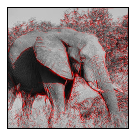

In [27]:
#edges[0, :] = pe.N_X - edges[0,:] # HACK
#edges[2, :] = - edges[2,:] # HACK
#edges[:, 119] = edges[:, 118] # HACK
fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
mp.pe.figsize_edges = .382 * fig_width
fig, a = mp.show_edges(edges, image=image, color='toto', show_phase=False) #, pedestal=.0, gamma=.3
mp.pe.figpath = 'figures'
import os
fig.savefig(os.path.join(mp.pe.figpath, 'SparseLets_A.pdf'))

RMSE-W =  0.218219386874


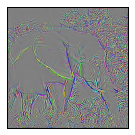

In [28]:
#! recontructing the image from the edges
image_rec = mp.reconstruct(edges)
print('RMSE-W = ', ((mp.whitening(image)-image_rec)**2).sum()/((mp.whitening(image))**2).sum())
fig, a = mp.show_edges(edges, image=image_rec*1.)

In [ ]:
#    RMSE = np.ones(pe.N)
#    for i_N in range(1, pe.N):
#        image_ = mp.reconstruct(edges[:, :i_N])
#        RMSE[i_N] =  ((image_W-image_)**2).sum() / RMSE_0
RMSE= np.load('mat/experiment_test_whitening_RMSE.npy')
print(RMSE.shape, mp.N)

In [ ]:
%%writefile experiment_test_nowhitening.py
import numpy as np
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.N = 128

image = mp.imread('https://raw.githubusercontent.com/meduz/SLIP/master/database/serre07_targets/B_N107001.jpg')
mp.pe.figsize_edges = 9
image = mp.normalize(image, center=True)

#! trying now using no whitening of the image
mp.pe.do_whitening = False

matname = 'mat/experiment_test_nowhitening.npy'
matname_RMSE = 'mat/experiment_test_nowhitening_RMSE.npy'
try:
    edges = np.load(matname)
except:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    
    
fig, a = mp.show_edges(edges, image=image, mask=True)

In [ ]:
%run experiment_test_nowhitening.py


In [ ]:
#! recontructing the image from the edges
image_ = mp.reconstruct(edges)
print('RMSE = ', ((image-image_)**2).sum()/((image)**2).sum())
fig, a = mp.show_edges(edges, image=image_*1., mask=True)

### Perspectives: Better fits of the filters

Basically, it is possible to infer the best possible log-Gabor function, even if it's parameters do not fall on the grid

0.01
initial_guess : [23, 42, -0.78539816339744828, 0.0081323268873787734] , idx : (23, 42, 5, 9)
popt : [  2.3401e+01   4.2283e+01  -8.0228e-01   1.0004e-02] , true :  23.6 42.5 2.34 0.01


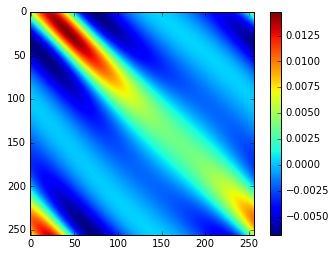

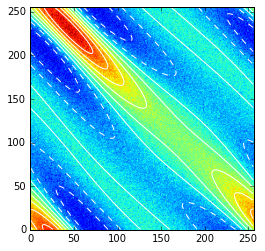

In [33]:
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
import scipy.optimize as opt

def twoD_Gaussian(xy, x_pos, y_pos, theta, sf_0):
    FT_lg = mp.loggabor(x_pos, y_pos, sf_0=np.absolute(sf_0), B_sf=mp.pe.B_sf, theta=theta, B_theta=mp.pe.B_theta)
    return mp.invert(FT_lg).ravel()

# Create x and y indices
x = np.arange(mp.N_X)
y = np.arange(mp.N_Y)
x, y = xy =  np.meshgrid(x, y)

#create data
x_pos, y_pos, theta, sf_0  = 23., 42., 142 * np.pi / 180., .01
x_pos, y_pos, theta, sf_0  = 23.6, 42.5, 2.34, .01
print( sf_0)
data = twoD_Gaussian(xy, x_pos, y_pos, theta=theta, sf_0=sf_0)


# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(mp.N_X, mp.N_Y))
plt.colorbar()

# add some noise to the data and try to fit the data generated beforehand
data_noisy = data + 0.001*np.random.normal(size=data.shape)
# getting best match
C = mp.init_C(data_noisy.reshape(mp.N_X, mp.N_Y))
idx = mp.argmax(C)
initial_guess = [idx[0], idx[1], mp.theta[idx[2]], mp.sf_0[idx[3]]]
print ('initial_guess :', initial_guess, ', idx :', idx)

popt, pcov = opt.curve_fit(twoD_Gaussian, xy, data_noisy, p0=initial_guess)

data_fitted = twoD_Gaussian(xy, *popt)

extent = (0, mp.N_X, 0, mp.N_Y)
print ('popt :', popt, ', true : ', x_pos, y_pos, theta, sf_0)
fig, ax = plt.subplots(1, 1)
ax.hold(True)
ax.imshow(data_noisy.reshape(mp.N_X, mp.N_Y), cmap=plt.cm.jet, 
          origin='upper', extent=extent)
_ = ax.contour(data_fitted.reshape(mp.N_X, mp.N_Y), 8, colors='w',
           origin='upper', extent=extent)

# TODO use a MLE to do the fit directly without scipy

## some book keeping for the notebook

In [34]:
%install_ext https://raw.githubusercontent.com/rasbt/python_reference/master/ipython_magic/watermark.py
%load_ext watermark
%watermark

Installed watermark.py. To use it, type:
  %load_ext watermark
12/02/2016 10:06:10

CPython 3.5.1
IPython 4.1.1

compiler   : GCC 4.2.1 Compatible Apple LLVM 7.0.0 (clang-700.1.76)
system     : Darwin
release    : 15.2.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [35]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy

Installed version_information.py. To use it, type:
  %load_ext version_information


Software versions
Python 3.5.1 64bit [GCC 4.2.1 Compatible Apple LLVM 7.0.0 (clang-700.1.76)]
IPython 4.1.1
OS Darwin 15.2.0 x86_64 i386 64bit
numpy 1.10.4
scipy 0.17.0
matplotlib 1.5.1
sympy 0.7.6.1
Fri Feb 12 10:06:12 2016 CET